In [2]:
import melanoma as mel

%matplotlib inline
%load_ext autoreload
%autoreload -p 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

rootpath = '/hpcstor6/scratch01/s/sanghyuk.kim001'
# img_size = (224, 224) # height, width
img_size = (150, 150) # height, width
utilInstance = mel.Util(rootpath, img_size)
dataType = mel.DatasetType.ISIC2016
networkType = mel.NetworkType.InceptionV3


CREATE_DB = 0
# Save datasets as pickle files
if (CREATE_DB == 1):
    utilInstance.saveDatasetsToFile(dataType, networkType, 1.2)



2024-01-12 11:57:42.449470: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import EarlyStopping

img_height, img_width = utilInstance.getImgSize()

optimizer1 = Adam(lr=0.001)
optimizer2 = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
red_lr= ReduceLROnPlateau(monitor='val_accuracy', patience=3 , verbose=1, factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  20,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =   90.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.1, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.1, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = optimizer2,
			# loss='binary_crossentropy',
			loss='categorical_crossentropy',
			metrics=['accuracy'],
			callbacks = [],

			# Postprocessing
			stopper_patience      =  0,   # 0.01; 0.05; 0.1; 0.2;
			# run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)
base_model = mel.CNN(CFG=CFG)

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_190 (Bat (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

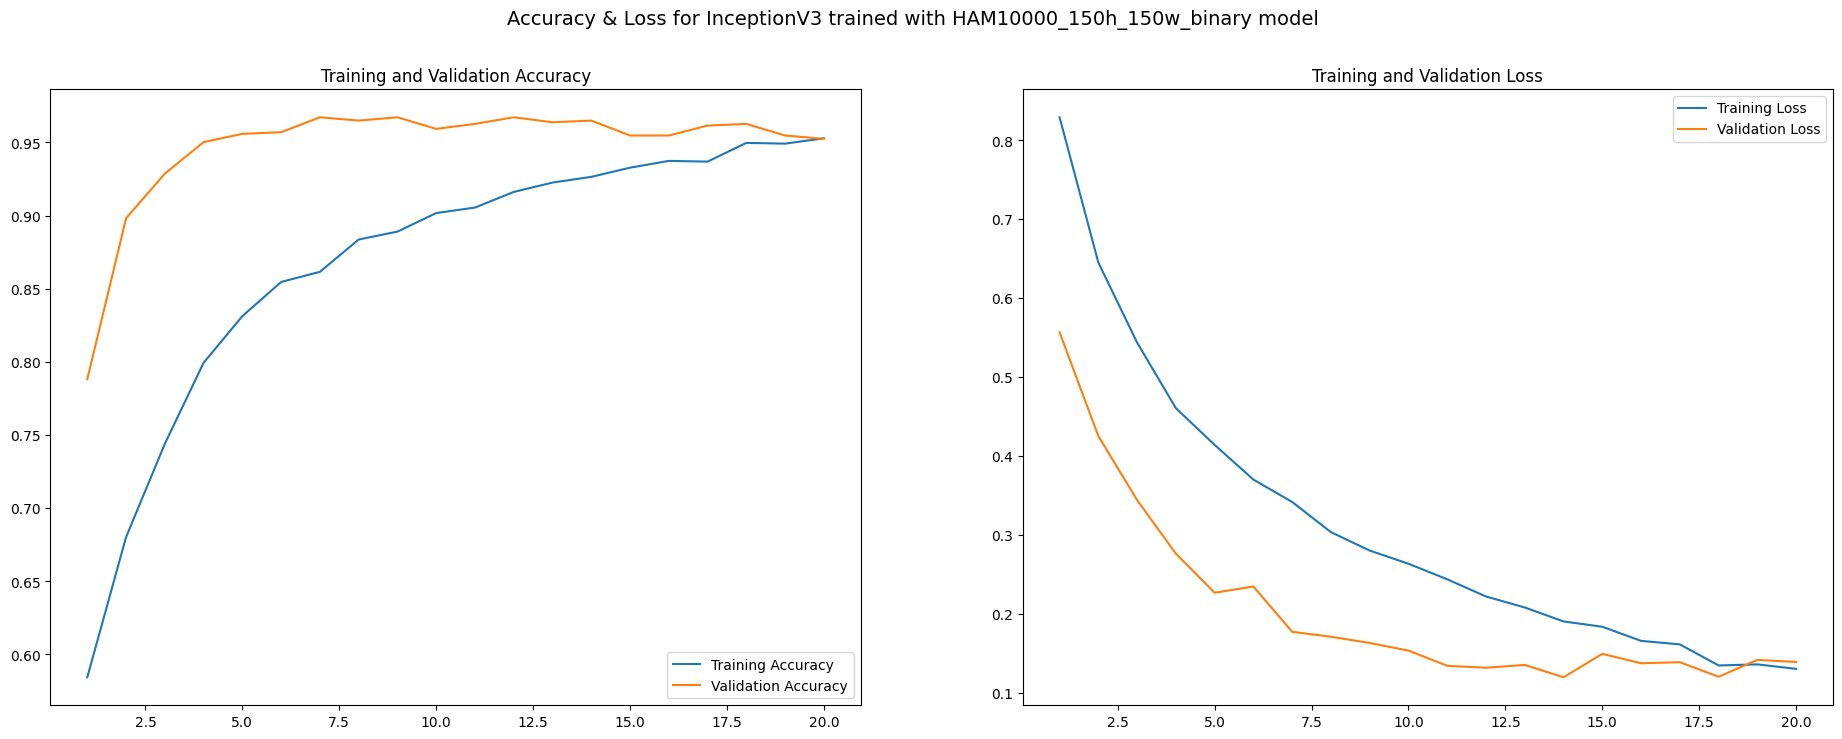

Testing on Kaggle DB
Evaluating Testing Kaggle DB on InceptionV3 trained with HAM10000_150h_150w_binary model...

52/52 [==============================] - 3s 47ms/step - loss: 1.2297 - accuracy: 0.6329
Train loss = 1.2296831607818604  ;  Train accuracy = 63.29%

32/32 [==============================] - 2s 60ms/step - loss: 1.2350 - accuracy: 0.6240
Validation loss = 1.2350033521652222  ;  Validation accuracy = 62.40%

21/21 [==============================] - 2s 85ms/step - loss: 1.1885 - accuracy: 0.6409
Test loss = 1.1885435581207275  ;  Test accuracy = 64.09%
Computing predictions for Testing Kaggle DB on InceptionV3 trained with HAM10000_150h_150w_binary...
Model report for Testing Kaggle DB on InceptionV3 trained with HAM10000_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.60      1.00      0.75       909
   Malignant       0.98      0.18      0.30       728

    accuracy                           0.63      16

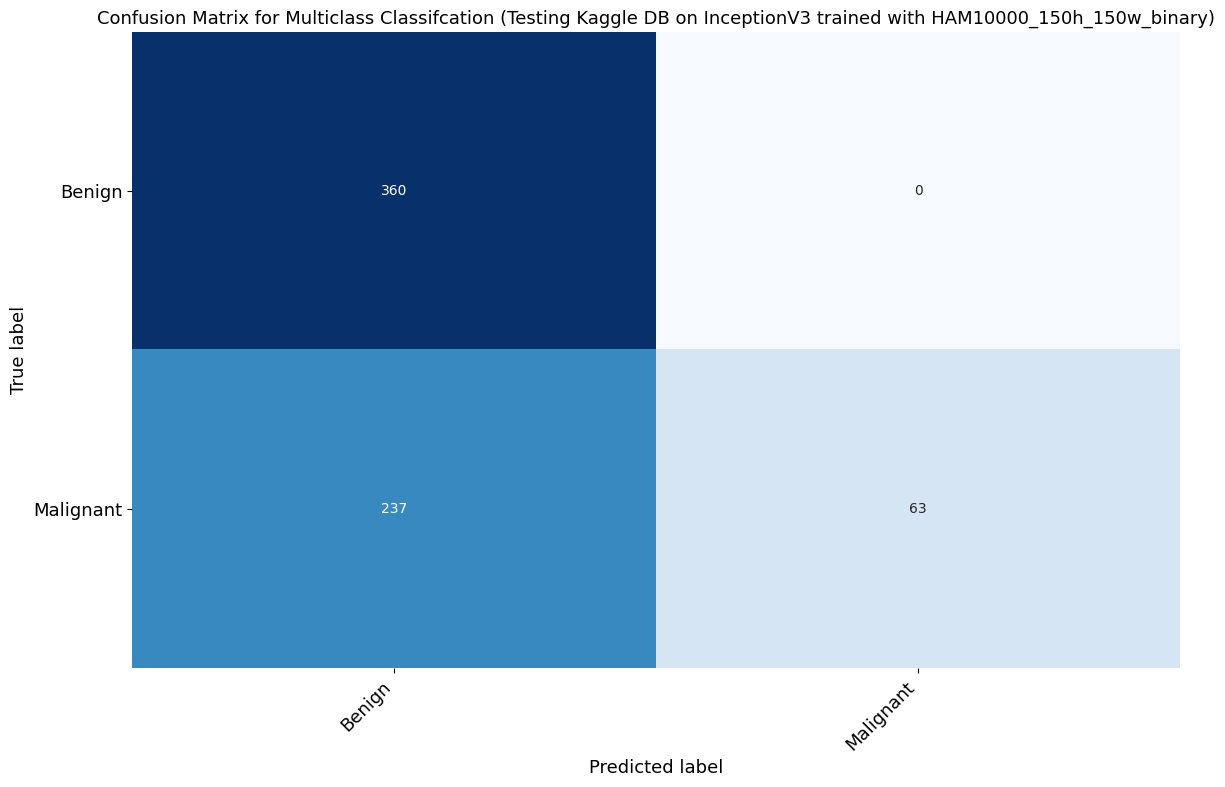

Testing on HAM10000
Evaluating Testing HAM10000 on InceptionV3 trained with HAM10000_150h_150w_binary model...

251/251 [==============================] - 7s 23ms/step - loss: 0.1244 - accuracy: 0.9489
Train loss = 0.12441666424274445  ;  Train accuracy = 94.89%

28/28 [==============================] - 1s 21ms/step - loss: 0.1198 - accuracy: 0.9649
Validation loss = 0.11983858048915863  ;  Validation accuracy = 96.49%

35/35 [==============================] - 2s 56ms/step - loss: 0.1540 - accuracy: 0.9538
Test loss = 0.1540454775094986  ;  Test accuracy = 95.38%
Computing predictions for Testing HAM10000 on InceptionV3 trained with HAM10000_150h_150w_binary...
Model report for Testing HAM10000 on InceptionV3 trained with HAM10000_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97      6994
   Malignant       0.98      0.62      0.76      1035

    accuracy                           0.95      80

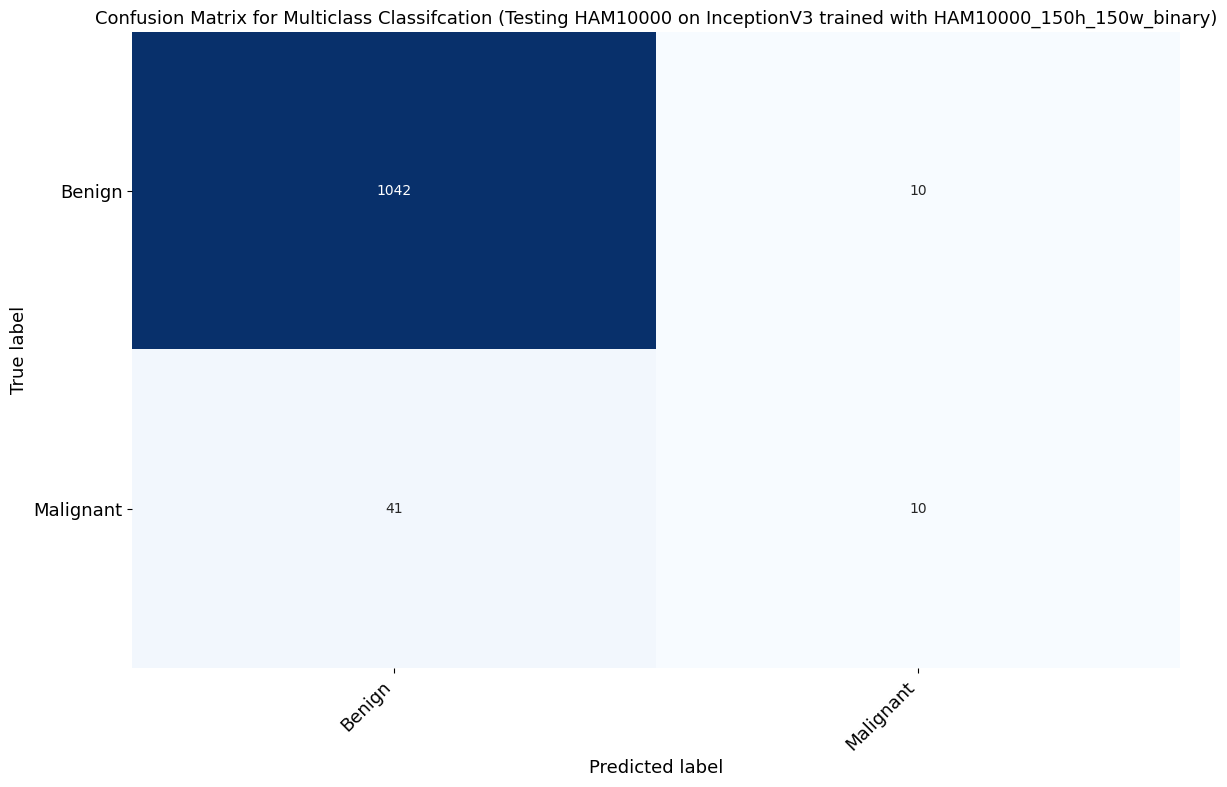

Testing on ISIC2016
Evaluating Testing ISIC2016 on InceptionV3 trained with HAM10000_150h_150w_binary model...

23/23 [==============================] - 3s 76ms/step - loss: 0.6063 - accuracy: 0.8083
Train loss = 0.6062959432601929  ;  Train accuracy = 80.83%

6/6 [==============================] - 0s 21ms/step - loss: 0.5635 - accuracy: 0.8111
Validation loss = 0.5634894967079163  ;  Validation accuracy = 81.11%

12/12 [==============================] - 2s 135ms/step - loss: 0.5777 - accuracy: 0.8285
Test loss = 0.5776692032814026  ;  Test accuracy = 82.85%
Computing predictions for Testing ISIC2016 on InceptionV3 trained with HAM10000_150h_150w_binary...
Model report for Testing ISIC2016 on InceptionV3 trained with HAM10000_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.82      0.97      0.89       583
   Malignant       0.48      0.10      0.17       137

    accuracy                           0.81       720
  

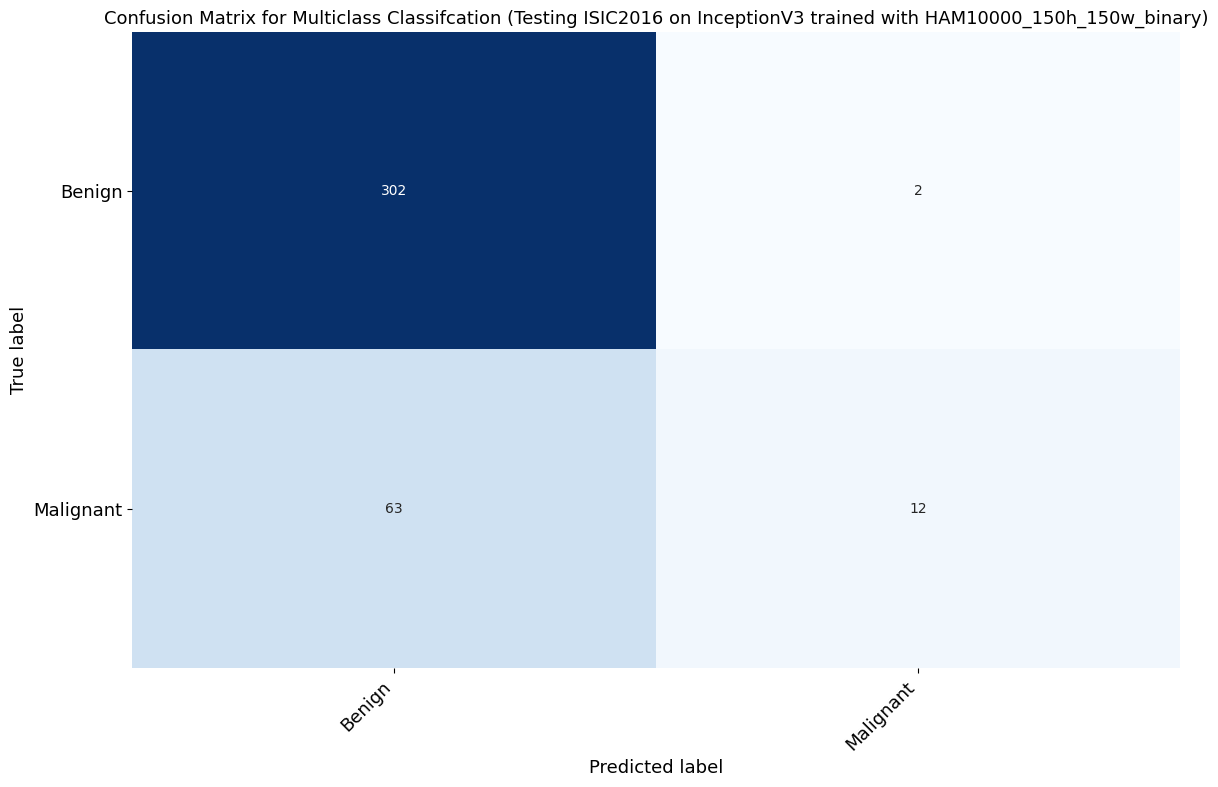

Testing on ISIC2017
Evaluating Testing ISIC2017 on InceptionV3 trained with HAM10000_150h_150w_binary model...

63/63 [==============================] - 2s 21ms/step - loss: 0.6817 - accuracy: 0.8190
Train loss = 0.681735098361969  ;  Train accuracy = 81.90%

5/5 [==============================] - 1s 344ms/step - loss: 0.9567 - accuracy: 0.7867
Validation loss = 0.9567071795463562  ;  Validation accuracy = 78.67%

19/19 [==============================] - 2s 88ms/step - loss: 0.8034 - accuracy: 0.8067
Test loss = 0.8033740520477295  ;  Test accuracy = 80.67%
Computing predictions for Testing ISIC2017 on InceptionV3 trained with HAM10000_150h_150w_binary...
Model report for Testing ISIC2017 on InceptionV3 trained with HAM10000_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.99      0.90      1626
   Malignant       0.61      0.09      0.16       374

    accuracy                           0.82      2000
   

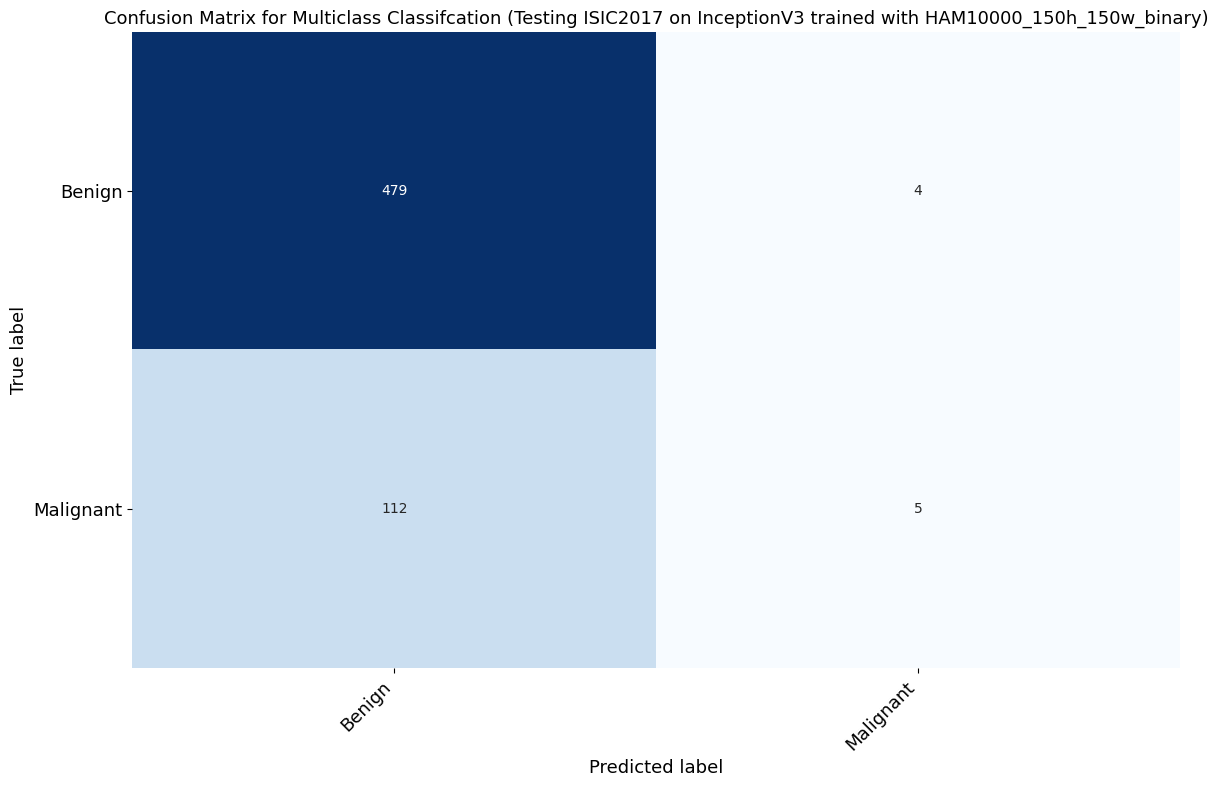

Testing on ISIC2018
Evaluating Testing ISIC2018 on InceptionV3 trained with HAM10000_150h_150w_binary model...

313/313 [==============================] - 9s 25ms/step - loss: 0.1273 - accuracy: 0.9510
Train loss = 0.1272771656513214  ;  Train accuracy = 95.10%

7/7 [==============================] - 1s 224ms/step - loss: 0.2741 - accuracy: 0.8912
Validation loss = 0.2740860879421234  ;  Validation accuracy = 89.12%

48/48 [==============================] - 1s 23ms/step - loss: 0.3626 - accuracy: 0.8803
Test loss = 0.36259153485298157  ;  Test accuracy = 88.03%
Computing predictions for Testing ISIC2018 on InceptionV3 trained with HAM10000_150h_150w_binary...
Model report for Testing ISIC2018 on InceptionV3 trained with HAM10000_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97      8902
   Malignant       0.96      0.58      0.73      1113

    accuracy                           0.95     10015

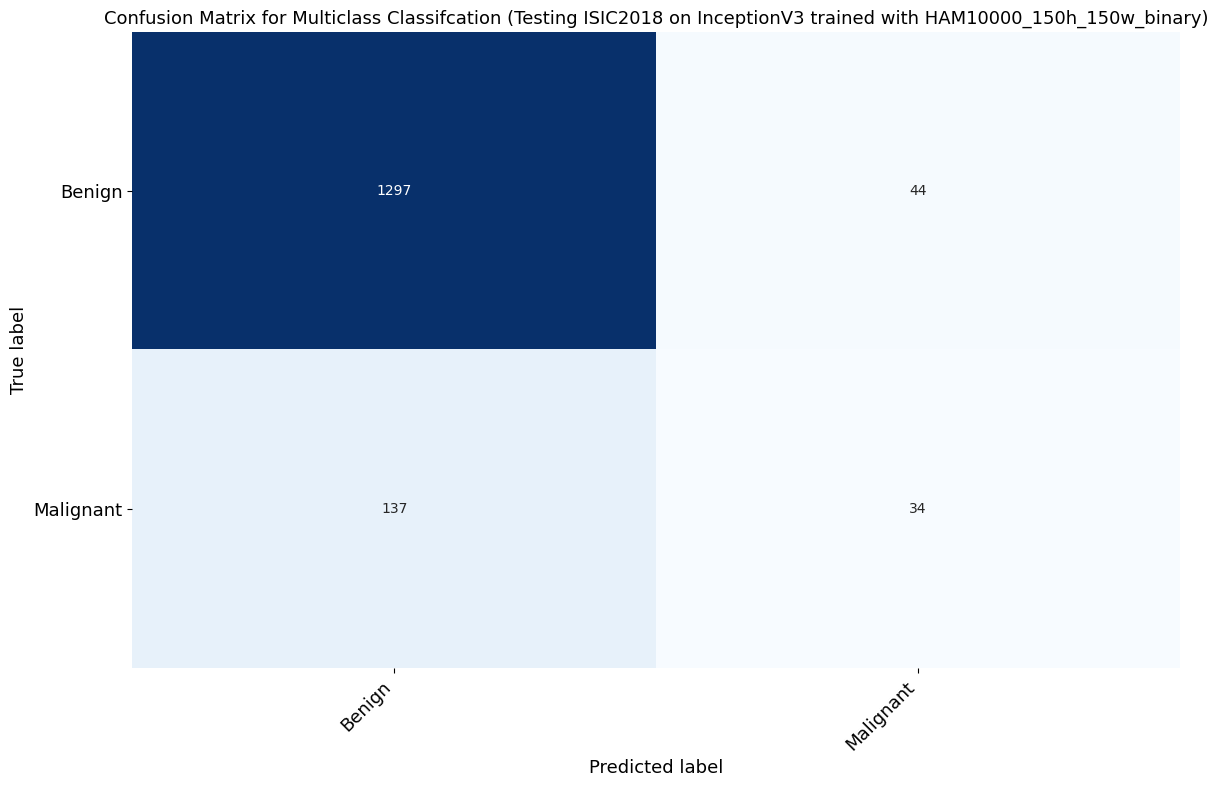

Fitting InceptionV3 trained with ISIC2016_150h_150w_binary model...
Epoch 1/20
11/11 [==============================] - 1s 47ms/step - loss: 0.6166 - accuracy: 0.8125 - val_loss: 0.7125 - val_accuracy: 0.7944
Epoch 2/20
11/11 [==============================] - 0s 42ms/step - loss: 0.4423 - accuracy: 0.8415 - val_loss: 0.6122 - val_accuracy: 0.7833
Epoch 3/20
11/11 [==============================] - 0s 41ms/step - loss: 0.3492 - accuracy: 0.8613 - val_loss: 0.5847 - val_accuracy: 0.7778
Epoch 4/20
11/11 [==============================] - 0s 42ms/step - loss: 0.2912 - accuracy: 0.8765 - val_loss: 0.6224 - val_accuracy: 0.8167
Epoch 5/20
11/11 [==============================] - 0s 41ms/step - loss: 0.2389 - accuracy: 0.8920 - val_loss: 0.5836 - val_accuracy: 0.8111
Epoch 6/20
11/11 [==============================] - 0s 41ms/step - loss: 0.1987 - accuracy: 0.9238 - val_loss: 0.5506 - val_accuracy: 0.8222
Epoch 7/20
11/11 [==============================] - 1s 46ms/step - loss: 0.1645 - accu

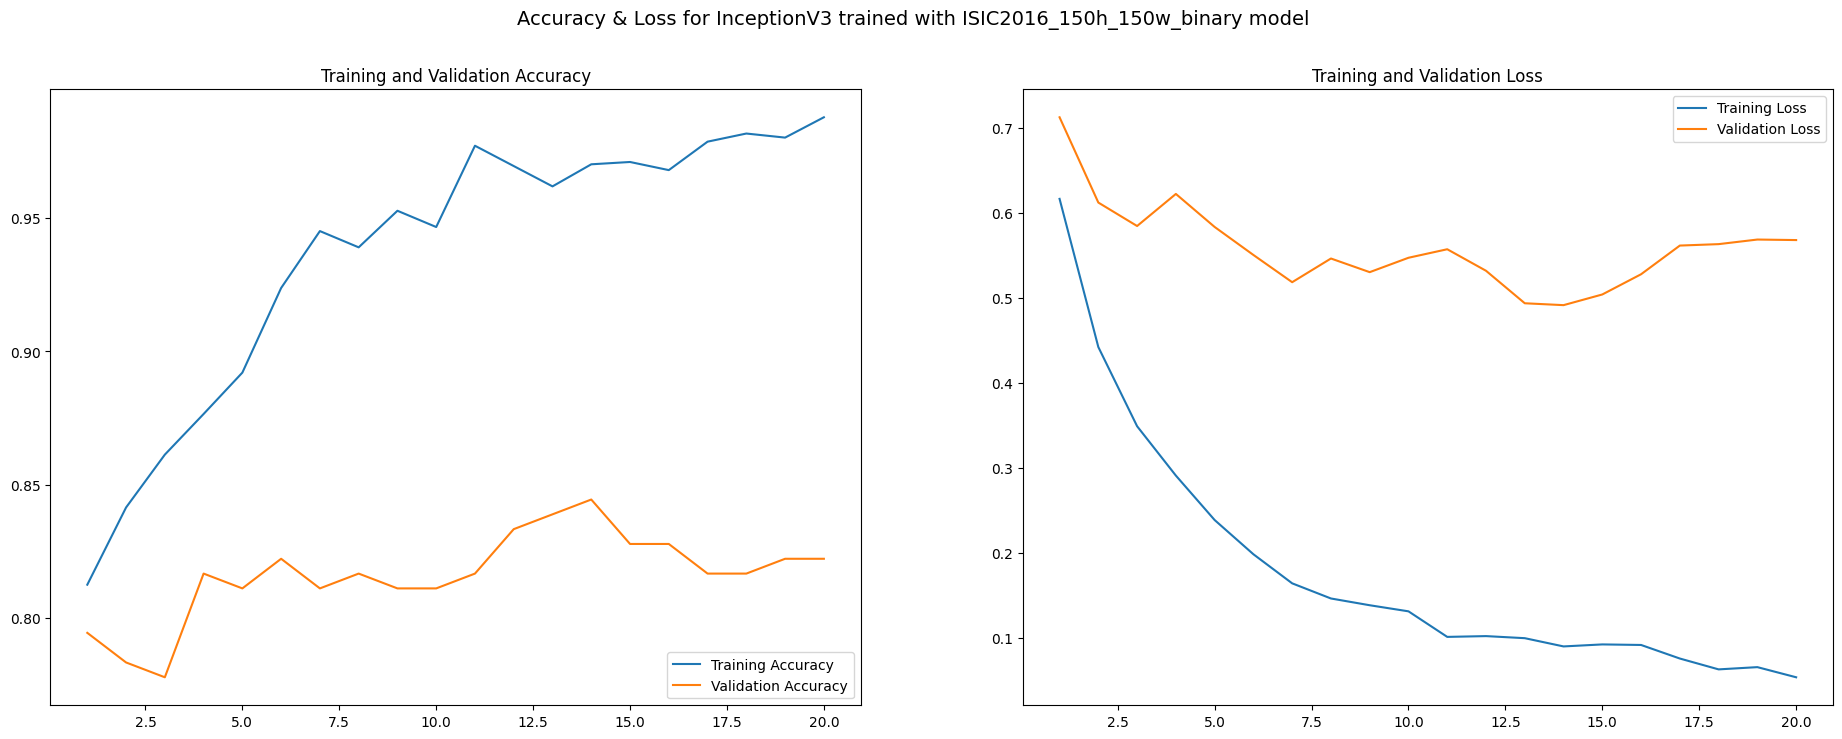

Testing on Kaggle DB
Evaluating Testing Kaggle DB on InceptionV3 trained with ISIC2016_150h_150w_binary model...

52/52 [==============================] - 2s 21ms/step - loss: 1.0589 - accuracy: 0.6732
Train loss = 1.058881163597107  ;  Train accuracy = 67.32%

32/32 [==============================] - 1s 21ms/step - loss: 1.1073 - accuracy: 0.6770
Validation loss = 1.1072863340377808  ;  Validation accuracy = 67.70%

21/21 [==============================] - 0s 21ms/step - loss: 1.0181 - accuracy: 0.6924
Test loss = 1.0181115865707397  ;  Test accuracy = 69.24%
Computing predictions for Testing Kaggle DB on InceptionV3 trained with ISIC2016_150h_150w_binary...
Model report for Testing Kaggle DB on InceptionV3 trained with ISIC2016_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.63      0.98      0.77       909
   Malignant       0.93      0.29      0.44       728

    accuracy                           0.67      163

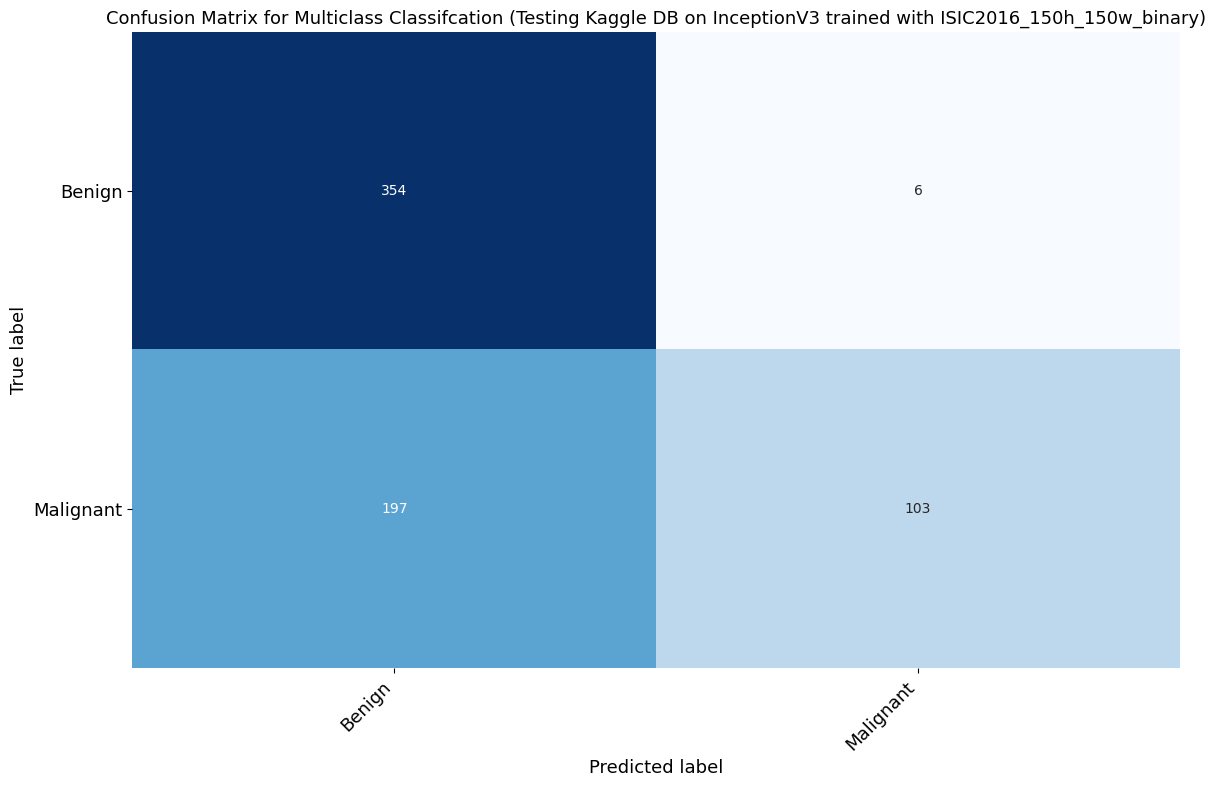

Testing on HAM10000
Evaluating Testing HAM10000 on InceptionV3 trained with ISIC2016_150h_150w_binary model...

251/251 [==============================] - 6s 21ms/step - loss: 0.1890 - accuracy: 0.9240
Train loss = 0.18896497786045074  ;  Train accuracy = 92.40%

28/28 [==============================] - 1s 22ms/step - loss: 0.1660 - accuracy: 0.9456
Validation loss = 0.16598987579345703  ;  Validation accuracy = 94.56%

35/35 [==============================] - 1s 23ms/step - loss: 0.1809 - accuracy: 0.9420
Test loss = 0.1809382289648056  ;  Test accuracy = 94.20%
Computing predictions for Testing HAM10000 on InceptionV3 trained with ISIC2016_150h_150w_binary...
Model report for Testing HAM10000 on InceptionV3 trained with ISIC2016_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.94      0.97      0.96      6994
   Malignant       0.76      0.60      0.67      1035

    accuracy                           0.92      80

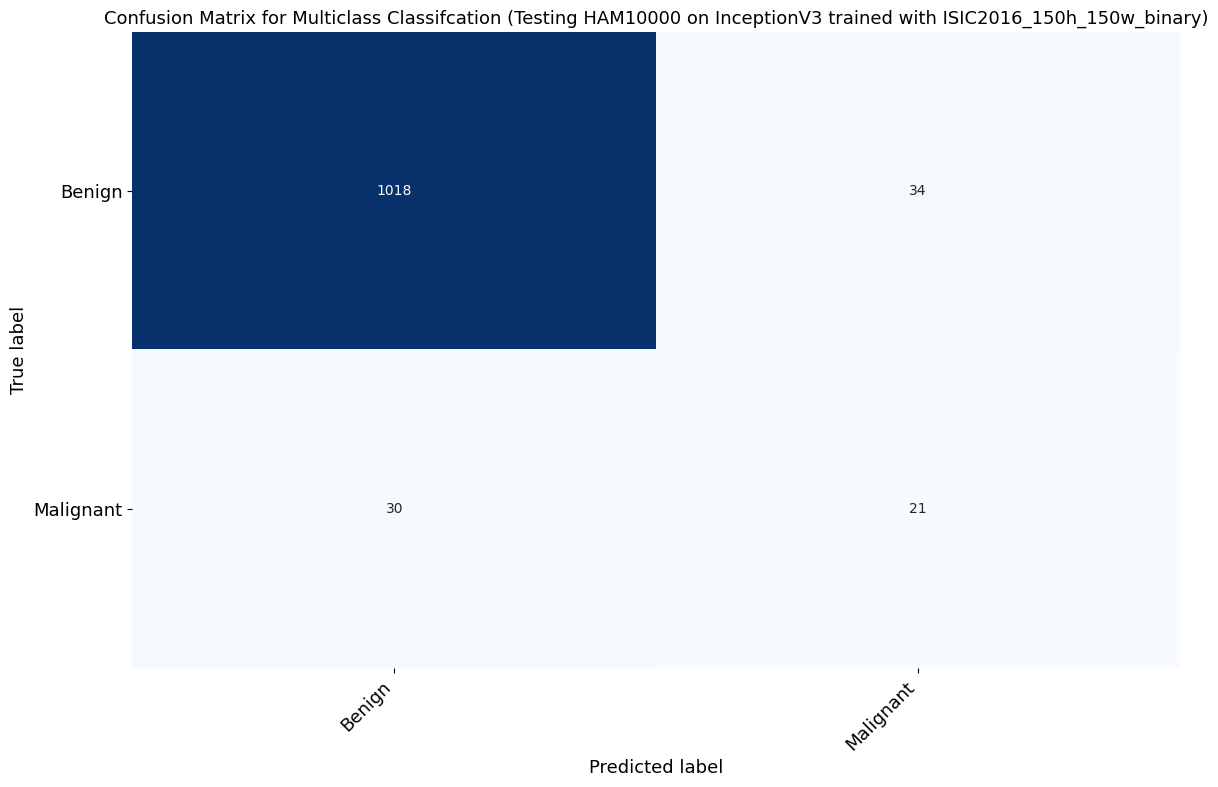

Testing on ISIC2016
Evaluating Testing ISIC2016 on InceptionV3 trained with ISIC2016_150h_150w_binary model...

23/23 [==============================] - 1s 23ms/step - loss: 0.0625 - accuracy: 0.9778
Train loss = 0.06250189989805222  ;  Train accuracy = 97.78%

6/6 [==============================] - 0s 21ms/step - loss: 0.4916 - accuracy: 0.8444
Validation loss = 0.49160483479499817  ;  Validation accuracy = 84.44%

12/12 [==============================] - 0s 21ms/step - loss: 0.5530 - accuracy: 0.8206
Test loss = 0.5530218482017517  ;  Test accuracy = 82.06%
Computing predictions for Testing ISIC2016 on InceptionV3 trained with ISIC2016_150h_150w_binary...
Model report for Testing ISIC2016 on InceptionV3 trained with ISIC2016_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.97      1.00      0.99       583
   Malignant       1.00      0.88      0.94       137

    accuracy                           0.98       720
 

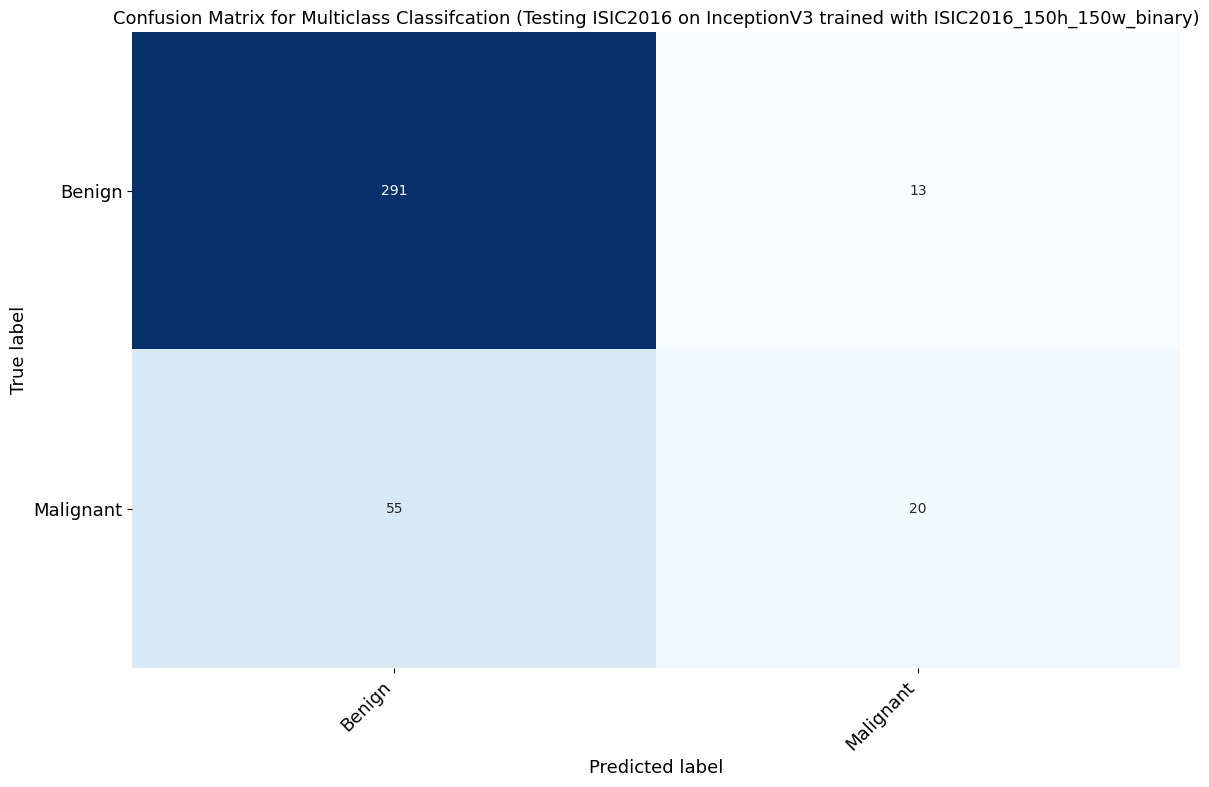

Testing on ISIC2017
Evaluating Testing ISIC2017 on InceptionV3 trained with ISIC2016_150h_150w_binary model...

63/63 [==============================] - 2s 21ms/step - loss: 0.5045 - accuracy: 0.8660
Train loss = 0.5044993758201599  ;  Train accuracy = 86.60%

5/5 [==============================] - 0s 21ms/step - loss: 0.8373 - accuracy: 0.7800
Validation loss = 0.8372920751571655  ;  Validation accuracy = 78.00%

19/19 [==============================] - 0s 21ms/step - loss: 0.7799 - accuracy: 0.7883
Test loss = 0.7799205780029297  ;  Test accuracy = 78.83%
Computing predictions for Testing ISIC2017 on InceptionV3 trained with ISIC2016_150h_150w_binary...
Model report for Testing ISIC2017 on InceptionV3 trained with ISIC2016_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.87      0.98      0.92      1626
   Malignant       0.82      0.36      0.50       374

    accuracy                           0.87      2000
   

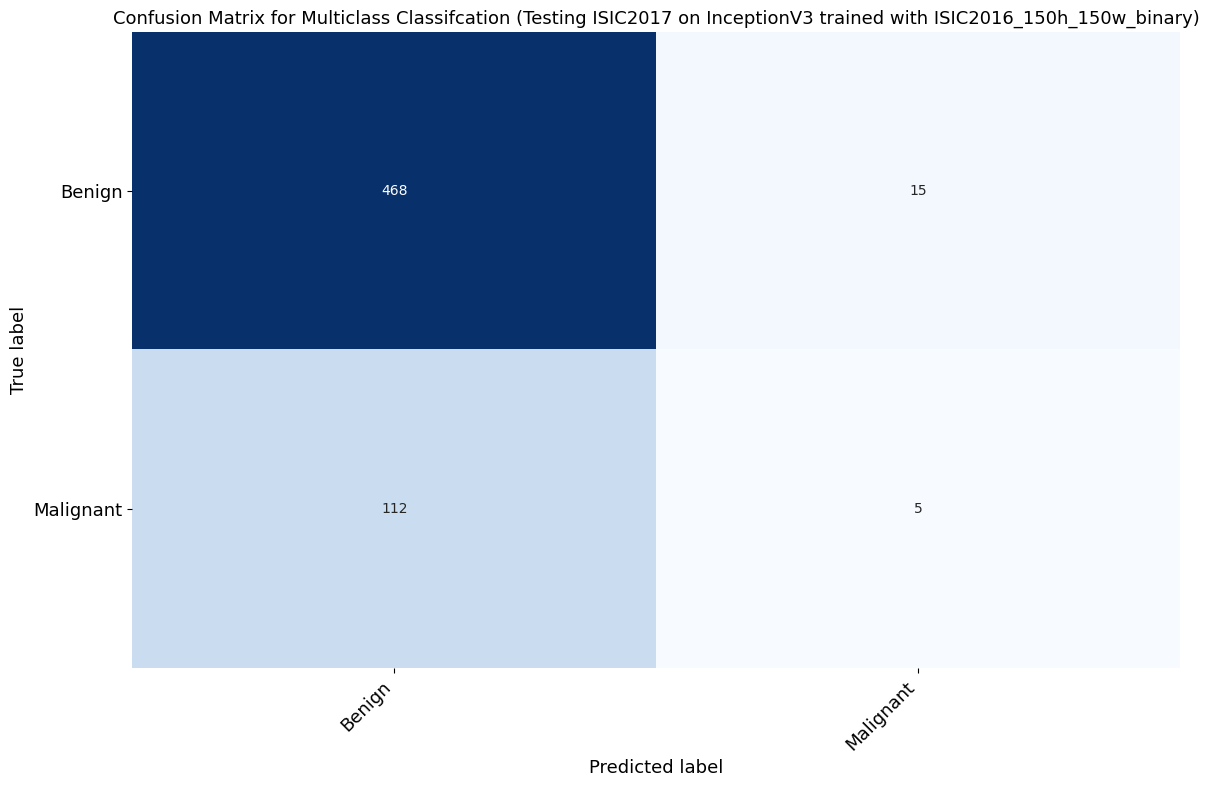

Testing on ISIC2018
Evaluating Testing ISIC2018 on InceptionV3 trained with ISIC2016_150h_150w_binary model...

313/313 [==============================] - 8s 22ms/step - loss: 0.1861 - accuracy: 0.9279
Train loss = 0.18605756759643555  ;  Train accuracy = 92.79%

7/7 [==============================] - 0s 21ms/step - loss: 0.3672 - accuracy: 0.8705
Validation loss = 0.3671594262123108  ;  Validation accuracy = 87.05%

48/48 [==============================] - 1s 21ms/step - loss: 0.4207 - accuracy: 0.8452
Test loss = 0.4206787049770355  ;  Test accuracy = 84.52%
Computing predictions for Testing ISIC2018 on InceptionV3 trained with ISIC2016_150h_150w_binary...
Model report for Testing ISIC2018 on InceptionV3 trained with ISIC2016_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      8902
   Malignant       0.72      0.58      0.64      1113

    accuracy                           0.93     10015


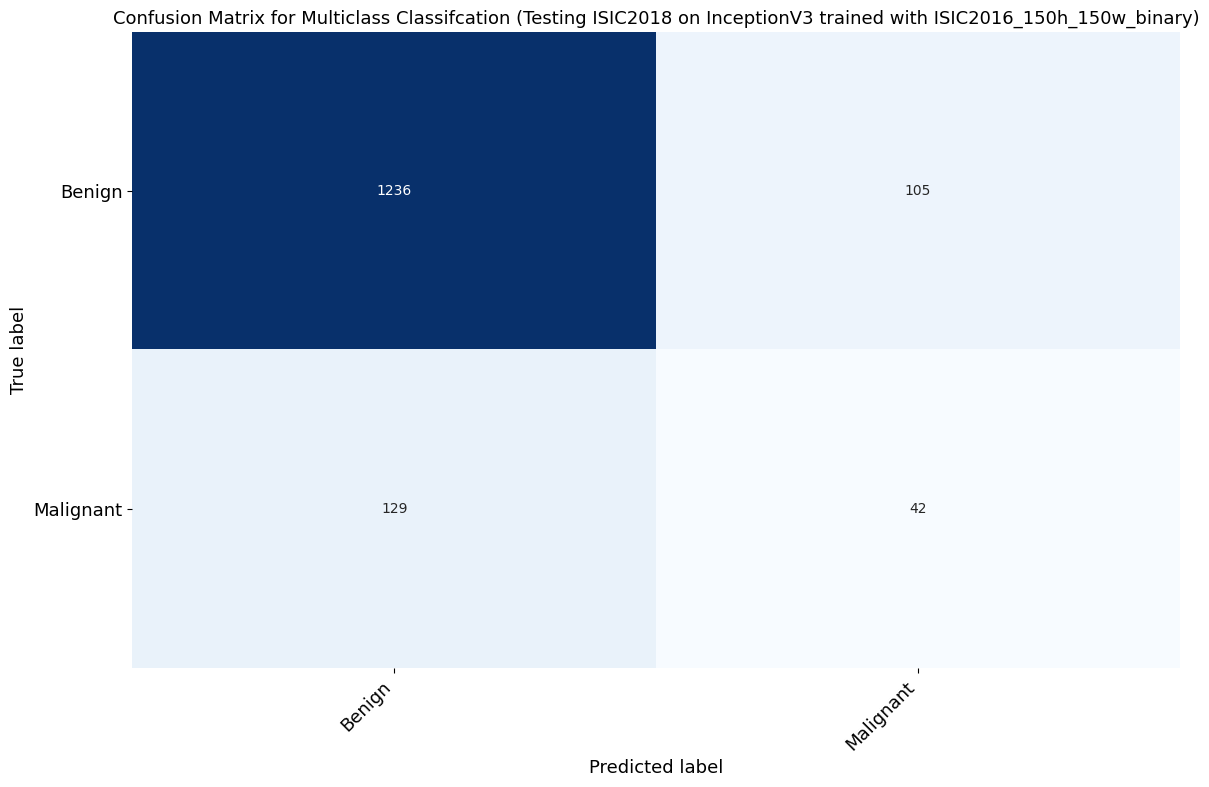

Fitting InceptionV3 trained with ISIC2017_150h_150w_binary model...
Epoch 1/20
31/31 [==============================] - 1s 33ms/step - loss: 0.5005 - accuracy: 0.8466 - val_loss: 0.6891 - val_accuracy: 0.8000
Epoch 2/20
31/31 [==============================] - 1s 32ms/step - loss: 0.3797 - accuracy: 0.8704 - val_loss: 0.6778 - val_accuracy: 0.7933
Epoch 3/20
31/31 [==============================] - 1s 34ms/step - loss: 0.2983 - accuracy: 0.8771 - val_loss: 0.7705 - val_accuracy: 0.8333
Epoch 4/20
31/31 [==============================] - 1s 35ms/step - loss: 0.2435 - accuracy: 0.9075 - val_loss: 0.7062 - val_accuracy: 0.8333
Epoch 5/20
31/31 [==============================] - 1s 32ms/step - loss: 0.2411 - accuracy: 0.9003 - val_loss: 0.6229 - val_accuracy: 0.8067
Epoch 6/20
31/31 [==============================] - 1s 32ms/step - loss: 0.2017 - accuracy: 0.9215 - val_loss: 0.7163 - val_accuracy: 0.8200
Epoch 7/20
31/31 [==============================] - 1s 33ms/step - loss: 0.1806 - accu

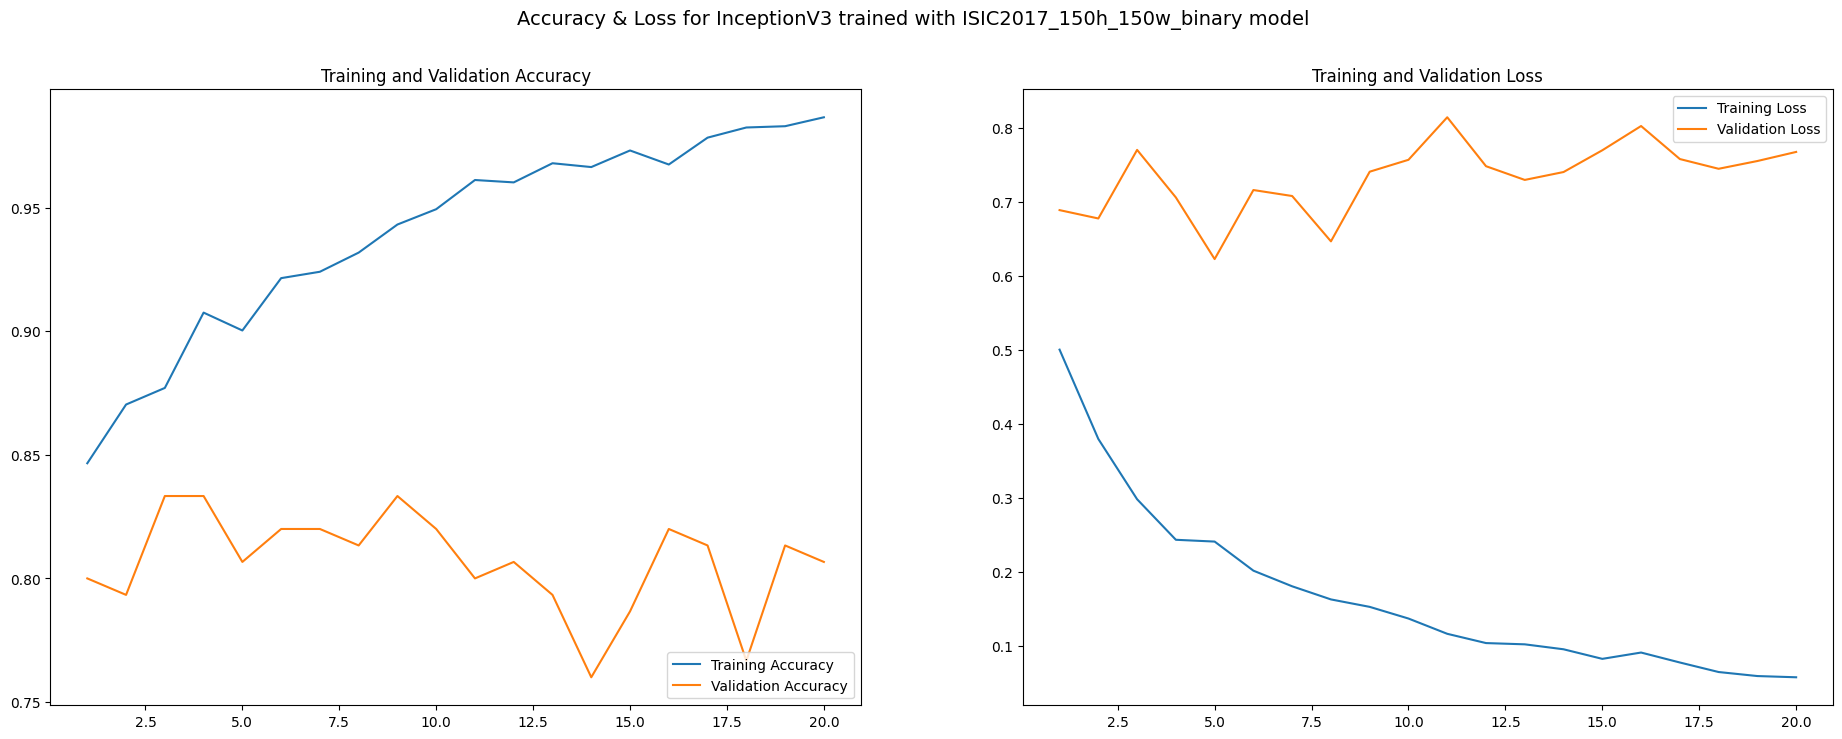

Testing on Kaggle DB
Evaluating Testing Kaggle DB on InceptionV3 trained with ISIC2017_150h_150w_binary model...

52/52 [==============================] - 2s 21ms/step - loss: 0.7912 - accuracy: 0.7111
Train loss = 0.791222333908081  ;  Train accuracy = 71.11%

32/32 [==============================] - 1s 21ms/step - loss: 0.8428 - accuracy: 0.7030
Validation loss = 0.8427959084510803  ;  Validation accuracy = 70.30%

21/21 [==============================] - 0s 23ms/step - loss: 0.8066 - accuracy: 0.7121
Test loss = 0.8066214919090271  ;  Test accuracy = 71.21%
Computing predictions for Testing Kaggle DB on InceptionV3 trained with ISIC2017_150h_150w_binary...
Model report for Testing Kaggle DB on InceptionV3 trained with ISIC2017_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.67      0.95      0.79       909
   Malignant       0.87      0.41      0.56       728

    accuracy                           0.71      163

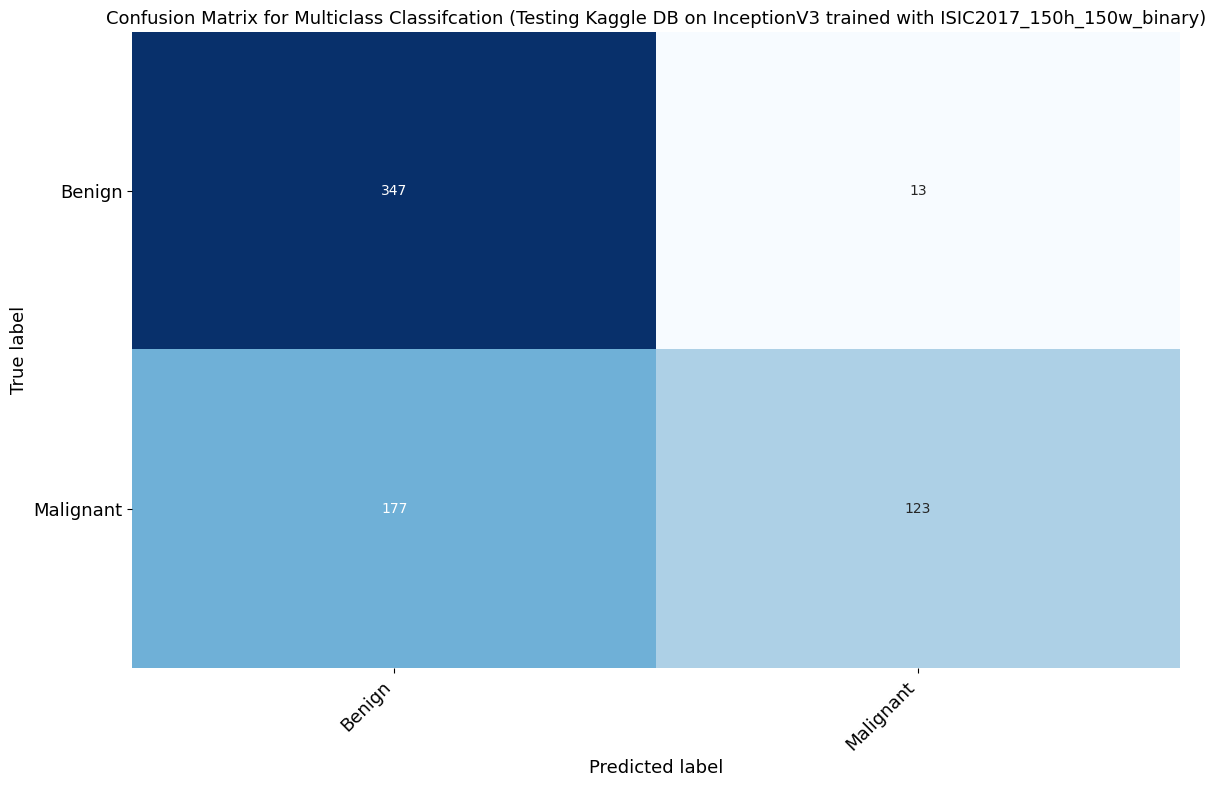

Testing on HAM10000
Evaluating Testing HAM10000 on InceptionV3 trained with ISIC2017_150h_150w_binary model...

251/251 [==============================] - 6s 22ms/step - loss: 0.2703 - accuracy: 0.8936
Train loss = 0.27032870054244995  ;  Train accuracy = 89.36%

28/28 [==============================] - 1s 22ms/step - loss: 0.2654 - accuracy: 0.9071
Validation loss = 0.26537927985191345  ;  Validation accuracy = 90.71%

35/35 [==============================] - 1s 25ms/step - loss: 0.2486 - accuracy: 0.9039
Test loss = 0.24855372309684753  ;  Test accuracy = 90.39%
Computing predictions for Testing HAM10000 on InceptionV3 trained with ISIC2017_150h_150w_binary...
Model report for Testing HAM10000 on InceptionV3 trained with ISIC2017_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.94      0.94      0.94      6994
   Malignant       0.59      0.56      0.58      1035

    accuracy                           0.89      8

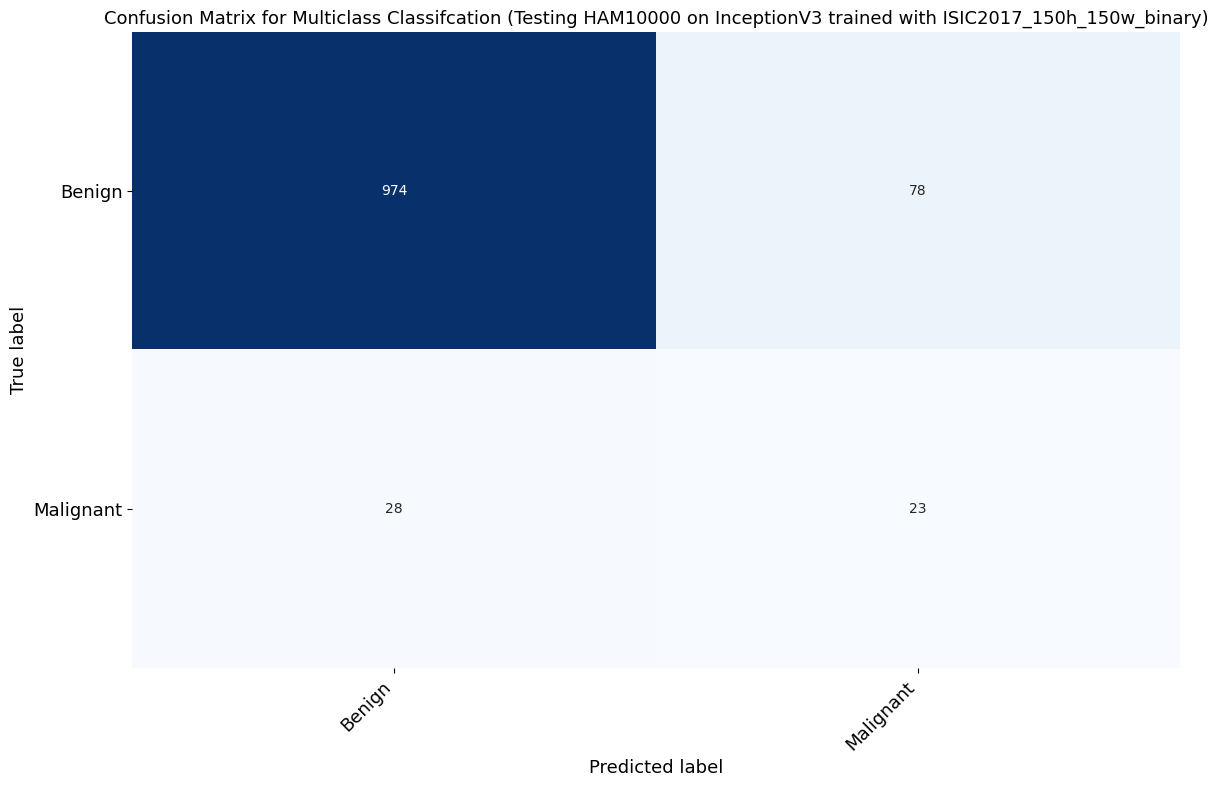

Testing on ISIC2016
Evaluating Testing ISIC2016 on InceptionV3 trained with ISIC2017_150h_150w_binary model...

23/23 [==============================] - 1s 21ms/step - loss: 0.0866 - accuracy: 0.9764
Train loss = 0.08664397895336151  ;  Train accuracy = 97.64%

6/6 [==============================] - 0s 21ms/step - loss: 0.2410 - accuracy: 0.8944
Validation loss = 0.24104510247707367  ;  Validation accuracy = 89.44%

12/12 [==============================] - 0s 21ms/step - loss: 0.2376 - accuracy: 0.8945
Test loss = 0.23760612308979034  ;  Test accuracy = 89.45%
Computing predictions for Testing ISIC2016 on InceptionV3 trained with ISIC2017_150h_150w_binary...
Model report for Testing ISIC2016 on InceptionV3 trained with ISIC2017_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       583
   Malignant       0.95      0.93      0.94       137

    accuracy                           0.98       720


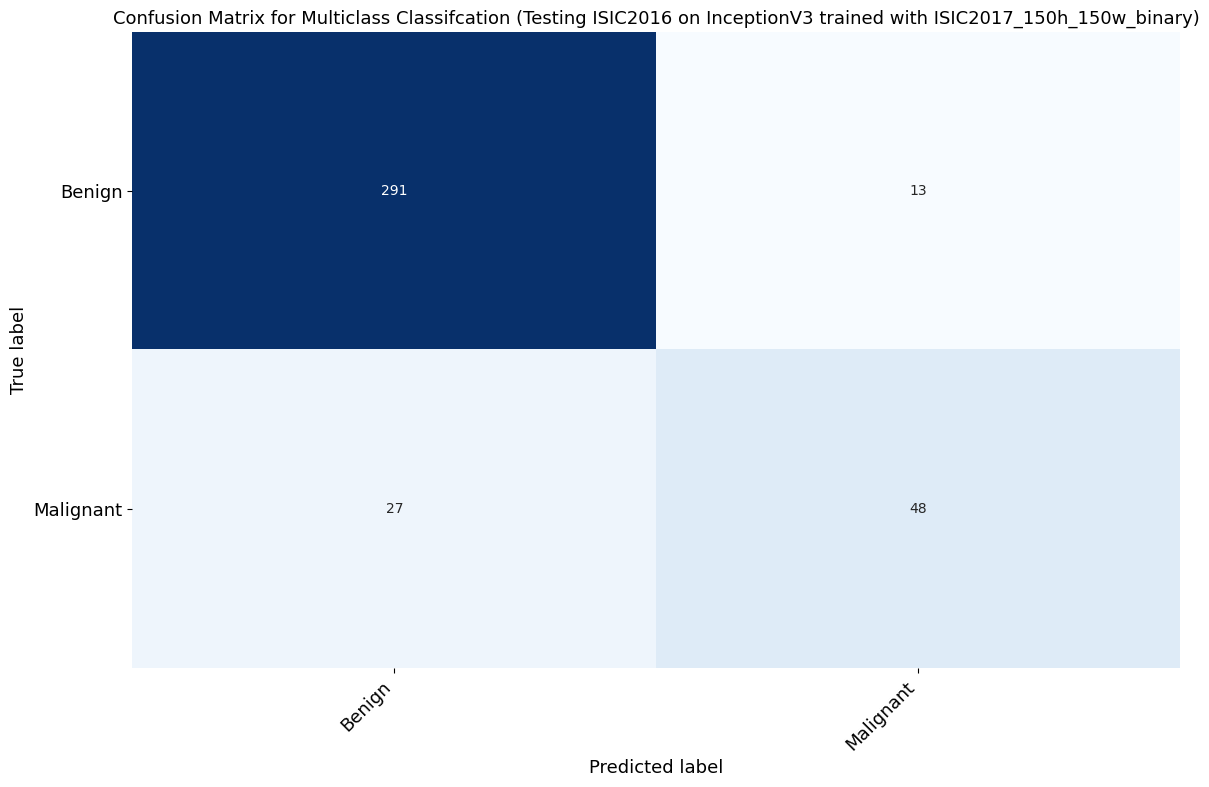

Testing on ISIC2017
Evaluating Testing ISIC2017 on InceptionV3 trained with ISIC2017_150h_150w_binary model...

63/63 [==============================] - 2s 22ms/step - loss: 0.1358 - accuracy: 0.9500
Train loss = 0.1358417570590973  ;  Train accuracy = 95.00%

5/5 [==============================] - 0s 21ms/step - loss: 0.6229 - accuracy: 0.8067
Validation loss = 0.6229274272918701  ;  Validation accuracy = 80.67%

19/19 [==============================] - 0s 22ms/step - loss: 0.5514 - accuracy: 0.7833
Test loss = 0.5514406561851501  ;  Test accuracy = 78.33%
Computing predictions for Testing ISIC2017 on InceptionV3 trained with ISIC2017_150h_150w_binary...
Model report for Testing ISIC2017 on InceptionV3 trained with ISIC2017_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.99      0.97      1626
   Malignant       0.97      0.76      0.85       374

    accuracy                           0.95      2000
   

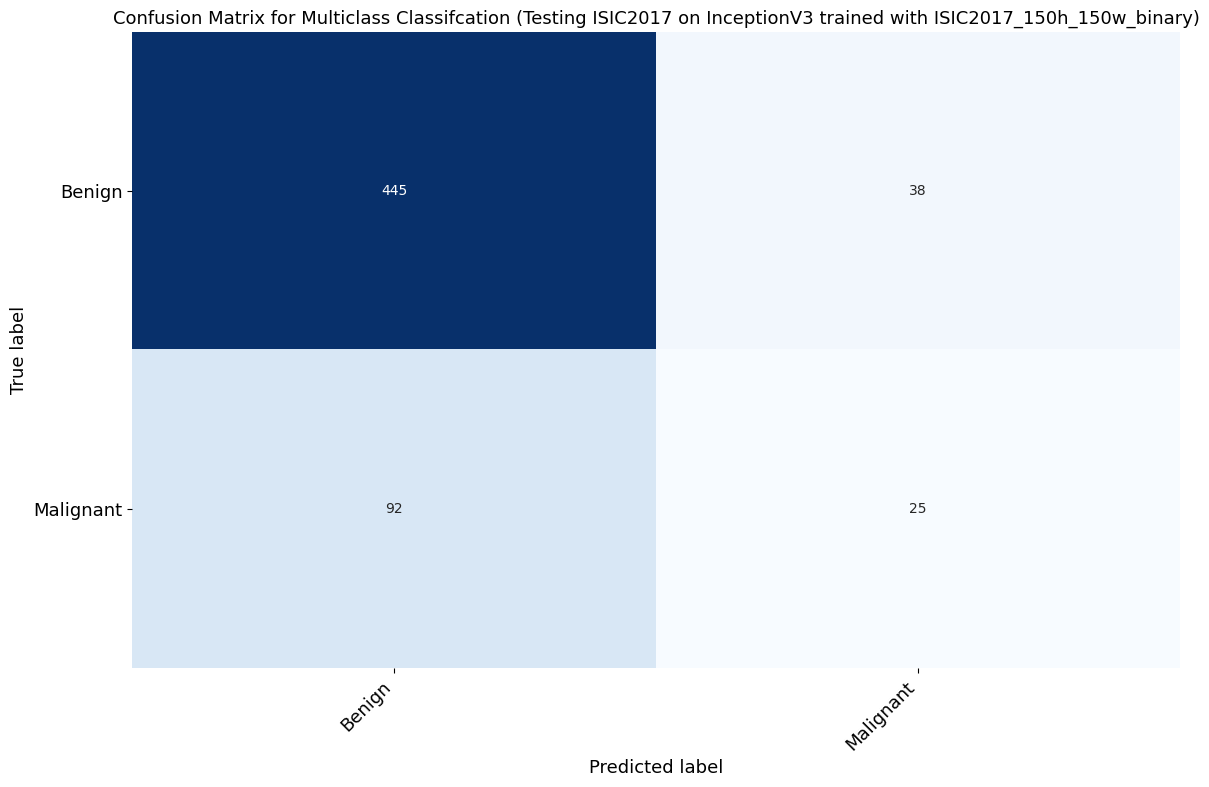

Testing on ISIC2018
Evaluating Testing ISIC2018 on InceptionV3 trained with ISIC2017_150h_150w_binary model...

313/313 [==============================] - 8s 22ms/step - loss: 0.2675 - accuracy: 0.8960
Train loss = 0.267495334148407  ;  Train accuracy = 89.60%

7/7 [==============================] - 0s 21ms/step - loss: 0.3656 - accuracy: 0.8446
Validation loss = 0.3655867576599121  ;  Validation accuracy = 84.46%

48/48 [==============================] - 1s 21ms/step - loss: 0.4467 - accuracy: 0.8333
Test loss = 0.4467245936393738  ;  Test accuracy = 83.33%
Computing predictions for Testing ISIC2018 on InceptionV3 trained with ISIC2017_150h_150w_binary...
Model report for Testing ISIC2018 on InceptionV3 trained with ISIC2017_150h_150w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.94      0.94      0.94      8902
   Malignant       0.53      0.55      0.54      1113

    accuracy                           0.90     10015
  

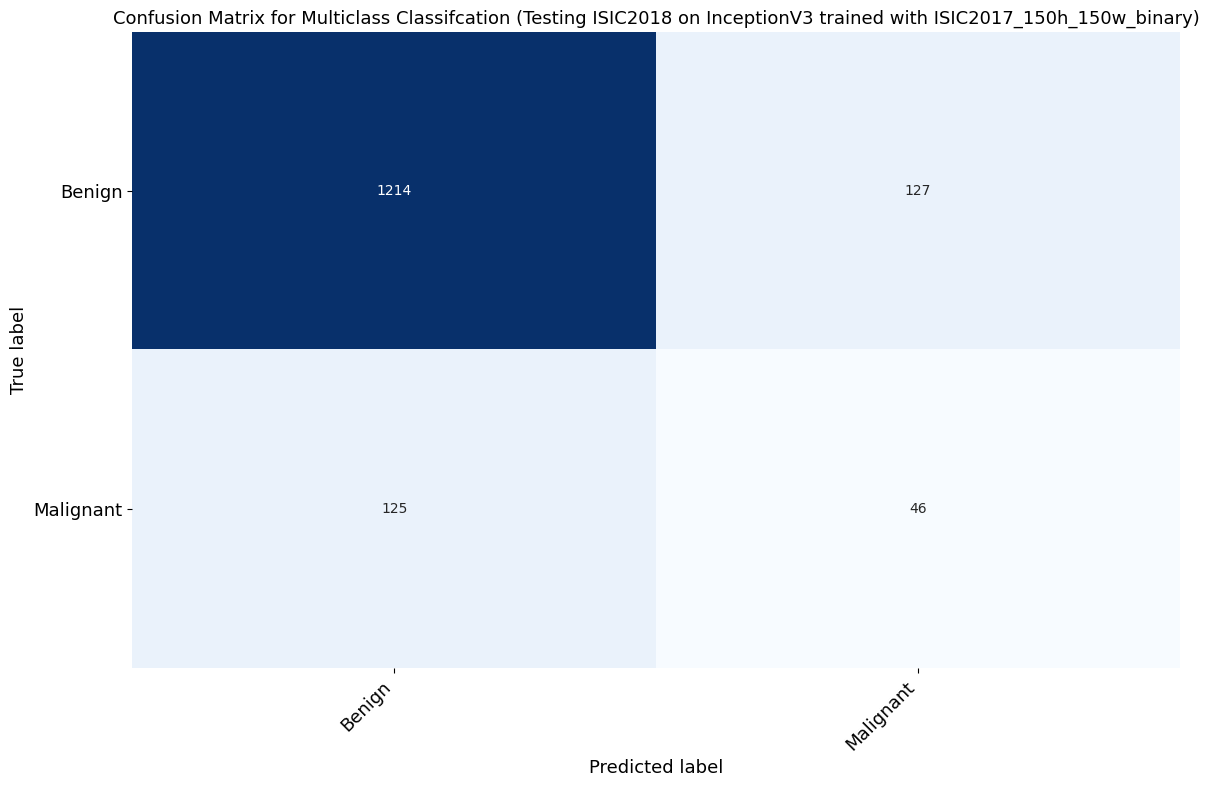

Fitting InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model...
Epoch 1/20
65/65 [==============================] - 5s 75ms/step - loss: 0.5374 - accuracy: 0.8042 - val_loss: 0.5764 - val_accuracy: 0.8758
Epoch 2/20
65/65 [==============================] - 2s 34ms/step - loss: 0.3376 - accuracy: 0.8512 - val_loss: 0.4714 - val_accuracy: 0.8697
Epoch 3/20
65/65 [==============================] - 2s 32ms/step - loss: 0.2629 - accuracy: 0.8811 - val_loss: 0.4277 - val_accuracy: 0.8879
Epoch 4/20
65/65 [==============================] - 2s 34ms/step - loss: 0.2153 - accuracy: 0.9048 - val_loss: 0.4605 - val_accuracy: 0.8788
Epoch 5/20
65/65 [==============================] - 2s 32ms/step - loss: 0.1778 - accuracy: 0.9255 - val_loss: 0.4394 - val_accuracy: 0.9091
Epoch 6/20
65/65 [==============================] - 2s 32ms/step - loss: 0.1563 - accuracy: 0.9347 - val_loss: 0.4584 - val_accuracy: 0.8758
Epoch 7/20
65/65 [==============================] - 2s 32ms/step - loss: 0.137

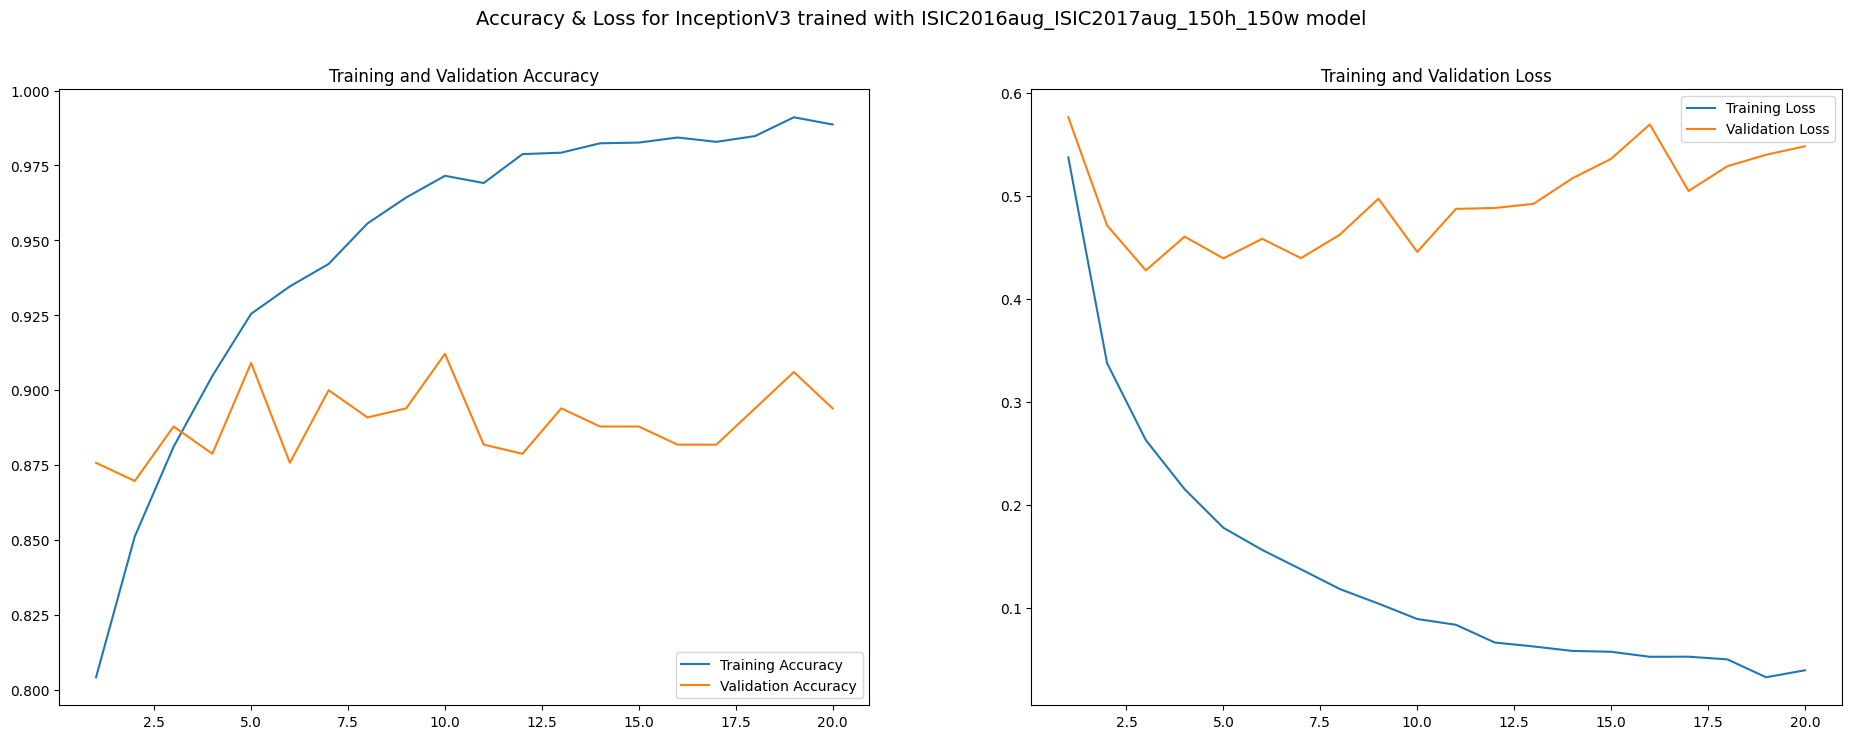

Testing on Kaggle DB
Evaluating Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model...

52/52 [==============================] - 3s 21ms/step - loss: 0.9502 - accuracy: 0.7031
Train loss = 0.9502058029174805  ;  Train accuracy = 70.31%

32/32 [==============================] - 1s 21ms/step - loss: 0.9980 - accuracy: 0.6930
Validation loss = 0.9980107545852661  ;  Validation accuracy = 69.30%

21/21 [==============================] - 0s 21ms/step - loss: 0.9339 - accuracy: 0.7030
Test loss = 0.9339452385902405  ;  Test accuracy = 70.30%
Computing predictions for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w...
Model report for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.69      0.84      0.76       909
   Malignant       0.73      0.53      0.61       728

    accuracy               

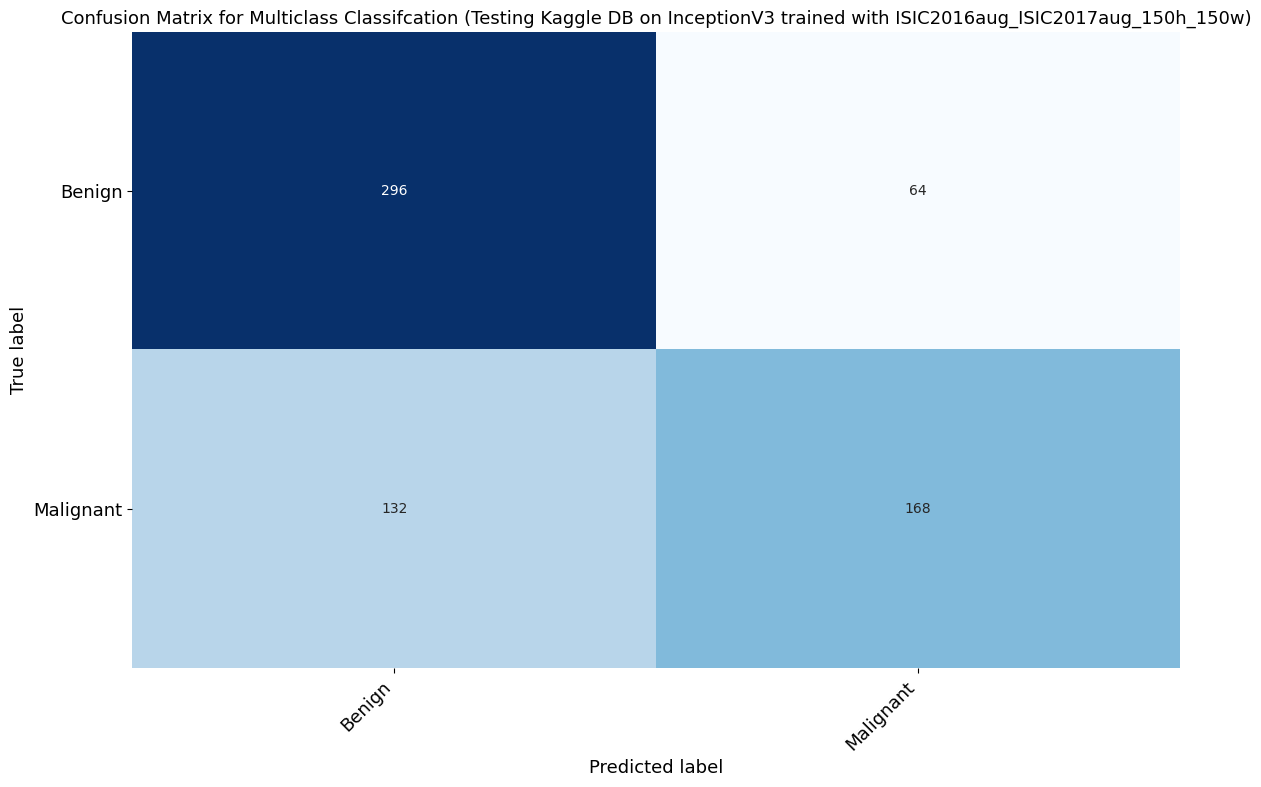

Testing on HAM10000
Evaluating Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model...

251/251 [==============================] - 6s 22ms/step - loss: 0.5834 - accuracy: 0.7647
Train loss = 0.5833847522735596  ;  Train accuracy = 76.47%

28/28 [==============================] - 1s 22ms/step - loss: 0.5618 - accuracy: 0.7837
Validation loss = 0.5618284344673157  ;  Validation accuracy = 78.37%

35/35 [==============================] - 1s 21ms/step - loss: 0.5467 - accuracy: 0.7842
Test loss = 0.5467050671577454  ;  Test accuracy = 78.42%
Computing predictions for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w...
Model report for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.92      0.80      0.86      6994
   Malignant       0.28      0.54      0.37      1035

    accuracy                 

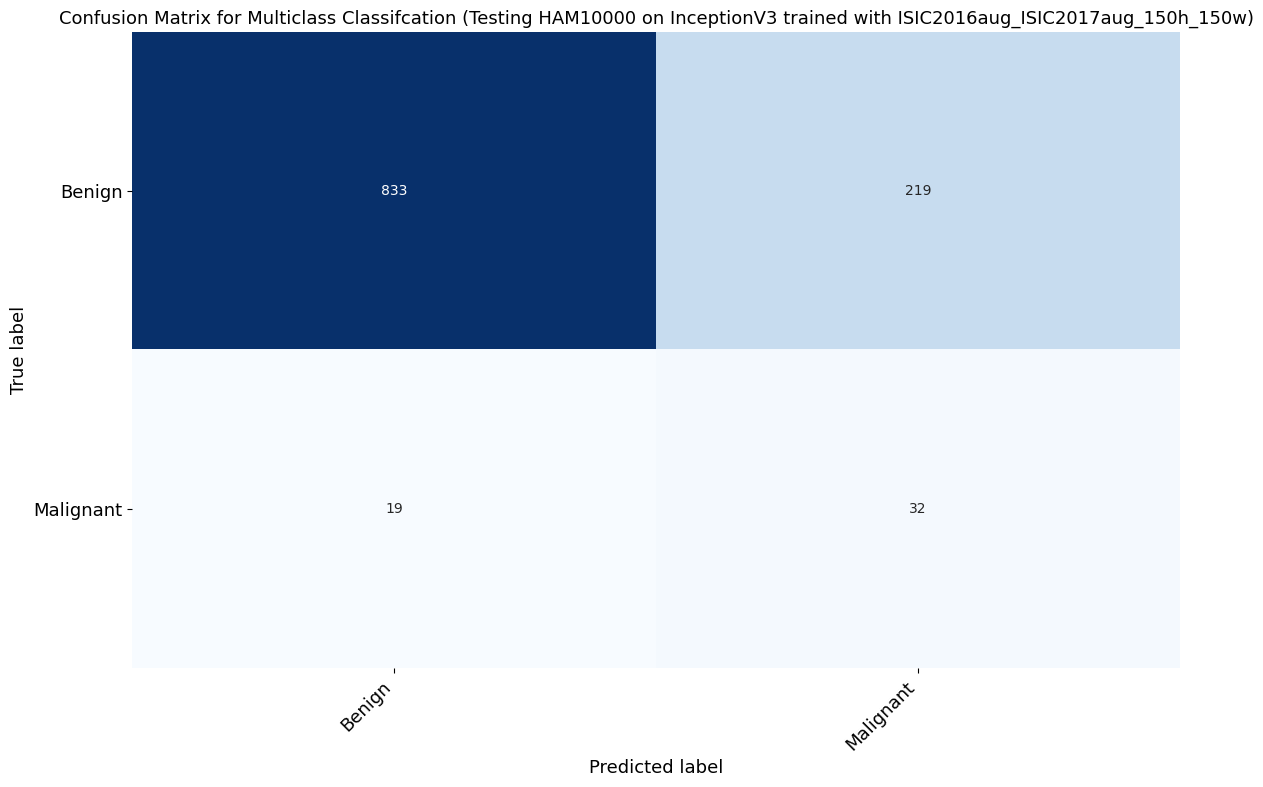

Testing on ISIC2016
Evaluating Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model...

23/23 [==============================] - 1s 21ms/step - loss: 0.0493 - accuracy: 0.9875
Train loss = 0.04925507307052612  ;  Train accuracy = 98.75%

6/6 [==============================] - 0s 21ms/step - loss: 0.1536 - accuracy: 0.9500
Validation loss = 0.153554305434227  ;  Validation accuracy = 95.00%

12/12 [==============================] - 0s 21ms/step - loss: 0.1959 - accuracy: 0.9340
Test loss = 0.19585634768009186  ;  Test accuracy = 93.40%
Computing predictions for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w...
Model report for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      0.99       583
   Malignant       0.94      0.99      0.97       137

    accuracy                    

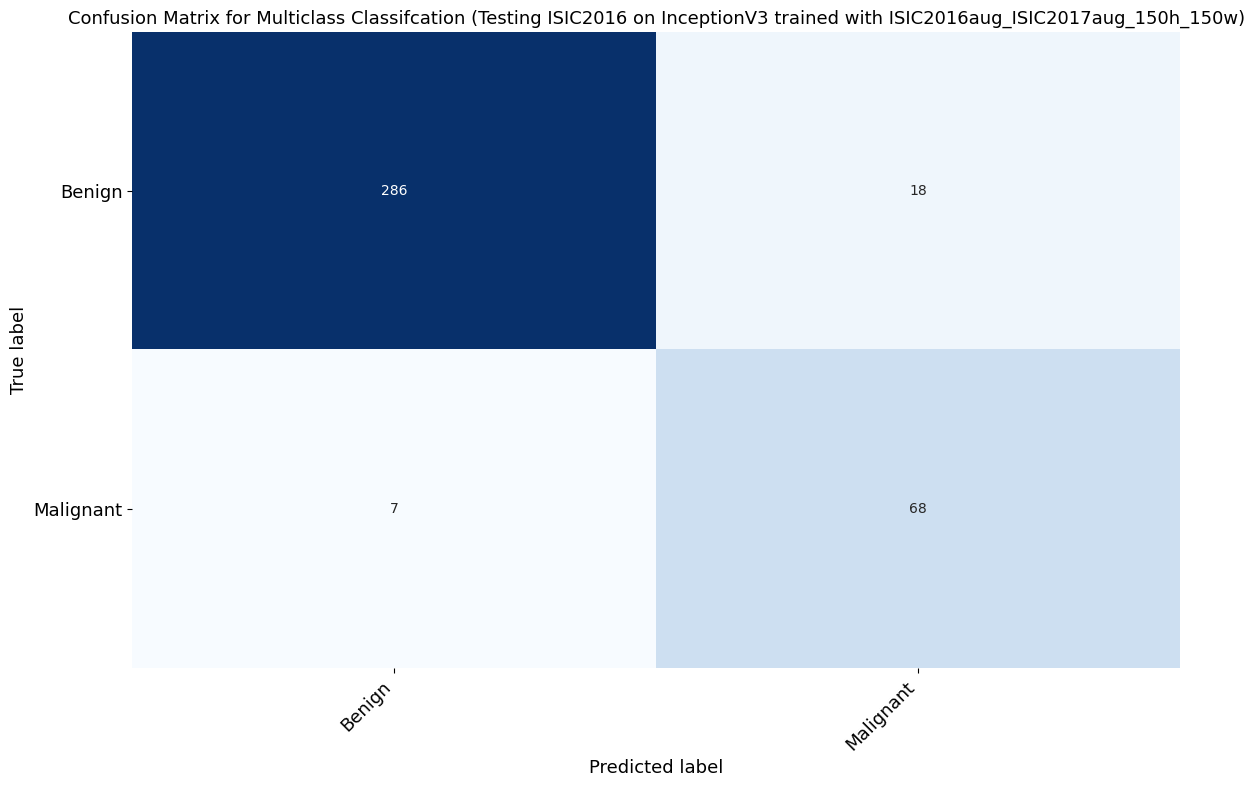

Testing on ISIC2017
Evaluating Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model...

63/63 [==============================] - 2s 23ms/step - loss: 0.0390 - accuracy: 0.9940
Train loss = 0.03901347517967224  ;  Train accuracy = 99.40%

5/5 [==============================] - 0s 21ms/step - loss: 0.7569 - accuracy: 0.8133
Validation loss = 0.7568572759628296  ;  Validation accuracy = 81.33%

19/19 [==============================] - 0s 23ms/step - loss: 0.7912 - accuracy: 0.7600
Test loss = 0.7911959886550903  ;  Test accuracy = 76.00%
Computing predictions for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w...
Model report for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1626
   Malignant       0.99      0.98      0.98       374

    accuracy                    

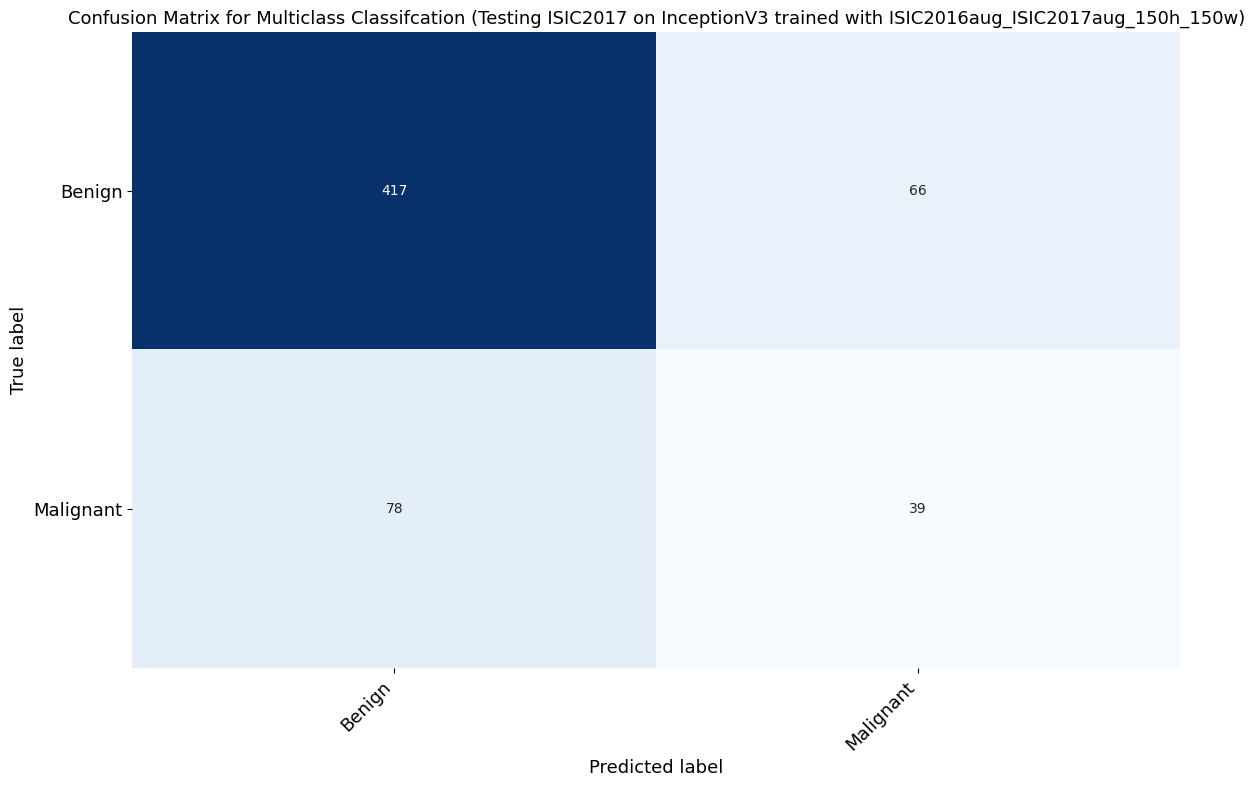

Testing on ISIC2018
Evaluating Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model...

313/313 [==============================] - 8s 23ms/step - loss: 0.5774 - accuracy: 0.7685
Train loss = 0.5774468183517456  ;  Train accuracy = 76.85%

7/7 [==============================] - 0s 21ms/step - loss: 0.6136 - accuracy: 0.7565
Validation loss = 0.6136048436164856  ;  Validation accuracy = 75.65%

48/48 [==============================] - 1s 21ms/step - loss: 0.7479 - accuracy: 0.7361
Test loss = 0.7479093074798584  ;  Test accuracy = 73.61%
Computing predictions for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w...
Model report for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.93      0.80      0.86      8902
   Malignant       0.25      0.54      0.34      1113

    accuracy                   

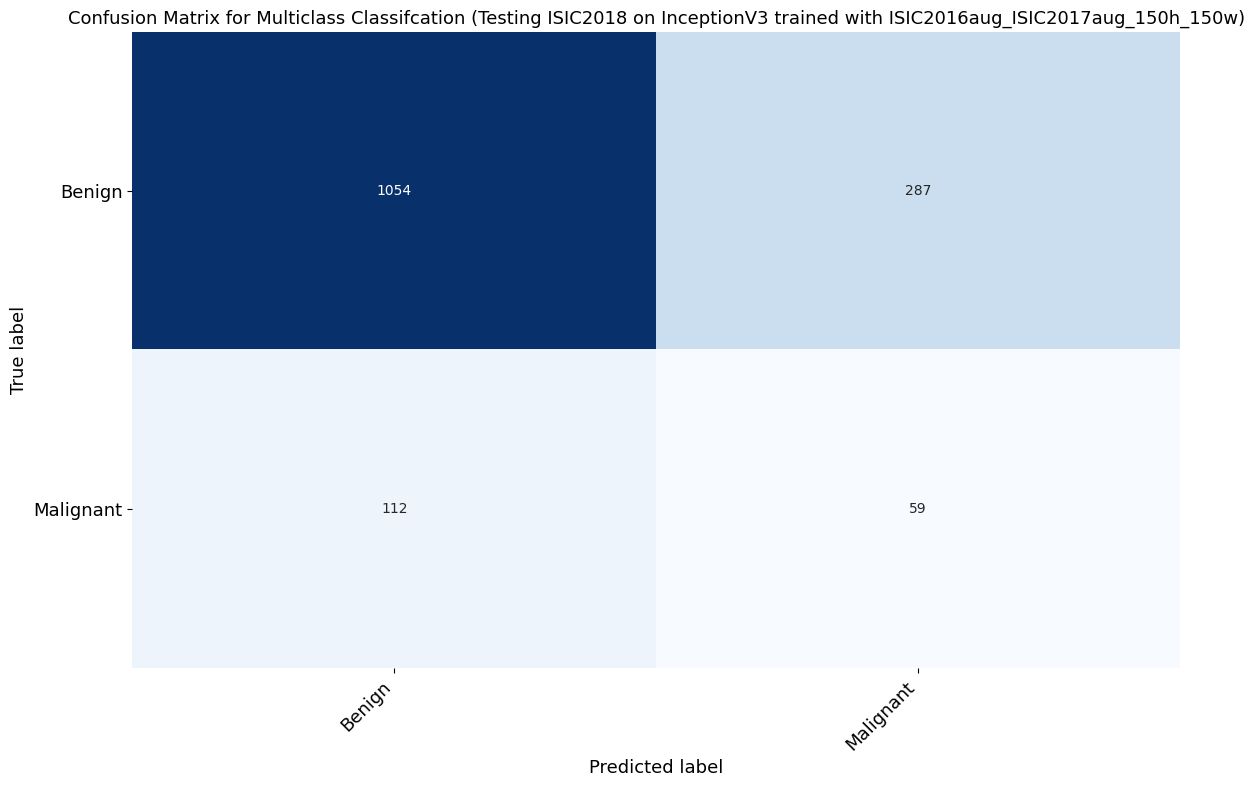

Fitting InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model...
Epoch 1/20
91/91 [==============================] - 5s 56ms/step - loss: 0.3541 - accuracy: 0.9039 - val_loss: 0.7408 - val_accuracy: 0.8000
Epoch 2/20
91/91 [==============================] - 4s 40ms/step - loss: 0.2493 - accuracy: 0.9155 - val_loss: 0.7714 - val_accuracy: 0.7797
Epoch 3/20
91/91 [==============================] - 3s 38ms/step - loss: 0.1849 - accuracy: 0.9341 - val_loss: 0.7826 - val_accuracy: 0.7774
Epoch 4/20
91/91 [==============================] - 4s 39ms/step - loss: 0.1801 - accuracy: 0.9340 - val_loss: 0.6546 - val_accuracy: 0.7992
Epoch 5/20
91/91 [==============================] - 3s 38ms/step - loss: 0.1314 - accuracy: 0.9509 - val_loss: 0.6440 - val_accuracy: 0.8000
Epoch 6/20
91/91 [==============================] - 4s 40ms/step - loss: 0.1227 - accuracy: 0.9528 - val_loss: 0.6119 - val_accuracy: 0.8188
Epoch 7/20
91/91 [==============================] - 3s 38ms/step - lo

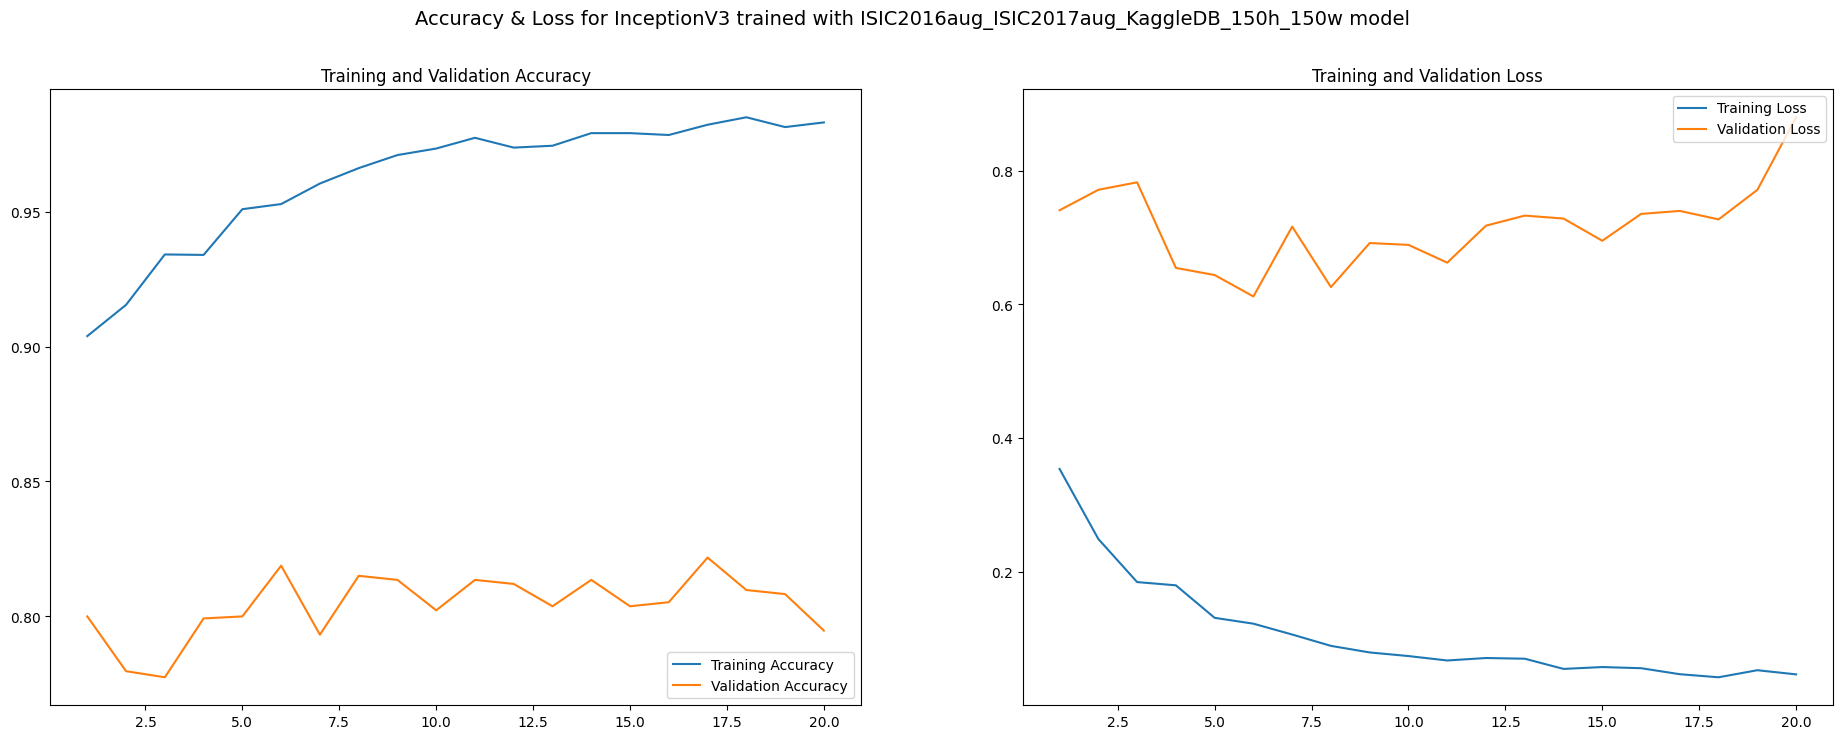

Testing on Kaggle DB
Evaluating Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model...

52/52 [==============================] - 2s 21ms/step - loss: 0.1071 - accuracy: 0.9652
Train loss = 0.10709338635206223  ;  Train accuracy = 96.52%

32/32 [==============================] - 1s 29ms/step - loss: 0.6896 - accuracy: 0.7930
Validation loss = 0.6895623803138733  ;  Validation accuracy = 79.30%

21/21 [==============================] - 0s 23ms/step - loss: 0.5961 - accuracy: 0.8061
Test loss = 0.5961363315582275  ;  Test accuracy = 80.61%
Computing predictions for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w...
Model report for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.98      0.97       909
   Malignant       0.98      0.95      0.96       728


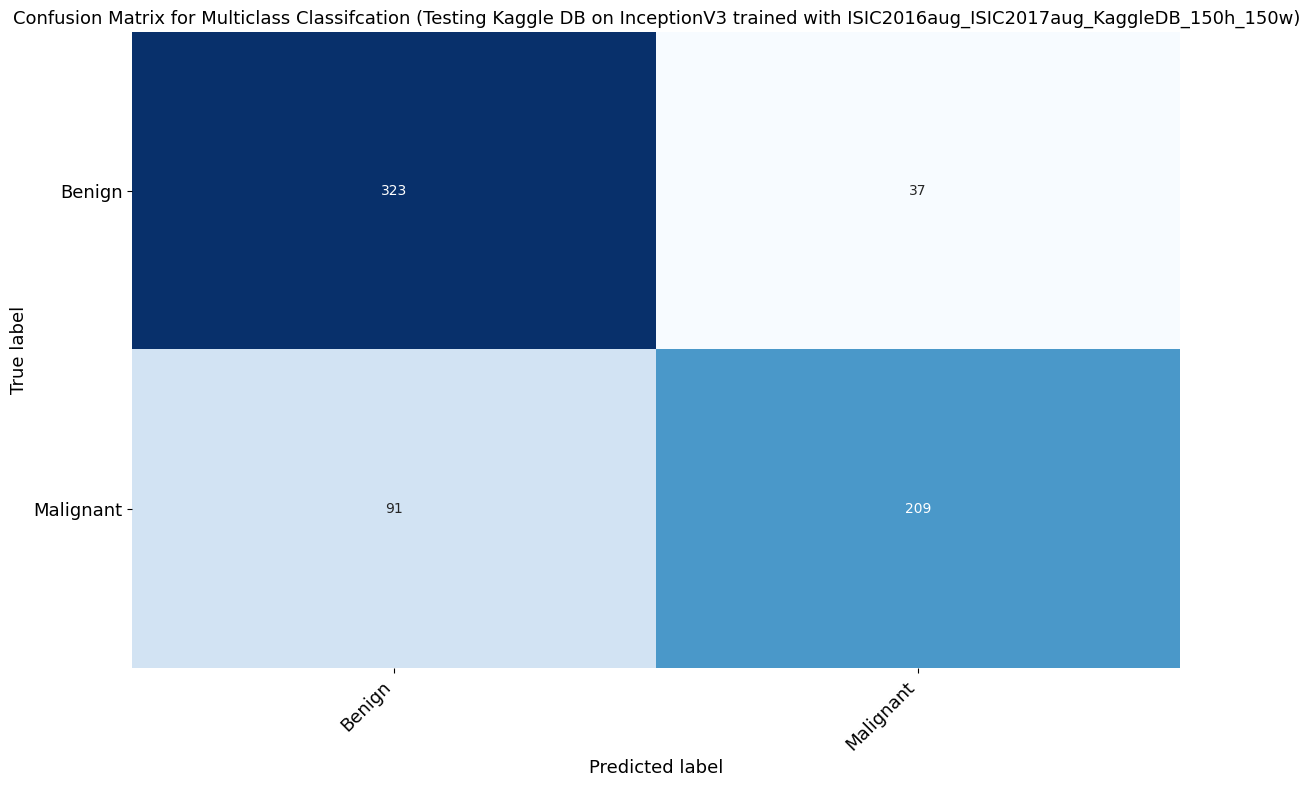

Testing on HAM10000
Evaluating Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model...

251/251 [==============================] - 6s 22ms/step - loss: 0.6223 - accuracy: 0.7925
Train loss = 0.6223075985908508  ;  Train accuracy = 79.25%

28/28 [==============================] - 1s 21ms/step - loss: 0.5129 - accuracy: 0.8516
Validation loss = 0.5128796696662903  ;  Validation accuracy = 85.16%

35/35 [==============================] - 1s 21ms/step - loss: 0.5061 - accuracy: 0.8540
Test loss = 0.506112277507782  ;  Test accuracy = 85.40%
Computing predictions for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w...
Model report for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.80      0.87      6994
   Malignant       0.35      0.72      0.47      1035

   

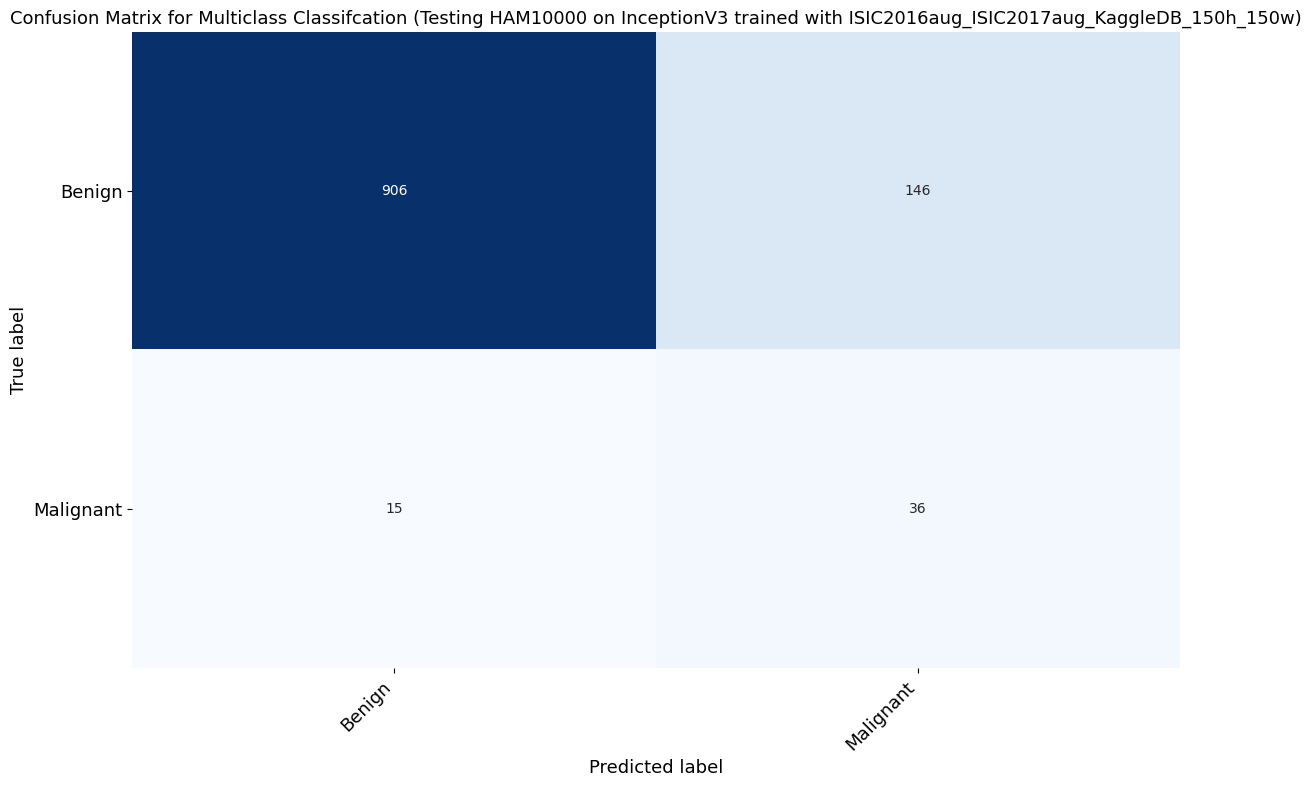

Testing on ISIC2016
Evaluating Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model...

23/23 [==============================] - 1s 21ms/step - loss: 0.0332 - accuracy: 0.9889
Train loss = 0.03316923603415489  ;  Train accuracy = 98.89%

6/6 [==============================] - 0s 21ms/step - loss: 0.1783 - accuracy: 0.9667
Validation loss = 0.17830467224121094  ;  Validation accuracy = 96.67%

12/12 [==============================] - 0s 21ms/step - loss: 0.1817 - accuracy: 0.9340
Test loss = 0.18166886270046234  ;  Test accuracy = 93.40%
Computing predictions for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w...
Model report for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      0.99       583
   Malignant       0.96      0.99      0.97       137

   

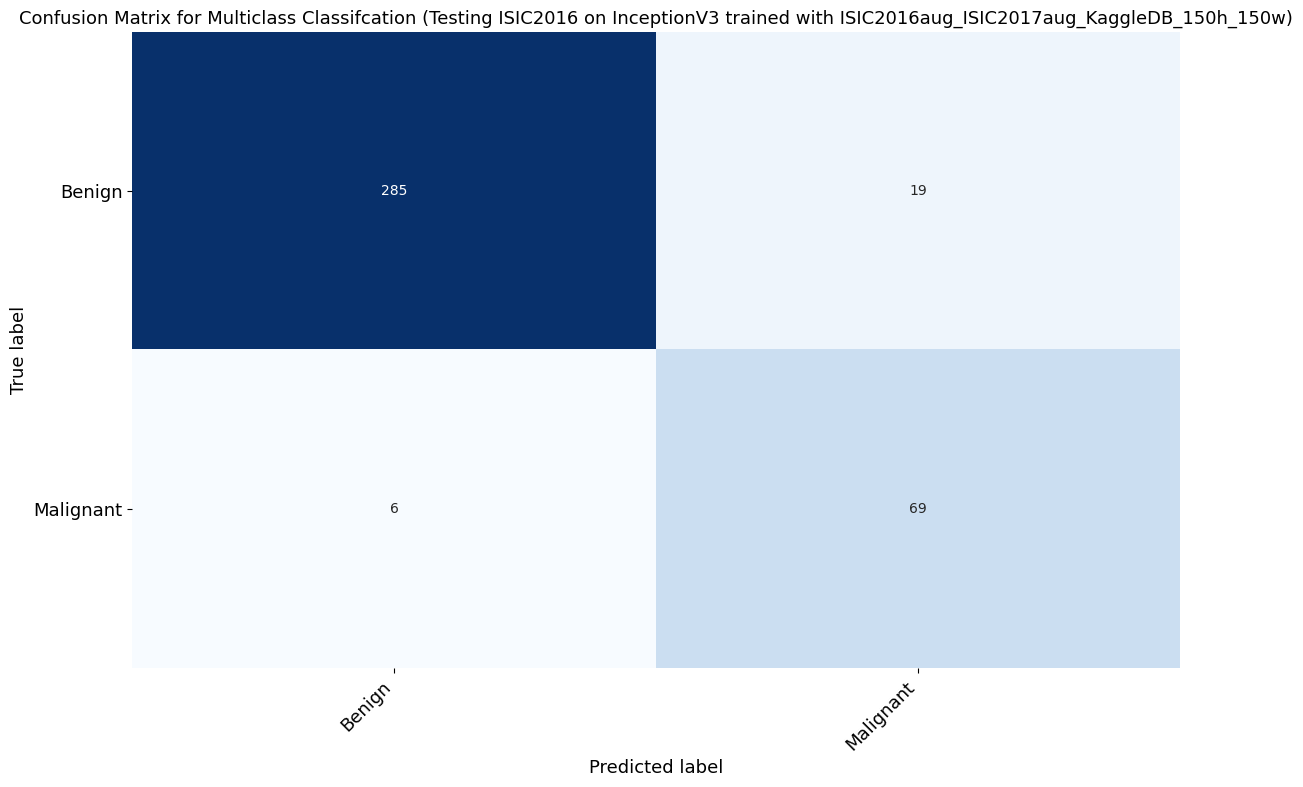

Testing on ISIC2017
Evaluating Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model...

63/63 [==============================] - 2s 23ms/step - loss: 0.0328 - accuracy: 0.9920
Train loss = 0.03277638554573059  ;  Train accuracy = 99.20%

5/5 [==============================] - 0s 21ms/step - loss: 0.6149 - accuracy: 0.8133
Validation loss = 0.6148931384086609  ;  Validation accuracy = 81.33%

19/19 [==============================] - 0s 21ms/step - loss: 0.7725 - accuracy: 0.7767
Test loss = 0.7724564075469971  ;  Test accuracy = 77.67%
Computing predictions for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w...
Model report for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      1.00      1626
   Malignant       0.97      0.99      0.98       374

    a

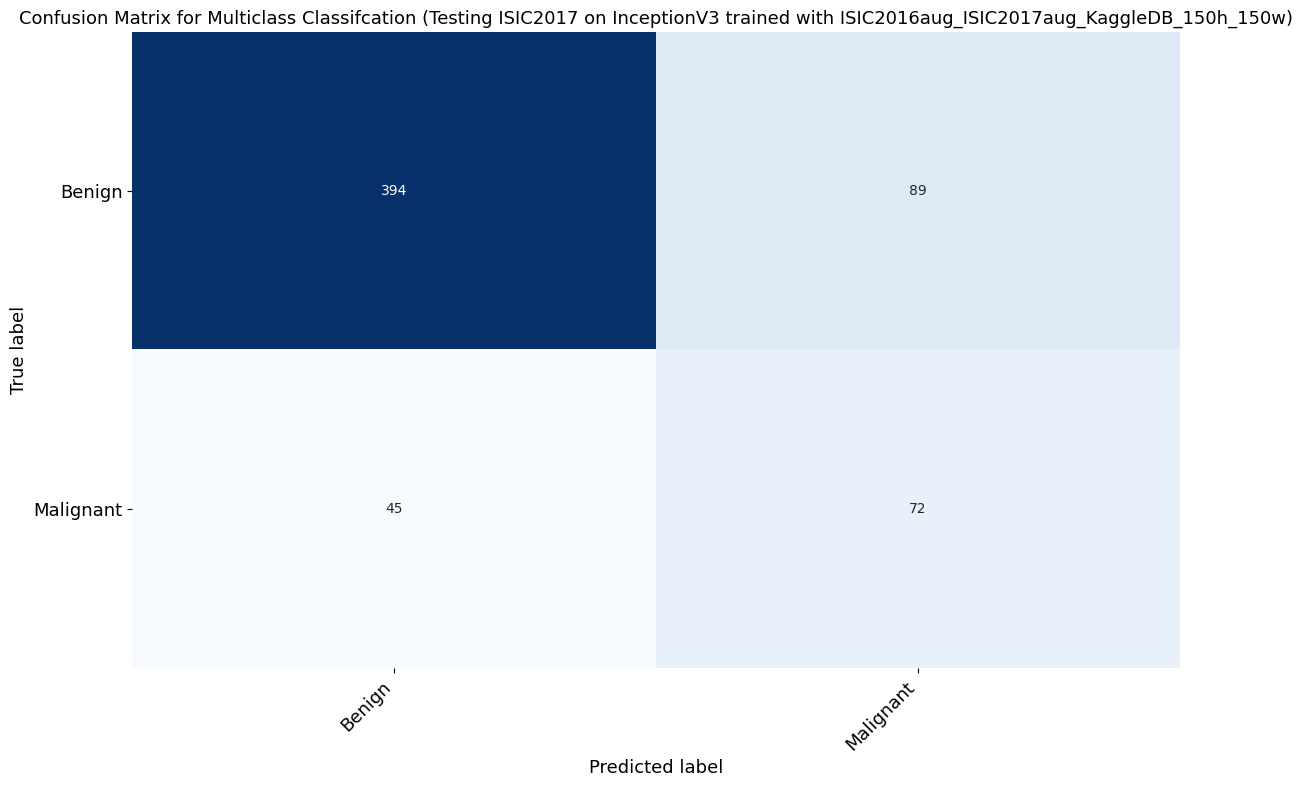

Testing on ISIC2018
Evaluating Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model...

313/313 [==============================] - 8s 23ms/step - loss: 0.5999 - accuracy: 0.8045
Train loss = 0.5998588800430298  ;  Train accuracy = 80.45%

7/7 [==============================] - 0s 21ms/step - loss: 0.9138 - accuracy: 0.7254
Validation loss = 0.913845956325531  ;  Validation accuracy = 72.54%

48/48 [==============================] - 1s 21ms/step - loss: 0.9107 - accuracy: 0.7454
Test loss = 0.9106643199920654  ;  Test accuracy = 74.54%
Computing predictions for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w...
Model report for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.82      0.88      8902
   Malignant       0.33      0.71      0.45      1113

    a

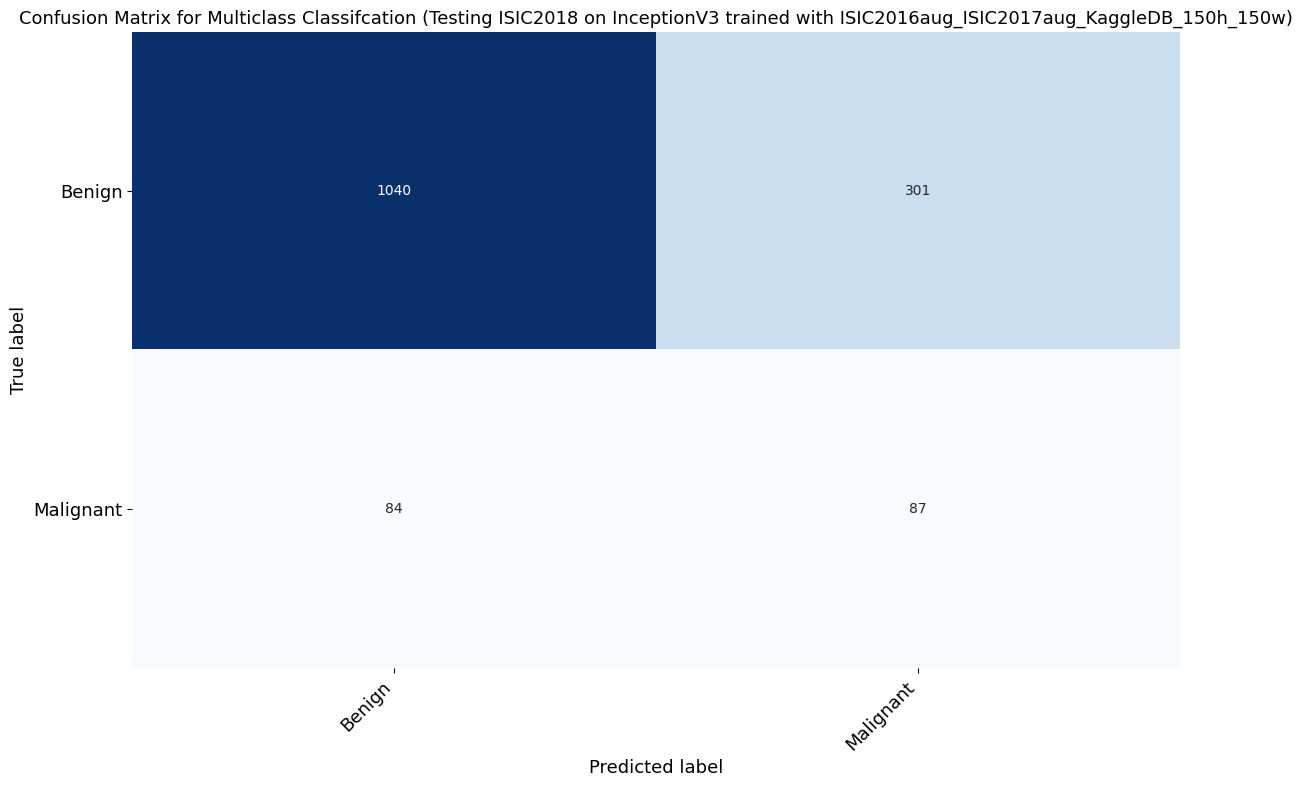

Fitting InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model...
Epoch 1/20
320/320 [==============================] - 12s 37ms/step - loss: 0.5038 - accuracy: 0.8091 - val_loss: 0.5552 - val_accuracy: 0.7873
Epoch 2/20
320/320 [==============================] - 10s 32ms/step - loss: 0.3596 - accuracy: 0.8451 - val_loss: 0.6431 - val_accuracy: 0.7649
Epoch 3/20
320/320 [==============================] - 10s 32ms/step - loss: 0.3142 - accuracy: 0.8628 - val_loss: 0.5089 - val_accuracy: 0.7919
Epoch 4/20
320/320 [==============================] - 10s 33ms/step - loss: 0.2812 - accuracy: 0.8770 - val_loss: 0.5189 - val_accuracy: 0.7892
Epoch 5/20
320/320 [==============================] - 11s 33ms/step - loss: 0.2634 - accuracy: 0.8858 - val_loss: 0.5353 - val_accuracy: 0.7905
Epoch 6/20
320/320 [==============================] - 10s 32ms/step - loss: 0.2422 - accuracy: 0.8964 - val_loss: 0.5378 - val_accuracy: 0.8050
Epoch 7/20
320/320 [===================

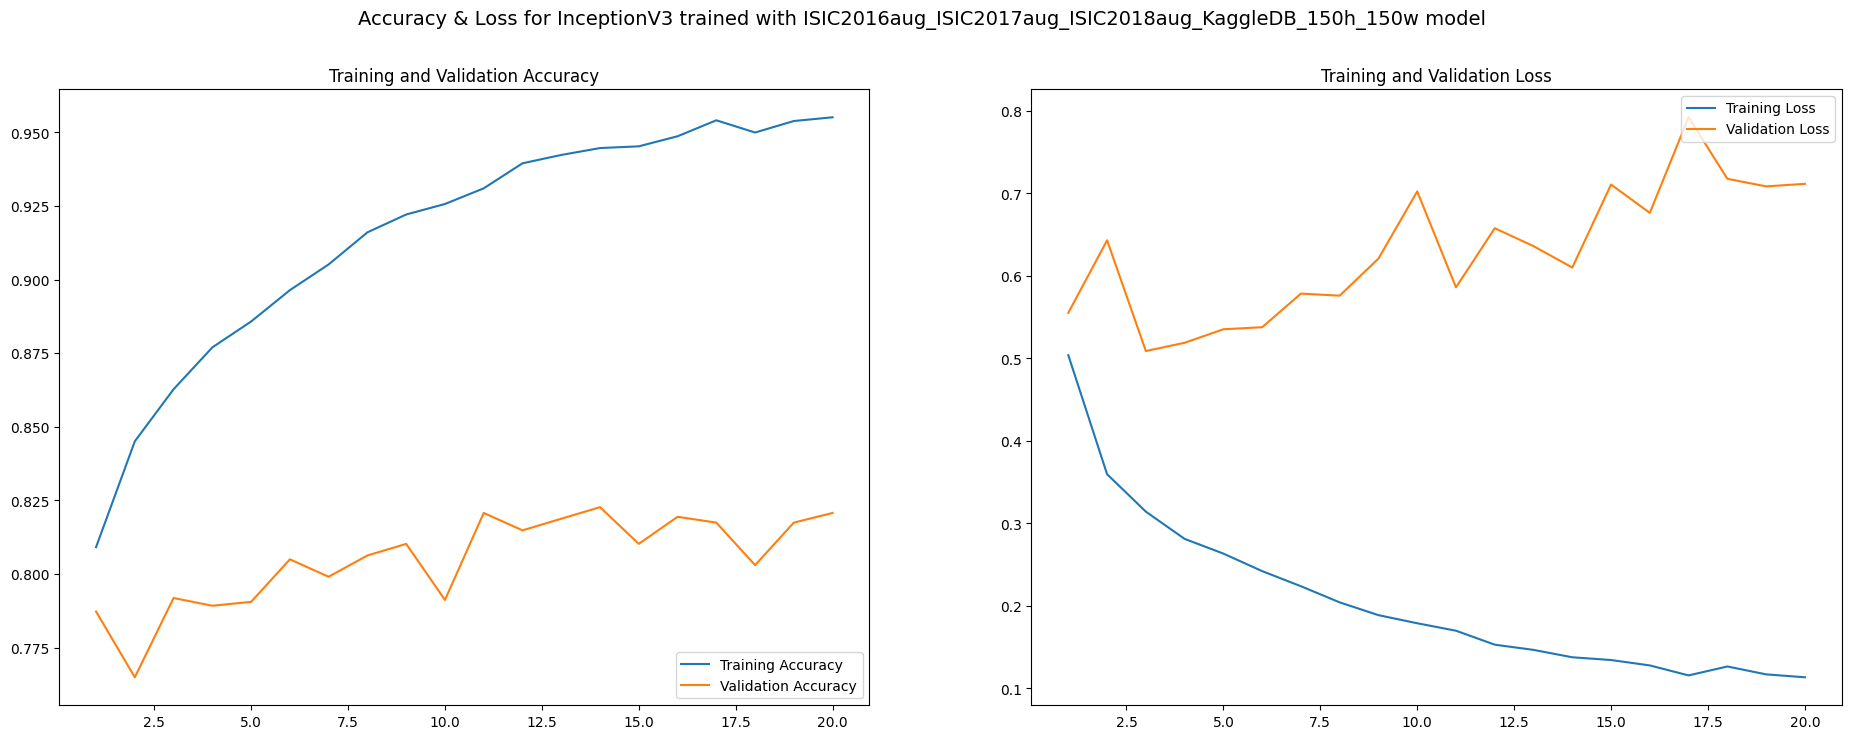

Testing on Kaggle DB
Evaluating Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model...

52/52 [==============================] - 2s 28ms/step - loss: 0.1644 - accuracy: 0.9438
Train loss = 0.16436928510665894  ;  Train accuracy = 94.38%

32/32 [==============================] - 1s 23ms/step - loss: 0.5901 - accuracy: 0.7640
Validation loss = 0.590088427066803  ;  Validation accuracy = 76.40%

21/21 [==============================] - 0s 21ms/step - loss: 0.4954 - accuracy: 0.7848
Test loss = 0.49538731575012207  ;  Test accuracy = 78.48%
Computing predictions for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w...
Model report for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.92      0.99      0.95       909
   Malignant      

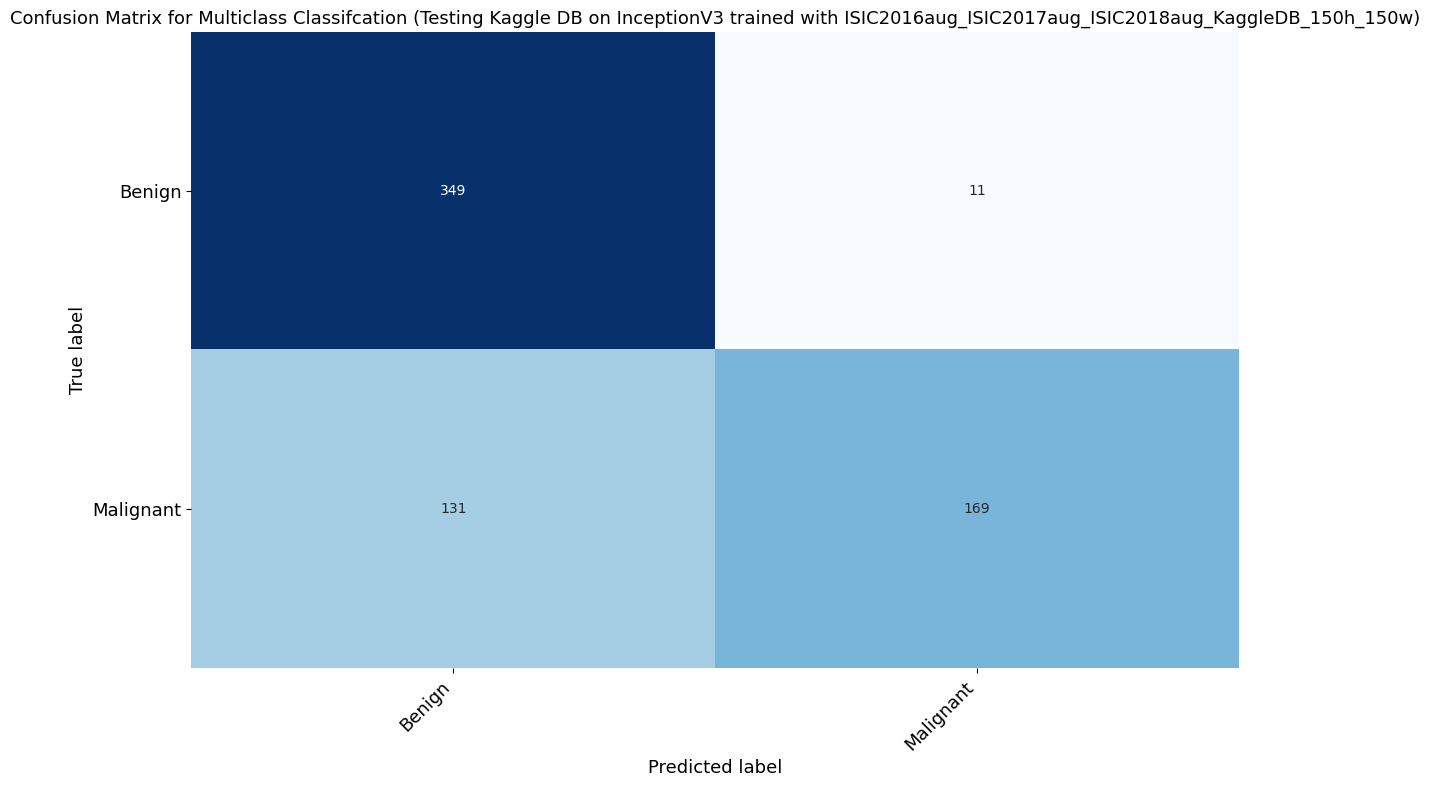

Testing on HAM10000
Evaluating Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model...

251/251 [==============================] - 6s 22ms/step - loss: 0.1999 - accuracy: 0.9258
Train loss = 0.1999492645263672  ;  Train accuracy = 92.58%

28/28 [==============================] - 1s 21ms/step - loss: 0.1485 - accuracy: 0.9445
Validation loss = 0.14850959181785583  ;  Validation accuracy = 94.45%

35/35 [==============================] - 1s 21ms/step - loss: 0.1486 - accuracy: 0.9447
Test loss = 0.14863307774066925  ;  Test accuracy = 94.47%
Computing predictions for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w...
Model report for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.95      0.96      6994
   Malignant       

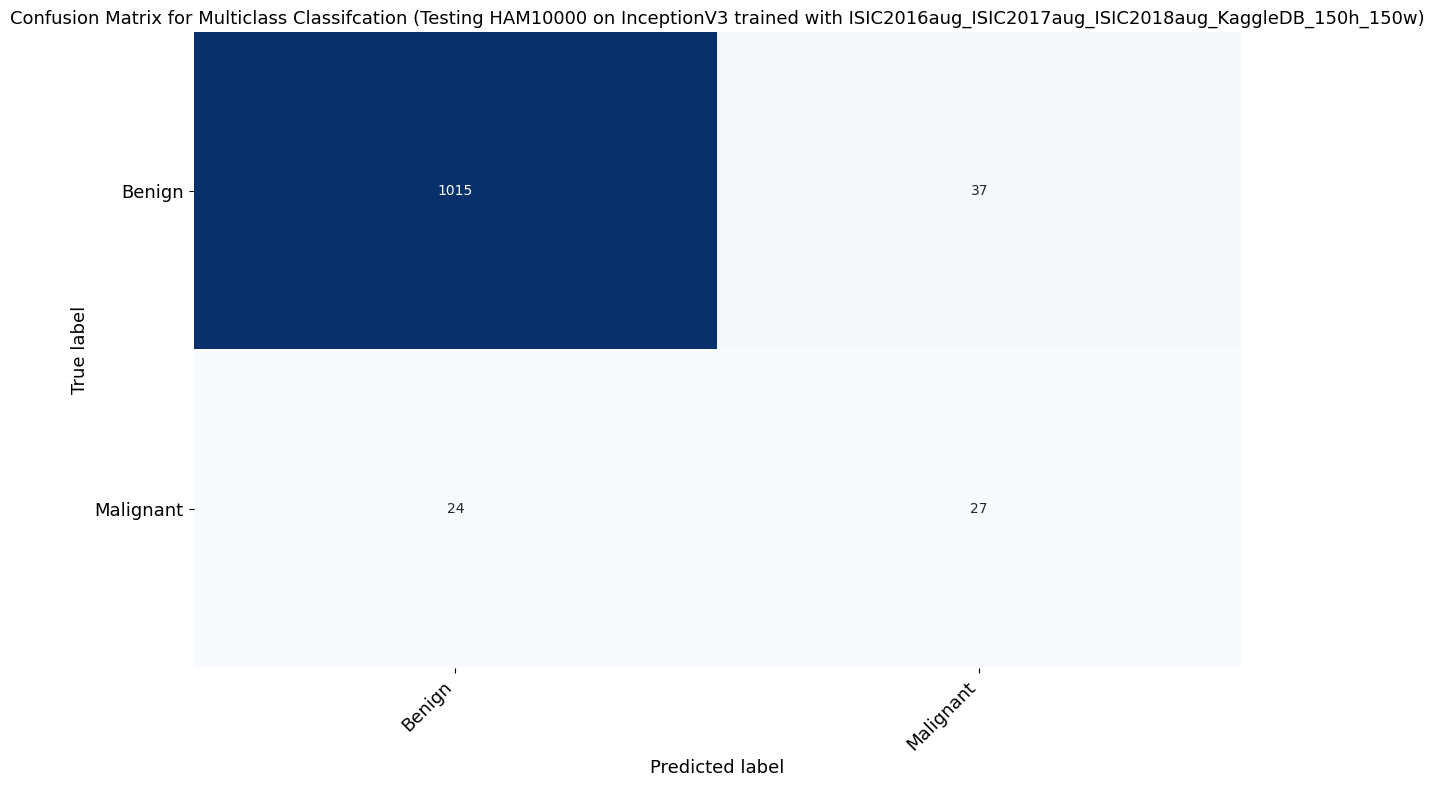

Testing on ISIC2016
Evaluating Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model...

23/23 [==============================] - 1s 21ms/step - loss: 0.0931 - accuracy: 0.9667
Train loss = 0.09305080771446228  ;  Train accuracy = 96.67%

6/6 [==============================] - 0s 21ms/step - loss: 0.2051 - accuracy: 0.9111
Validation loss = 0.20511628687381744  ;  Validation accuracy = 91.11%

12/12 [==============================] - 0s 21ms/step - loss: 0.2600 - accuracy: 0.8997
Test loss = 0.26004064083099365  ;  Test accuracy = 89.97%
Computing predictions for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w...
Model report for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       583
   Malignant       0.9

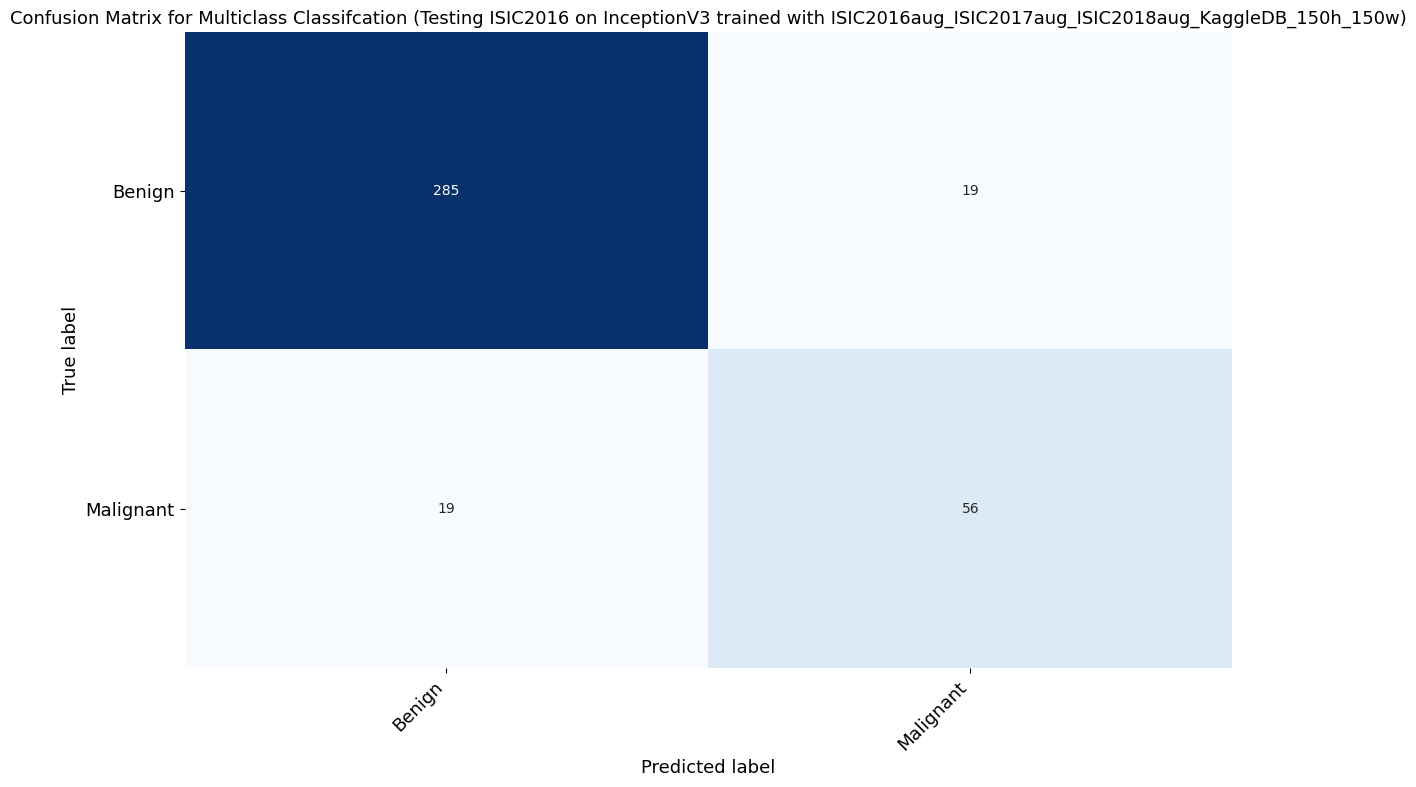

Testing on ISIC2017
Evaluating Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model...

63/63 [==============================] - 2s 21ms/step - loss: 0.0985 - accuracy: 0.9695
Train loss = 0.09847648441791534  ;  Train accuracy = 96.95%

5/5 [==============================] - 0s 21ms/step - loss: 0.5474 - accuracy: 0.7933
Validation loss = 0.5473607182502747  ;  Validation accuracy = 79.33%

19/19 [==============================] - 0s 21ms/step - loss: 0.5831 - accuracy: 0.7667
Test loss = 0.5830817818641663  ;  Test accuracy = 76.67%
Computing predictions for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w...
Model report for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98      1626
   Malignant       0.95 

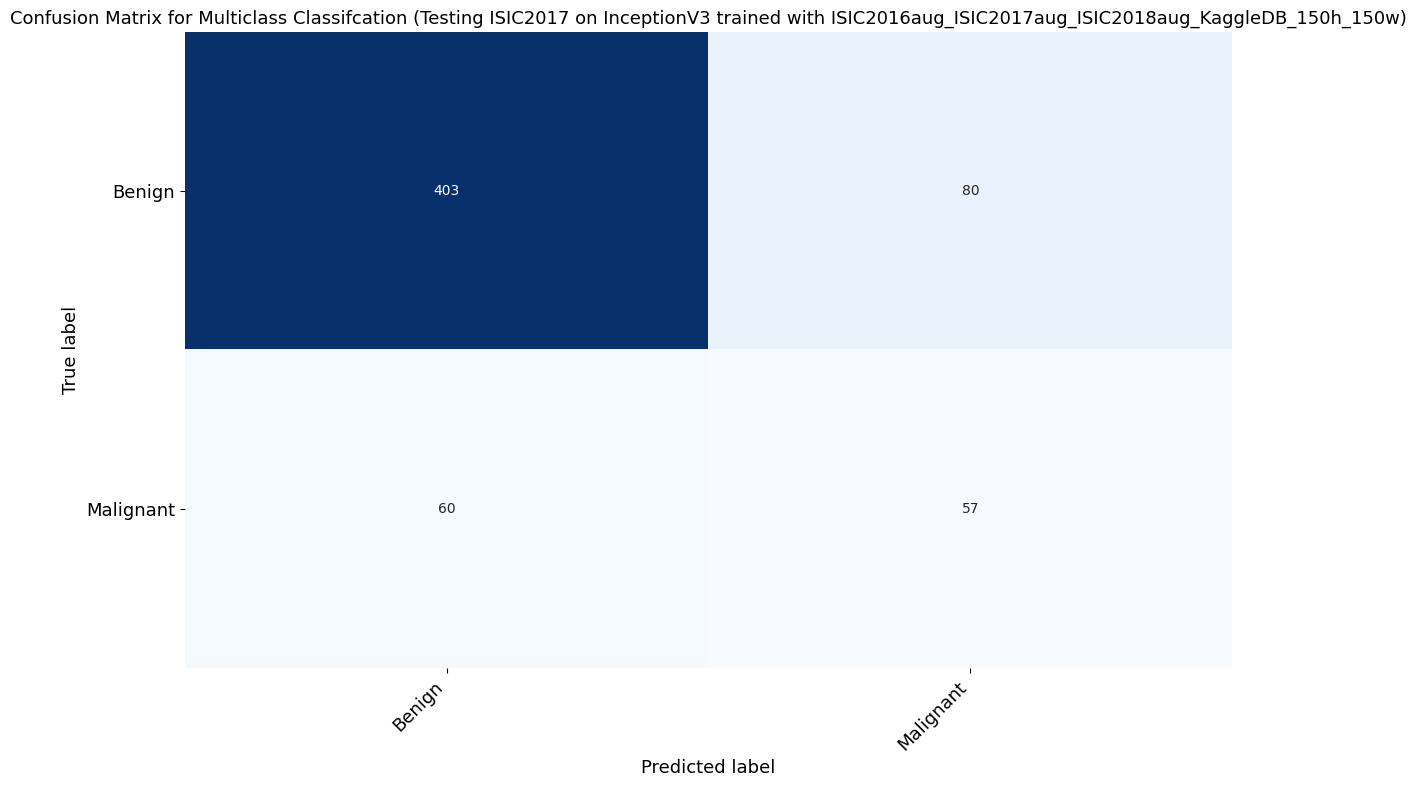

Testing on ISIC2018
Evaluating Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model...

313/313 [==============================] - 8s 22ms/step - loss: 0.1898 - accuracy: 0.9295
Train loss = 0.18975897133350372  ;  Train accuracy = 92.95%

7/7 [==============================] - 0s 26ms/step - loss: 0.3421 - accuracy: 0.8238
Validation loss = 0.34212300181388855  ;  Validation accuracy = 82.38%

48/48 [==============================] - 1s 23ms/step - loss: 0.4746 - accuracy: 0.8022
Test loss = 0.47460904717445374  ;  Test accuracy = 80.22%
Computing predictions for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w...
Model report for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.96      0.96      8902
   Malignant       0

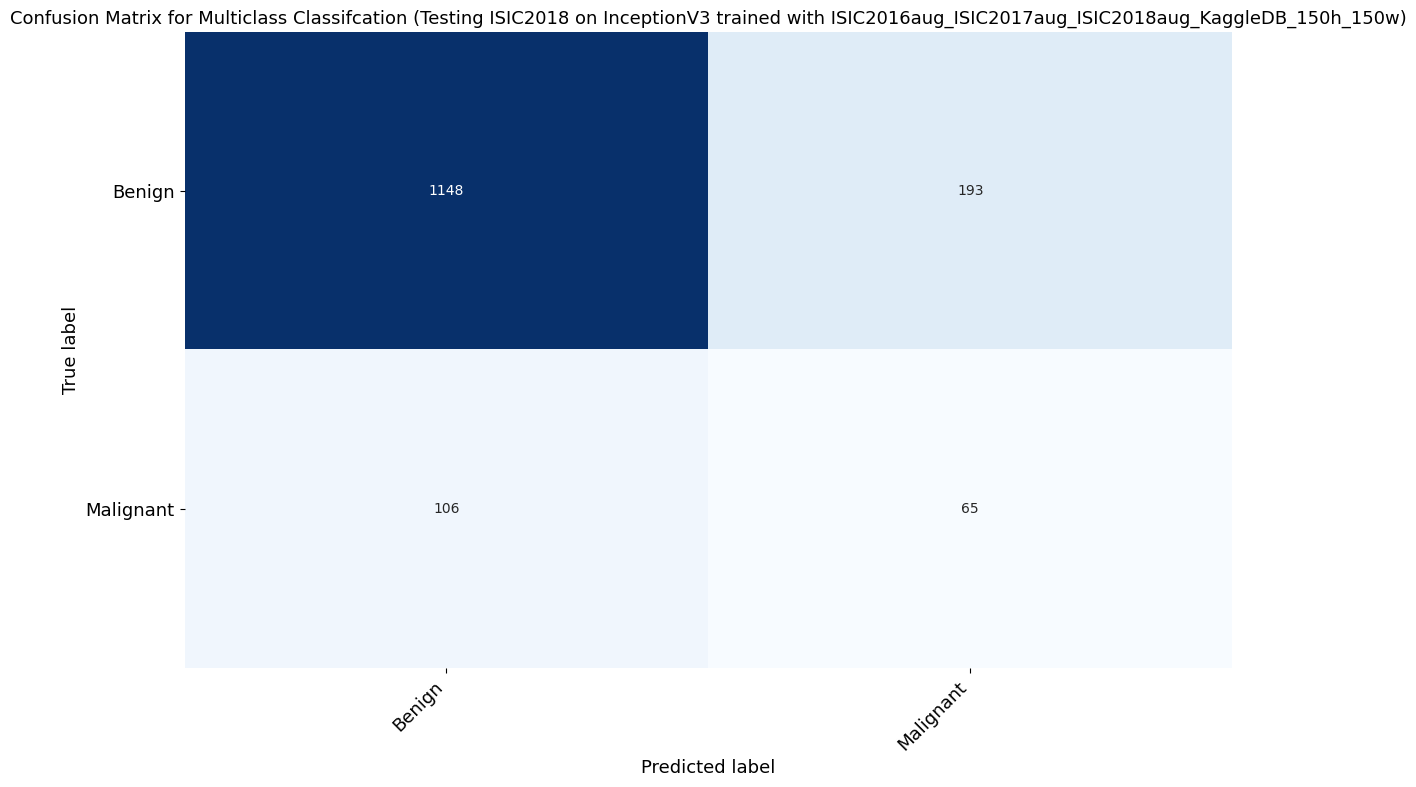

Fitting InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model...
Epoch 1/20
838/838 [==============================] - 30s 36ms/step - loss: 0.4380 - accuracy: 0.8227 - val_loss: 0.3548 - val_accuracy: 0.8590
Epoch 2/20
838/838 [==============================] - 29s 35ms/step - loss: 0.3534 - accuracy: 0.8433 - val_loss: 0.3429 - val_accuracy: 0.8601
Epoch 3/20
838/838 [==============================] - 29s 35ms/step - loss: 0.3314 - accuracy: 0.8544 - val_loss: 0.3583 - val_accuracy: 0.8589
Epoch 4/20
838/838 [==============================] - 30s 35ms/step - loss: 0.3179 - accuracy: 0.8637 - val_loss: 0.3398 - val_accuracy: 0.8680
Epoch 5/20
838/838 [==============================] - 30s 36ms/step - loss: 0.2946 - accuracy: 0.8731 - val_loss: 0.3387 - val_accuracy: 0.8710
Epoch 6/20
838/838 [==============================] - 30s 35ms/step - loss: 0.2793 - accuracy: 0.8803 - val_loss: 0.3636 - val_accuracy: 0.8675
Epoch 7/20
838/838 [=======

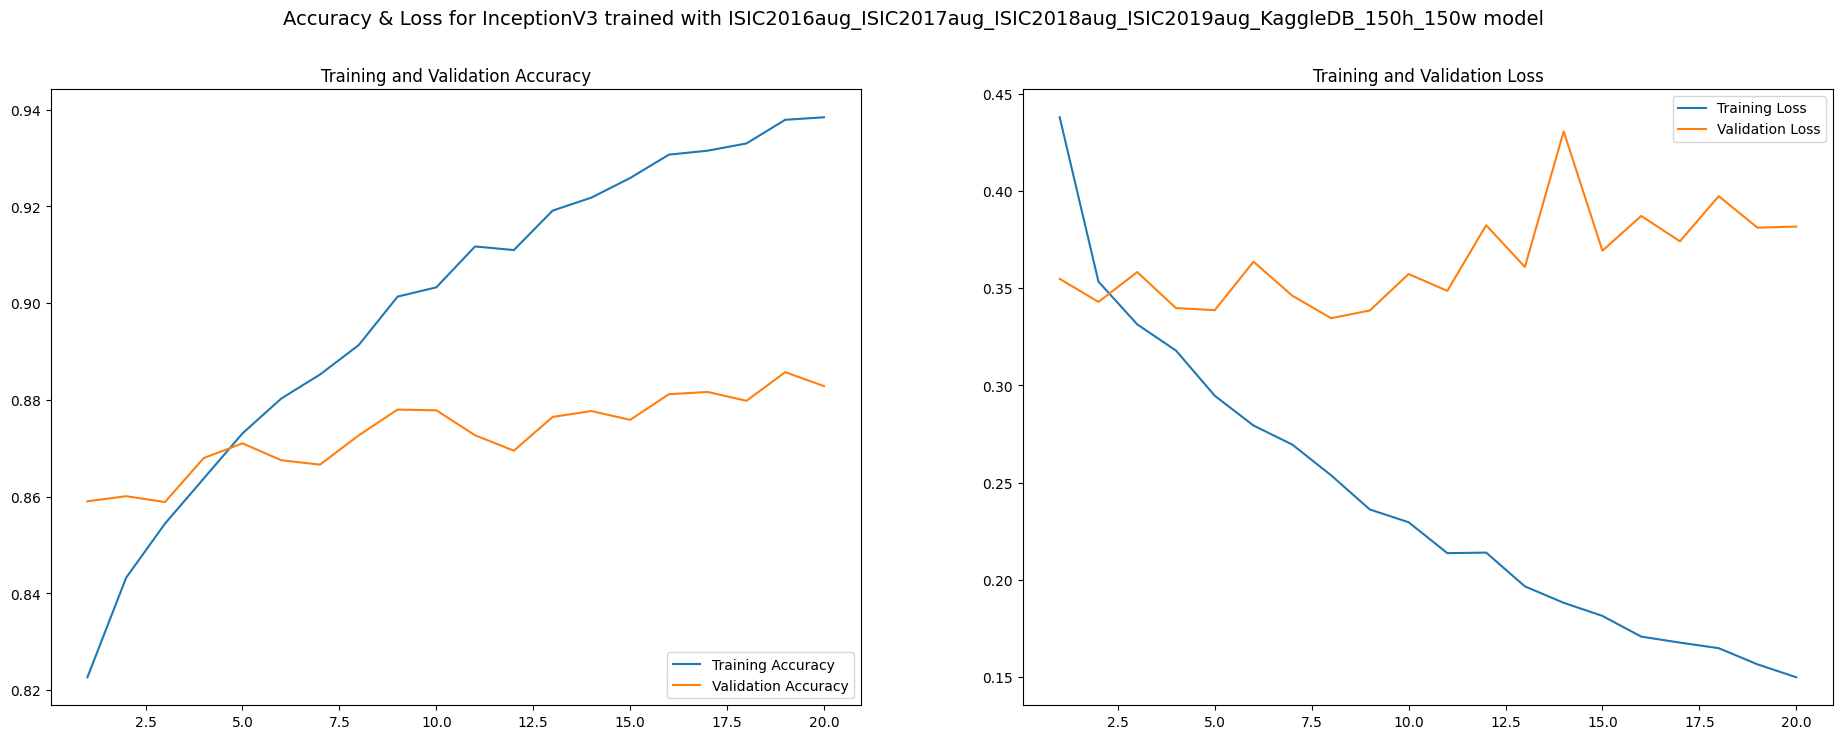

Testing on Kaggle DB
Evaluating Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model...

52/52 [==============================] - 3s 21ms/step - loss: 0.0923 - accuracy: 0.9768
Train loss = 0.09225881099700928  ;  Train accuracy = 97.68%

32/32 [==============================] - 1s 21ms/step - loss: 0.5127 - accuracy: 0.8080
Validation loss = 0.5126515626907349  ;  Validation accuracy = 80.80%

21/21 [==============================] - 0s 22ms/step - loss: 0.4391 - accuracy: 0.8303
Test loss = 0.4391424357891083  ;  Test accuracy = 83.03%
Computing predictions for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w...
Model report for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      1.00   

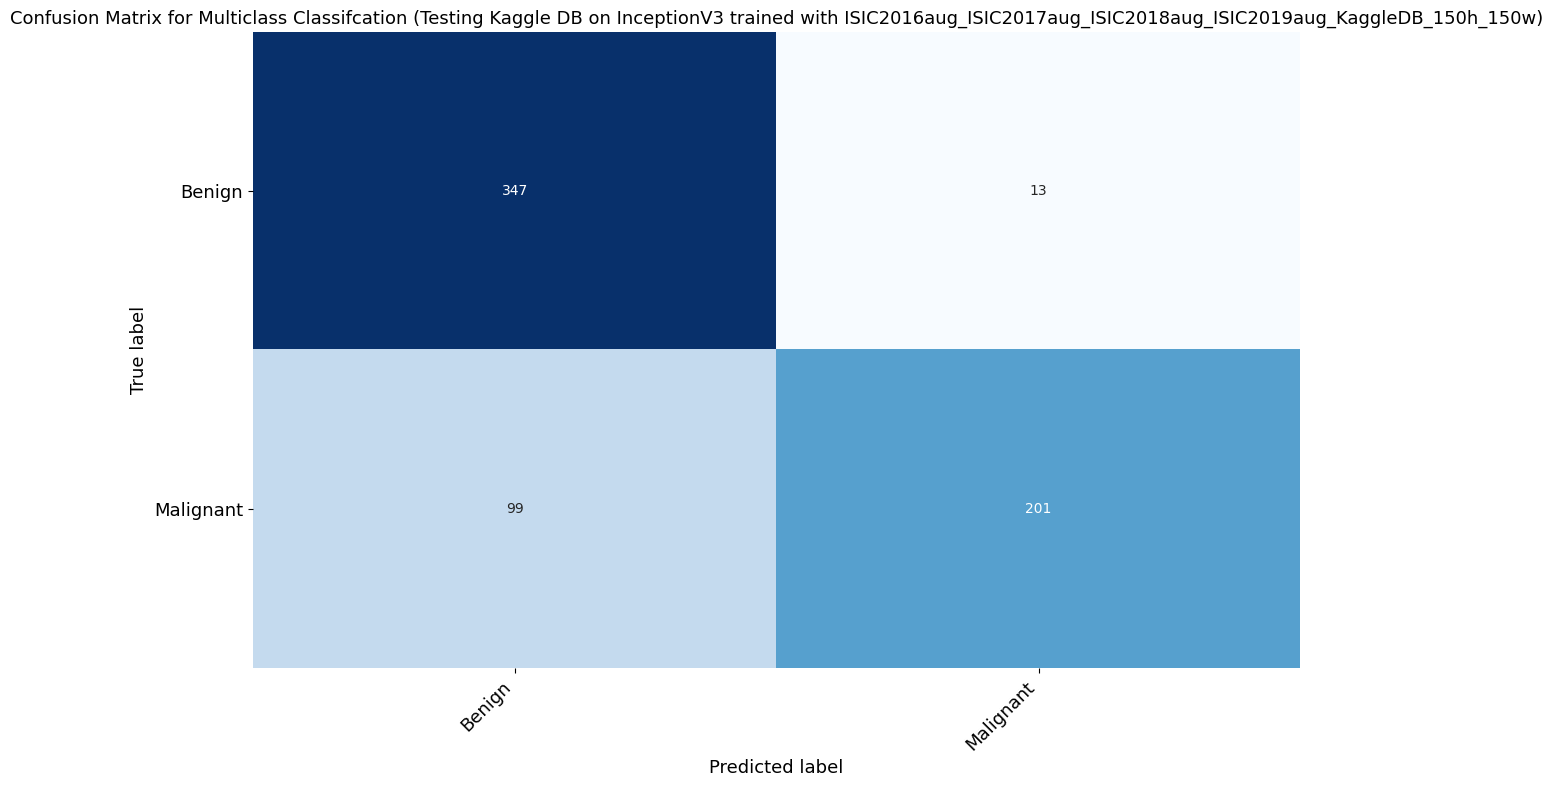

Testing on HAM10000
Evaluating Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model...

251/251 [==============================] - 6s 22ms/step - loss: 0.0727 - accuracy: 0.9833
Train loss = 0.07272839546203613  ;  Train accuracy = 98.33%

28/28 [==============================] - 1s 23ms/step - loss: 0.0462 - accuracy: 0.9864
Validation loss = 0.04620923474431038  ;  Validation accuracy = 98.64%

35/35 [==============================] - 1s 22ms/step - loss: 0.0433 - accuracy: 0.9909
Test loss = 0.043276745826005936  ;  Test accuracy = 99.09%
Computing predictions for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w...
Model report for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99  

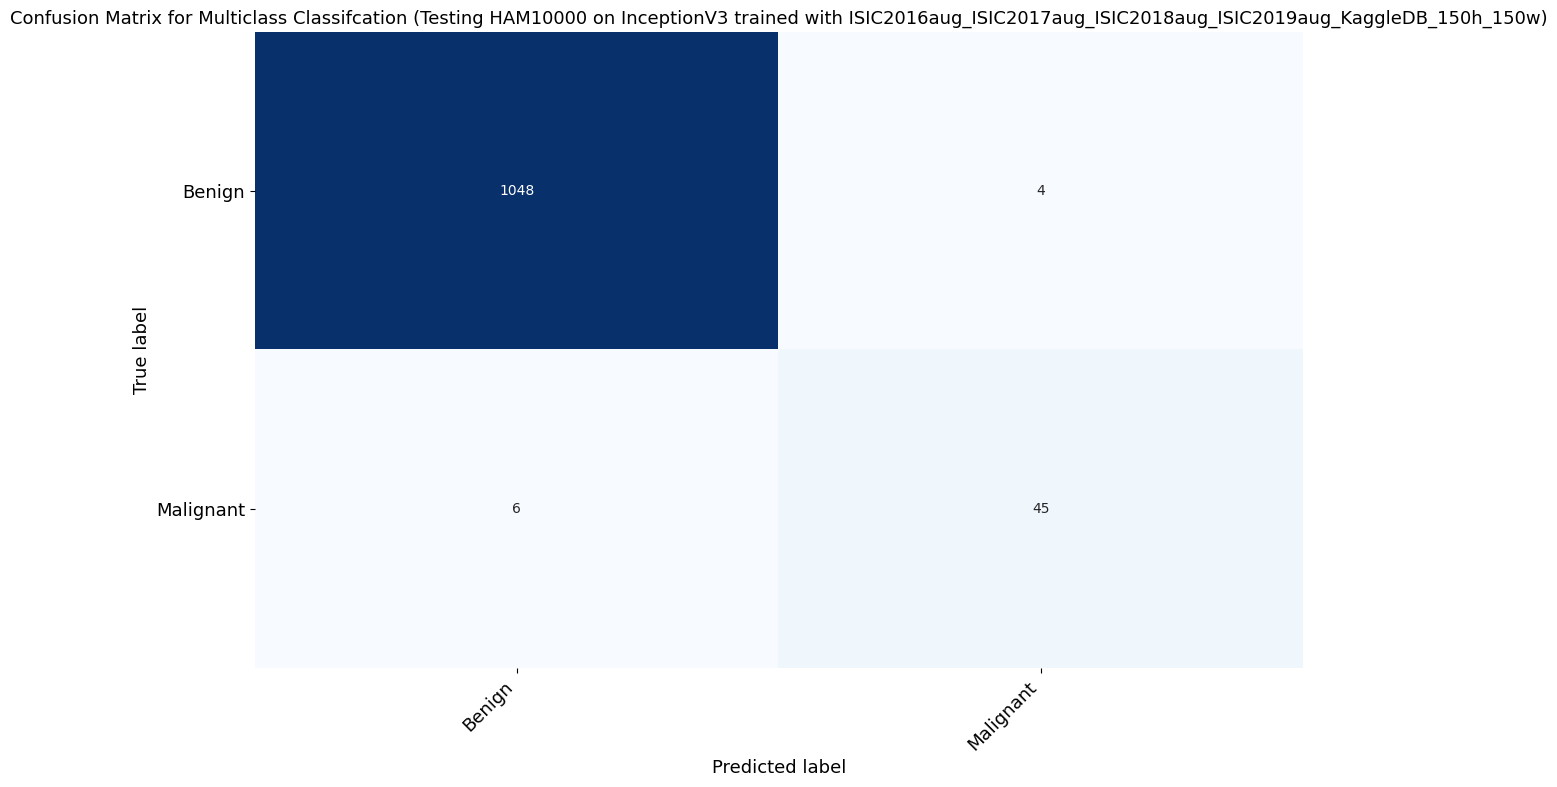

Testing on ISIC2016
Evaluating Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model...

23/23 [==============================] - 1s 21ms/step - loss: 0.0667 - accuracy: 0.9903
Train loss = 0.06671851128339767  ;  Train accuracy = 99.03%

6/6 [==============================] - 0s 21ms/step - loss: 0.2642 - accuracy: 0.9444
Validation loss = 0.264233261346817  ;  Validation accuracy = 94.44%

12/12 [==============================] - 0s 21ms/step - loss: 0.1526 - accuracy: 0.9472
Test loss = 0.15262962877750397  ;  Test accuracy = 94.72%
Computing predictions for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w...
Model report for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.9

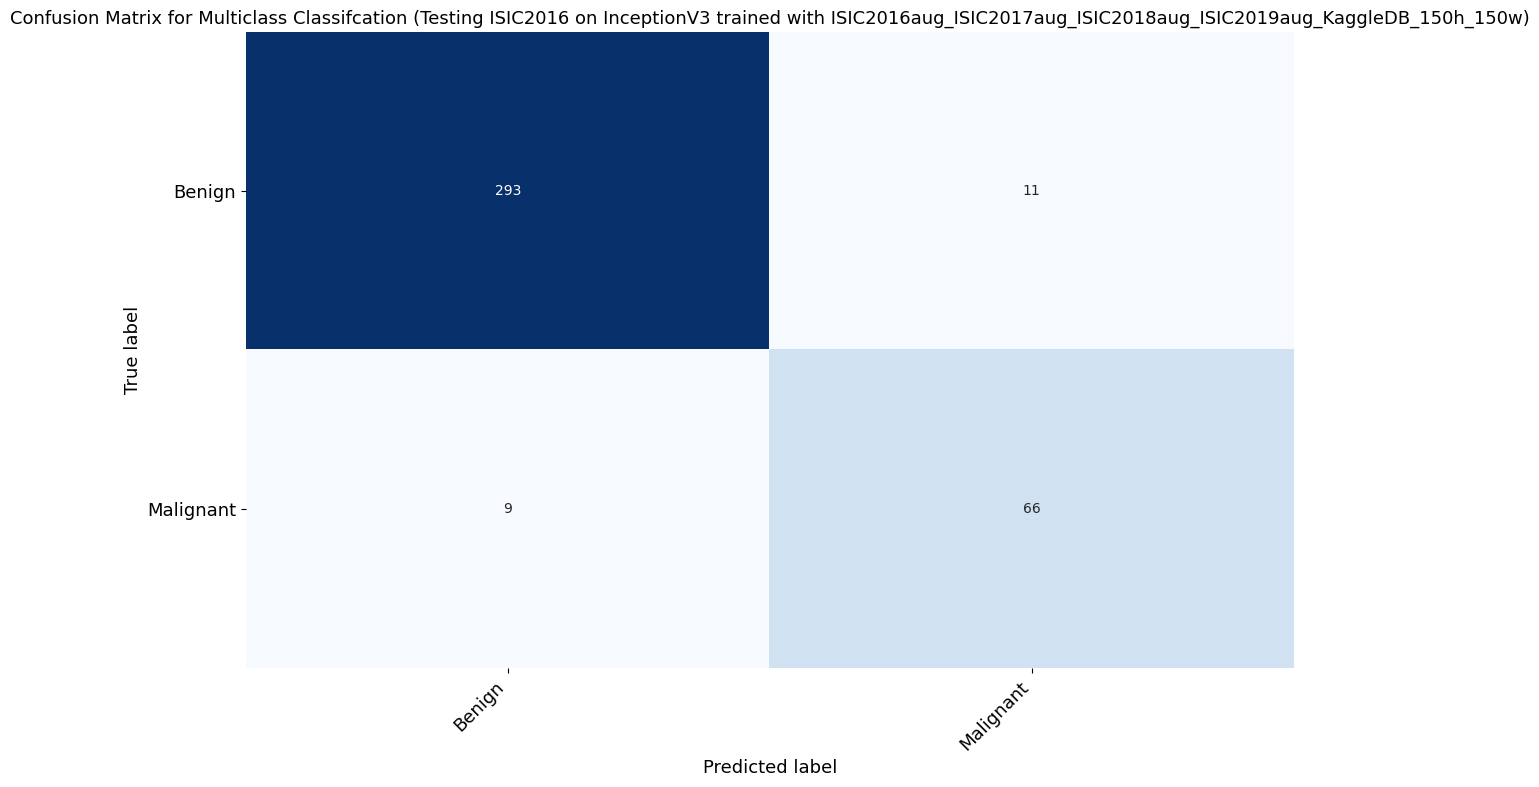

Testing on ISIC2017
Evaluating Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model...

63/63 [==============================] - 2s 23ms/step - loss: 0.0765 - accuracy: 0.9835
Train loss = 0.07652606815099716  ;  Train accuracy = 98.35%

5/5 [==============================] - 0s 21ms/step - loss: 0.3581 - accuracy: 0.8667
Validation loss = 0.358125776052475  ;  Validation accuracy = 86.67%

19/19 [==============================] - 0s 23ms/step - loss: 0.3862 - accuracy: 0.8467
Test loss = 0.3861825466156006  ;  Test accuracy = 84.67%
Computing predictions for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w...
Model report for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99

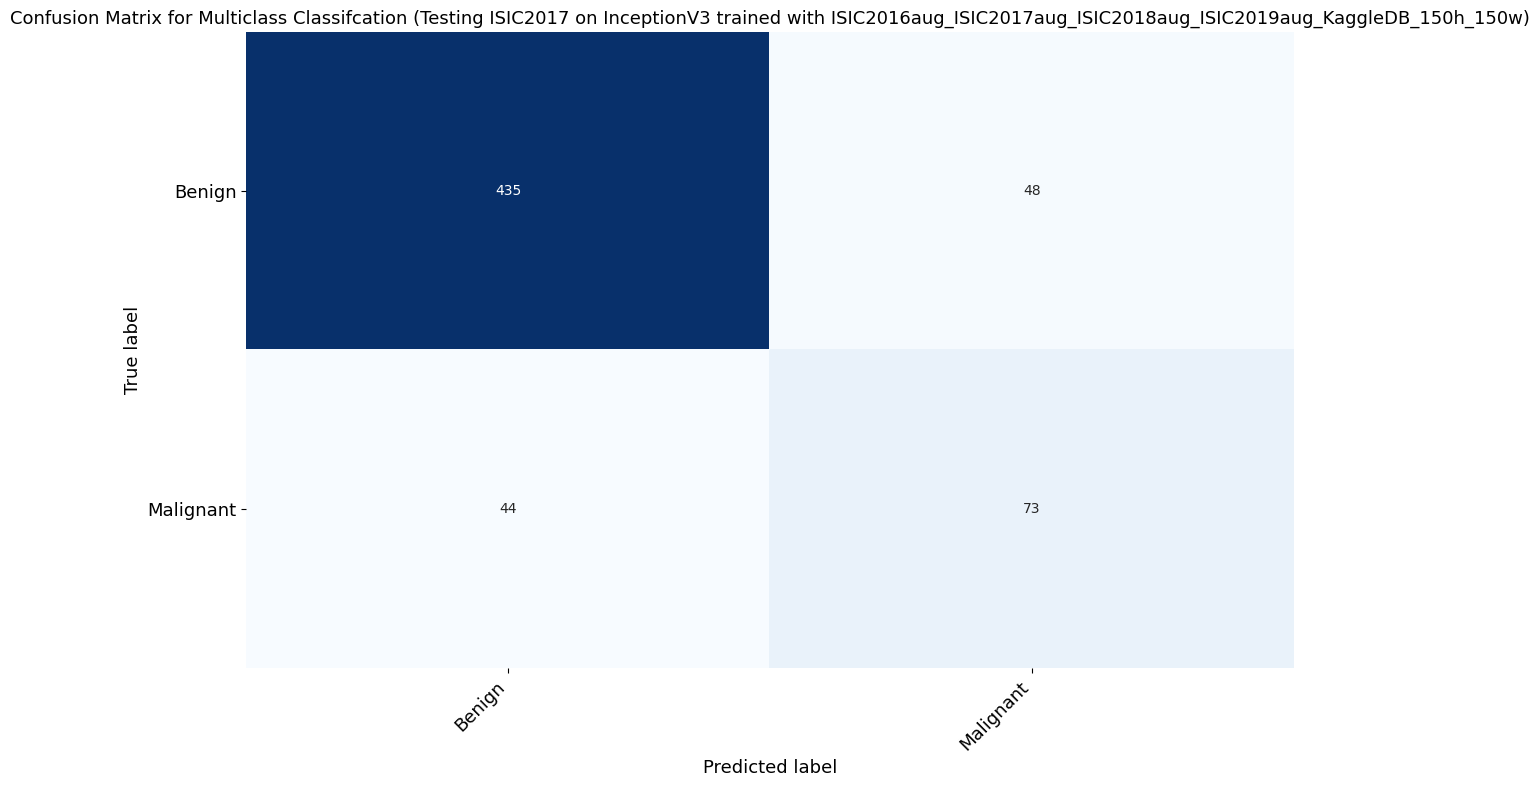

Testing on ISIC2018
Evaluating Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model...

313/313 [==============================] - 9s 24ms/step - loss: 0.0671 - accuracy: 0.9844
Train loss = 0.06714463979005814  ;  Train accuracy = 98.44%

7/7 [==============================] - 0s 21ms/step - loss: 0.4200 - accuracy: 0.8290
Validation loss = 0.4199741780757904  ;  Validation accuracy = 82.90%

48/48 [==============================] - 1s 21ms/step - loss: 0.4856 - accuracy: 0.8228
Test loss = 0.4855598509311676  ;  Test accuracy = 82.28%
Computing predictions for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w...
Model report for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99      0

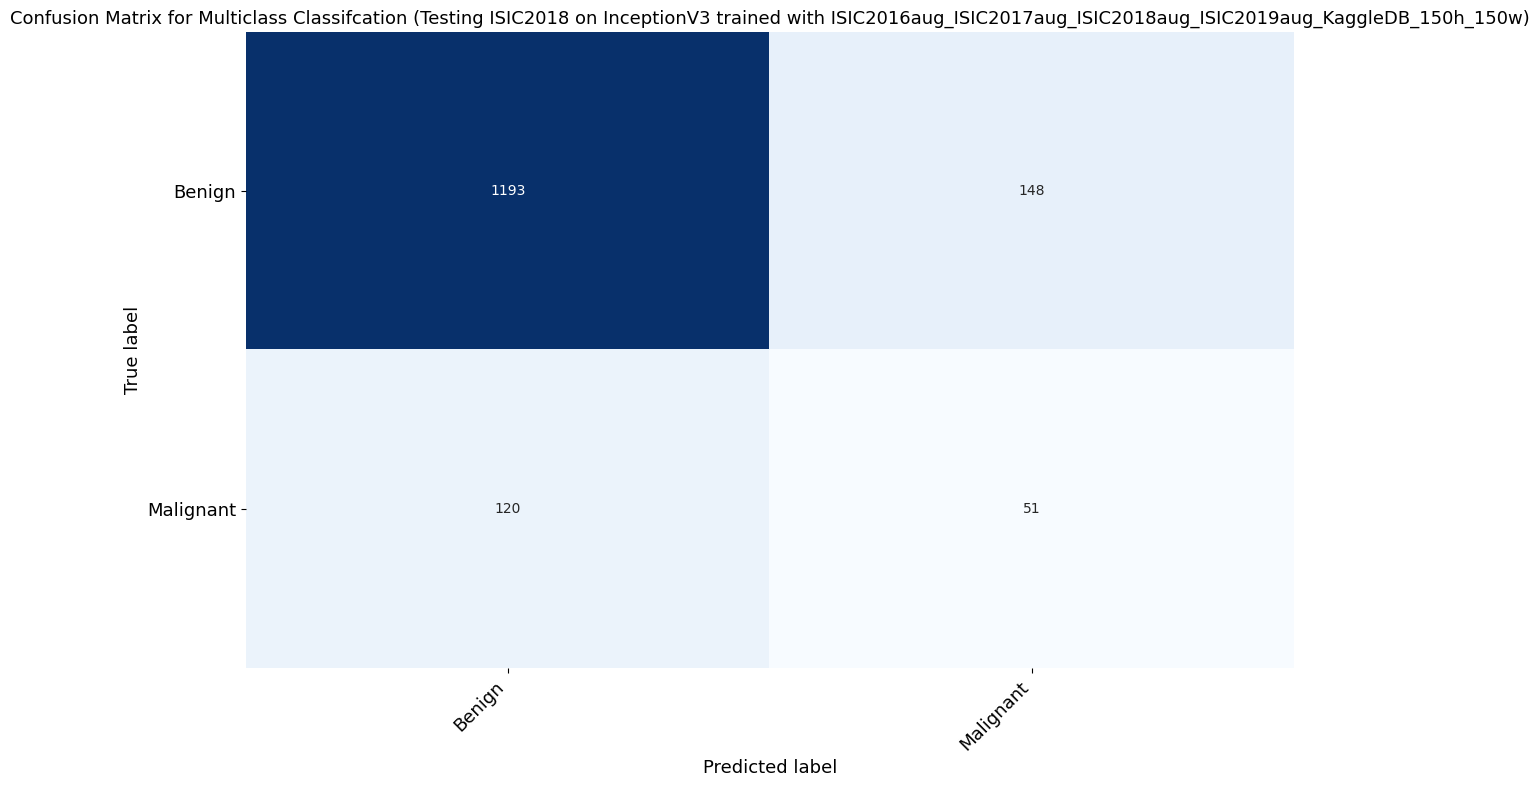

Fitting InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model...
Epoch 1/20
1464/1464 [==============================] - 57s 39ms/step - loss: 0.2882 - accuracy: 0.8805 - val_loss: 0.2369 - val_accuracy: 0.9194
Epoch 2/20
1464/1464 [==============================] - 56s 38ms/step - loss: 0.2476 - accuracy: 0.8949 - val_loss: 0.2486 - val_accuracy: 0.9169
Epoch 3/20
1464/1464 [==============================] - 54s 37ms/step - loss: 0.2284 - accuracy: 0.9040 - val_loss: 0.2655 - val_accuracy: 0.9102
Epoch 4/20
1464/1464 [==============================] - 54s 37ms/step - loss: 0.2188 - accuracy: 0.9078 - val_loss: 0.2397 - val_accuracy: 0.9221
Epoch 5/20
1464/1464 [==============================] - 54s 37ms/step - loss: 0.2077 - accuracy: 0.9140 - val_loss: 0.2453 - val_accuracy: 0.9221
Epoch 6/20
1464/1464 [==============================] - 54s 37ms/step - loss: 0.1953 - accuracy: 0.9188 - val_loss: 0.2534 - val_accuracy: 0.9214
Epo

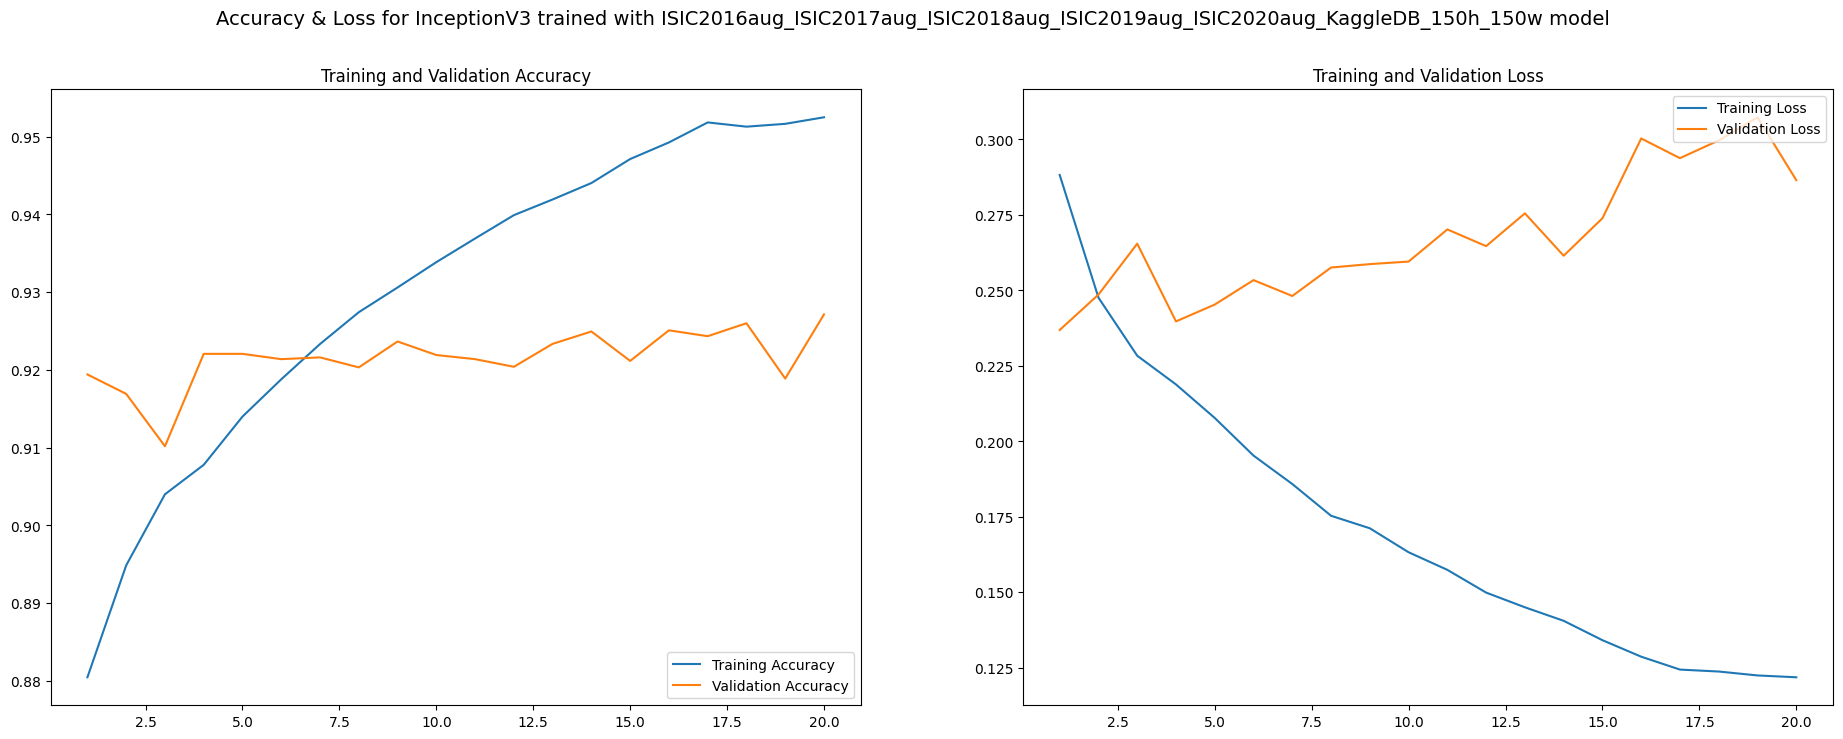

Testing on Kaggle DB
Evaluating Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model...

52/52 [==============================] - 2s 21ms/step - loss: 0.1936 - accuracy: 0.9096
Train loss = 0.1936013102531433  ;  Train accuracy = 90.96%

32/32 [==============================] - 1s 21ms/step - loss: 0.6903 - accuracy: 0.7460
Validation loss = 0.6902987957000732  ;  Validation accuracy = 74.60%

21/21 [==============================] - 1s 26ms/step - loss: 0.6033 - accuracy: 0.7682
Test loss = 0.6033127903938293  ;  Test accuracy = 76.82%
Computing predictions for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w...
Model report for Testing Kaggle DB on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

 

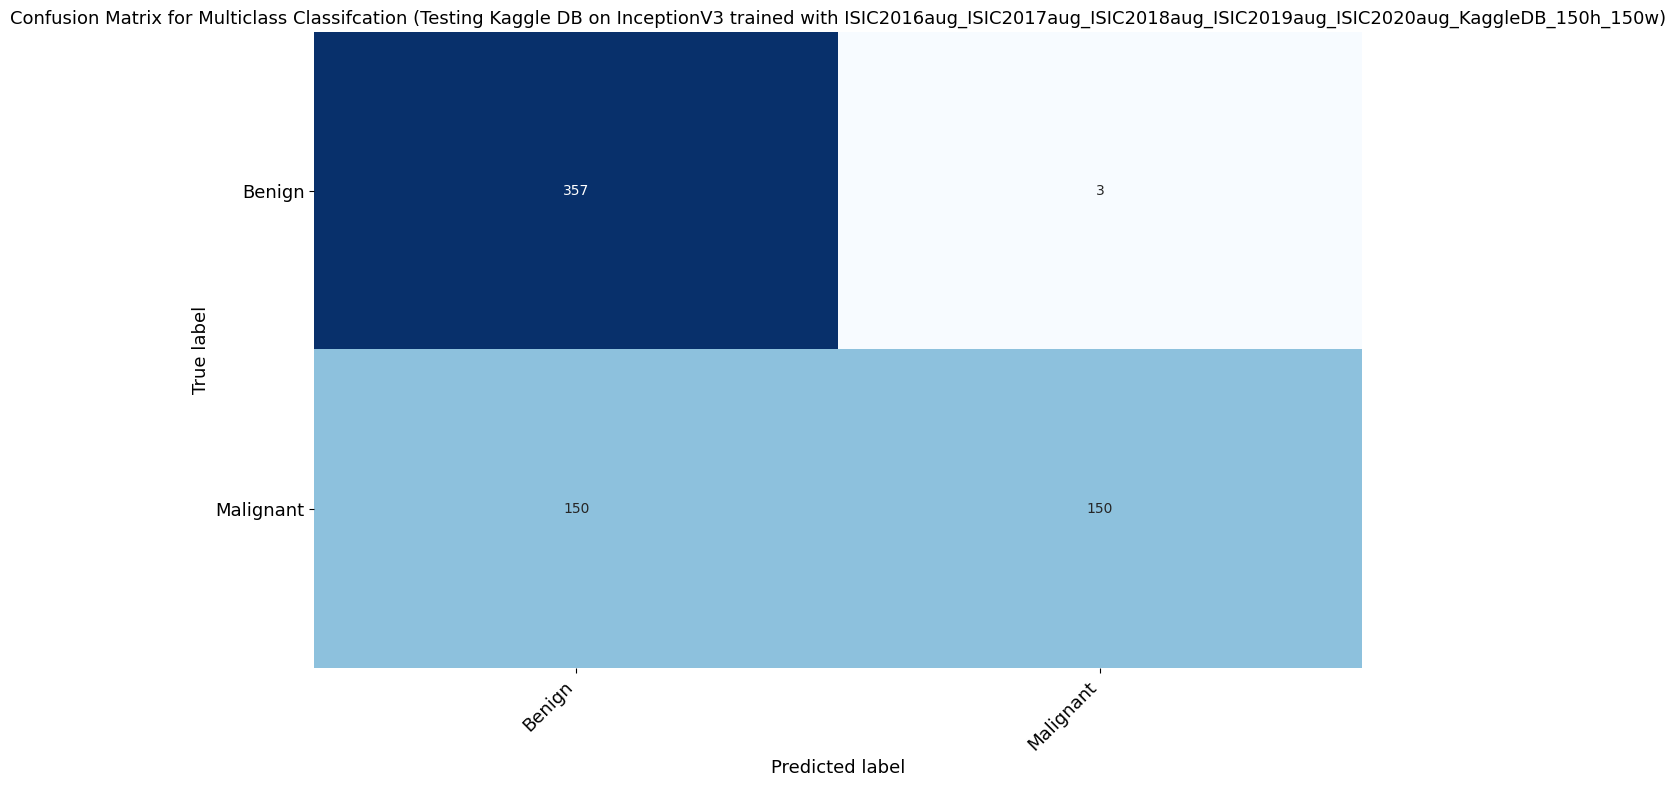

Testing on HAM10000
Evaluating Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model...

251/251 [==============================] - 6s 22ms/step - loss: 0.0749 - accuracy: 0.9722
Train loss = 0.07490846514701843  ;  Train accuracy = 97.22%

28/28 [==============================] - 1s 23ms/step - loss: 0.0460 - accuracy: 0.9864
Validation loss = 0.04603792726993561  ;  Validation accuracy = 98.64%

35/35 [==============================] - 1s 21ms/step - loss: 0.0403 - accuracy: 0.9900
Test loss = 0.04030163586139679  ;  Test accuracy = 99.00%
Computing predictions for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w...
Model report for Testing HAM10000 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support



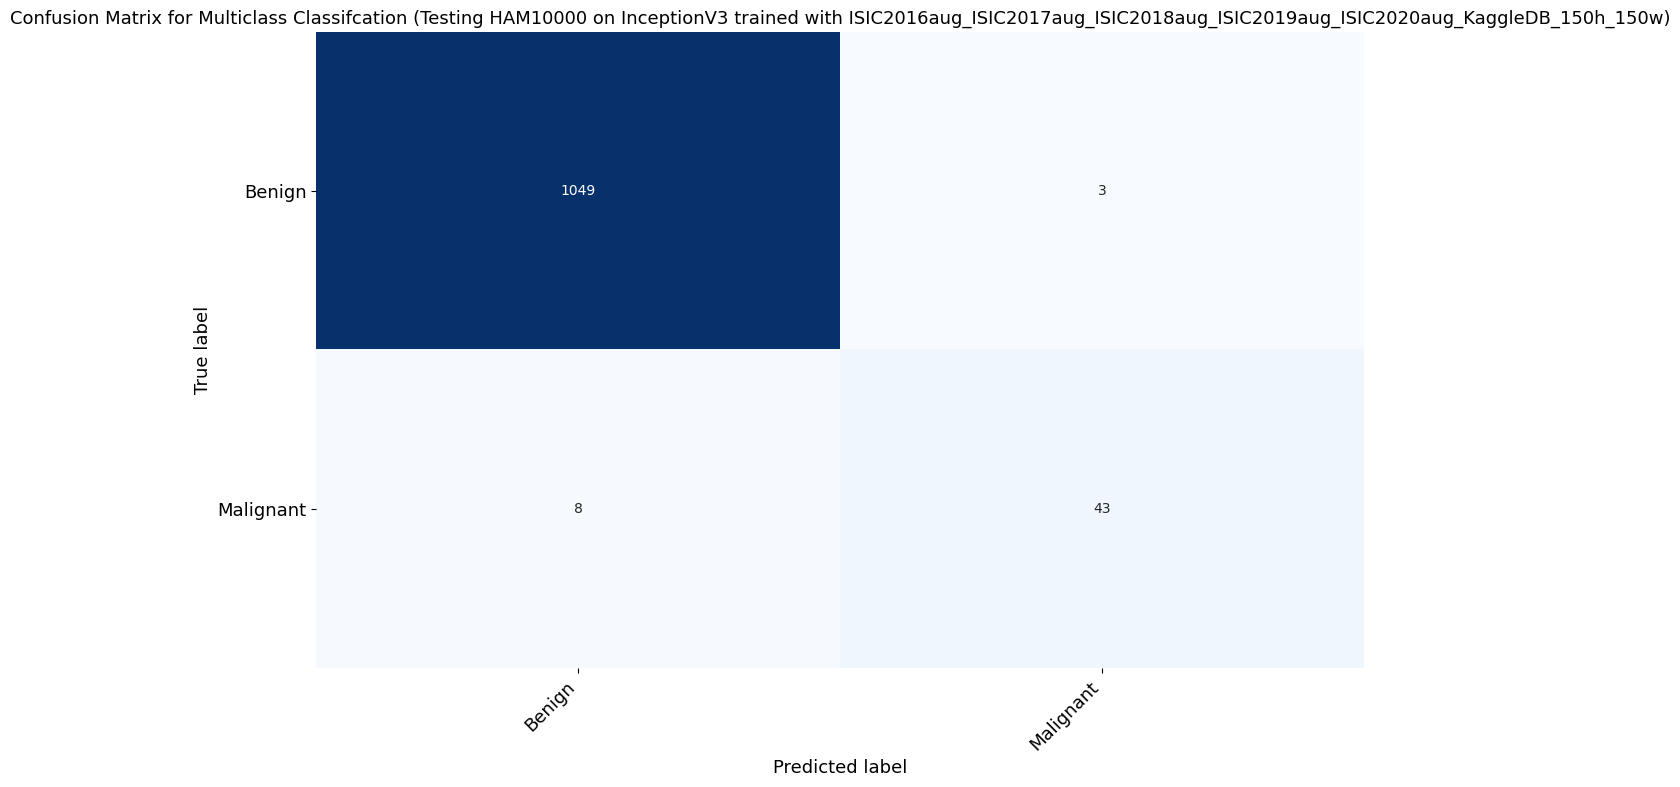

Testing on ISIC2016
Evaluating Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model...

23/23 [==============================] - 1s 21ms/step - loss: 0.0834 - accuracy: 0.9681
Train loss = 0.08342001587152481  ;  Train accuracy = 96.81%

6/6 [==============================] - 0s 21ms/step - loss: 0.2525 - accuracy: 0.9333
Validation loss = 0.25245457887649536  ;  Validation accuracy = 93.33%

12/12 [==============================] - 0s 22ms/step - loss: 0.1645 - accuracy: 0.9367
Test loss = 0.1645127683877945  ;  Test accuracy = 93.67%
Computing predictions for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w...
Model report for Testing ISIC2016 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

     

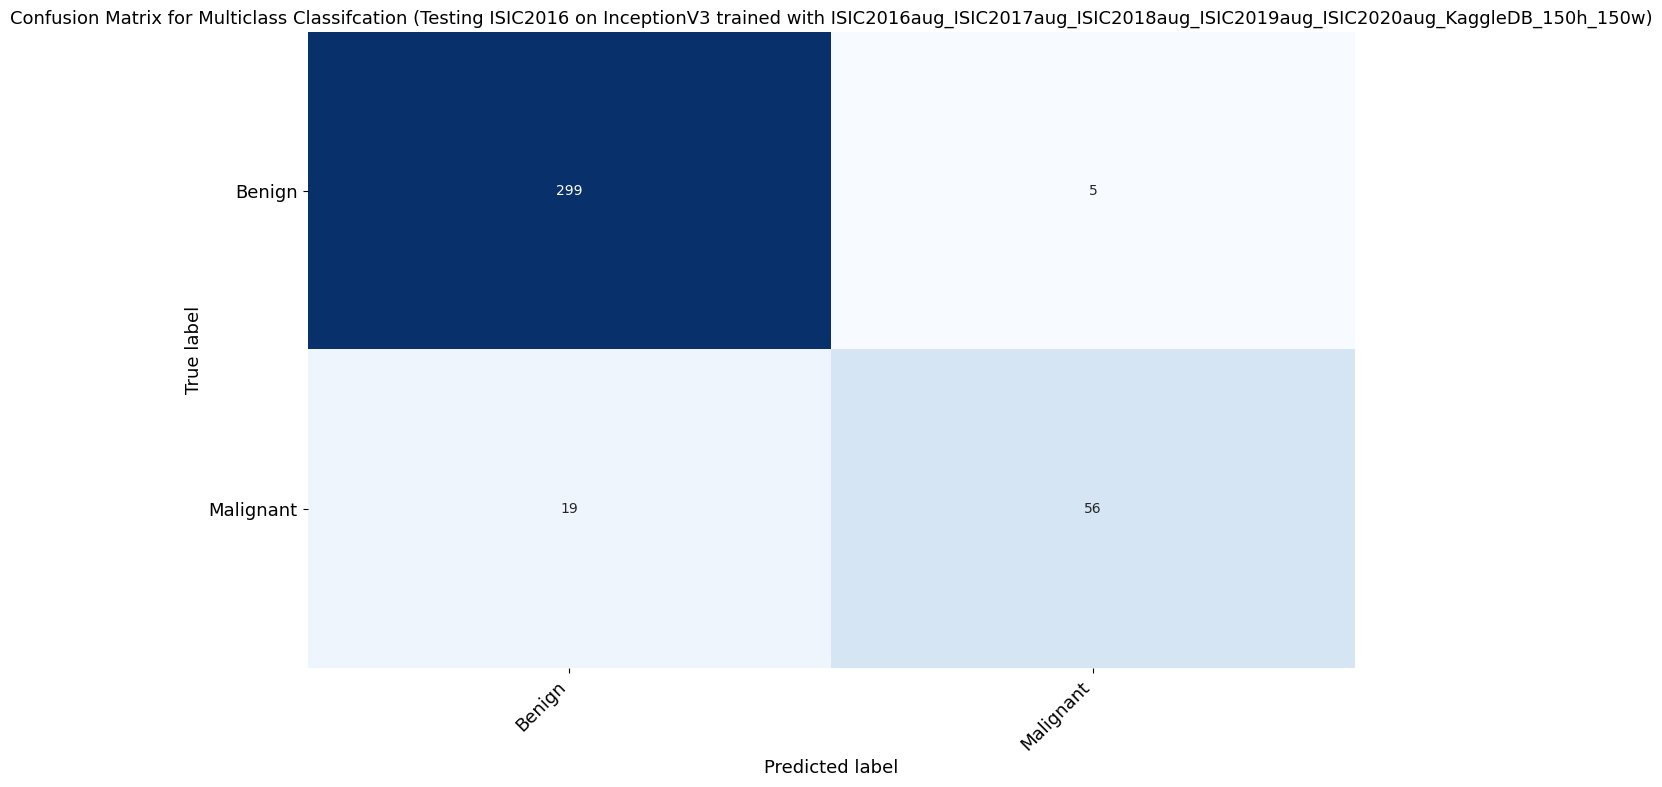

Testing on ISIC2017
Evaluating Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model...

63/63 [==============================] - 2s 23ms/step - loss: 0.0958 - accuracy: 0.9610
Train loss = 0.0957946851849556  ;  Train accuracy = 96.10%

5/5 [==============================] - 0s 28ms/step - loss: 0.2781 - accuracy: 0.9000
Validation loss = 0.2781163156032562  ;  Validation accuracy = 90.00%

19/19 [==============================] - 0s 22ms/step - loss: 0.3240 - accuracy: 0.8817
Test loss = 0.3240009844303131  ;  Test accuracy = 88.17%
Computing predictions for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w...
Model report for Testing ISIC2017 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

      B

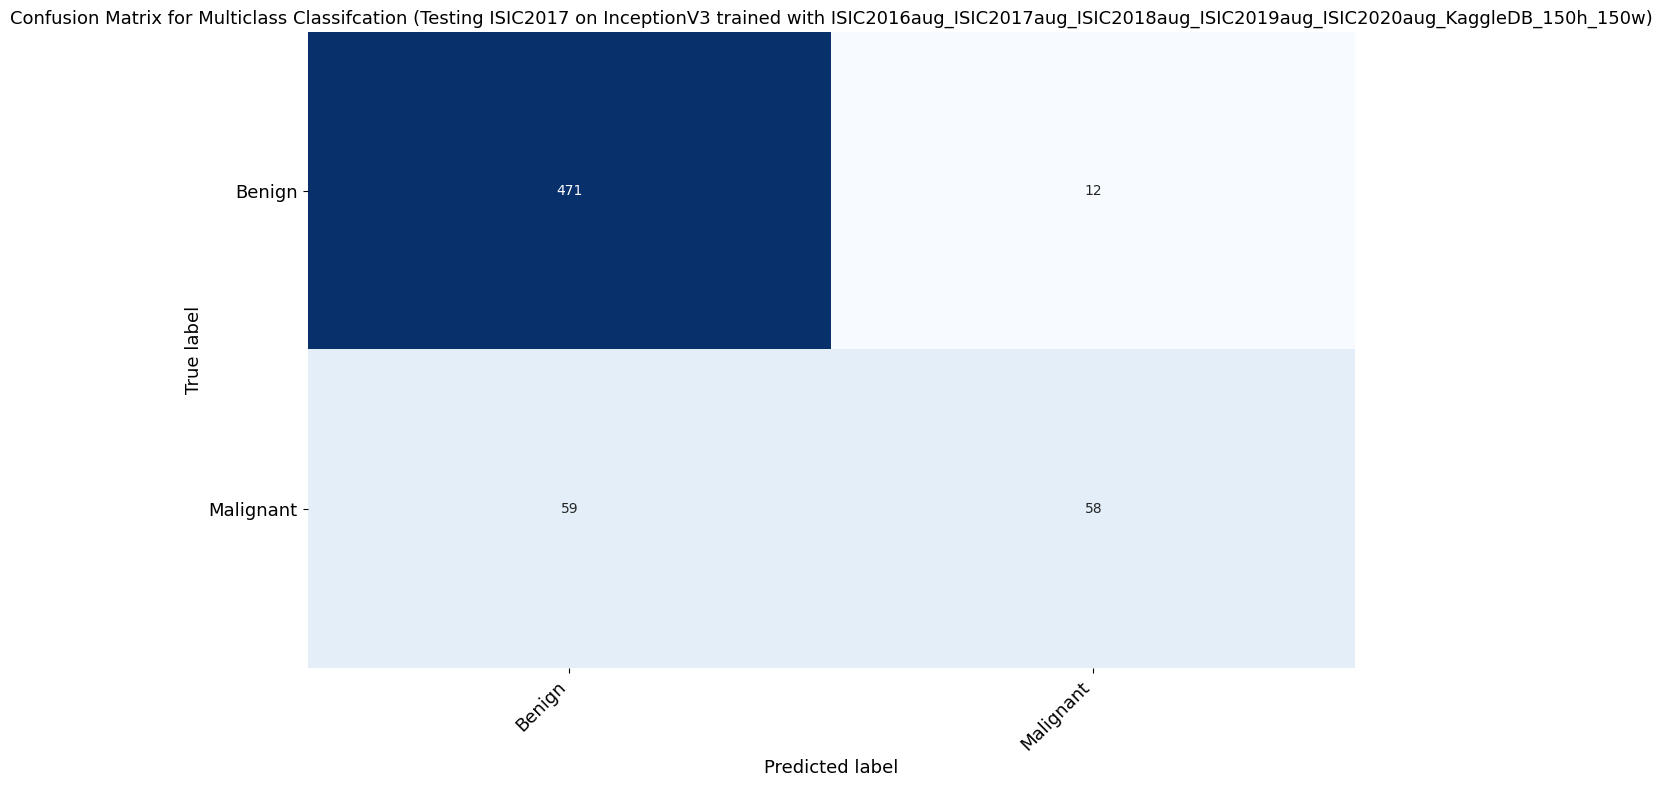

Testing on ISIC2018
Evaluating Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model...

313/313 [==============================] - 8s 22ms/step - loss: 0.0686 - accuracy: 0.9754
Train loss = 0.06855188310146332  ;  Train accuracy = 97.54%

7/7 [==============================] - 0s 21ms/step - loss: 0.3702 - accuracy: 0.8653
Validation loss = 0.37015748023986816  ;  Validation accuracy = 86.53%

48/48 [==============================] - 1s 22ms/step - loss: 0.4497 - accuracy: 0.8624
Test loss = 0.4497193396091461  ;  Test accuracy = 86.24%
Computing predictions for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w...
Model report for Testing ISIC2018 on InceptionV3 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w model ->


Train Report :
               precision    recall  f1-score   support

   

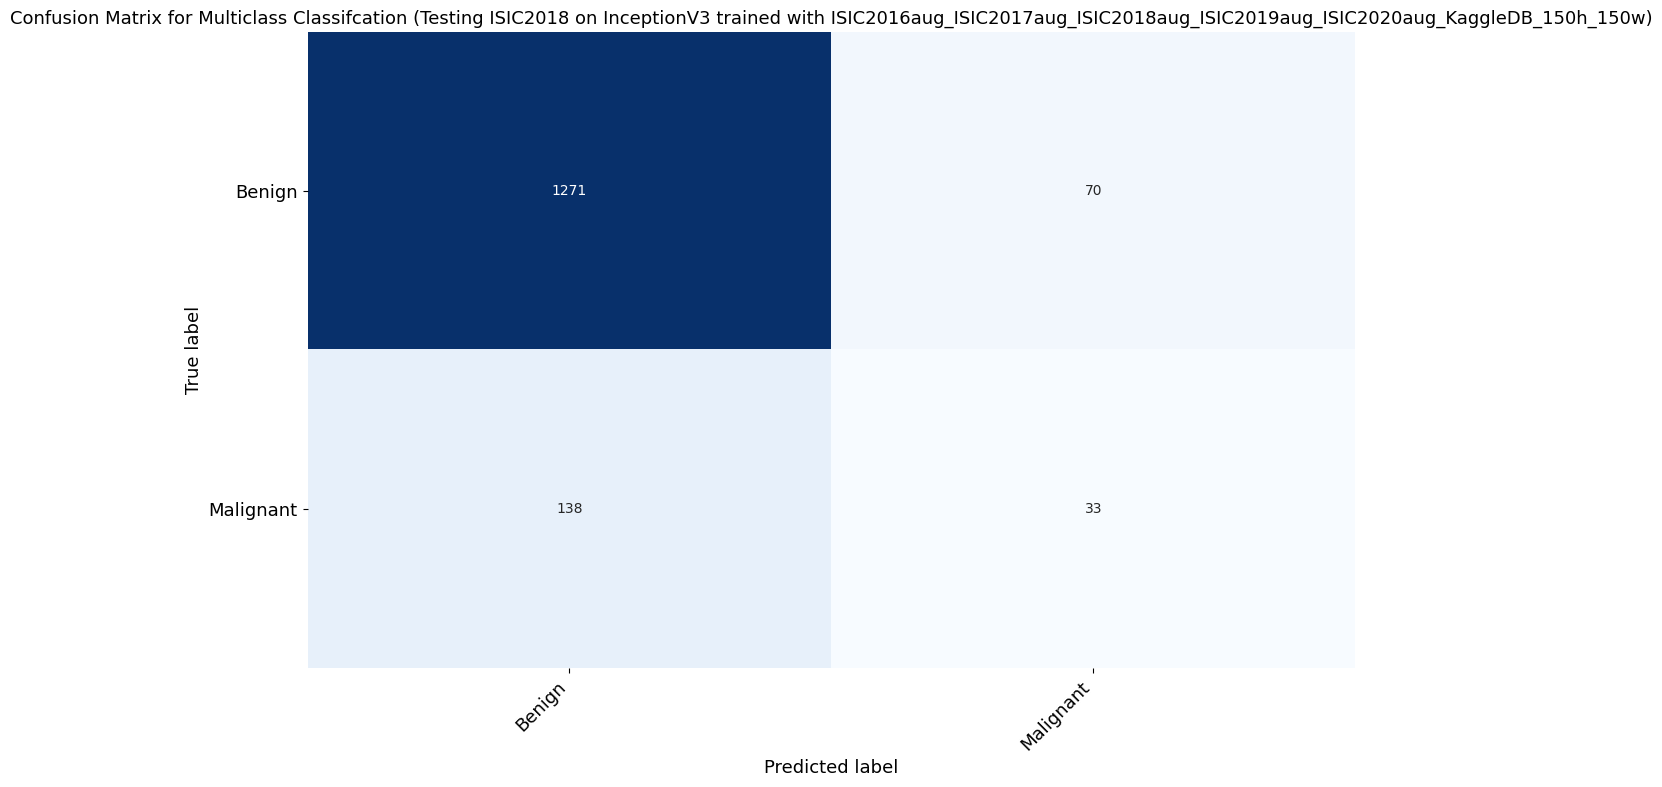

In [6]:
# Training HAM10000 with InceptionV3
networkType = mel.NetworkType.InceptionV3

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = 'HAM10000_150h_150w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename
model = base_model.inceptionV3()

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2018 = dbpath+'/'+f'ISIC2018_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016 with InceptionV3

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = 'ISIC2016_150h_150w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)


# Training ISIC2017 with InceptionV3

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = 'ISIC2017_150h_150w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)


# Training ISIC2016aug+ISIC2017aug with InceptionV3

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = 'ISIC2016aug_ISIC2017aug_150h_150w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+KaggleDB with InceptionV3

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = 'ISIC2016aug_ISIC2017aug_KaggleDB_150h_150w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug_KaggleDB with InceptionV3

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = 'ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_150h_150w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug+ISIC2019aug+KaggleDB with InceptionV3

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = 'ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_150h_150w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug+ISIC2019aug+ISIC2020aug+KaggleDB with InceptionV3

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = 'ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_ISIC2020aug_KaggleDB_150h_150w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_194 (Bat (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
125/125 [==============================] - 10s 80ms/step - loss: 0.3906 - accuracy: 0.8375 - val_loss: 0.1528 - val_accuracy: 0.9592
Epoch 3/20
125/125 [==============================] - 10s 80ms/step - loss: 0.3209 - accuracy: 0.8692 - val_loss: 0.1318 - val_accuracy: 0.9672
Epoch 4/20
125/125 [==============================] - 10s 79ms/step - loss: 0.2874 - accuracy: 0.8849 - val_loss: 0.1149 - val_accuracy: 0.9717
Epoch 5/20
125/125 [==============================] - 10s 82ms/step - loss: 0.2570 - accuracy: 0.9004 - val_loss: 0.1114 - val_accuracy: 0.9649
Epoch 6/20
125/125 [==============================] - 10s 79ms/step - loss: 0.2421 - accuracy: 0.9018 - val_loss: 0.1159 - val_accuracy: 0.9660
Epoch 7/20
125/125 [==============================] - 10s 80ms/step - loss: 0.2299 - accuracy: 0.9072 - val_loss: 0.1105 - val_accuracy: 0.9706
Epoch 8/20
125/125 [==============================] - 10s 80ms/step - loss: 0.2031 - accuracy: 0.9225 - val_loss: 0.1058 - val_accuracy:

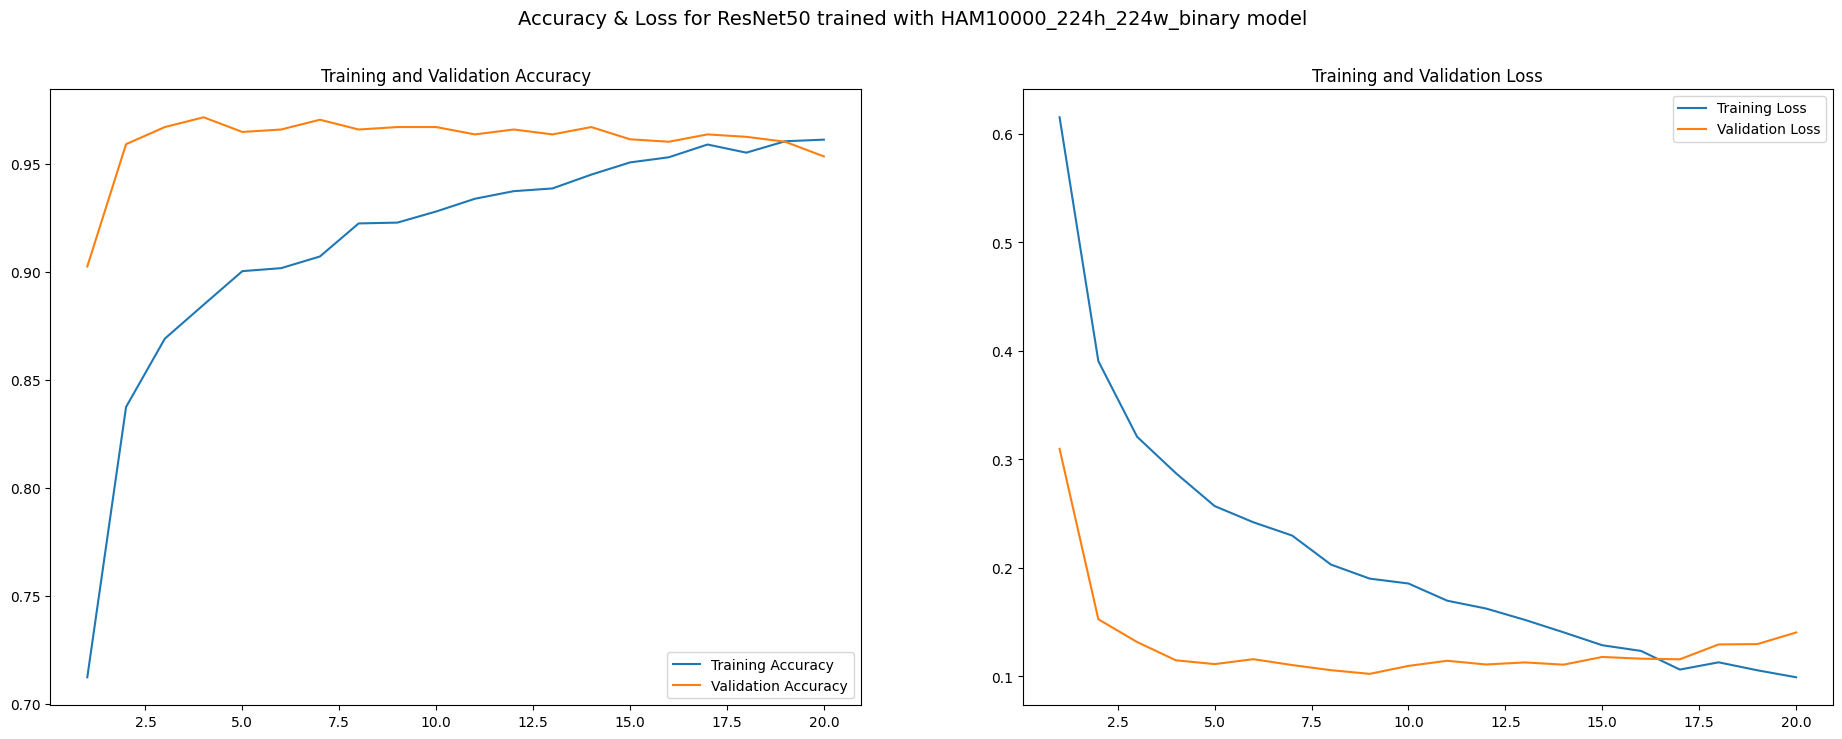

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with HAM10000_224h_224w_binary model...



52/52 [==============================] - 2s 34ms/step - loss: 1.2186 - accuracy: 0.6390
Train loss = 1.2185510396957397  ;  Train accuracy = 63.90%

32/32 [==============================] - 1s 39ms/step - loss: 1.2115 - accuracy: 0.6410
Validation loss = 1.21152663230896  ;  Validation accuracy = 64.10%

21/21 [==============================] - 1s 51ms/step - loss: 1.2209 - accuracy: 0.6303
Test loss = 1.2208958864212036  ;  Test accuracy = 63.03%
Computing predictions for Testing Kaggle DB on ResNet50 trained with HAM10000_224h_224w_binary...
Model report for Testing Kaggle DB on ResNet50 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.60      1.00      0.75       883
   Malignant       0.99      0.22      0.36       754

    accuracy                           0.64      1637
   macro avg       0.79      0.61      0.55      1637
weighted avg       0.78      0.64      0.57      1637

Test Repor

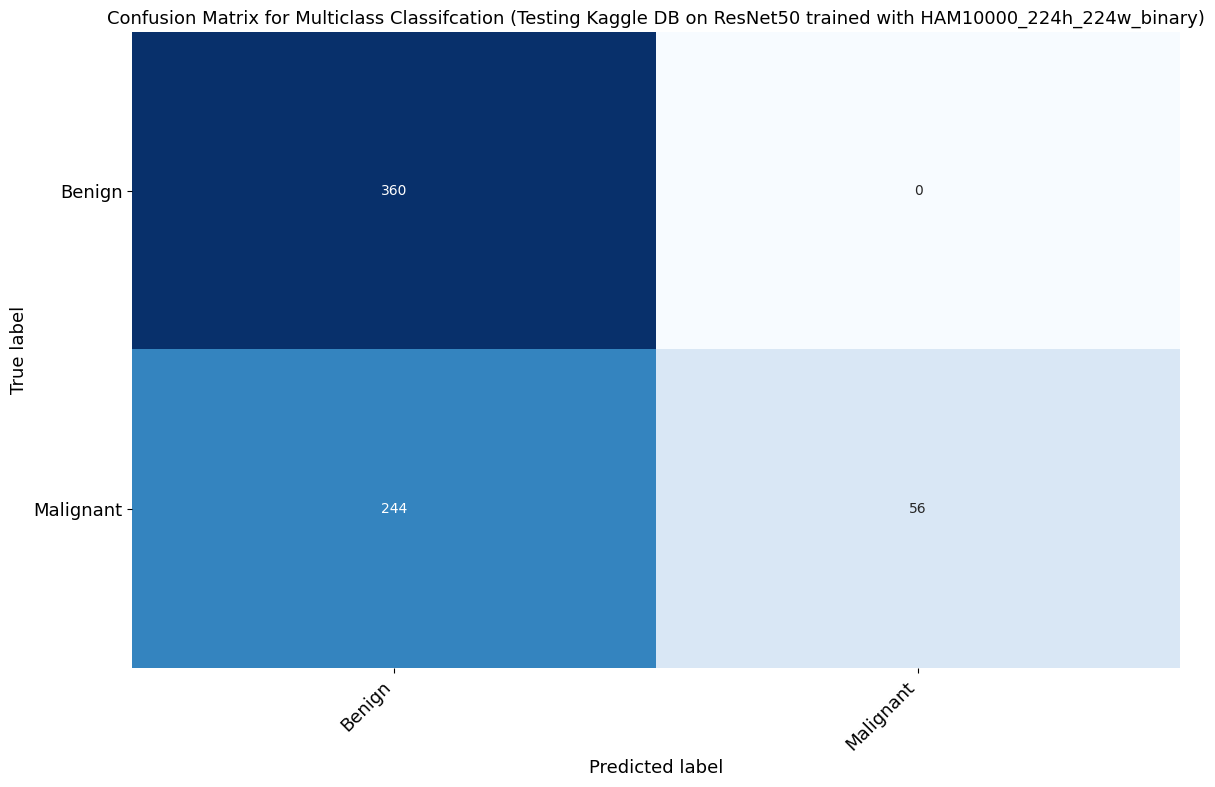

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with HAM10000_224h_224w_binary model...



251/251 [==============================] - 6s 23ms/step - loss: 0.1286 - accuracy: 0.9476
Train loss = 0.12857608497142792  ;  Train accuracy = 94.76%

28/28 [==============================] - 1s 22ms/step - loss: 0.1024 - accuracy: 0.9672
Validation loss = 0.10242652148008347  ;  Validation accuracy = 96.72%

35/35 [==============================] - 1s 39ms/step - loss: 0.1085 - accuracy: 0.9583
Test loss = 0.10848373174667358  ;  Test accuracy = 95.83%
Computing predictions for Testing HAM10000 on ResNet50 trained with HAM10000_224h_224w_binary...
Model report for Testing HAM10000 on ResNet50 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97      6994
   Malignant       0.95      0.63      0.75      1035

    accuracy                           0.95      8029
   macro avg       0.95      0.81      0.86      8029
weighted avg       0.95      0.95      0.94      8029

Test 

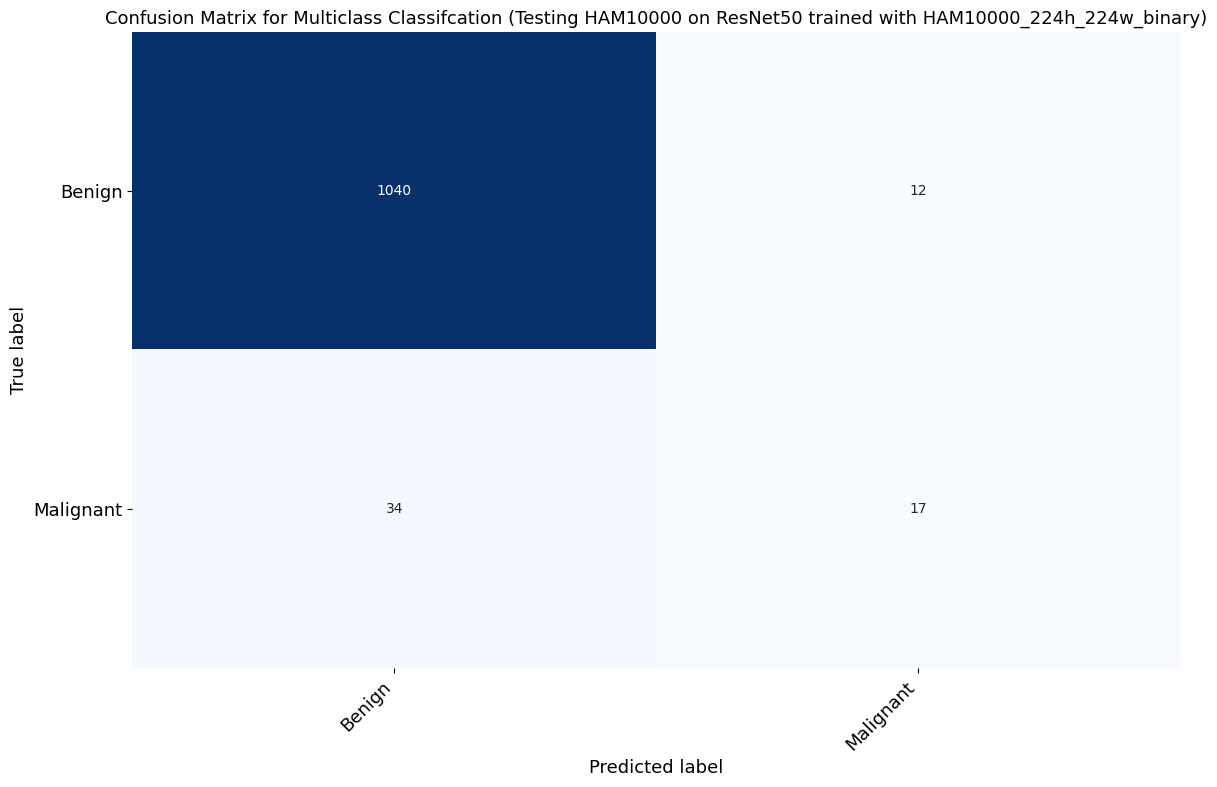

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with HAM10000_224h_224w_binary model...



23/23 [==============================] - 2s 48ms/step - loss: 0.6173 - accuracy: 0.8028
Train loss = 0.6172780394554138  ;  Train accuracy = 80.28%

6/6 [==============================] - 0s 21ms/step - loss: 0.5313 - accuracy: 0.8167
Validation loss = 0.5312594771385193  ;  Validation accuracy = 81.67%

12/12 [==============================] - 1s 78ms/step - loss: 0.5902 - accuracy: 0.8206
Test loss = 0.5901986360549927  ;  Test accuracy = 82.06%
Computing predictions for Testing ISIC2016 on ResNet50 trained with HAM10000_224h_224w_binary...
Model report for Testing ISIC2016 on ResNet50 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.82      0.96      0.89       583
   Malignant       0.43      0.12      0.18       137

    accuracy                           0.80       720
   macro avg       0.63      0.54      0.54       720
weighted avg       0.75      0.80      0.75       720

Test Report 

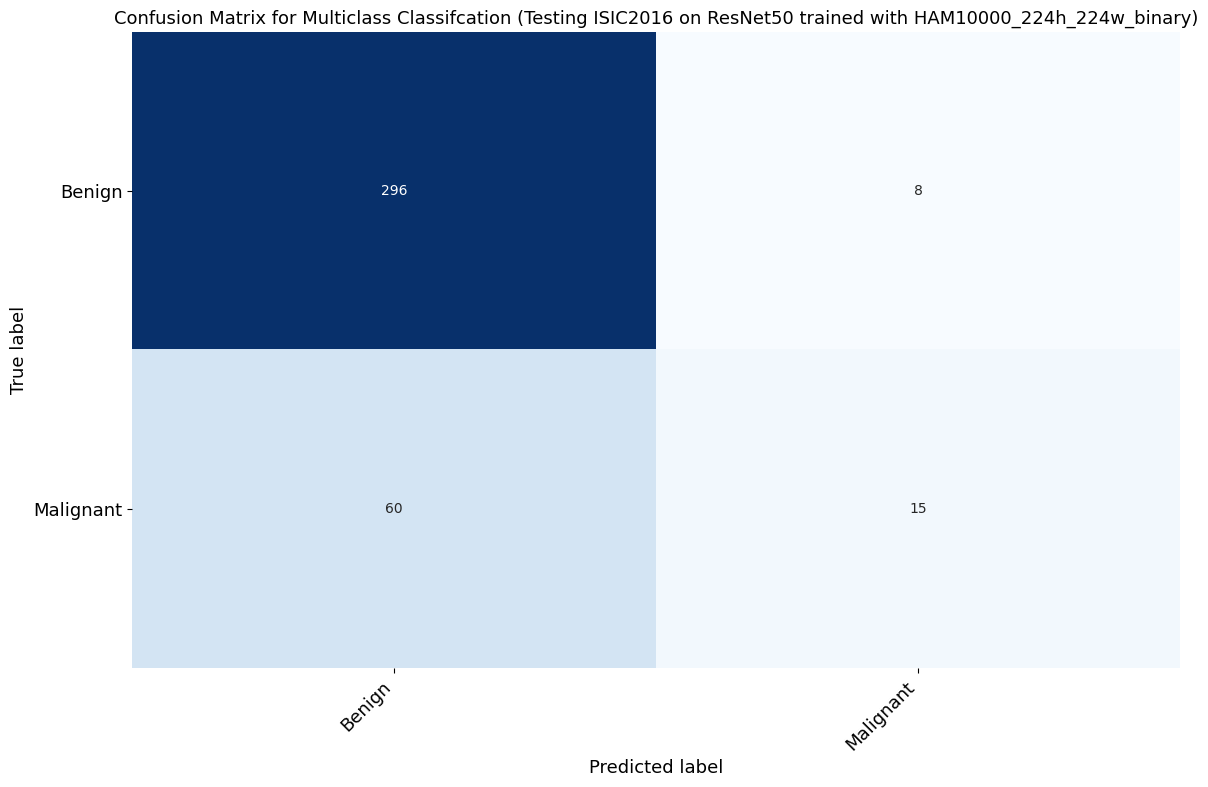

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with HAM10000_224h_224w_binary model...



63/63 [==============================] - 2s 24ms/step - loss: 0.6204 - accuracy: 0.8185
Train loss = 0.6203764081001282  ;  Train accuracy = 81.85%

5/5 [==============================] - 1s 163ms/step - loss: 0.7030 - accuracy: 0.7867
Validation loss = 0.7030109763145447  ;  Validation accuracy = 78.67%

19/19 [==============================] - 1s 55ms/step - loss: 0.6787 - accuracy: 0.8083
Test loss = 0.6787160038948059  ;  Test accuracy = 80.83%
Computing predictions for Testing ISIC2017 on ResNet50 trained with HAM10000_224h_224w_binary...
Model report for Testing ISIC2017 on ResNet50 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.98      0.90      1626
   Malignant       0.57      0.12      0.20       374

    accuracy                           0.82      2000
   macro avg       0.70      0.55      0.55      2000
weighted avg       0.78      0.82      0.77      2000

Test Report

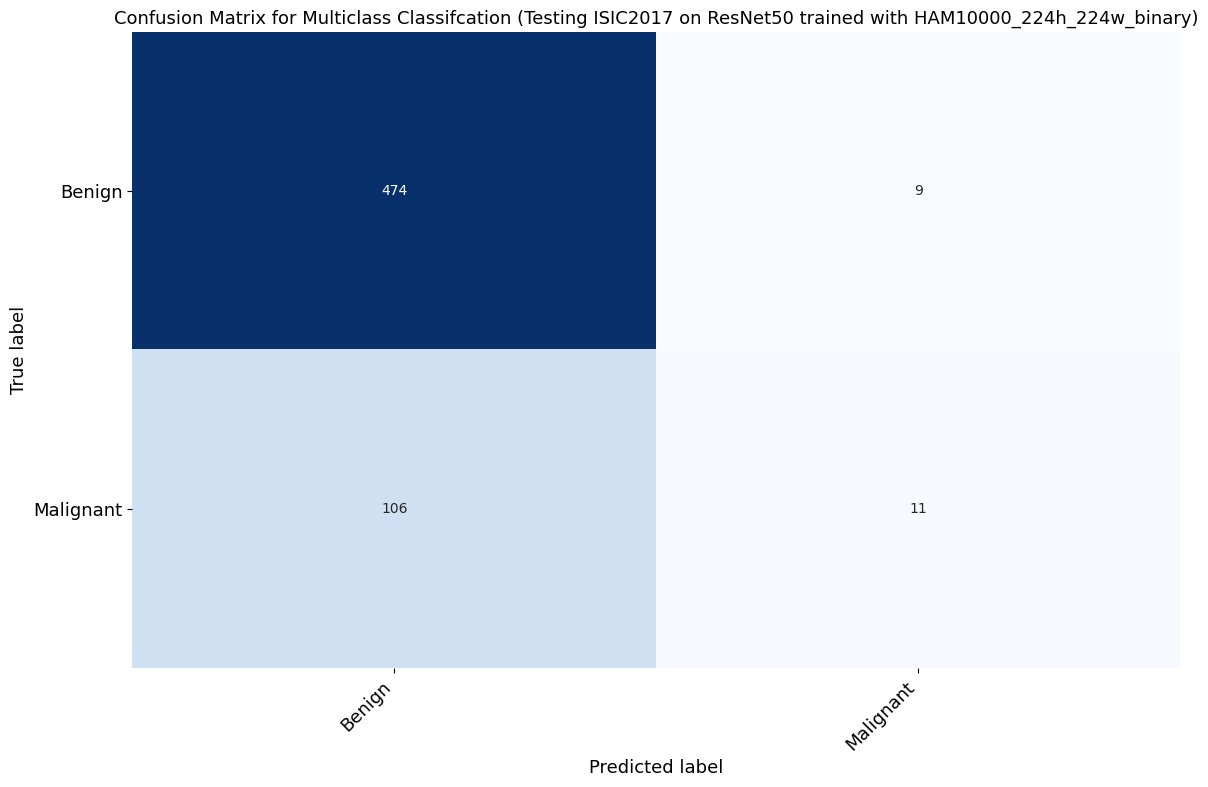

Testing on ISIC2018
Evaluating Testing ISIC2018 on ResNet50 trained with HAM10000_224h_224w_binary model...



313/313 [==============================] - 8s 25ms/step - loss: 0.1241 - accuracy: 0.9505
Train loss = 0.12405790388584137  ;  Train accuracy = 95.05%

7/7 [==============================] - 1s 107ms/step - loss: 0.1911 - accuracy: 0.9378
Validation loss = 0.19111740589141846  ;  Validation accuracy = 93.78%

48/48 [==============================] - 1s 22ms/step - loss: 0.2720 - accuracy: 0.9008
Test loss = 0.27199786901474  ;  Test accuracy = 90.08%
Computing predictions for Testing ISIC2018 on ResNet50 trained with HAM10000_224h_224w_binary...
Model report for Testing ISIC2018 on ResNet50 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.99      0.97      8902
   Malignant       0.93      0.60      0.73      1113

    accuracy                           0.95     10015
   macro avg       0.94      0.80      0.85     10015
weighted avg       0.95      0.95      0.95     10015

Test Repo

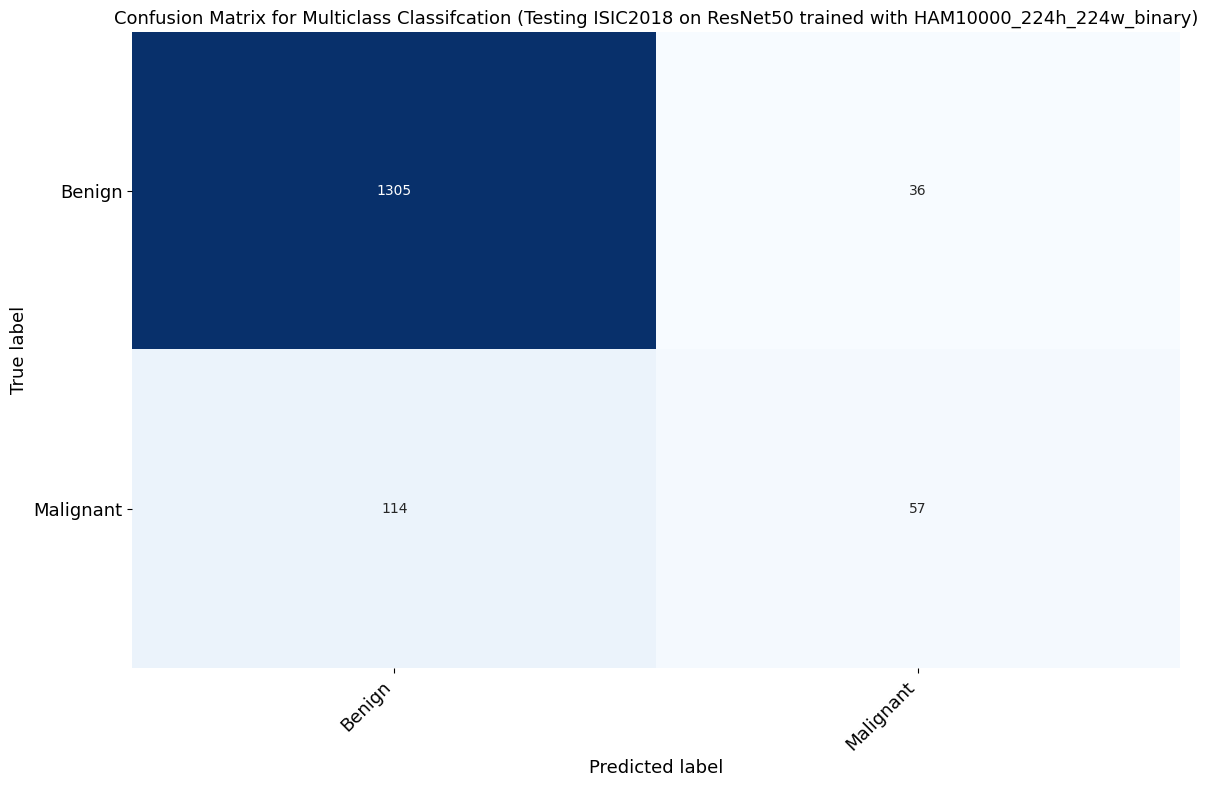

Fitting ResNet50 trained with ISIC2016_224h_224w_binary model...
Epoch 1/20
11/11 [==============================] - 1s 78ms/step - loss: 0.8180 - accuracy: 0.7729 - val_loss: 0.6466 - val_accuracy: 0.8111


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
11/11 [==============================] - 1s 76ms/step - loss: 0.5180 - accuracy: 0.8210 - val_loss: 0.5666 - val_accuracy: 0.8389
Epoch 3/20
11/11 [==============================] - 1s 74ms/step - loss: 0.3756 - accuracy: 0.8582 - val_loss: 0.4953 - val_accuracy: 0.8333
Epoch 4/20
11/11 [==============================] - 1s 86ms/step - loss: 0.3013 - accuracy: 0.8750 - val_loss: 0.4686 - val_accuracy: 0.8278
Epoch 5/20
11/11 [==============================] - 1s 83ms/step - loss: 0.2599 - accuracy: 0.8963 - val_loss: 0.4874 - val_accuracy: 0.8278
Epoch 6/20
11/11 [==============================] - 1s 93ms/step - loss: 0.1997 - accuracy: 0.9207 - val_loss: 0.5073 - val_accuracy: 0.8167
Epoch 7/20
11/11 [==============================] - 1s 84ms/step - loss: 0.1985 - accuracy: 0.9162 - val_loss: 0.5291 - val_accuracy: 0.8222
Epoch 8/20
11/11 [==============================] - 1s 79ms/step - loss: 0.1583 - accuracy: 0.9314 - val_loss: 0.4962 - val_accuracy: 0.8167
Epoch 9/20
11

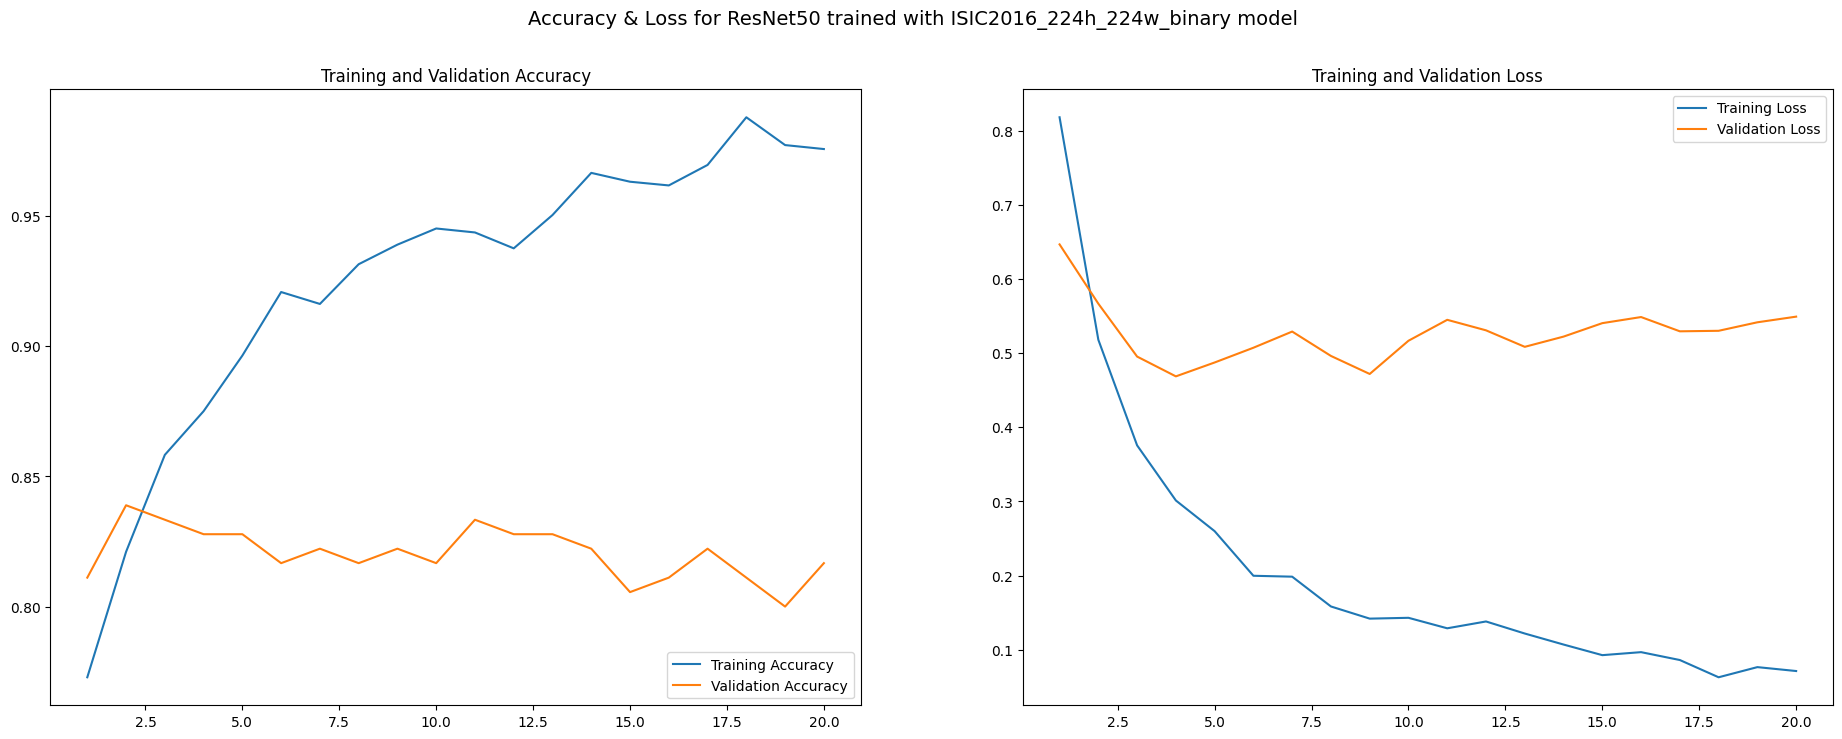

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016_224h_224w_binary model...



52/52 [==============================] - 2s 24ms/step - loss: 1.0863 - accuracy: 0.7227
Train loss = 1.0862561464309692  ;  Train accuracy = 72.27%

32/32 [==============================] - 1s 24ms/step - loss: 1.0408 - accuracy: 0.7480
Validation loss = 1.0407679080963135  ;  Validation accuracy = 74.80%

21/21 [==============================] - 1s 24ms/step - loss: 1.0856 - accuracy: 0.7545
Test loss = 1.0855764150619507  ;  Test accuracy = 75.45%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016_224h_224w_binary...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.66      0.99      0.79       883
   Malignant       0.97      0.41      0.58       754

    accuracy                           0.72      1637
   macro avg       0.82      0.70      0.68      1637
weighted avg       0.81      0.72      0.69      1637

Test Rep

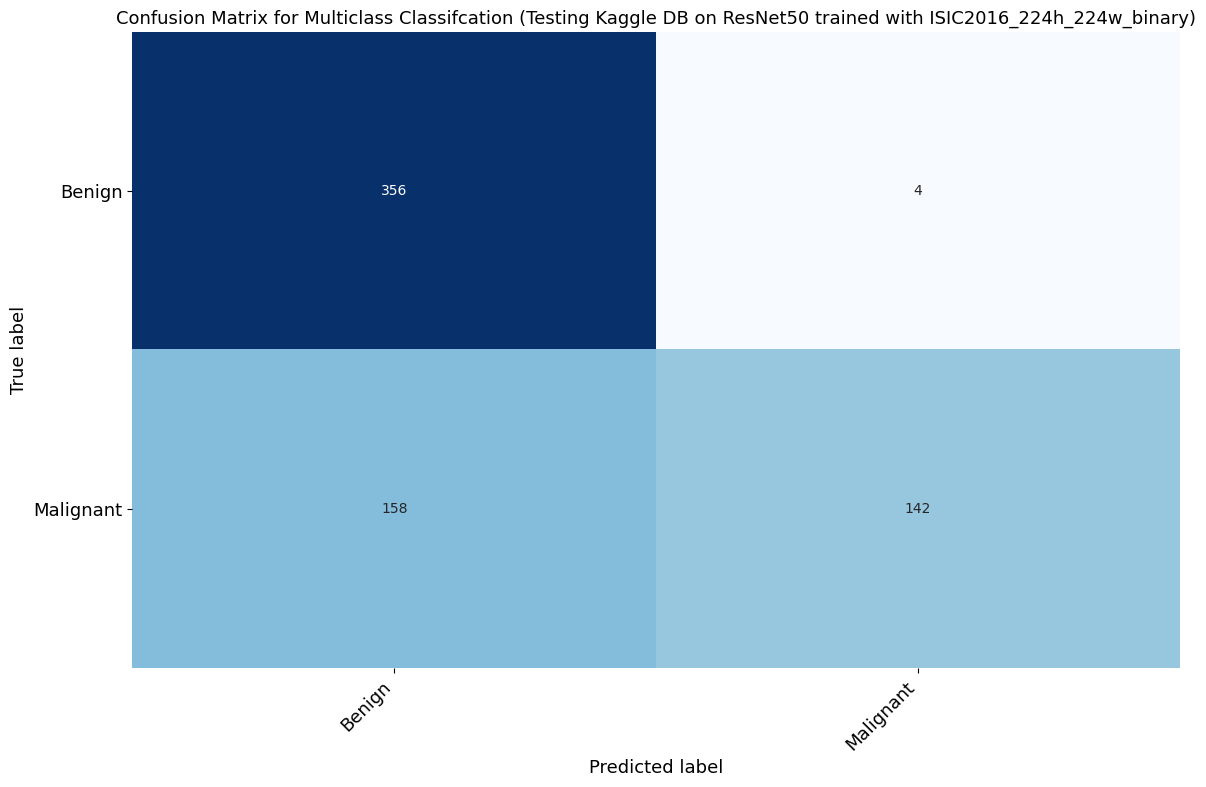

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016_224h_224w_binary model...



251/251 [==============================] - 7s 24ms/step - loss: 0.1454 - accuracy: 0.9421
Train loss = 0.14536018669605255  ;  Train accuracy = 94.21%

28/28 [==============================] - 1s 22ms/step - loss: 0.1710 - accuracy: 0.9309
Validation loss = 0.17102722823619843  ;  Validation accuracy = 93.09%

35/35 [==============================] - 1s 22ms/step - loss: 0.1902 - accuracy: 0.9320
Test loss = 0.1901784986257553  ;  Test accuracy = 93.20%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016_224h_224w_binary...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.98      0.96      0.97      6994
   Malignant       0.74      0.85      0.79      1035

    accuracy                           0.94      8029
   macro avg       0.86      0.90      0.88      8029
weighted avg       0.95      0.94      0.94      8029

Test R

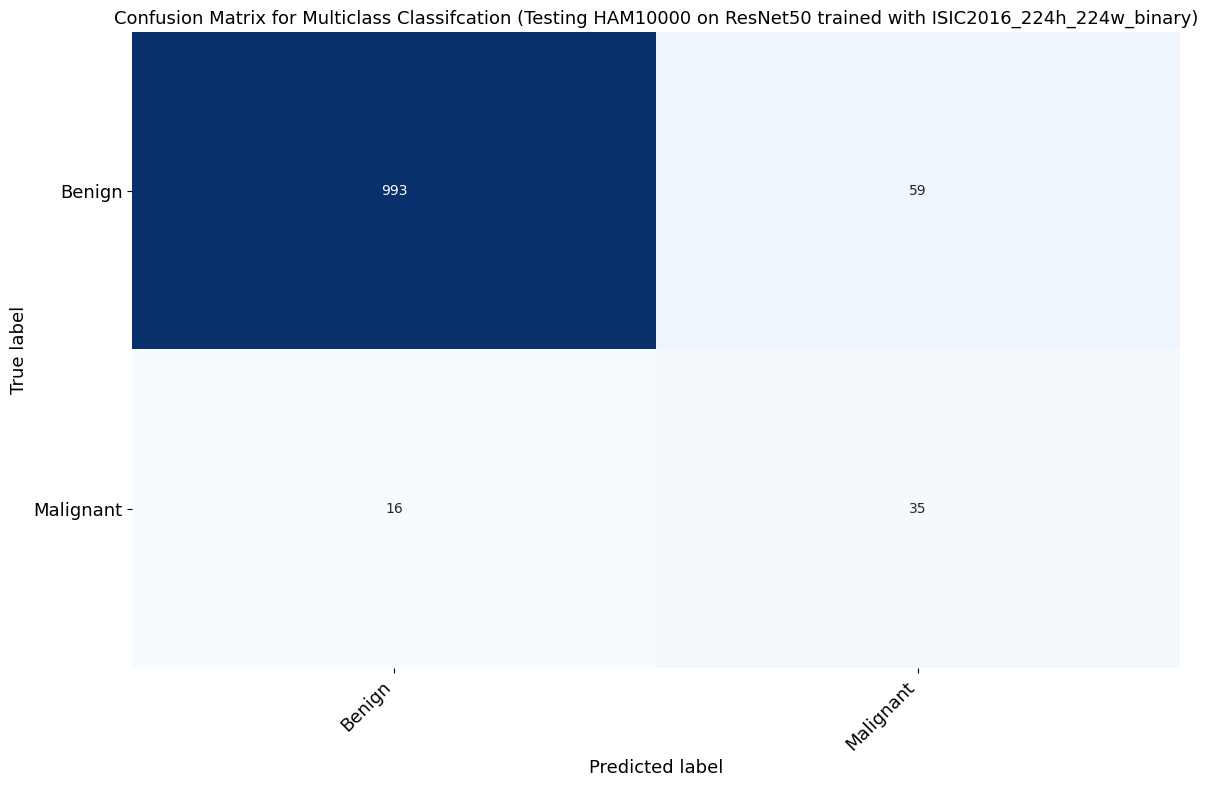

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016_224h_224w_binary model...



23/23 [==============================] - 1s 23ms/step - loss: 0.2507 - accuracy: 0.9000
Train loss = 0.2506701648235321  ;  Train accuracy = 90.00%

6/6 [==============================] - 0s 20ms/step - loss: 0.4686 - accuracy: 0.8278
Validation loss = 0.4686417877674103  ;  Validation accuracy = 82.78%

12/12 [==============================] - 0s 22ms/step - loss: 0.5723 - accuracy: 0.8206
Test loss = 0.5722808837890625  ;  Test accuracy = 82.06%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016_224h_224w_binary...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.91      0.97      0.94       583
   Malignant       0.84      0.58      0.69       137

    accuracy                           0.90       720
   macro avg       0.88      0.78      0.82       720
weighted avg       0.90      0.90      0.89       720

Test Report 

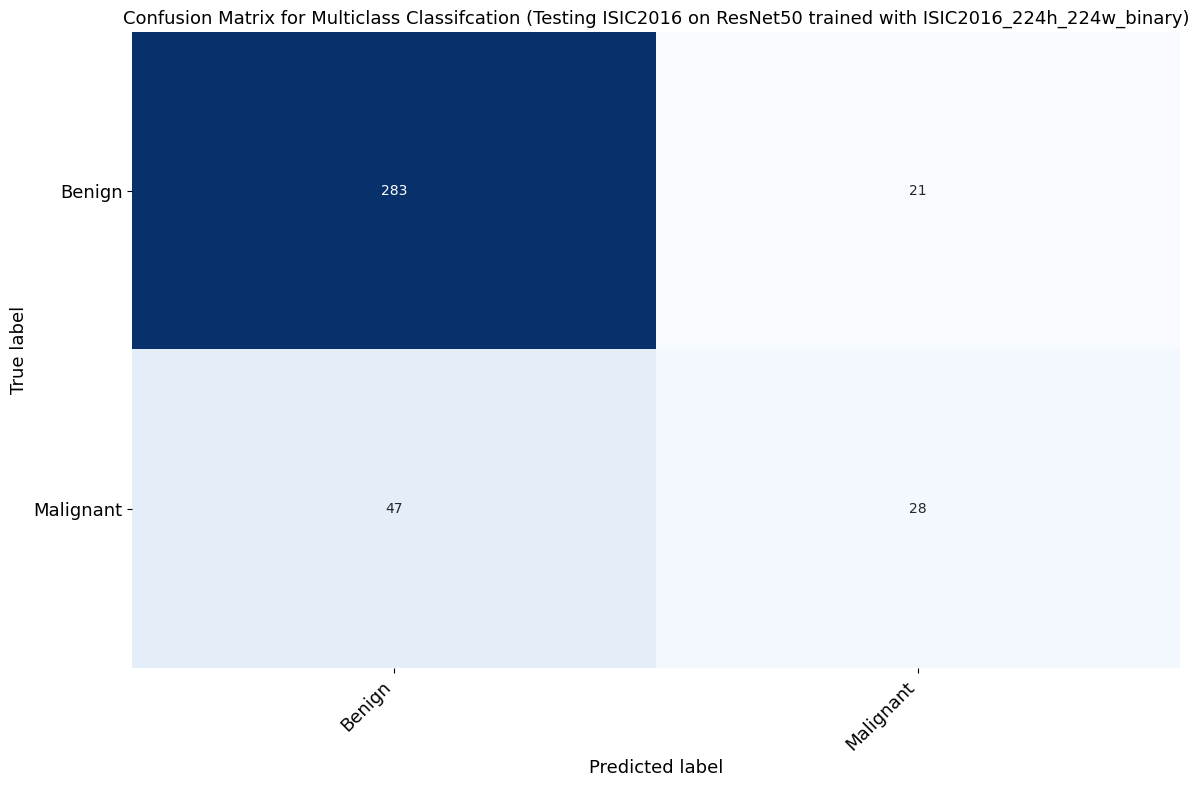

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016_224h_224w_binary model...



63/63 [==============================] - 2s 23ms/step - loss: 0.5722 - accuracy: 0.8405
Train loss = 0.5722209811210632  ;  Train accuracy = 84.05%

5/5 [==============================] - 0s 21ms/step - loss: 0.8930 - accuracy: 0.7467
Validation loss = 0.8930374383926392  ;  Validation accuracy = 74.67%

19/19 [==============================] - 0s 22ms/step - loss: 0.8680 - accuracy: 0.7933
Test loss = 0.8679819703102112  ;  Test accuracy = 79.33%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016_224h_224w_binary...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.86      0.96      0.91      1626
   Malignant       0.65      0.32      0.43       374

    accuracy                           0.84      2000
   macro avg       0.75      0.64      0.67      2000
weighted avg       0.82      0.84      0.82      2000

Test Report 

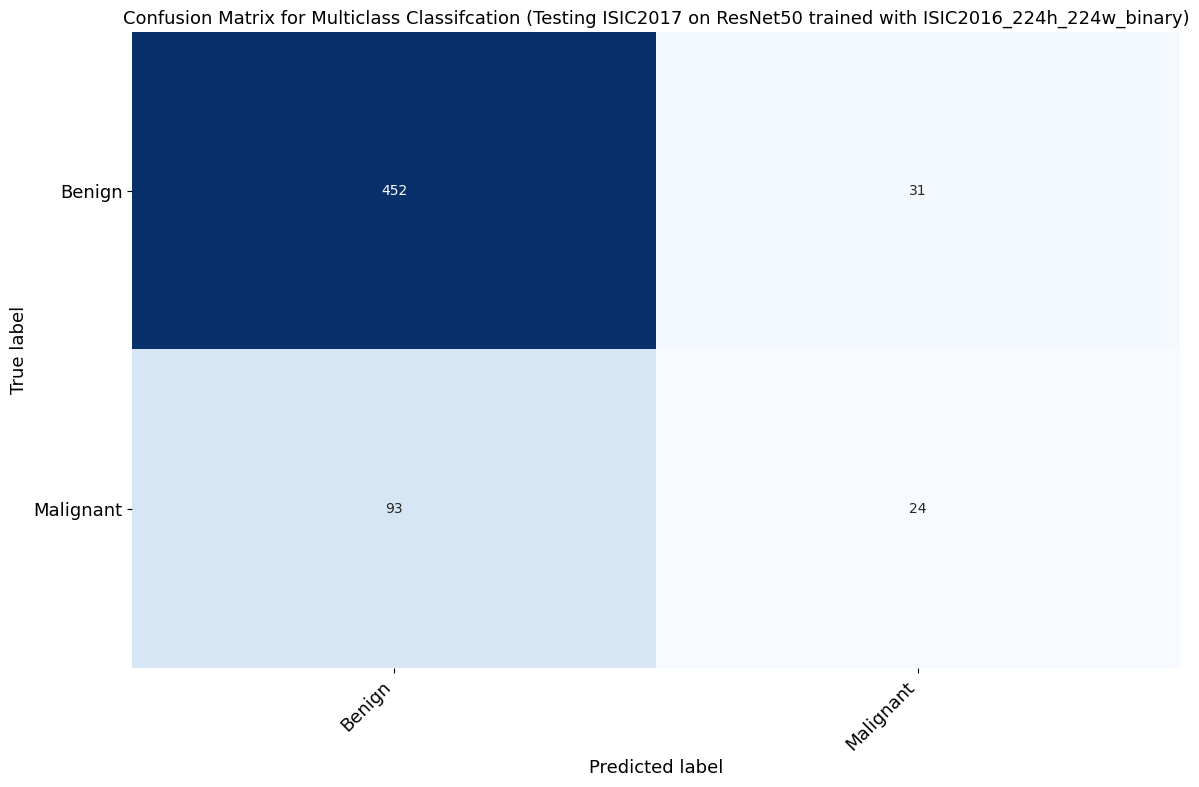

Testing on ISIC2018
Evaluating Testing ISIC2018 on ResNet50 trained with ISIC2016_224h_224w_binary model...



313/313 [==============================] - 8s 25ms/step - loss: 0.1526 - accuracy: 0.9400
Train loss = 0.15255966782569885  ;  Train accuracy = 94.00%

7/7 [==============================] - 0s 20ms/step - loss: 0.2399 - accuracy: 0.8756
Validation loss = 0.23994752764701843  ;  Validation accuracy = 87.56%

48/48 [==============================] - 1s 23ms/step - loss: 0.4216 - accuracy: 0.8519
Test loss = 0.4216184616088867  ;  Test accuracy = 85.19%
Computing predictions for Testing ISIC2018 on ResNet50 trained with ISIC2016_224h_224w_binary...
Model report for Testing ISIC2018 on ResNet50 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.98      0.95      0.97      8902
   Malignant       0.69      0.83      0.75      1113

    accuracy                           0.94     10015
   macro avg       0.84      0.89      0.86     10015
weighted avg       0.95      0.94      0.94     10015

Test Rep

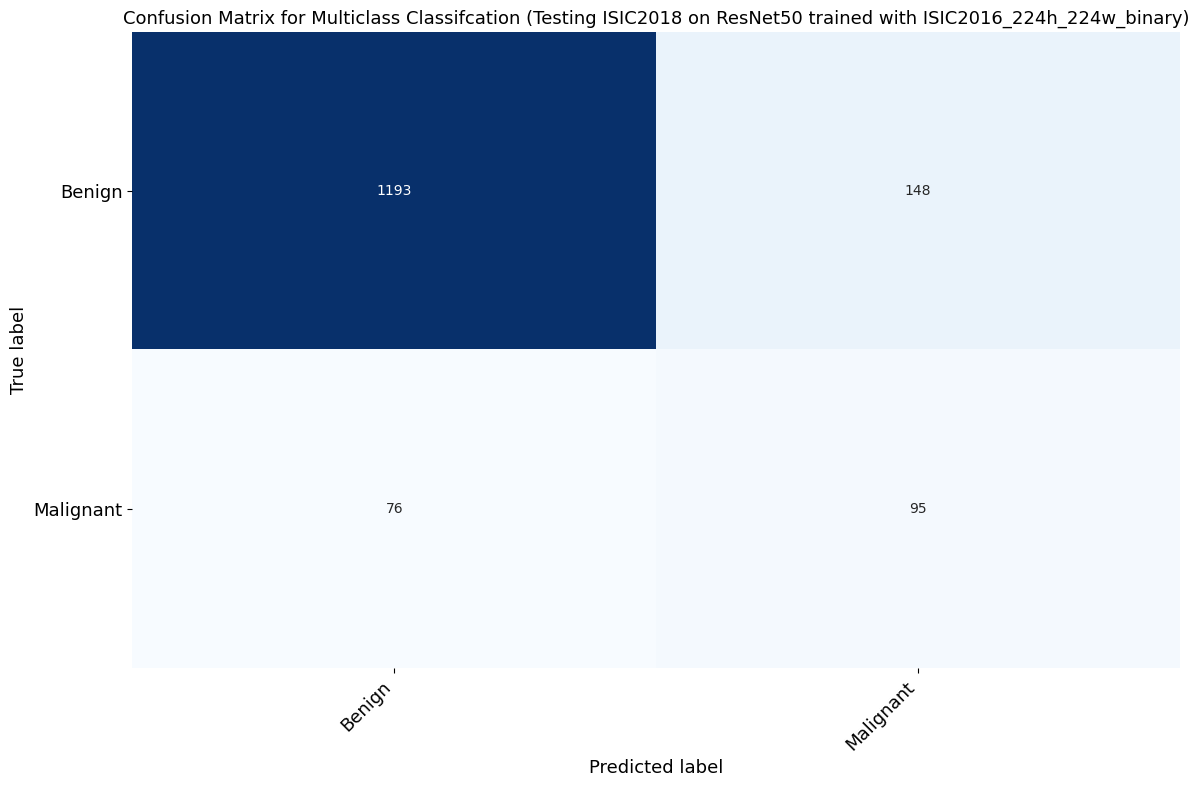

Fitting ResNet50 trained with ISIC2017_224h_224w_binary model...
Epoch 1/20
31/31 [==============================] - 2s 70ms/step - loss: 0.4695 - accuracy: 0.8528 - val_loss: 0.6630 - val_accuracy: 0.7867


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
31/31 [==============================] - 2s 69ms/step - loss: 0.3687 - accuracy: 0.8714 - val_loss: 0.6490 - val_accuracy: 0.8067
Epoch 3/20
31/31 [==============================] - 2s 69ms/step - loss: 0.2802 - accuracy: 0.8900 - val_loss: 0.8049 - val_accuracy: 0.8067
Epoch 4/20
31/31 [==============================] - 2s 67ms/step - loss: 0.2673 - accuracy: 0.8931 - val_loss: 0.6128 - val_accuracy: 0.8267
Epoch 5/20
31/31 [==============================] - 2s 68ms/step - loss: 0.2223 - accuracy: 0.9096 - val_loss: 0.5478 - val_accuracy: 0.8067
Epoch 6/20
31/31 [==============================] - 2s 67ms/step - loss: 0.1880 - accuracy: 0.9241 - val_loss: 0.6125 - val_accuracy: 0.8333
Epoch 7/20
31/31 [==============================] - 2s 66ms/step - loss: 0.1838 - accuracy: 0.9230 - val_loss: 0.5845 - val_accuracy: 0.7933
Epoch 8/20
31/31 [==============================] - 2s 68ms/step - loss: 0.1869 - accuracy: 0.9251 - val_loss: 0.6185 - val_accuracy: 0.8067
Epoch 9/20
31

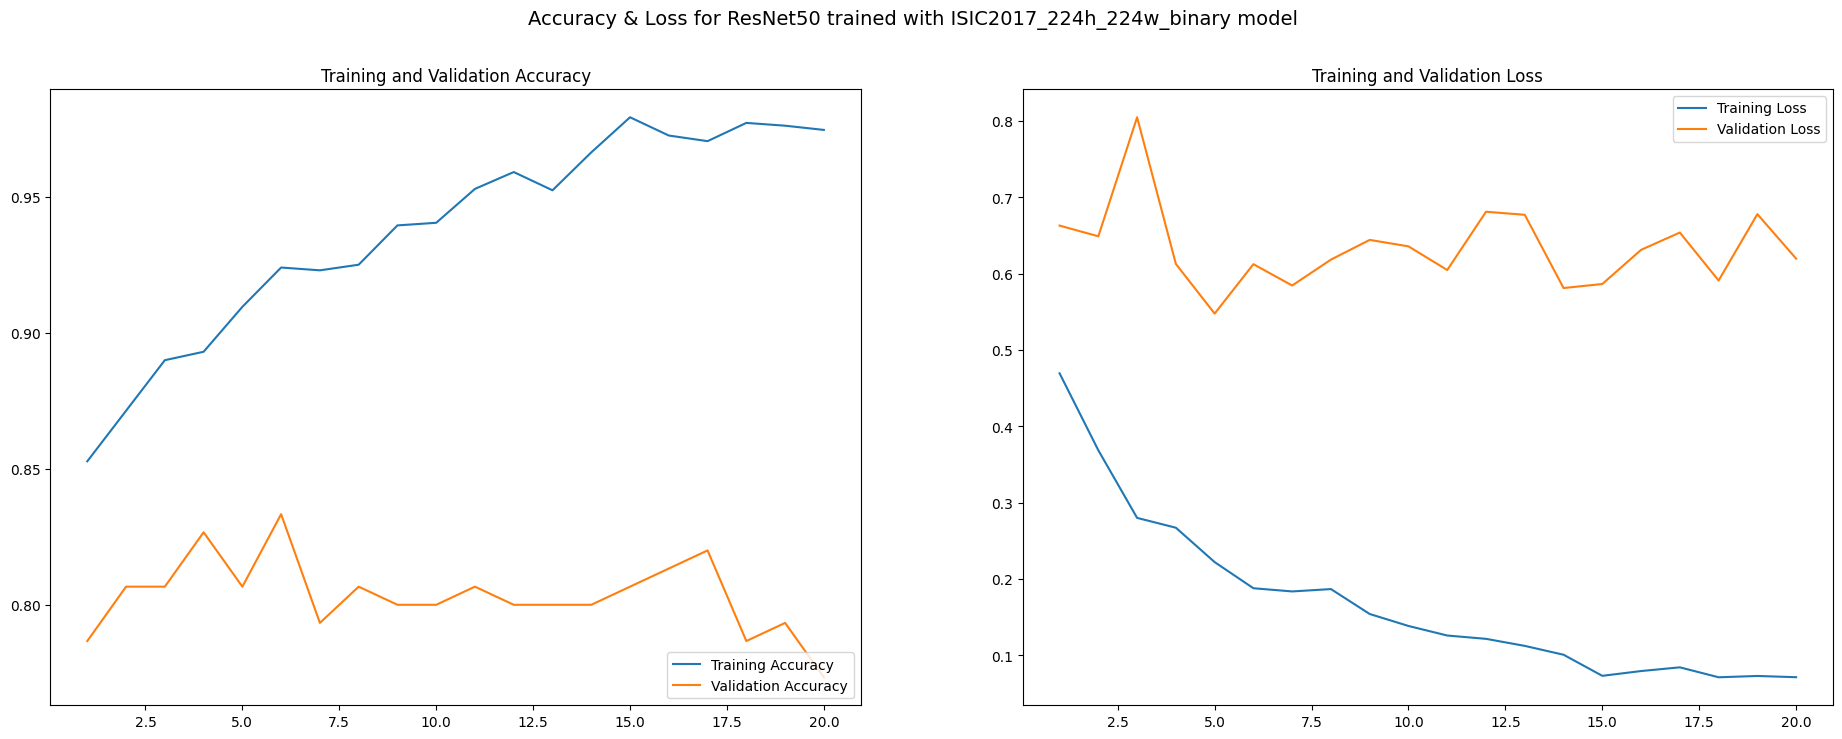

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2017_224h_224w_binary model...



52/52 [==============================] - 2s 23ms/step - loss: 0.8111 - accuracy: 0.7257
Train loss = 0.8111449480056763  ;  Train accuracy = 72.57%

32/32 [==============================] - 1s 22ms/step - loss: 0.8173 - accuracy: 0.7350
Validation loss = 0.8173312544822693  ;  Validation accuracy = 73.50%

21/21 [==============================] - 0s 22ms/step - loss: 0.8660 - accuracy: 0.7015
Test loss = 0.8659787178039551  ;  Test accuracy = 70.15%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2017_224h_224w_binary...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.67      0.99      0.80       883
   Malignant       0.97      0.42      0.58       754

    accuracy                           0.73      1637
   macro avg       0.82      0.70      0.69      1637
weighted avg       0.81      0.73      0.70      1637

Test Rep

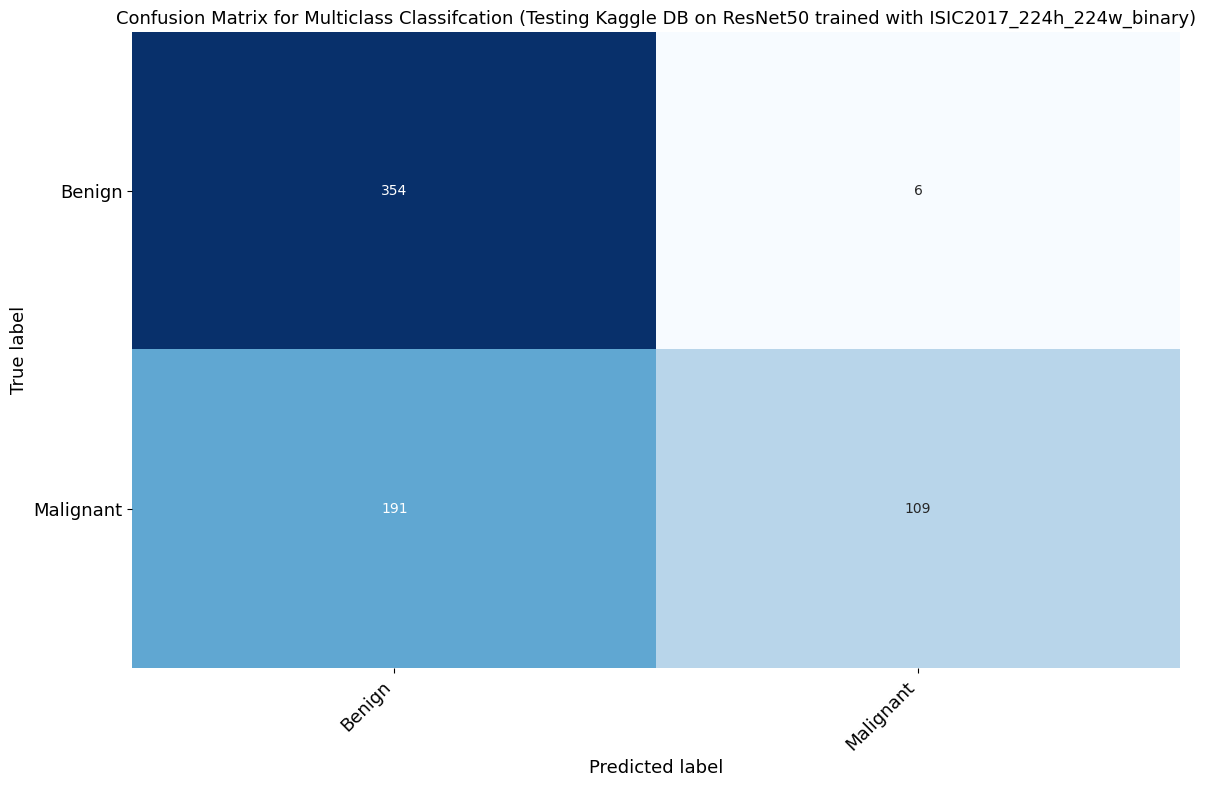

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2017_224h_224w_binary model...



251/251 [==============================] - 7s 23ms/step - loss: 0.2021 - accuracy: 0.9249
Train loss = 0.2021082043647766  ;  Train accuracy = 92.49%

28/28 [==============================] - 1s 22ms/step - loss: 0.1592 - accuracy: 0.9411
Validation loss = 0.15920749306678772  ;  Validation accuracy = 94.11%

35/35 [==============================] - 1s 22ms/step - loss: 0.1797 - accuracy: 0.9383
Test loss = 0.17969857156276703  ;  Test accuracy = 93.83%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2017_224h_224w_binary...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6994
   Malignant       0.75      0.63      0.68      1035

    accuracy                           0.92      8029
   macro avg       0.85      0.80      0.82      8029
weighted avg       0.92      0.92      0.92      8029

Test R

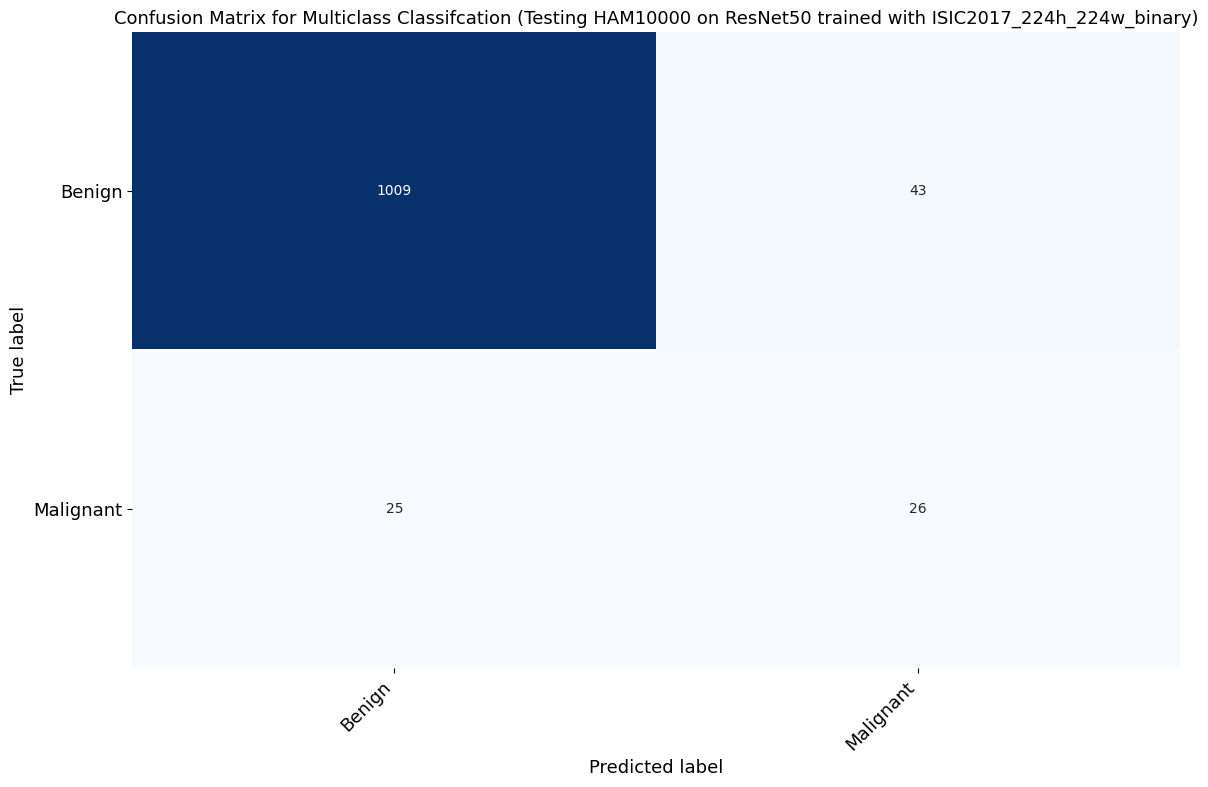

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2017_224h_224w_binary model...



23/23 [==============================] - 1s 23ms/step - loss: 0.0749 - accuracy: 0.9764
Train loss = 0.07492480427026749  ;  Train accuracy = 97.64%

6/6 [==============================] - 0s 21ms/step - loss: 0.2306 - accuracy: 0.9111
Validation loss = 0.2306489497423172  ;  Validation accuracy = 91.11%

12/12 [==============================] - 0s 22ms/step - loss: 0.1913 - accuracy: 0.9235
Test loss = 0.1913386732339859  ;  Test accuracy = 92.35%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2017_224h_224w_binary...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       583
   Malignant       0.98      0.90      0.94       137

    accuracy                           0.98       720
   macro avg       0.98      0.95      0.96       720
weighted avg       0.98      0.98      0.98       720

Test Report

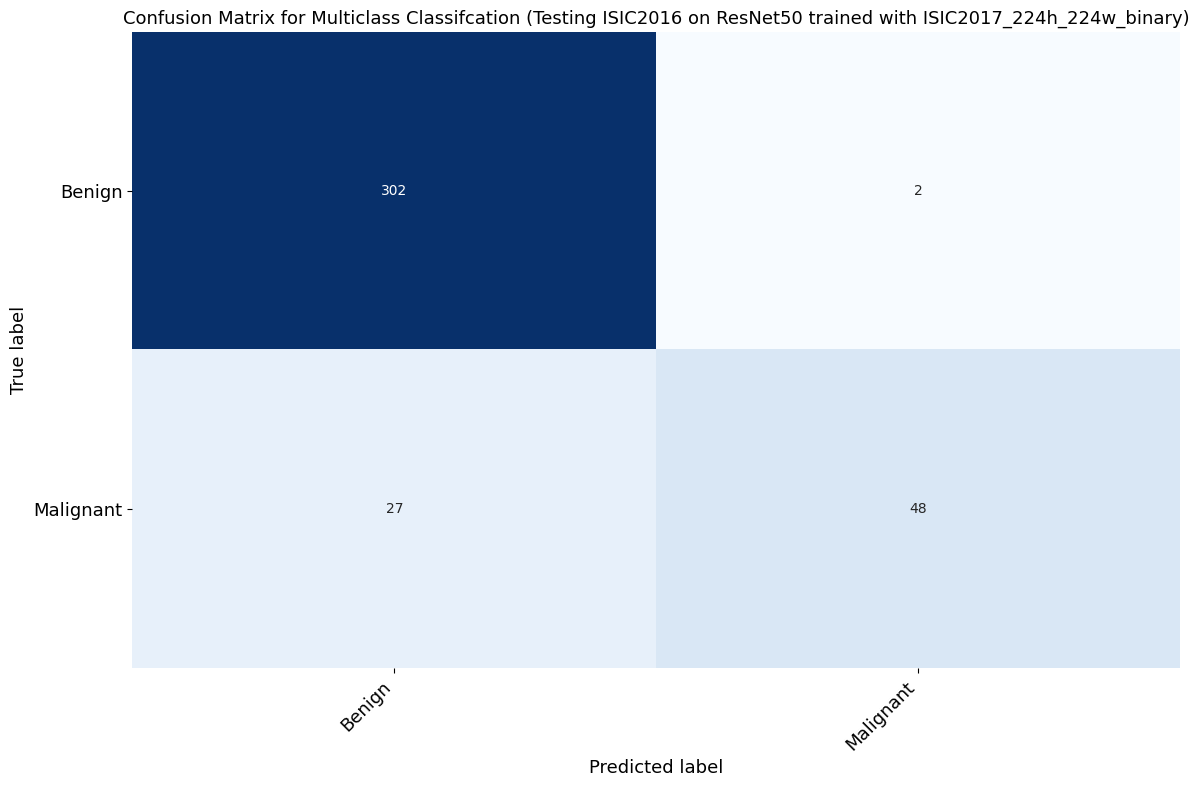

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2017_224h_224w_binary model...



63/63 [==============================] - 2s 24ms/step - loss: 0.1441 - accuracy: 0.9440
Train loss = 0.144059419631958  ;  Train accuracy = 94.40%

5/5 [==============================] - 0s 22ms/step - loss: 0.5478 - accuracy: 0.8067
Validation loss = 0.5477646589279175  ;  Validation accuracy = 80.67%

19/19 [==============================] - 1s 26ms/step - loss: 0.5255 - accuracy: 0.8283
Test loss = 0.5254635214805603  ;  Test accuracy = 82.83%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2017_224h_224w_binary...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.94      1.00      0.97      1626
   Malignant       0.97      0.72      0.83       374

    accuracy                           0.94      2000
   macro avg       0.96      0.86      0.90      2000
weighted avg       0.95      0.94      0.94      2000

Test Report :

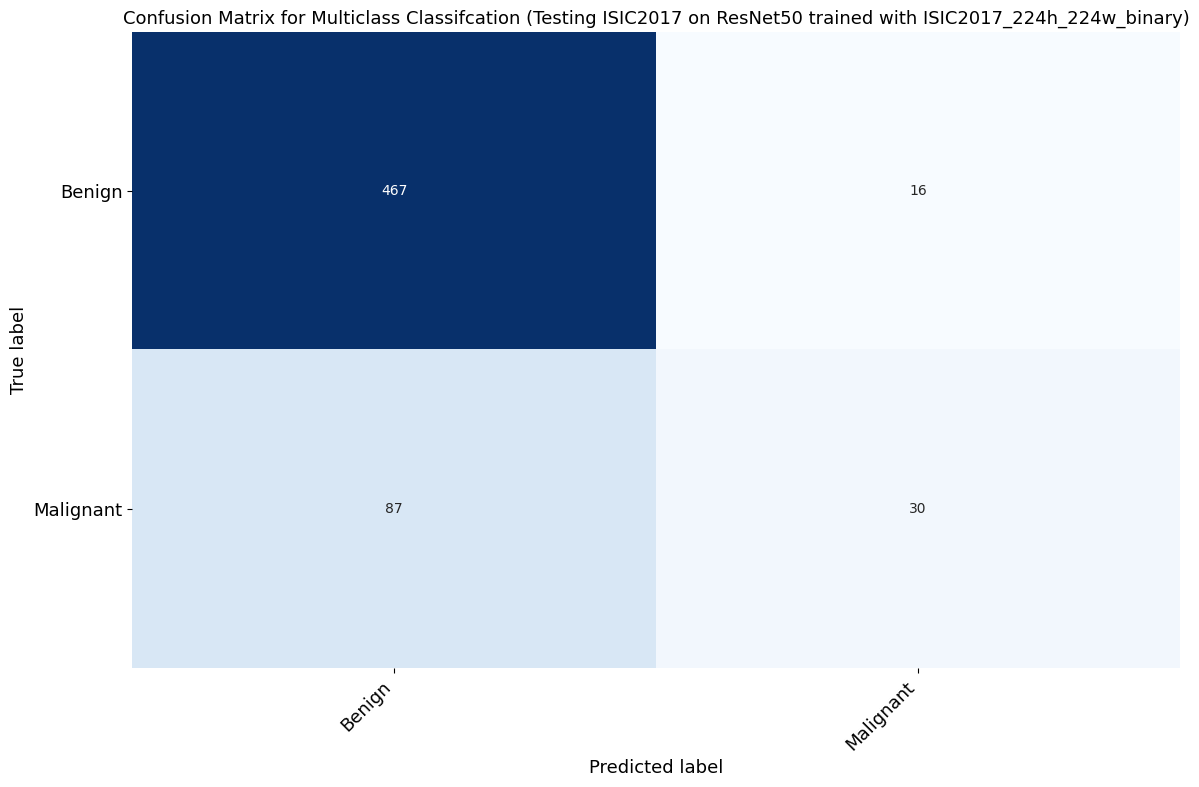

Testing on ISIC2018
Evaluating Testing ISIC2018 on ResNet50 trained with ISIC2017_224h_224w_binary model...



313/313 [==============================] - 8s 22ms/step - loss: 0.1959 - accuracy: 0.9278
Train loss = 0.19585725665092468  ;  Train accuracy = 92.78%

7/7 [==============================] - 0s 24ms/step - loss: 0.2779 - accuracy: 0.9119
Validation loss = 0.27787795662879944  ;  Validation accuracy = 91.19%

48/48 [==============================] - 1s 24ms/step - loss: 0.4120 - accuracy: 0.8657
Test loss = 0.4120090901851654  ;  Test accuracy = 86.57%
Computing predictions for Testing ISIC2018 on ResNet50 trained with ISIC2017_224h_224w_binary...
Model report for Testing ISIC2018 on ResNet50 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      8902
   Malignant       0.70      0.62      0.66      1113

    accuracy                           0.93     10015
   macro avg       0.82      0.79      0.81     10015
weighted avg       0.92      0.93      0.93     10015

Test Rep

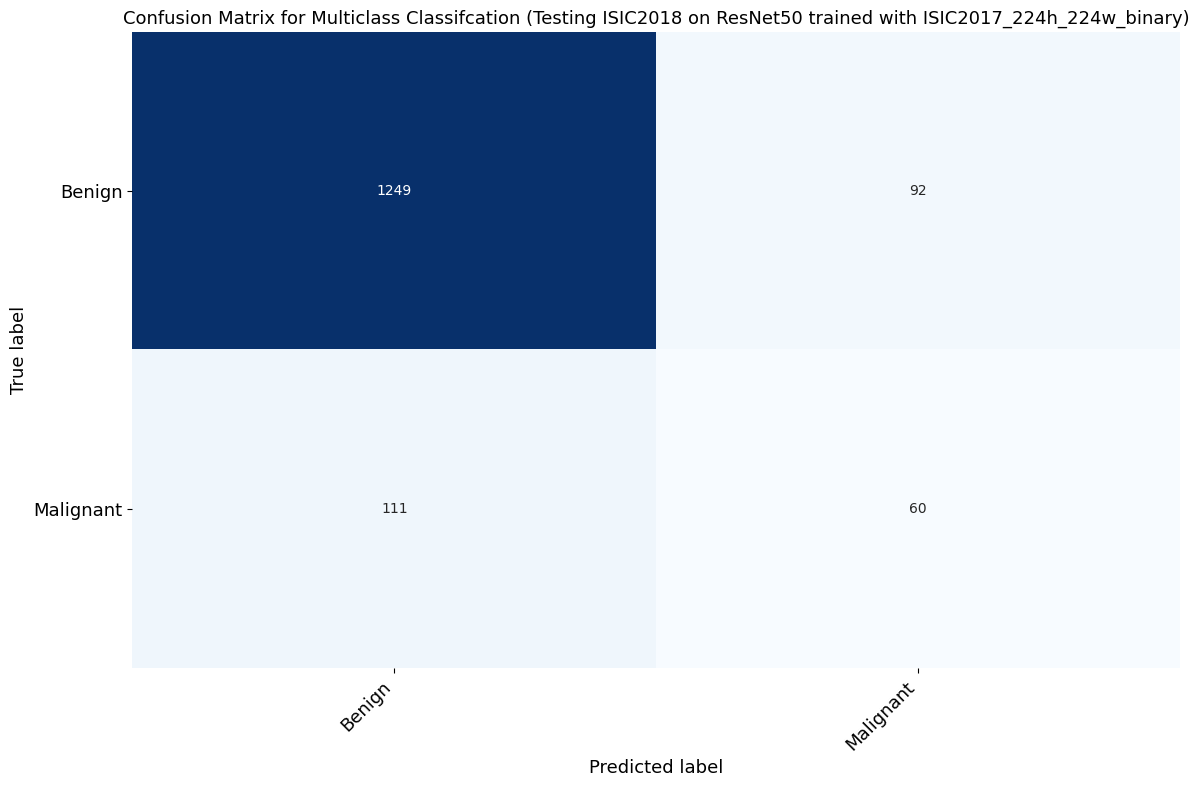

Fitting ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model...
Epoch 1/20
65/65 [==============================] - 6s 89ms/step - loss: 0.5696 - accuracy: 0.8066 - val_loss: 0.4778 - val_accuracy: 0.8636


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
65/65 [==============================] - 4s 68ms/step - loss: 0.3272 - accuracy: 0.8647 - val_loss: 0.3805 - val_accuracy: 0.8667
Epoch 3/20
65/65 [==============================] - 5s 74ms/step - loss: 0.2480 - accuracy: 0.8900 - val_loss: 0.3724 - val_accuracy: 0.8697
Epoch 4/20
65/65 [==============================] - 5s 77ms/step - loss: 0.2302 - accuracy: 0.9033 - val_loss: 0.3769 - val_accuracy: 0.8758
Epoch 5/20
65/65 [==============================] - 5s 76ms/step - loss: 0.1988 - accuracy: 0.9117 - val_loss: 0.3555 - val_accuracy: 0.8697
Epoch 6/20
65/65 [==============================] - 5s 75ms/step - loss: 0.1842 - accuracy: 0.9240 - val_loss: 0.3612 - val_accuracy: 0.8788
Epoch 7/20
65/65 [==============================] - 5s 75ms/step - loss: 0.1685 - accuracy: 0.9289 - val_loss: 0.4017 - val_accuracy: 0.8788
Epoch 8/20
65/65 [==============================] - 5s 75ms/step - loss: 0.1446 - accuracy: 0.9424 - val_loss: 0.3651 - val_accuracy: 0.8697
Epoch 9/20
65

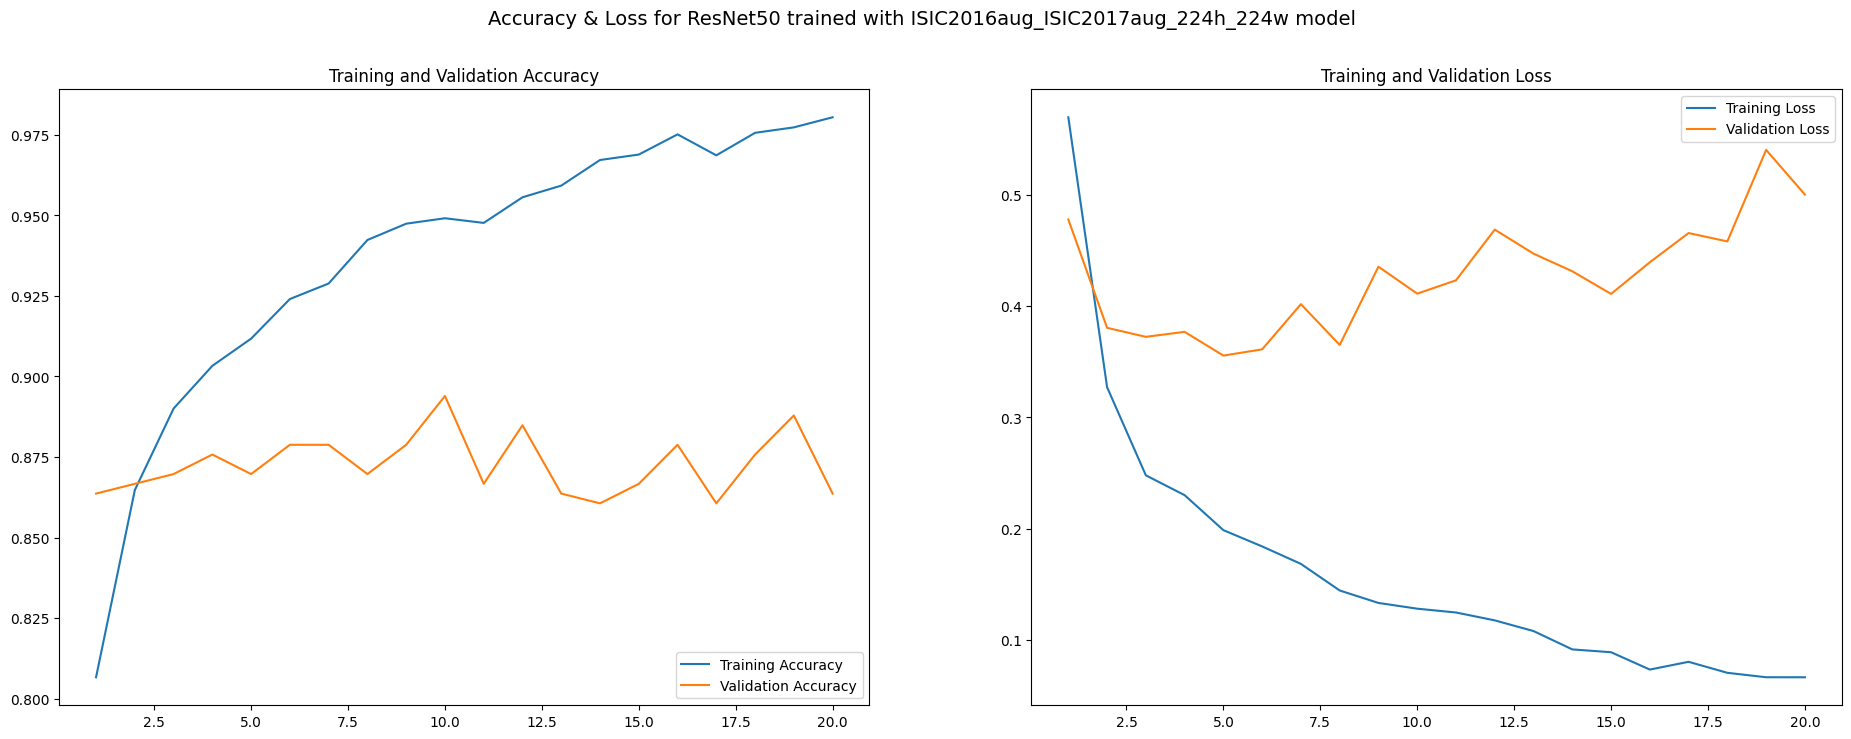

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model...



52/52 [==============================] - 2s 22ms/step - loss: 0.5968 - accuracy: 0.7978
Train loss = 0.5968457460403442  ;  Train accuracy = 79.78%

32/32 [==============================] - 1s 24ms/step - loss: 0.5776 - accuracy: 0.8060
Validation loss = 0.5776105523109436  ;  Validation accuracy = 80.60%

21/21 [==============================] - 0s 23ms/step - loss: 0.5905 - accuracy: 0.8061
Test loss = 0.5905164480209351  ;  Test accuracy = 80.61%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.75      0.93      0.83       883
   Malignant       0.89      0.64      0.75       754

    accuracy                           0.80      1637
   macro avg       0.82      0.79      0.79      1637
weighted avg       0.82      0.80      0.79    

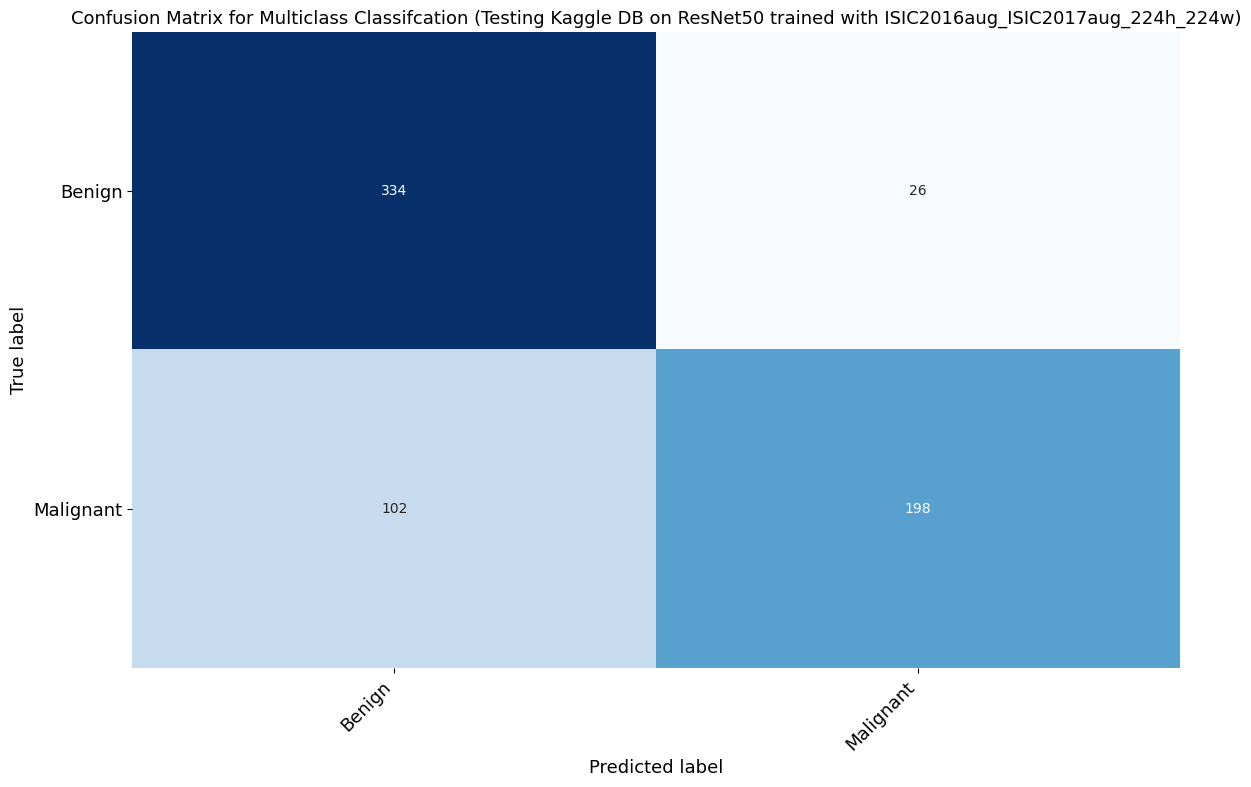

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model...



251/251 [==============================] - 6s 23ms/step - loss: 0.3716 - accuracy: 0.8542
Train loss = 0.3716018497943878  ;  Train accuracy = 85.42%

28/28 [==============================] - 1s 22ms/step - loss: 0.3186 - accuracy: 0.8901
Validation loss = 0.31864944100379944  ;  Validation accuracy = 89.01%

35/35 [==============================] - 1s 22ms/step - loss: 0.3192 - accuracy: 0.8867
Test loss = 0.3191958963871002  ;  Test accuracy = 88.67%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.88      0.91      6994
   Malignant       0.46      0.69      0.55      1035

    accuracy                           0.85      8029
   macro avg       0.70      0.78      0.73      8029
weighted avg       0.89      0.85      0.87   

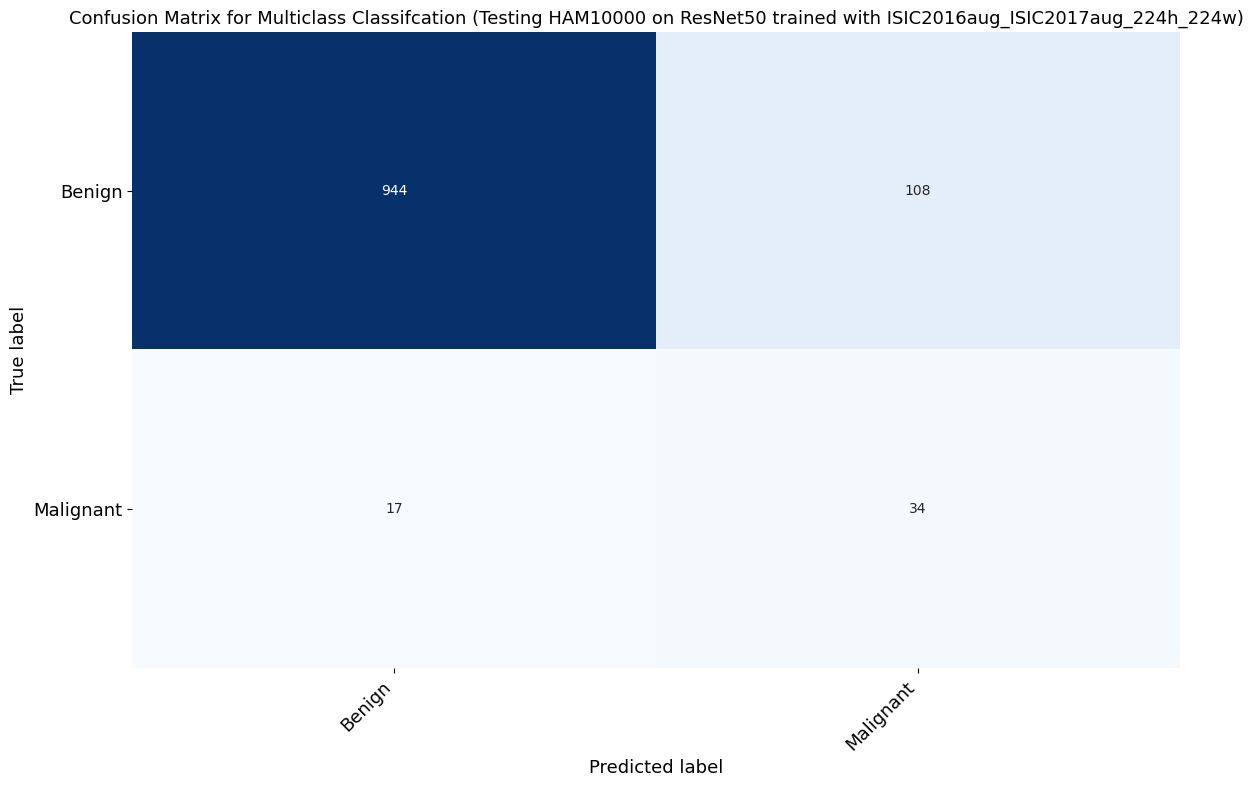

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model...



23/23 [==============================] - 1s 23ms/step - loss: 0.0350 - accuracy: 0.9917
Train loss = 0.034977320581674576  ;  Train accuracy = 99.17%

6/6 [==============================] - 0s 20ms/step - loss: 0.1276 - accuracy: 0.9500
Validation loss = 0.12760666012763977  ;  Validation accuracy = 95.00%

12/12 [==============================] - 0s 22ms/step - loss: 0.1281 - accuracy: 0.9525
Test loss = 0.12807859480381012  ;  Test accuracy = 95.25%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      0.99       583
   Malignant       0.96      1.00      0.98       137

    accuracy                           0.99       720
   macro avg       0.98      0.99      0.99       720
weighted avg       0.99      0.99      0.99    

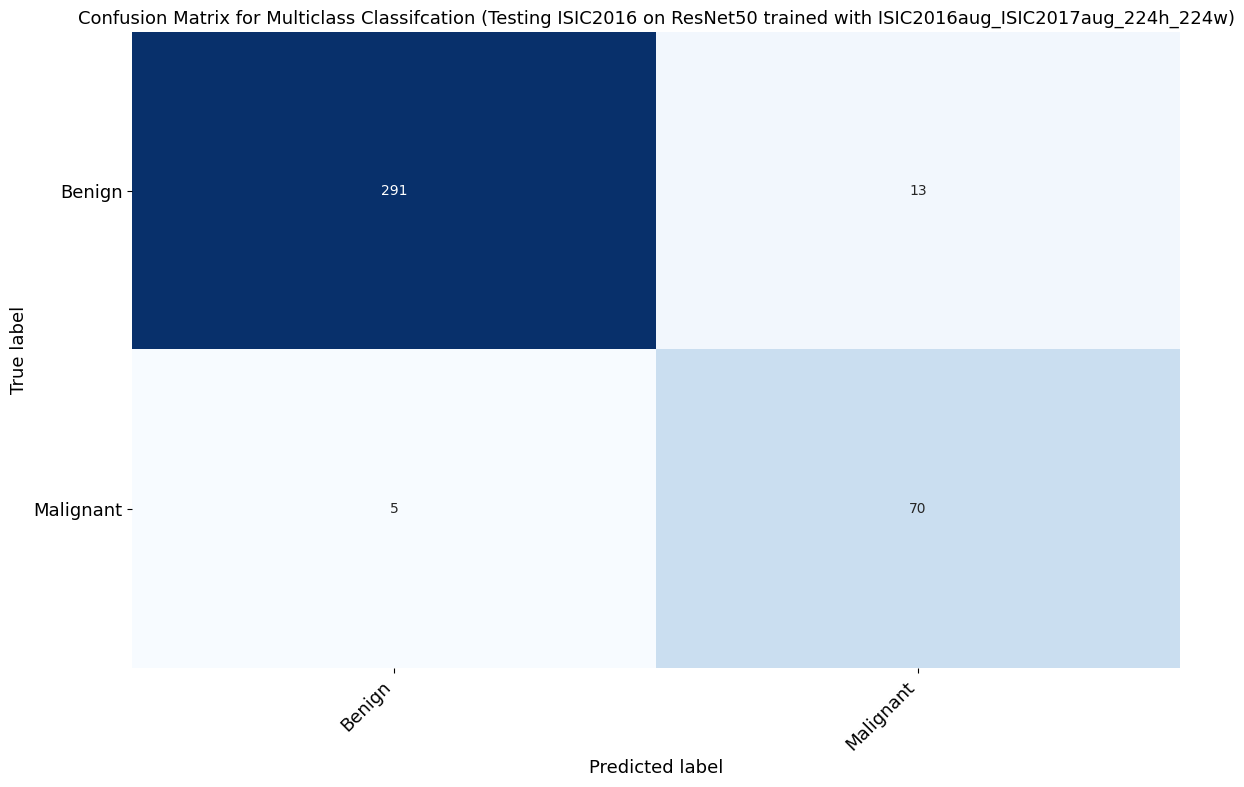

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model...



63/63 [==============================] - 2s 22ms/step - loss: 0.0324 - accuracy: 0.9980
Train loss = 0.03242510184645653  ;  Train accuracy = 99.80%

5/5 [==============================] - 0s 21ms/step - loss: 0.6291 - accuracy: 0.7733
Validation loss = 0.6290590167045593  ;  Validation accuracy = 77.33%

19/19 [==============================] - 0s 22ms/step - loss: 0.6252 - accuracy: 0.7983
Test loss = 0.6251780986785889  ;  Test accuracy = 79.83%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1626
   Malignant       0.99      1.00      0.99       374

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2

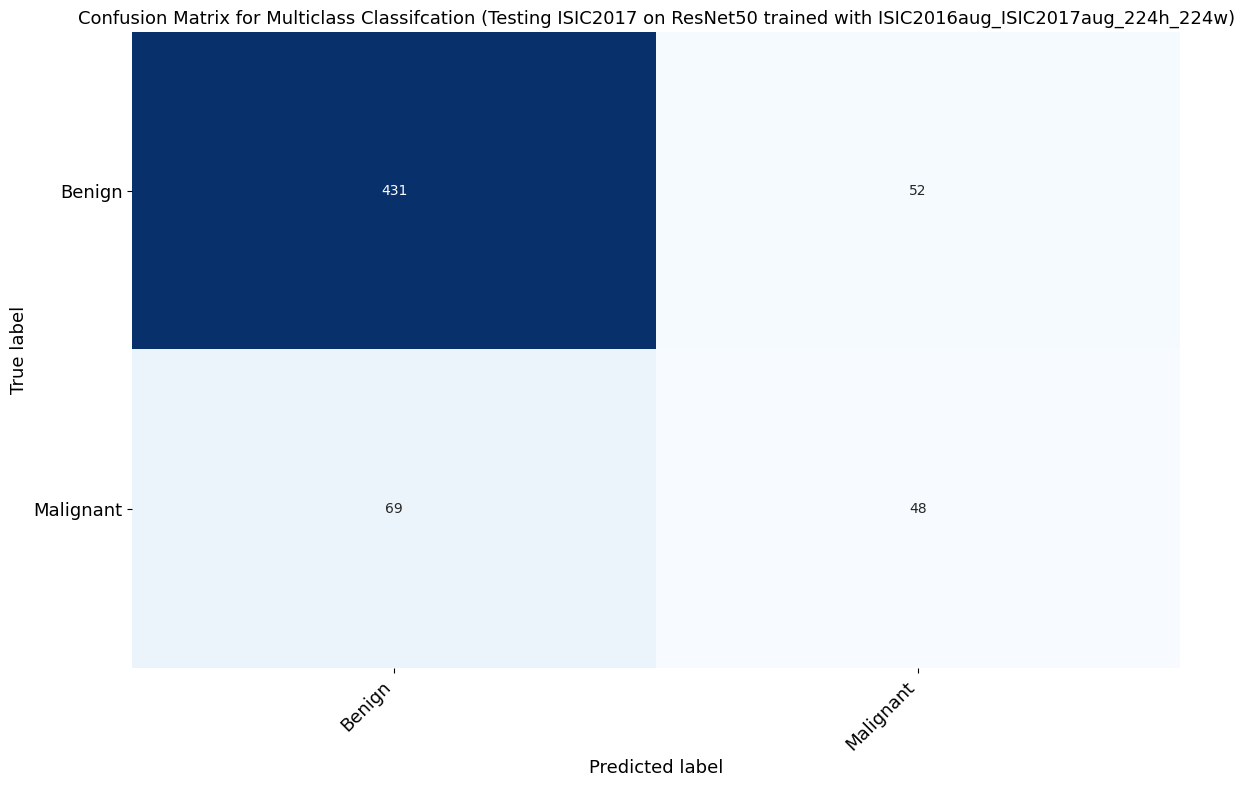

Testing on ISIC2018
Evaluating Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model...



313/313 [==============================] - 8s 22ms/step - loss: 0.3612 - accuracy: 0.8609
Train loss = 0.3611605167388916  ;  Train accuracy = 86.09%

7/7 [==============================] - 0s 25ms/step - loss: 0.3688 - accuracy: 0.8342
Validation loss = 0.36880046129226685  ;  Validation accuracy = 83.42%

48/48 [==============================] - 1s 22ms/step - loss: 0.6148 - accuracy: 0.8062
Test loss = 0.6147929430007935  ;  Test accuracy = 80.62%
Computing predictions for Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.88      0.92      8902
   Malignant       0.42      0.68      0.52      1113

    accuracy                           0.86     10015
   macro avg       0.69      0.78      0.72     10015
weighted avg       0.90      0.86      0.87     

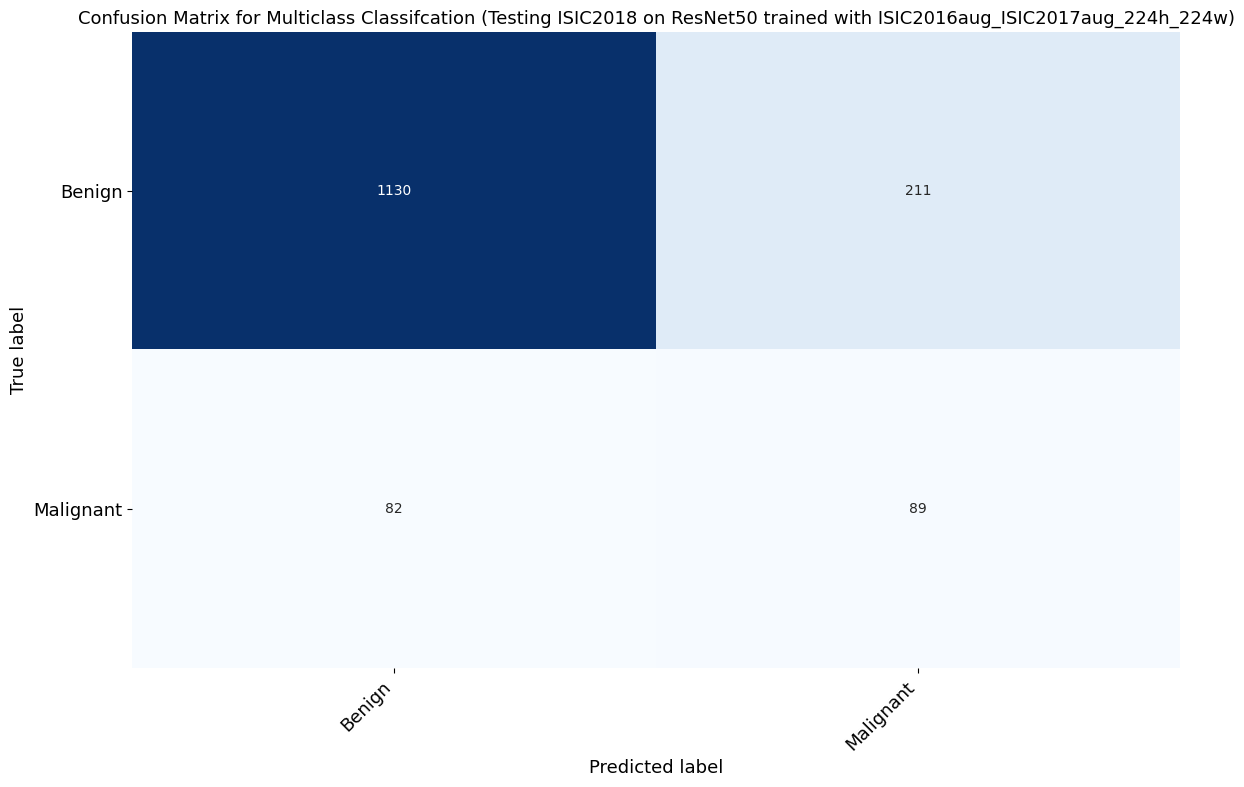

Fitting ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...
Epoch 1/20
91/91 [==============================] - 8s 86ms/step - loss: 0.2833 - accuracy: 0.9187 - val_loss: 0.5559 - val_accuracy: 0.8459


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
91/91 [==============================] - 7s 75ms/step - loss: 0.1825 - accuracy: 0.9303 - val_loss: 0.3775 - val_accuracy: 0.8729
Epoch 3/20
91/91 [==============================] - 7s 74ms/step - loss: 0.1508 - accuracy: 0.9421 - val_loss: 0.3695 - val_accuracy: 0.8707
Epoch 4/20
91/91 [==============================] - 7s 77ms/step - loss: 0.1304 - accuracy: 0.9492 - val_loss: 0.3591 - val_accuracy: 0.8692
Epoch 5/20
91/91 [==============================] - 7s 77ms/step - loss: 0.1060 - accuracy: 0.9637 - val_loss: 0.4018 - val_accuracy: 0.8744
Epoch 6/20
91/91 [==============================] - 7s 75ms/step - loss: 0.0973 - accuracy: 0.9597 - val_loss: 0.3633 - val_accuracy: 0.8707
Epoch 7/20
91/91 [==============================] - 7s 75ms/step - loss: 0.0930 - accuracy: 0.9644 - val_loss: 0.3865 - val_accuracy: 0.8722
Epoch 8/20
91/91 [==============================] - 7s 79ms/step - loss: 0.0804 - accuracy: 0.9703 - val_loss: 0.4080 - val_accuracy: 0.8752
Epoch 9/20
91

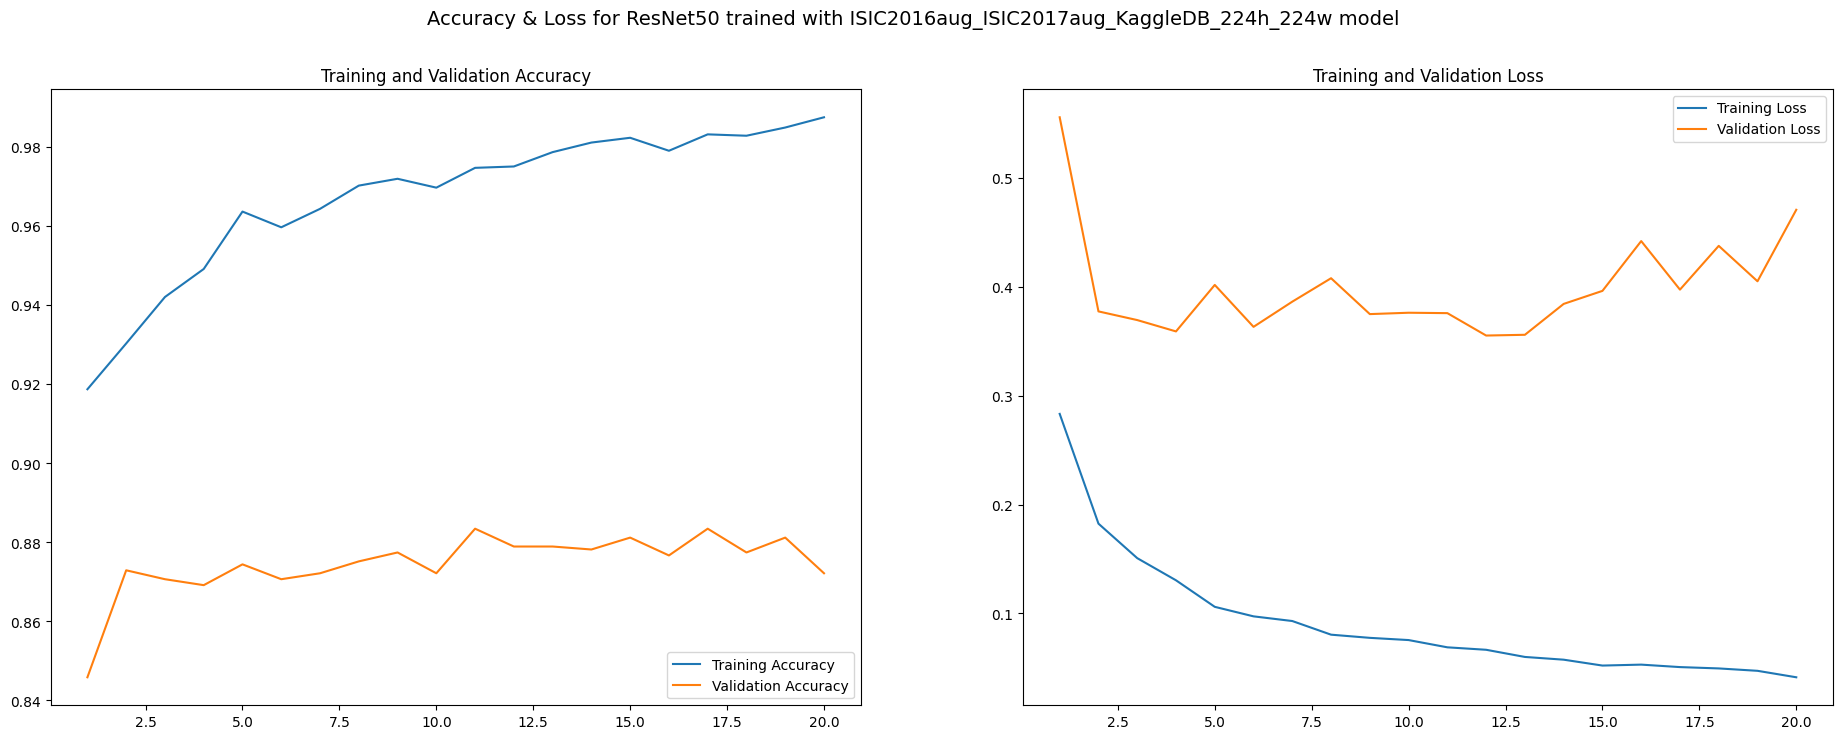

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...



52/52 [==============================] - 2s 24ms/step - loss: 0.0281 - accuracy: 0.9951
Train loss = 0.02808181568980217  ;  Train accuracy = 99.51%

32/32 [==============================] - 1s 22ms/step - loss: 0.3514 - accuracy: 0.8780
Validation loss = 0.351406991481781  ;  Validation accuracy = 87.80%

21/21 [==============================] - 0s 22ms/step - loss: 0.3891 - accuracy: 0.8758
Test loss = 0.38909515738487244  ;  Test accuracy = 87.58%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      1.00       883
   Malignant       0.99      1.00      0.99       754

    accuracy                           1.00      1637
   macro avg       0.99      1.00      1.00      1637
weighted avg       1.00     

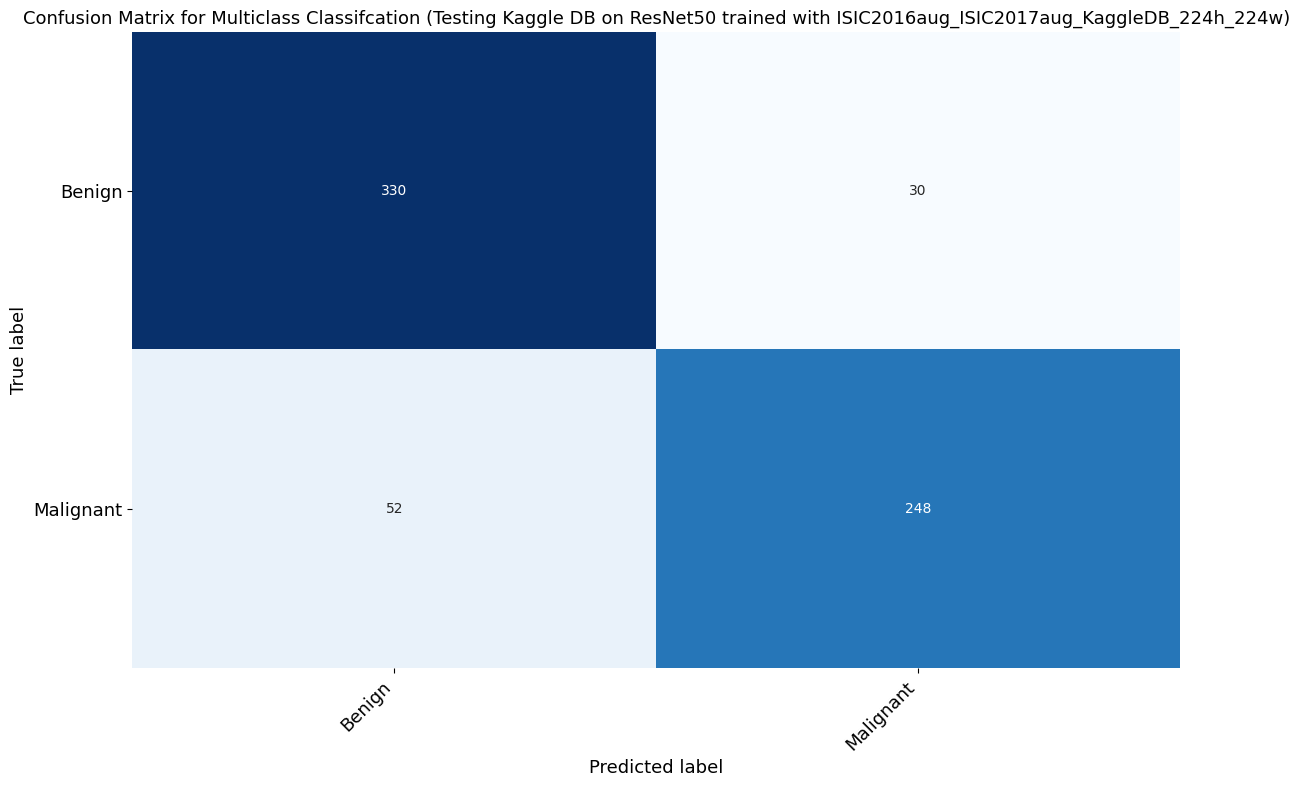

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...



251/251 [==============================] - 6s 22ms/step - loss: 0.5875 - accuracy: 0.8249
Train loss = 0.5874600410461426  ;  Train accuracy = 82.49%

28/28 [==============================] - 1s 22ms/step - loss: 0.4656 - accuracy: 0.8800
Validation loss = 0.46558067202568054  ;  Validation accuracy = 88.00%

35/35 [==============================] - 1s 22ms/step - loss: 0.4549 - accuracy: 0.8930
Test loss = 0.4549446403980255  ;  Test accuracy = 89.30%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.97      0.82      0.89      6994
   Malignant       0.41      0.85      0.56      1035

    accuracy                           0.82      8029
   macro avg       0.69      0.84      0.72      8029
weighted avg       0.90     

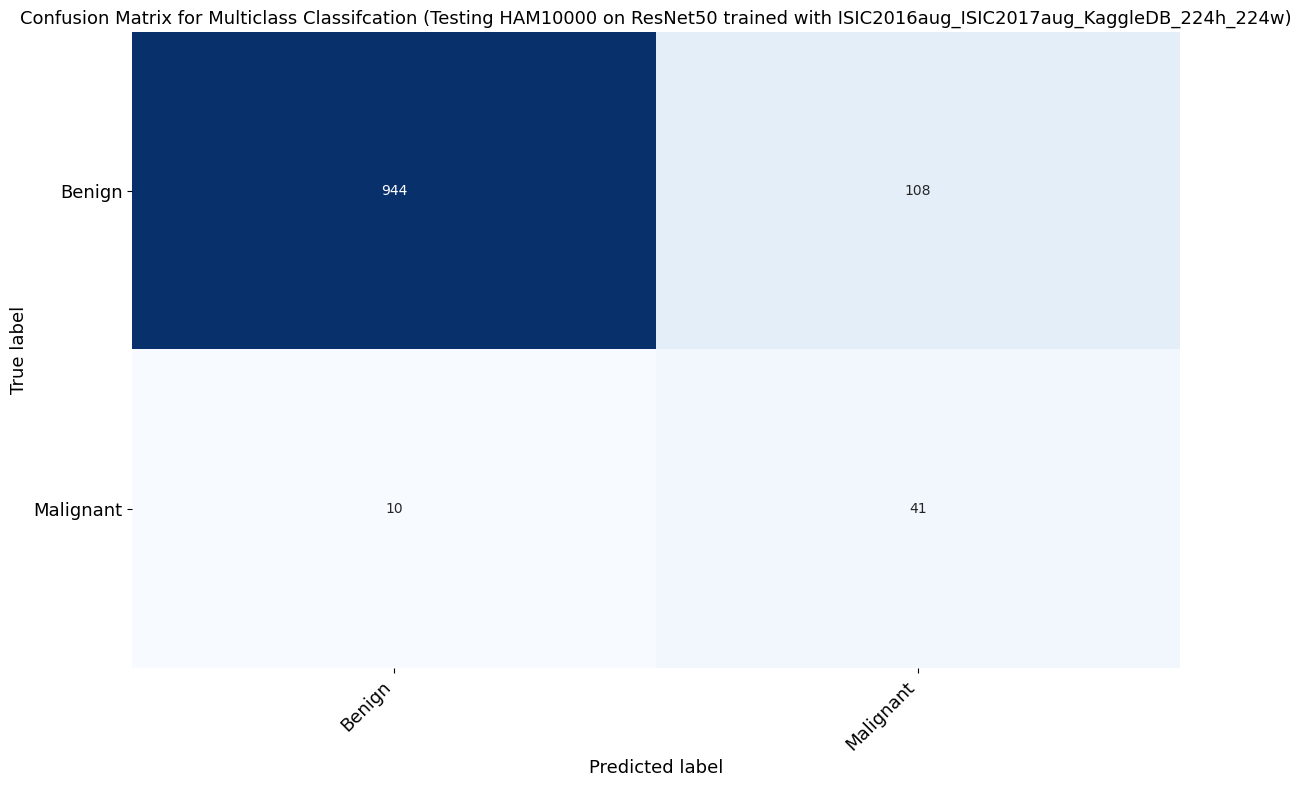

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...



23/23 [==============================] - 1s 25ms/step - loss: 0.0135 - accuracy: 0.9972
Train loss = 0.013521821238100529  ;  Train accuracy = 99.72%

6/6 [==============================] - 0s 21ms/step - loss: 0.0952 - accuracy: 0.9556
Validation loss = 0.09521647542715073  ;  Validation accuracy = 95.56%

12/12 [==============================] - 0s 22ms/step - loss: 0.1390 - accuracy: 0.9604
Test loss = 0.13899953663349152  ;  Test accuracy = 96.04%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       583
   Malignant       0.99      1.00      0.99       137

    accuracy                           1.00       720
   macro avg       0.99      1.00      1.00       720
weighted avg       1.00      

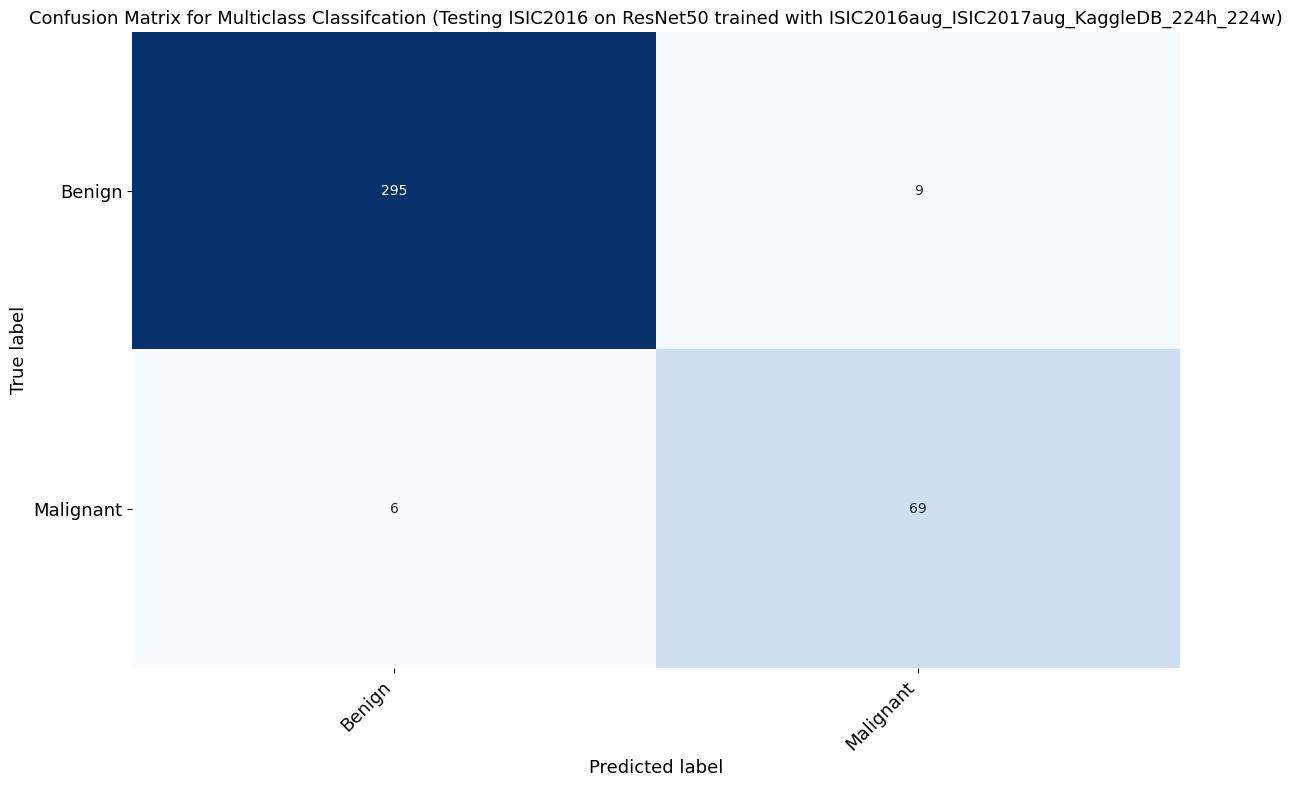

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...



63/63 [==============================] - 3s 22ms/step - loss: 0.0108 - accuracy: 0.9975
Train loss = 0.01078663021326065  ;  Train accuracy = 99.75%

5/5 [==============================] - 0s 21ms/step - loss: 0.6937 - accuracy: 0.7933
Validation loss = 0.6936999559402466  ;  Validation accuracy = 79.33%

19/19 [==============================] - 0s 22ms/step - loss: 0.7702 - accuracy: 0.8250
Test loss = 0.7702090740203857  ;  Test accuracy = 82.50%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1626
   Malignant       1.00      0.99      0.99       374

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.0

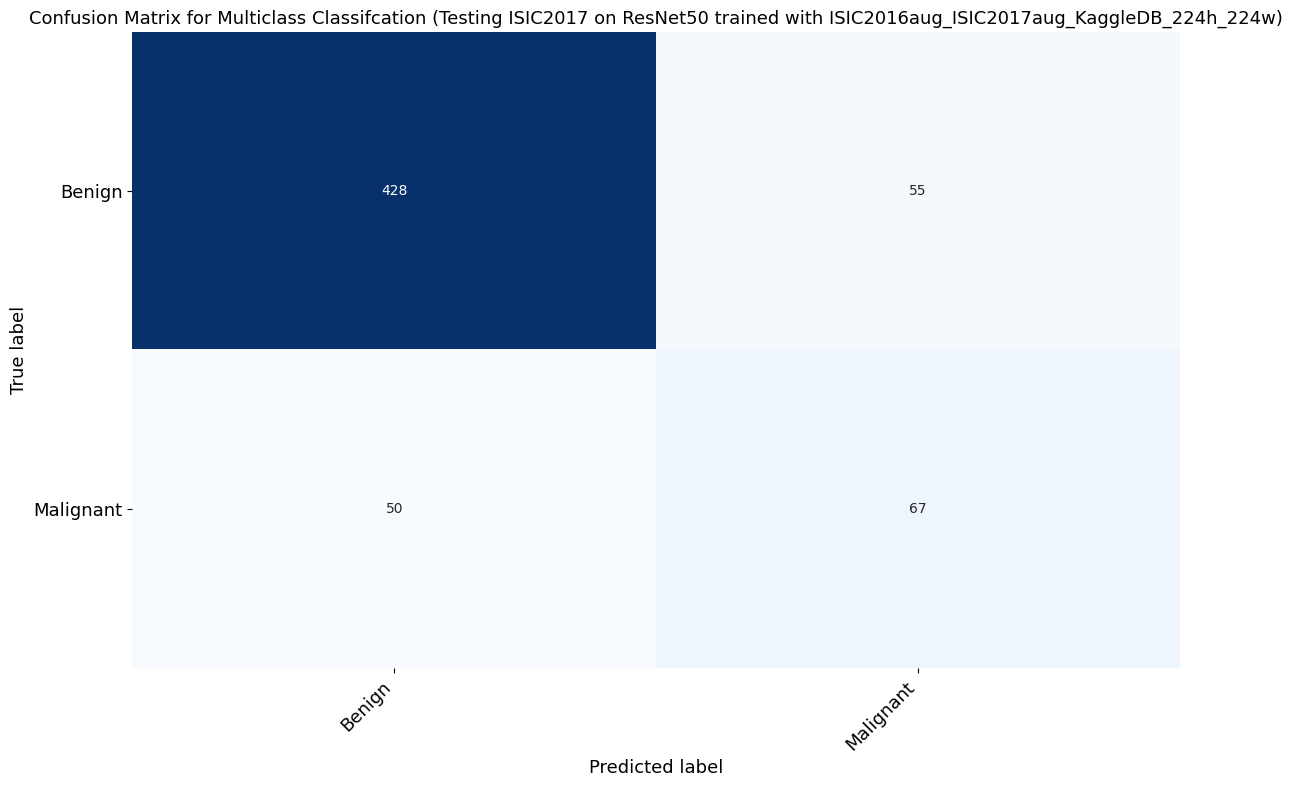

Testing on ISIC2018
Evaluating Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...



313/313 [==============================] - 8s 25ms/step - loss: 0.5621 - accuracy: 0.8372
Train loss = 0.5621203780174255  ;  Train accuracy = 83.72%

7/7 [==============================] - 0s 20ms/step - loss: 0.6156 - accuracy: 0.8187
Validation loss = 0.6155714392662048  ;  Validation accuracy = 81.87%

48/48 [==============================] - 1s 22ms/step - loss: 0.9267 - accuracy: 0.7646
Test loss = 0.9267124533653259  ;  Test accuracy = 76.46%
Computing predictions for Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.98      0.84      0.90      8902
   Malignant       0.39      0.85      0.54      1113

    accuracy                           0.84     10015
   macro avg       0.69      0.84      0.72     10015
weighted avg       0.91      0.

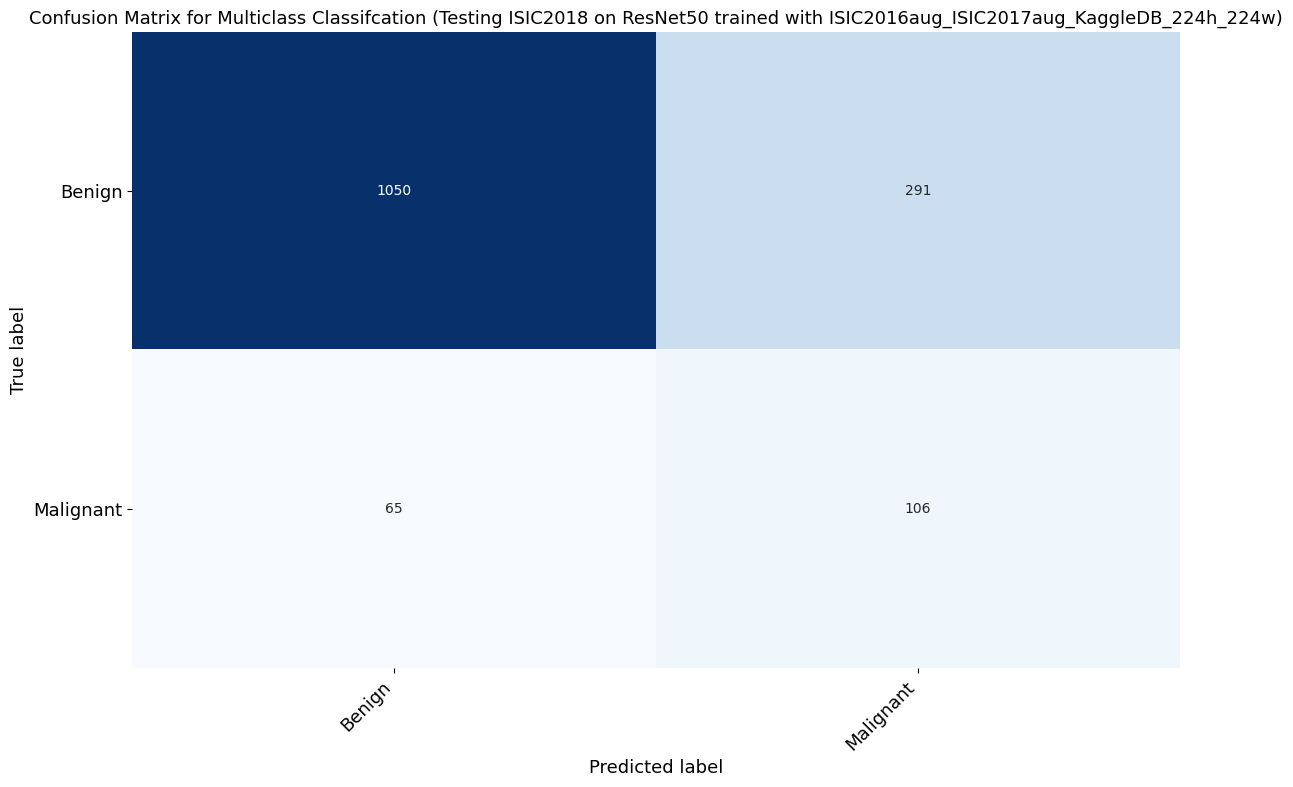

Fitting ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...
Epoch 1/20
320/320 [==============================] - 24s 74ms/step - loss: 0.3387 - accuracy: 0.8775 - val_loss: 0.3423 - val_accuracy: 0.8785


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
320/320 [==============================] - 23s 72ms/step - loss: 0.2479 - accuracy: 0.8966 - val_loss: 0.2917 - val_accuracy: 0.8917
Epoch 3/20
320/320 [==============================] - 23s 71ms/step - loss: 0.2163 - accuracy: 0.9110 - val_loss: 0.2867 - val_accuracy: 0.8930
Epoch 4/20
320/320 [==============================] - 23s 72ms/step - loss: 0.2015 - accuracy: 0.9152 - val_loss: 0.2761 - val_accuracy: 0.9002
Epoch 5/20
320/320 [==============================] - 23s 73ms/step - loss: 0.1813 - accuracy: 0.9268 - val_loss: 0.2759 - val_accuracy: 0.8982
Epoch 6/20
320/320 [==============================] - 23s 72ms/step - loss: 0.1696 - accuracy: 0.9318 - val_loss: 0.2624 - val_accuracy: 0.8989
Epoch 7/20
320/320 [==============================] - 23s 73ms/step - loss: 0.1596 - accuracy: 0.9379 - val_loss: 0.3208 - val_accuracy: 0.8949
Epoch 8/20
320/320 [==============================] - 24s 73ms/step - loss: 0.1515 - accuracy: 0.9411 - val_loss: 0.2593 - val_accuracy:

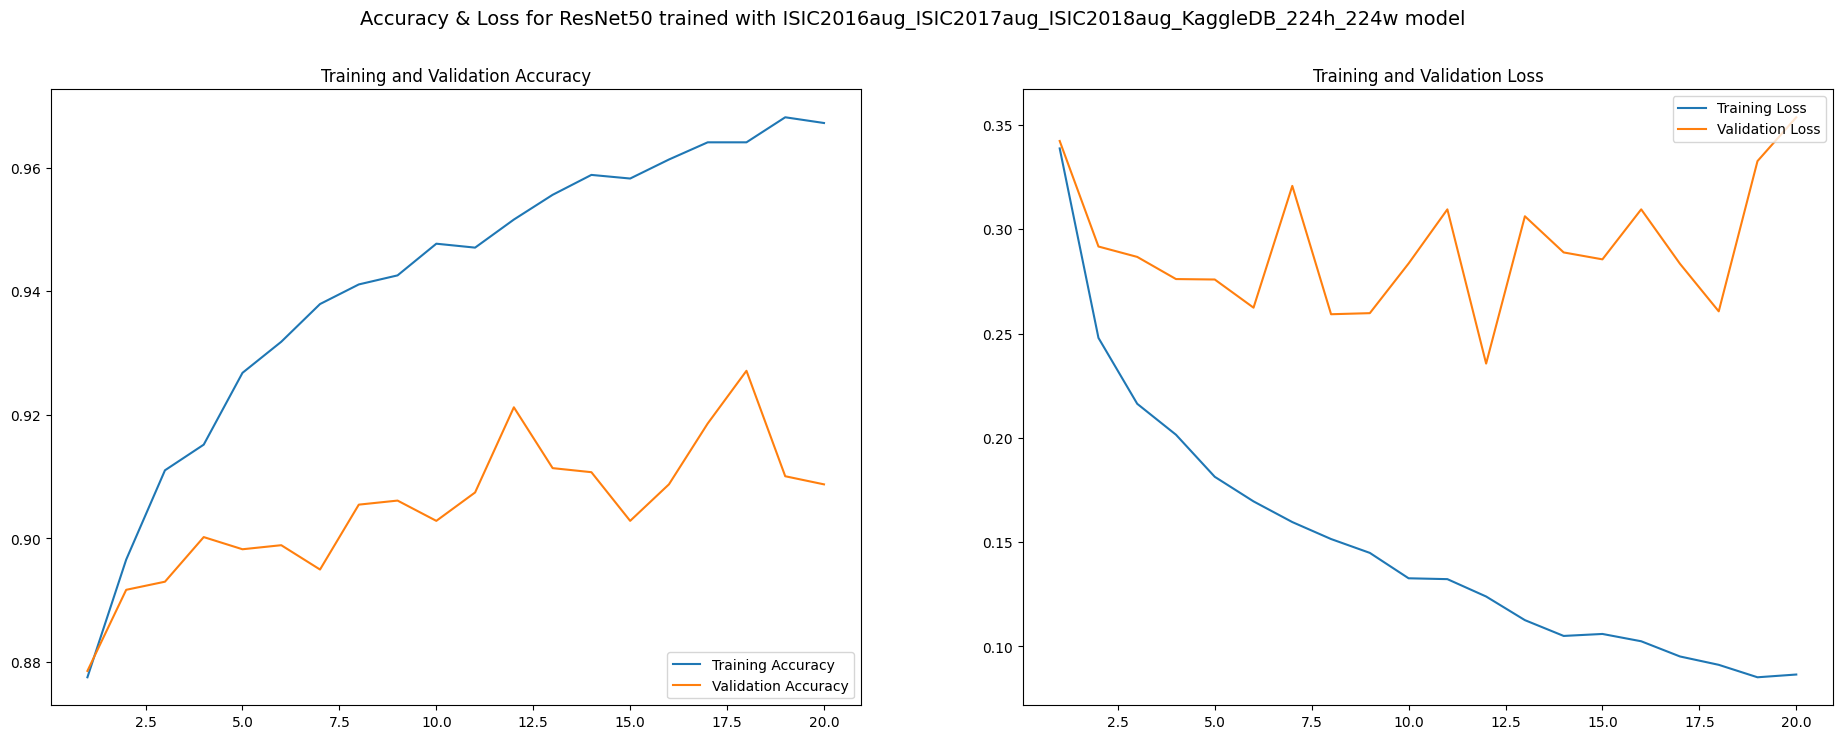

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...



52/52 [==============================] - 2s 22ms/step - loss: 0.0367 - accuracy: 0.9914
Train loss = 0.03673973307013512  ;  Train accuracy = 99.14%

32/32 [==============================] - 1s 22ms/step - loss: 0.1848 - accuracy: 0.9390
Validation loss = 0.1848175972700119  ;  Validation accuracy = 93.90%

21/21 [==============================] - 0s 22ms/step - loss: 0.2319 - accuracy: 0.9197
Test loss = 0.23194801807403564  ;  Test accuracy = 91.97%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       883
   Malignant       1.00      0.98      0.99       754

    accuracy                           0.99      1637
   macro avg       0.99      0.99      0.99      1637
wei

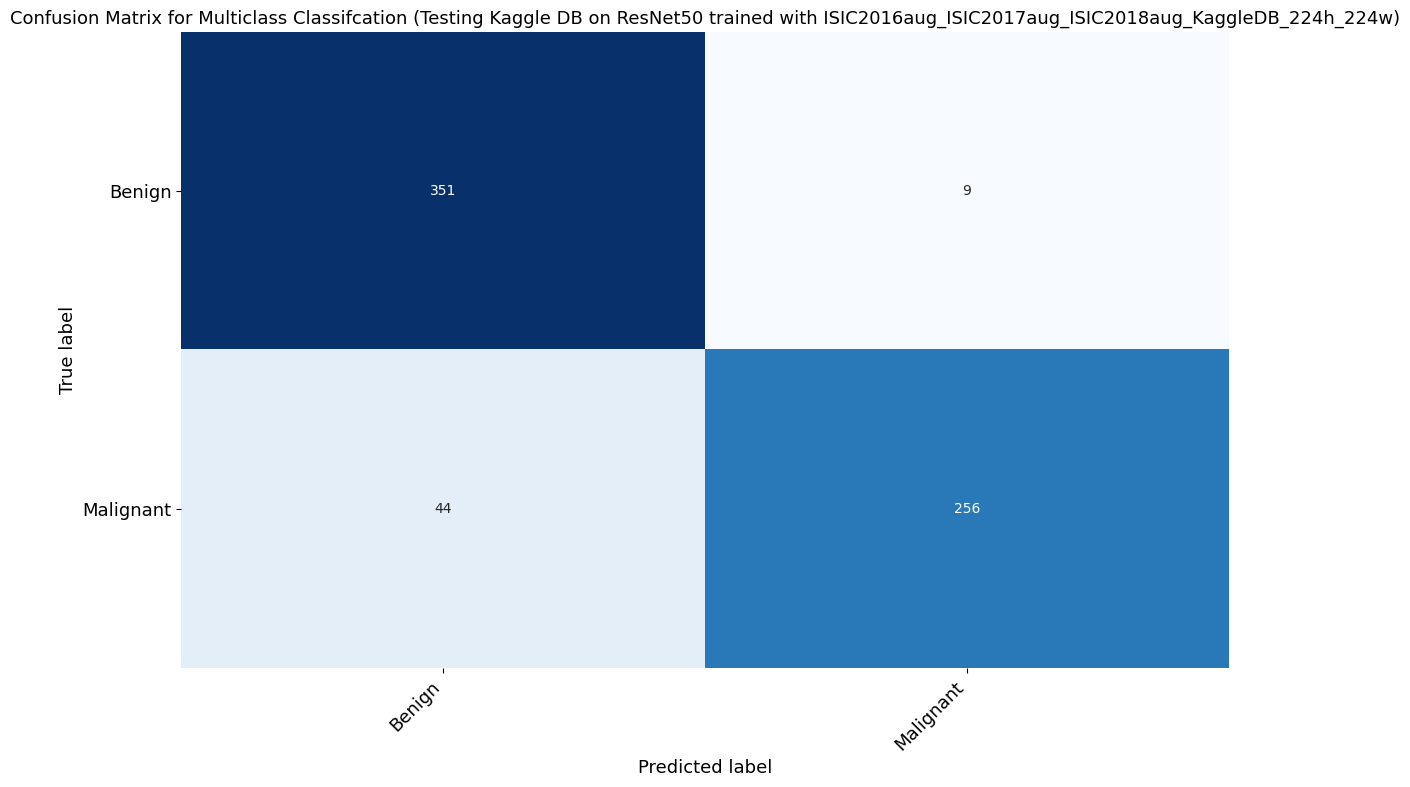

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...



251/251 [==============================] - 7s 22ms/step - loss: 0.0632 - accuracy: 0.9827
Train loss = 0.06317349523305893  ;  Train accuracy = 98.27%

28/28 [==============================] - 1s 24ms/step - loss: 0.0418 - accuracy: 0.9864
Validation loss = 0.041771721094846725  ;  Validation accuracy = 98.64%

35/35 [==============================] - 1s 22ms/step - loss: 0.0469 - accuracy: 0.9864
Test loss = 0.04692975431680679  ;  Test accuracy = 98.64%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      6994
   Malignant       0.91      0.95      0.93      1035

    accuracy                           0.98      8029
   macro avg       0.95      0.97      0.96      8029
w

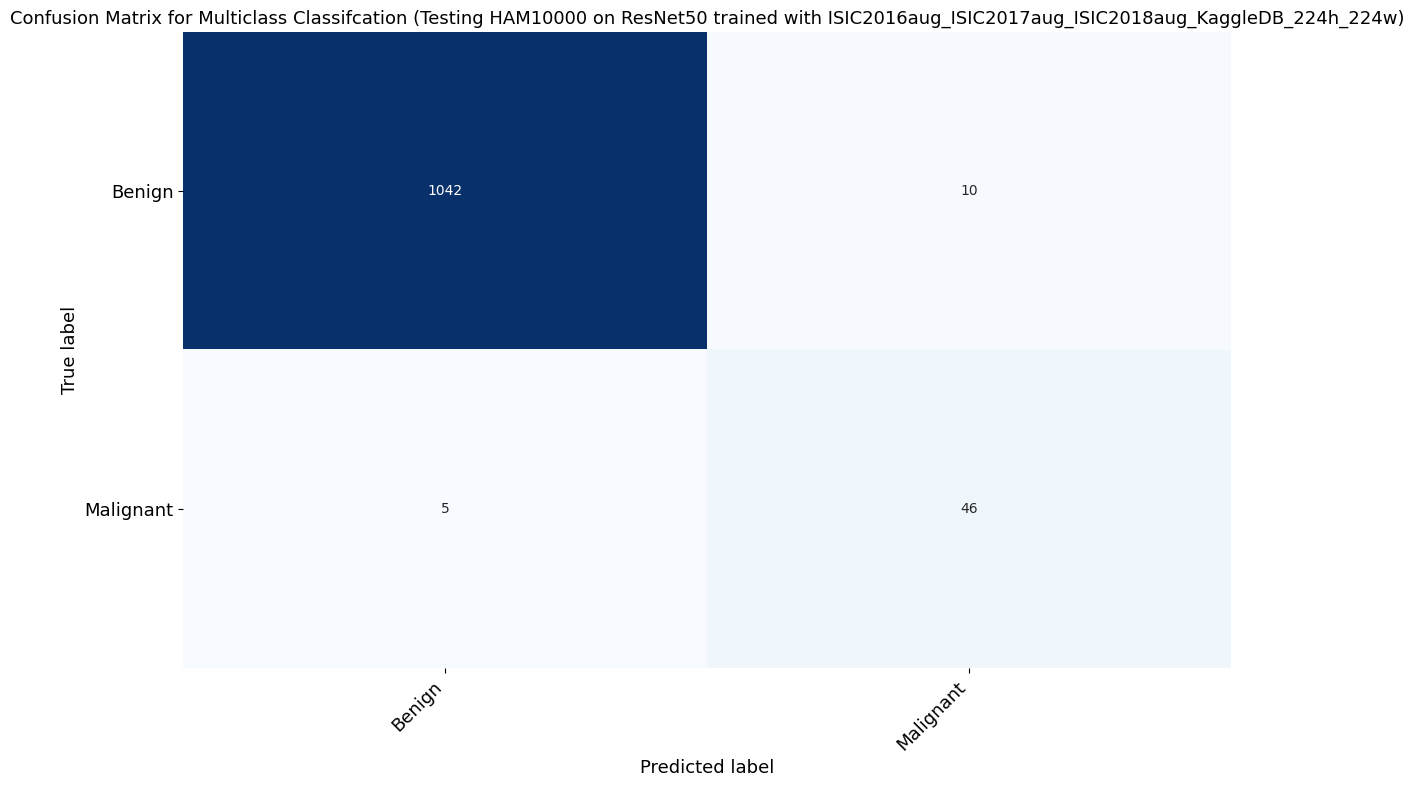

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...



23/23 [==============================] - 1s 22ms/step - loss: 0.0298 - accuracy: 0.9917
Train loss = 0.029781892895698547  ;  Train accuracy = 99.17%

6/6 [==============================] - 0s 21ms/step - loss: 0.1336 - accuracy: 0.9611
Validation loss = 0.13357117772102356  ;  Validation accuracy = 96.11%

12/12 [==============================] - 0s 22ms/step - loss: 0.1569 - accuracy: 0.9525
Test loss = 0.15693679451942444  ;  Test accuracy = 95.25%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       583
   Malignant       0.98      0.98      0.98       137

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weigh

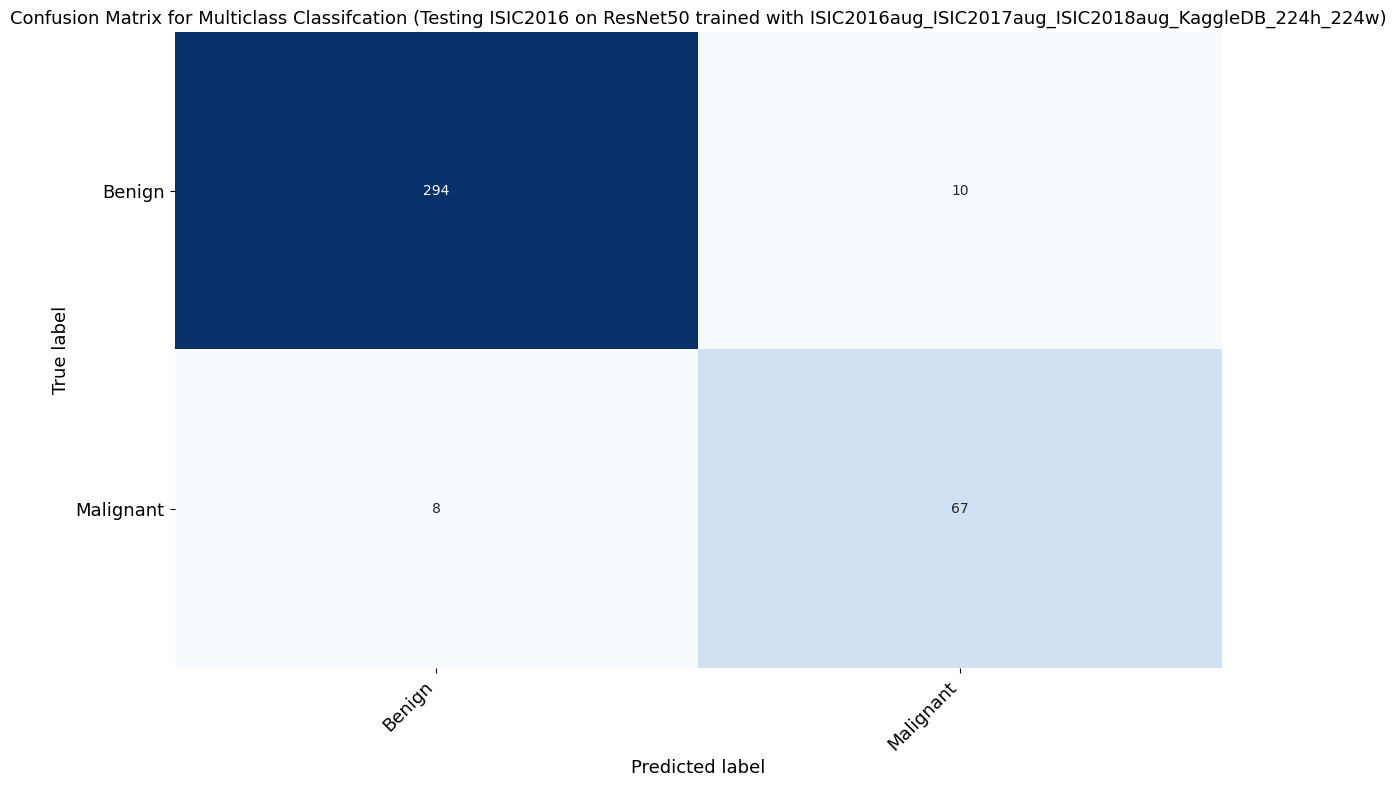

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...



63/63 [==============================] - 2s 23ms/step - loss: 0.0334 - accuracy: 0.9945
Train loss = 0.03340664133429527  ;  Train accuracy = 99.45%

5/5 [==============================] - 0s 21ms/step - loss: 0.7148 - accuracy: 0.7600
Validation loss = 0.7148103713989258  ;  Validation accuracy = 76.00%

19/19 [==============================] - 0s 23ms/step - loss: 0.6116 - accuracy: 0.8300
Test loss = 0.6116286516189575  ;  Test accuracy = 83.00%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1626
   Malignant       0.98      0.99      0.99       374

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted

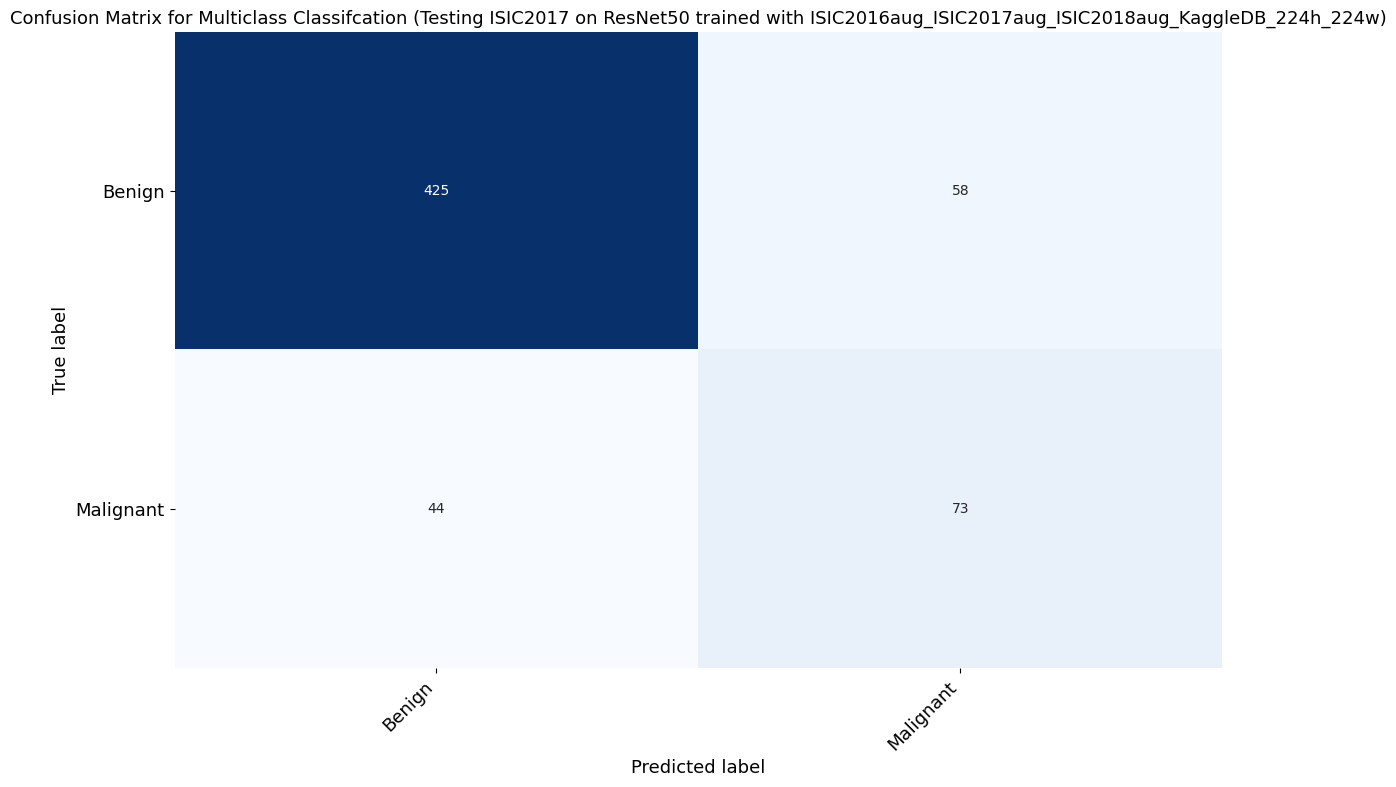

Testing on ISIC2018
Evaluating Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...



313/313 [==============================] - 8s 23ms/step - loss: 0.0595 - accuracy: 0.9834
Train loss = 0.05949770286679268  ;  Train accuracy = 98.34%

7/7 [==============================] - 0s 20ms/step - loss: 0.2215 - accuracy: 0.9171
Validation loss = 0.22148987650871277  ;  Validation accuracy = 91.71%

48/48 [==============================] - 1s 22ms/step - loss: 0.4337 - accuracy: 0.8618
Test loss = 0.4336905777454376  ;  Test accuracy = 86.18%
Computing predictions for Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing ISIC2018 on ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      8902
   Malignant       0.91      0.95      0.93      1113

    accuracy                           0.98     10015
   macro avg       0.95      0.97      0.96     10015
weigh

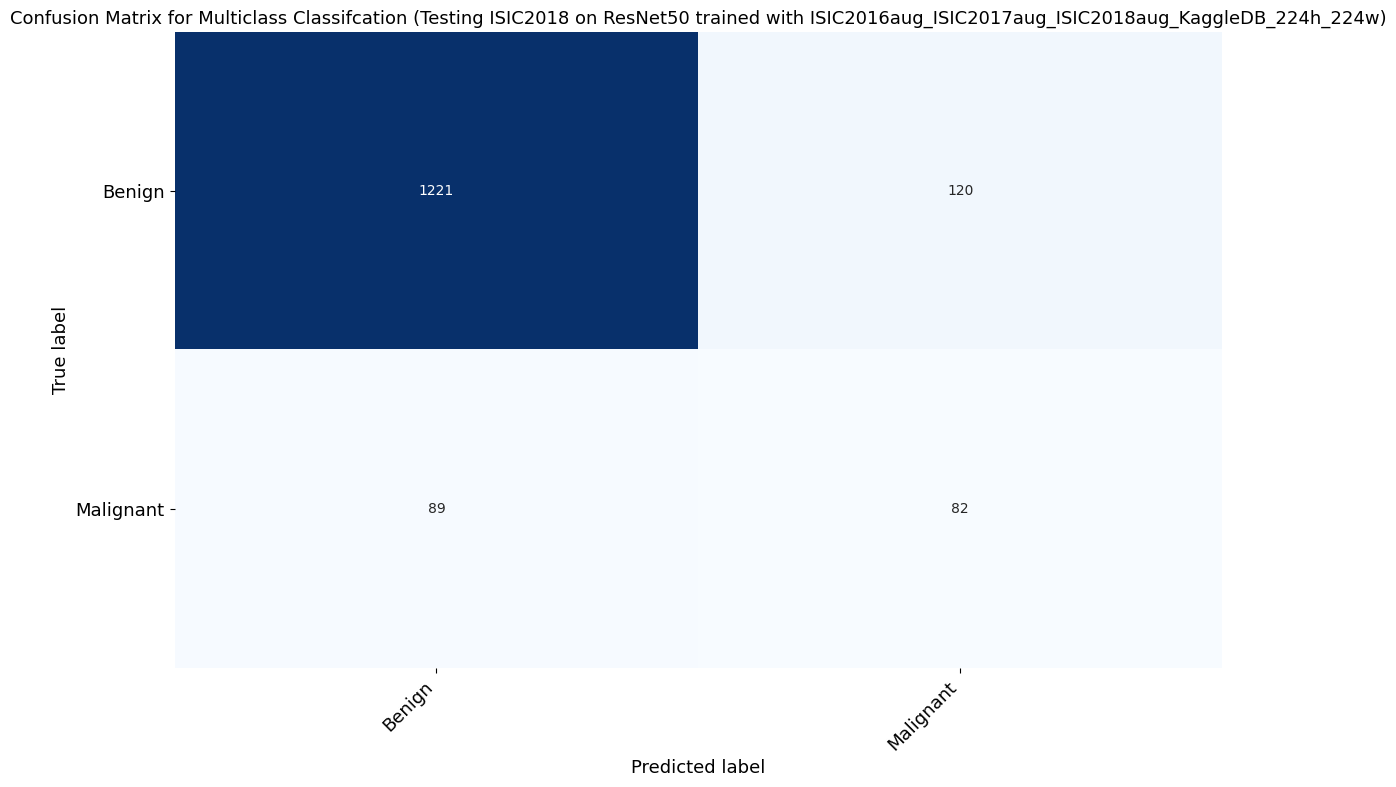

Fitting ResNet50 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model...
Epoch 1/20
838/838 [==============================] - 68s 81ms/step - loss: 0.3534 - accuracy: 0.8594 - val_loss: 0.2502 - val_accuracy: 0.8991


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
838/838 [==============================] - 64s 76ms/step - loss: 0.2787 - accuracy: 0.8786 - val_loss: 0.2295 - val_accuracy: 0.9077
Epoch 3/20
838/838 [==============================] - 64s 76ms/step - loss: 0.2596 - accuracy: 0.8878 - val_loss: 0.2210 - val_accuracy: 0.9131
Epoch 4/20
838/838 [==============================] - 64s 76ms/step - loss: 0.2488 - accuracy: 0.8933 - val_loss: 0.2187 - val_accuracy: 0.9124
Epoch 5/20
838/838 [==============================] - 64s 76ms/step - loss: 0.2335 - accuracy: 0.9004 - val_loss: 0.2066 - val_accuracy: 0.9187
Epoch 6/20
838/838 [==============================] - 64s 77ms/step - loss: 0.2241 - accuracy: 0.9047 - val_loss: 0.2059 - val_accuracy: 0.9191
Epoch 7/20
838/838 [==============================] - 64s 76ms/step - loss: 0.2167 - accuracy: 0.9084 - val_loss: 0.1991 - val_accuracy: 0.9229
Epoch 8/20
838/838 [==============================] - 64s 76ms/step - loss: 0.2029 - accuracy: 0.9134 - val_loss: 0.2025 - val_accuracy:

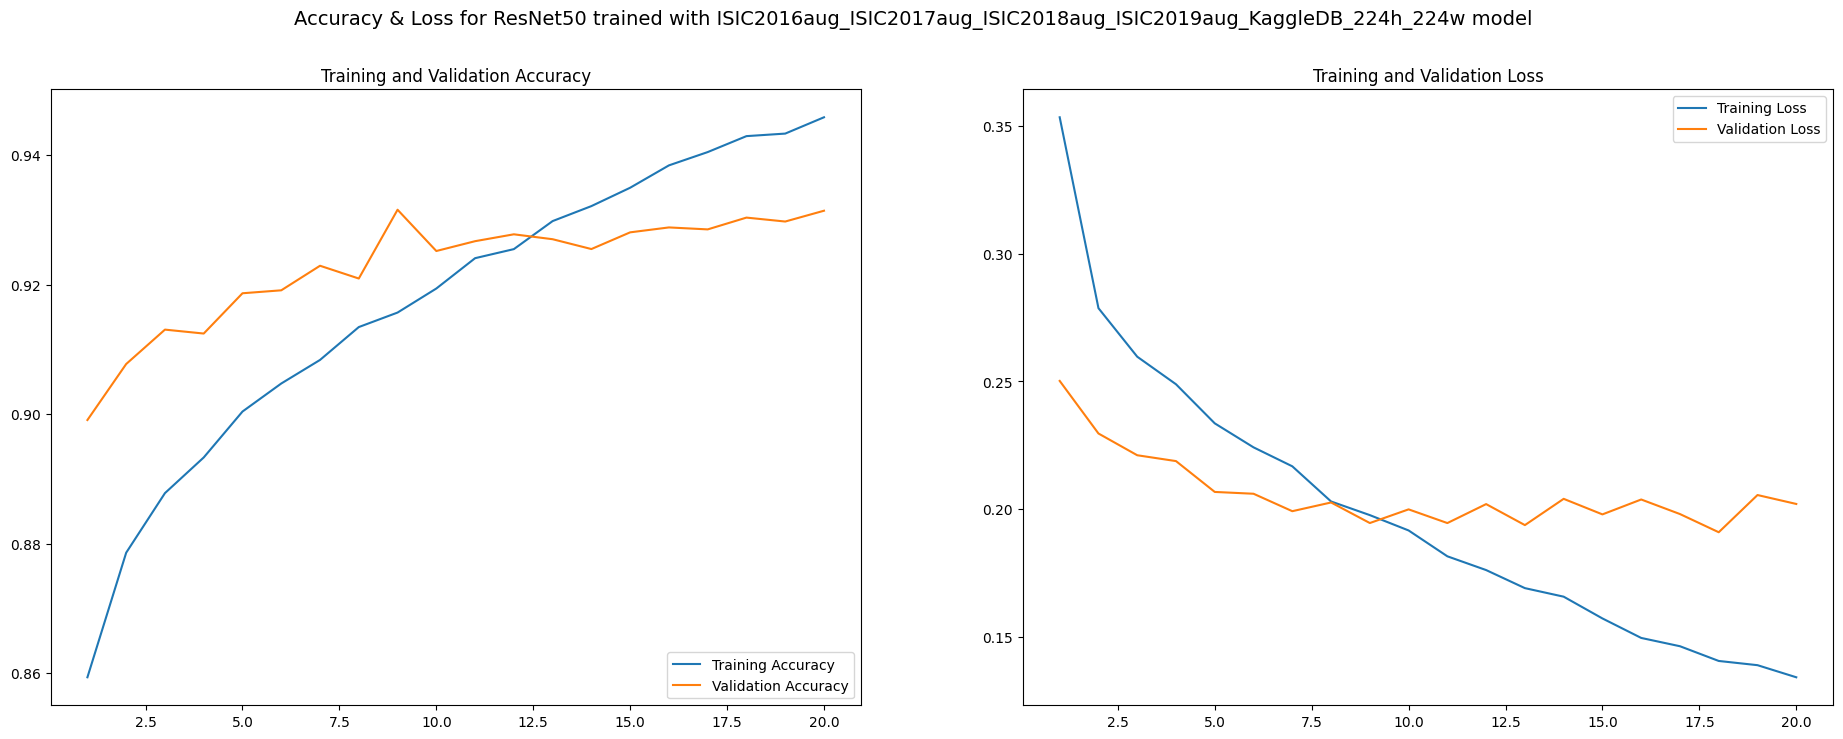

: 

: 

: 

In [9]:
# Training HAM10000 with ResNet50
networkType = mel.NetworkType.ResNet50

img_size = (224, 224)
imgsize = {'img_height':img_size[0], 'img_width':img_size[1]}
CFG.update(imgsize)

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename
model = base_model.myresnet50()

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2018 = dbpath+'/'+f'ISIC2018_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016 with ResNet50

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)


# Training ISIC2017 with ResNet50

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)


# Training ISIC2016aug+ISIC2017aug with ResNet50

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+KaggleDB with ResNet50

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug_KaggleDB with ResNet50

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug+ISIC2019aug+KaggleDB with ResNet50

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)



2024-01-12 11:59:22.145225: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-01-12 11:59:22.333311: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-01-12 11:59:22.333355: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-01-12 11:59:22.377278: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-01-12 11:59:22.377318: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-01-12 11:59:22.398070: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

58892288/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________

2024-01-12 11:59:29.615999: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-01-12 11:59:29.636751: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz
2024-01-12 11:59:30.421622: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-01-12 11:59:31.709874: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-01-12 11:59:33.333236: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-01-12 11:59:33.333260: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-01-12 11:59:33.338383: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modif

  3/125 [..............................] - ETA: 7s - loss: 0.9565 - accuracy: 0.5833 

2024-01-12 11:59:37.635175: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


125/125 [==============================] - 22s 109ms/step - loss: 0.8464 - accuracy: 0.5868 - val_loss: 0.6173 - val_accuracy: 0.7146
Epoch 2/20
125/125 [==============================] - 8s 66ms/step - loss: 0.6527 - accuracy: 0.6773 - val_loss: 0.4091 - val_accuracy: 0.8800
Epoch 3/20
125/125 [==============================] - 8s 65ms/step - loss: 0.5526 - accuracy: 0.7420 - val_loss: 0.3036 - val_accuracy: 0.9241
Epoch 4/20
125/125 [==============================] - 8s 65ms/step - loss: 0.4793 - accuracy: 0.7842 - val_loss: 0.2653 - val_accuracy: 0.9434
Epoch 5/20
125/125 [==============================] - 8s 64ms/step - loss: 0.4198 - accuracy: 0.8223 - val_loss: 0.2288 - val_accuracy: 0.9524
Epoch 6/20
125/125 [==============================] - 8s 65ms/step - loss: 0.3715 - accuracy: 0.8485 - val_loss: 0.1953 - val_accuracy: 0.9536
Epoch 7/20
125/125 [==============================] - 8s 64ms/step - loss: 0.3458 - accuracy: 0.8591 - val_loss: 0.1719 - val_accuracy: 0.9570
Epoch 8/

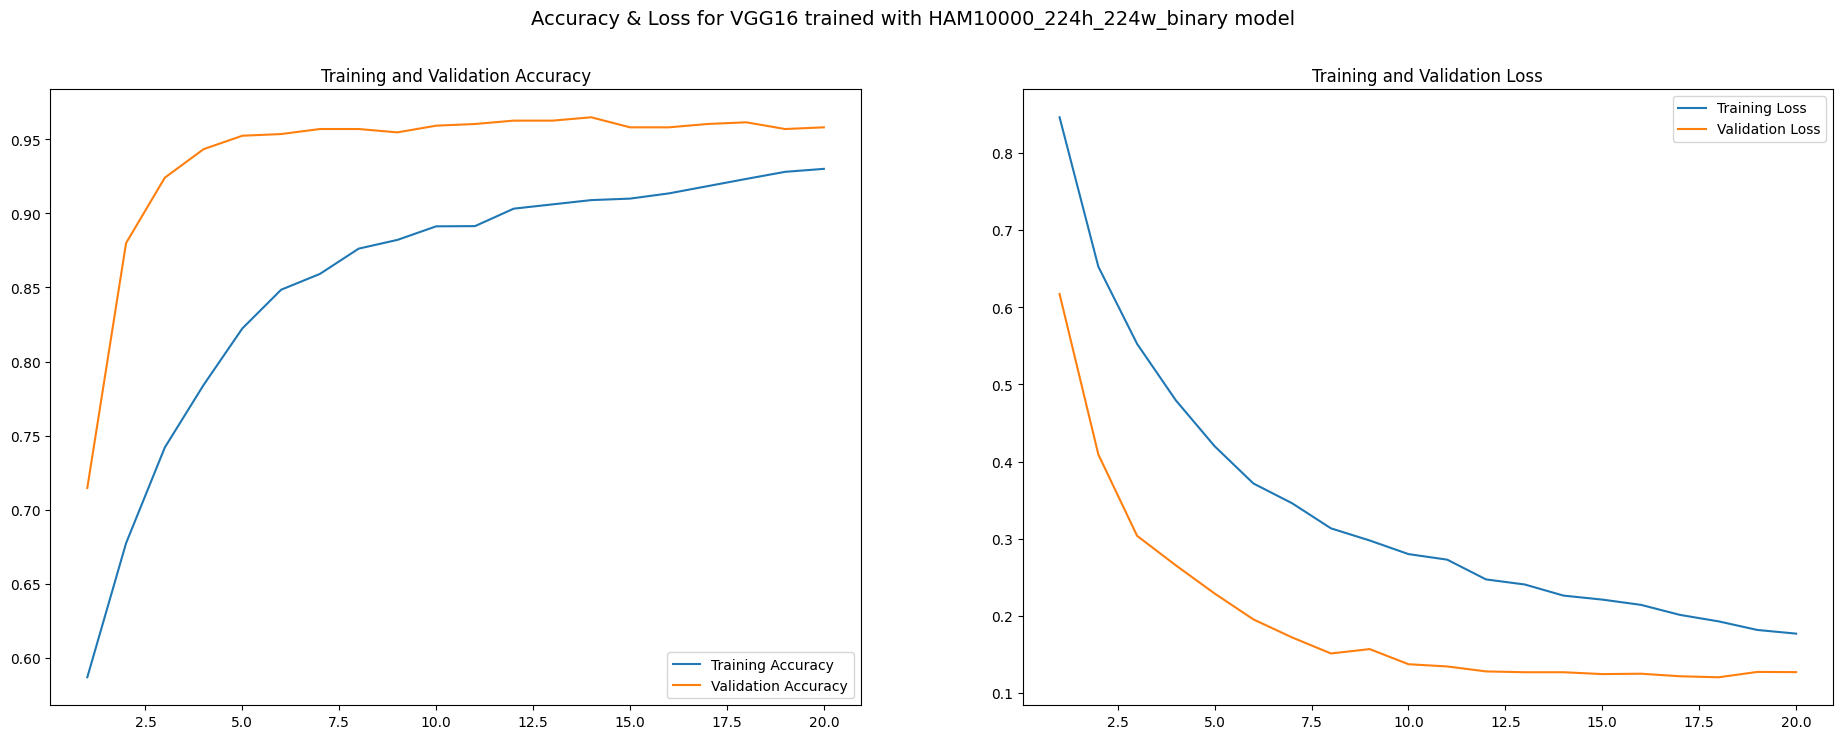

Testing on Kaggle DB
Evaluating Testing Kaggle DB on VGG16 trained with HAM10000_224h_224w_binary model...

52/52 [==============================] - 2s 31ms/step - loss: 1.0503 - accuracy: 0.6707
Train loss = 1.0502995252609253  ;  Train accuracy = 67.07%

32/32 [==============================] - 1s 42ms/step - loss: 1.0424 - accuracy: 0.6530
Validation loss = 1.0424412488937378  ;  Validation accuracy = 65.30%

21/21 [==============================] - 2s 89ms/step - loss: 1.0270 - accuracy: 0.6758
Test loss = 1.026978611946106  ;  Test accuracy = 67.58%
Computing predictions for Testing Kaggle DB on VGG16 trained with HAM10000_224h_224w_binary...
Model report for Testing Kaggle DB on VGG16 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.62      1.00      0.77       893
   Malignant       0.99      0.28      0.43       744

    accuracy                           0.67      1637
   macro avg    

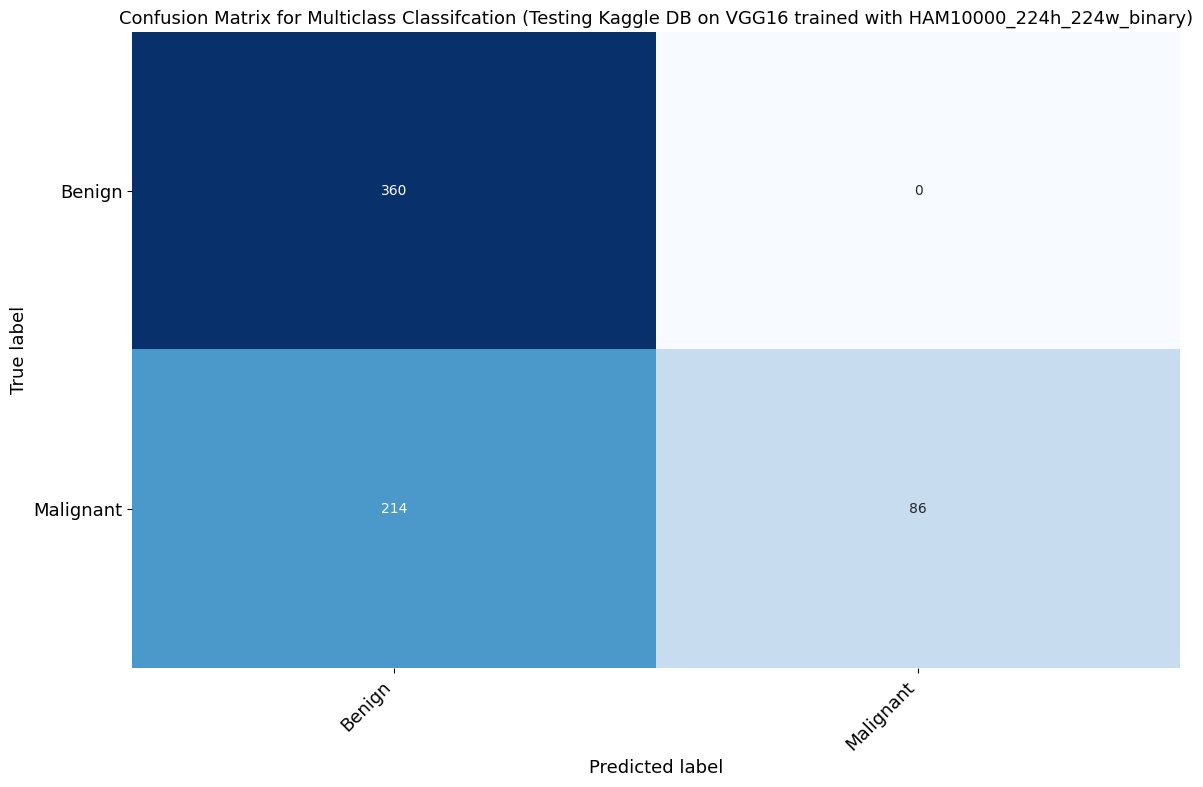

Testing on HAM10000
Evaluating Testing HAM10000 on VGG16 trained with HAM10000_224h_224w_binary model...

251/251 [==============================] - 5s 19ms/step - loss: 0.1243 - accuracy: 0.9516
Train loss = 0.12430821359157562  ;  Train accuracy = 95.16%

28/28 [==============================] - 1s 18ms/step - loss: 0.1202 - accuracy: 0.9615
Validation loss = 0.12021411955356598  ;  Validation accuracy = 96.15%

35/35 [==============================] - 2s 52ms/step - loss: 0.1208 - accuracy: 0.9538
Test loss = 0.12075841426849365  ;  Test accuracy = 95.38%
Computing predictions for Testing HAM10000 on VGG16 trained with HAM10000_224h_224w_binary...
Model report for Testing HAM10000 on VGG16 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97      6994
   Malignant       0.97      0.65      0.77      1035

    accuracy                           0.95      8029
   macro avg  

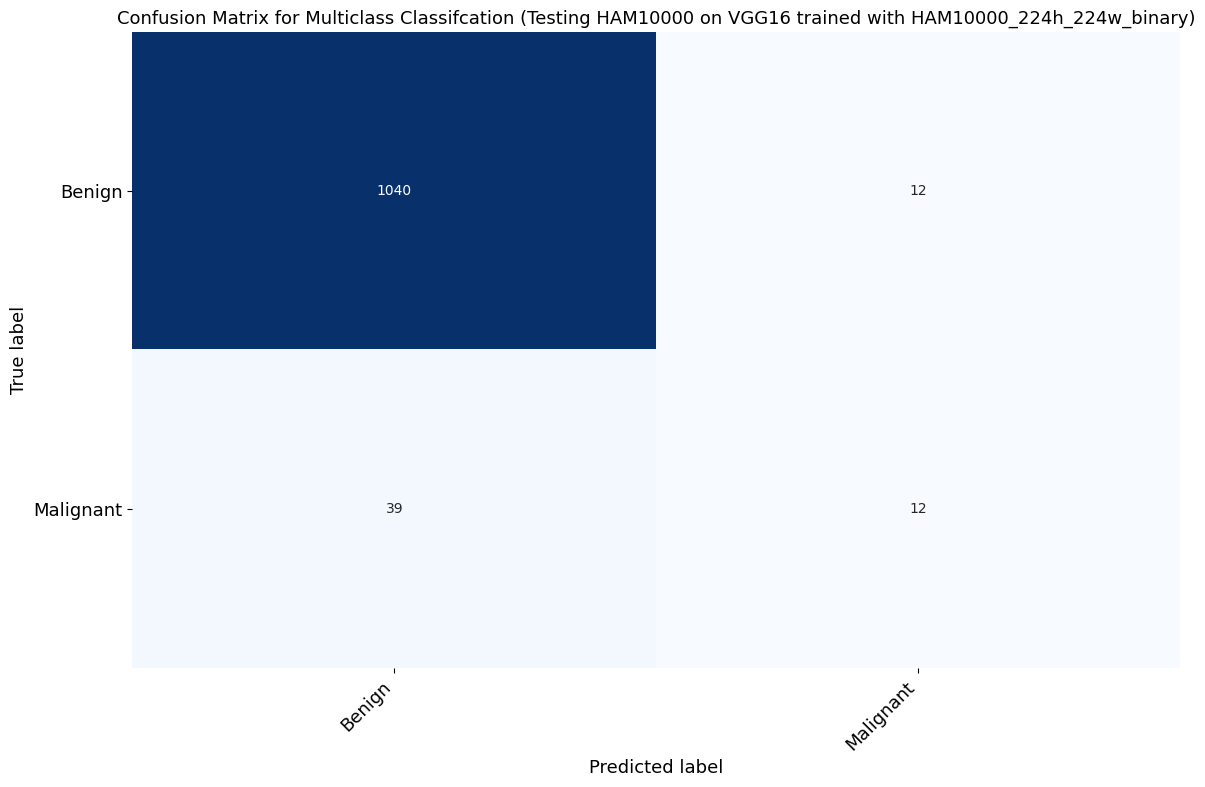

Testing on ISIC2016
Evaluating Testing ISIC2016 on VGG16 trained with HAM10000_224h_224w_binary model...

23/23 [==============================] - 2s 70ms/step - loss: 0.6512 - accuracy: 0.7972
Train loss = 0.6512138843536377  ;  Train accuracy = 79.72%

6/6 [==============================] - 0s 17ms/step - loss: 0.5855 - accuracy: 0.8167
Validation loss = 0.5854725241661072  ;  Validation accuracy = 81.67%

12/12 [==============================] - 2s 163ms/step - loss: 0.5668 - accuracy: 0.8153
Test loss = 0.5668261051177979  ;  Test accuracy = 81.53%
Computing predictions for Testing ISIC2016 on VGG16 trained with HAM10000_224h_224w_binary...
Model report for Testing ISIC2016 on VGG16 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.82      0.96      0.88       583
   Malignant       0.39      0.12      0.18       137

    accuracy                           0.80       720
   macro avg       0

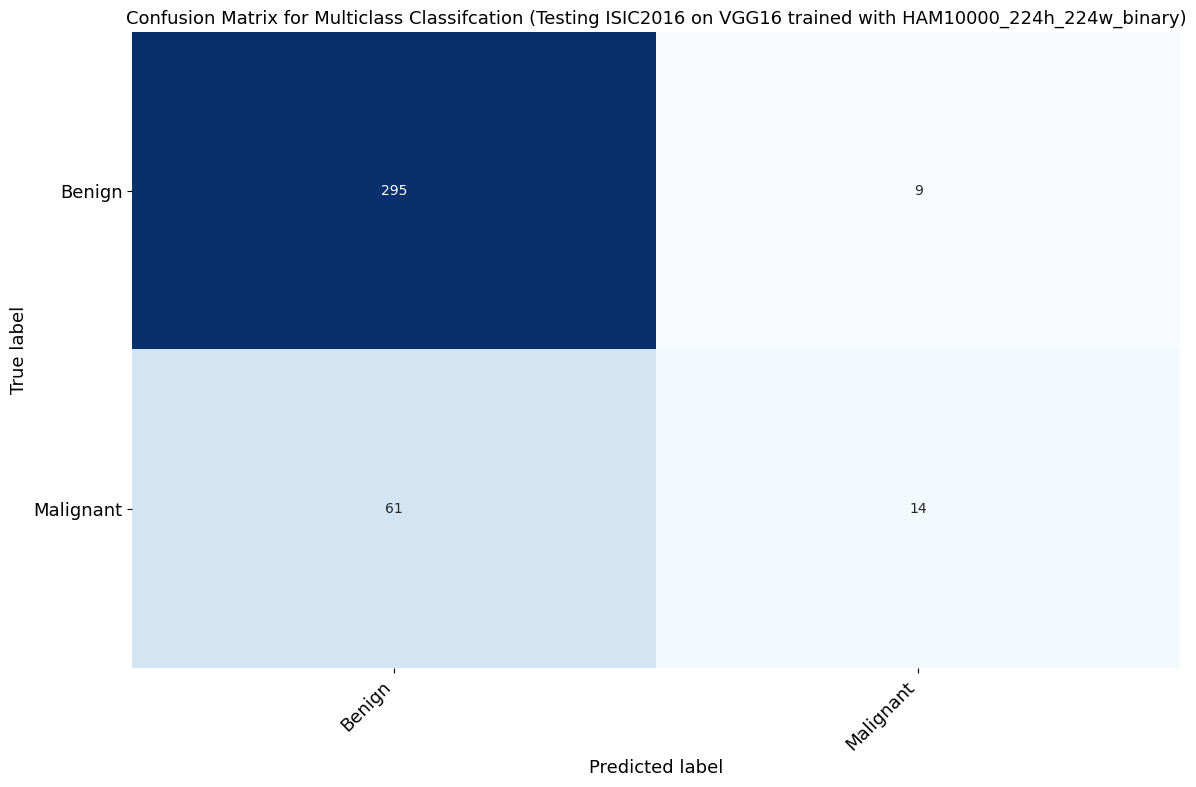

Testing on ISIC2017
Evaluating Testing ISIC2017 on VGG16 trained with HAM10000_224h_224w_binary model...

63/63 [==============================] - 1s 18ms/step - loss: 0.6267 - accuracy: 0.8110
Train loss = 0.6266592741012573  ;  Train accuracy = 81.10%

5/5 [==============================] - 2s 375ms/step - loss: 0.7527 - accuracy: 0.7600
Validation loss = 0.7527217864990234  ;  Validation accuracy = 76.00%

19/19 [==============================] - 2s 102ms/step - loss: 0.7177 - accuracy: 0.8000
Test loss = 0.7176768183708191  ;  Test accuracy = 80.00%
Computing predictions for Testing ISIC2017 on VGG16 trained with HAM10000_224h_224w_binary...
Model report for Testing ISIC2017 on VGG16 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.97      0.89      1626
   Malignant       0.48      0.11      0.18       374

    accuracy                           0.81      2000
   macro avg       

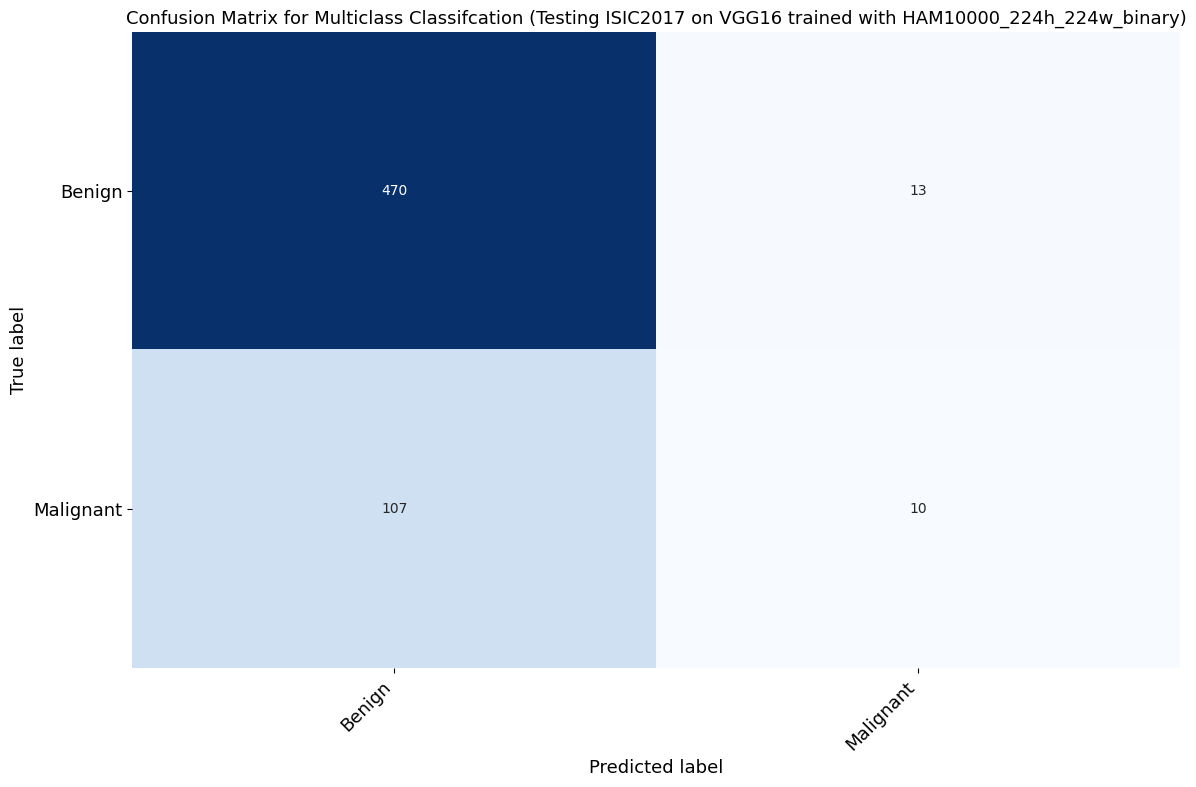

Testing on ISIC2018
Evaluating Testing ISIC2018 on VGG16 trained with HAM10000_224h_224w_binary model...

313/313 [==============================] - 8s 24ms/step - loss: 0.1236 - accuracy: 0.9527
Train loss = 0.12355630099773407  ;  Train accuracy = 95.27%

7/7 [==============================] - 1s 92ms/step - loss: 0.2119 - accuracy: 0.9067
Validation loss = 0.21187222003936768  ;  Validation accuracy = 90.67%

48/48 [==============================] - 1s 18ms/step - loss: 0.3096 - accuracy: 0.8922
Test loss = 0.30964183807373047  ;  Test accuracy = 89.22%
Computing predictions for Testing ISIC2018 on VGG16 trained with HAM10000_224h_224w_binary...
Model report for Testing ISIC2018 on VGG16 trained with HAM10000_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97      8902
   Malignant       0.94      0.61      0.74      1113

    accuracy                           0.95     10015
   macro avg    

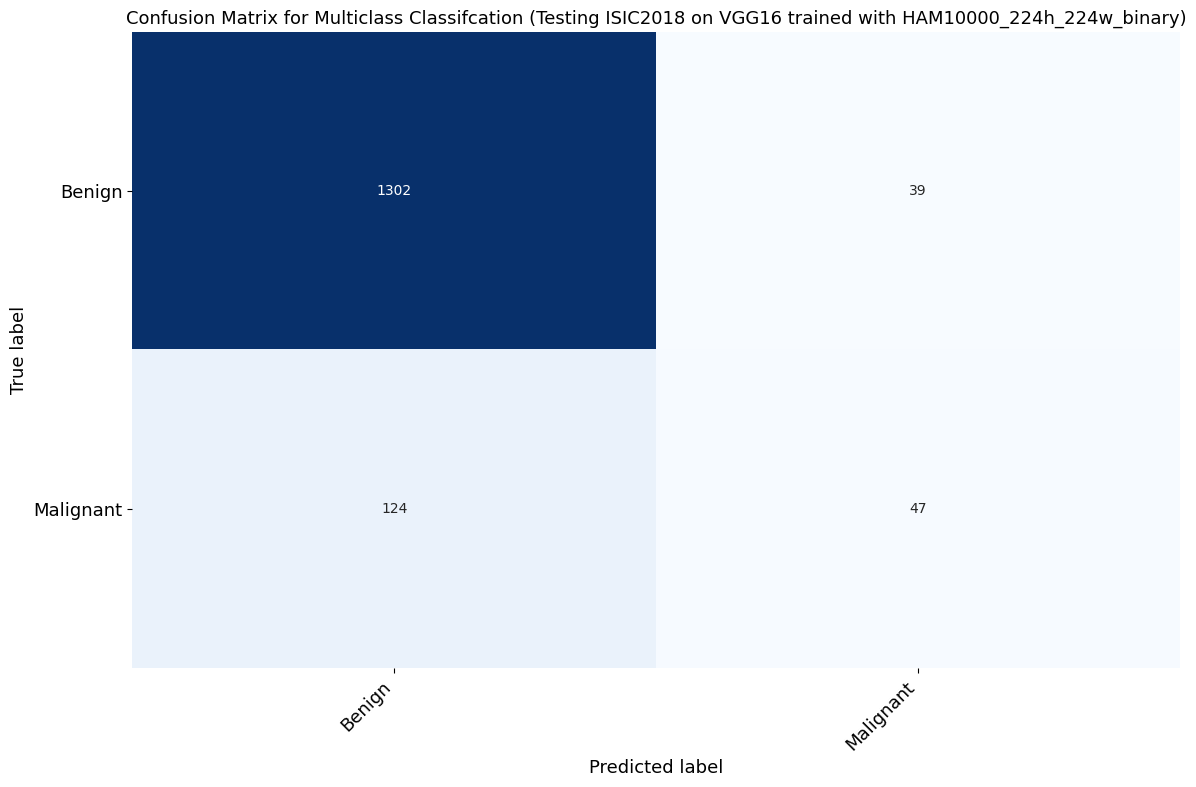

Fitting VGG16 trained with ISIC2016_224h_224w_binary model...
Epoch 1/20
11/11 [==============================] - 1s 70ms/step - loss: 0.6433 - accuracy: 0.7927 - val_loss: 0.5836 - val_accuracy: 0.8056
Epoch 2/20
11/11 [==============================] - 1s 64ms/step - loss: 0.5554 - accuracy: 0.8216 - val_loss: 0.5888 - val_accuracy: 0.8167
Epoch 3/20
11/11 [==============================] - 1s 71ms/step - loss: 0.4395 - accuracy: 0.8201 - val_loss: 0.6128 - val_accuracy: 0.8222
Epoch 4/20
11/11 [==============================] - 1s 69ms/step - loss: 0.4229 - accuracy: 0.8277 - val_loss: 0.5804 - val_accuracy: 0.8111
Epoch 5/20
11/11 [==============================] - 1s 64ms/step - loss: 0.3427 - accuracy: 0.8537 - val_loss: 0.5550 - val_accuracy: 0.8167
Epoch 6/20
11/11 [==============================] - 1s 69ms/step - loss: 0.3158 - accuracy: 0.8613 - val_loss: 0.5357 - val_accuracy: 0.8167
Epoch 7/20
11/11 [==============================] - 1s 71ms/step - loss: 0.2940 - accuracy: 

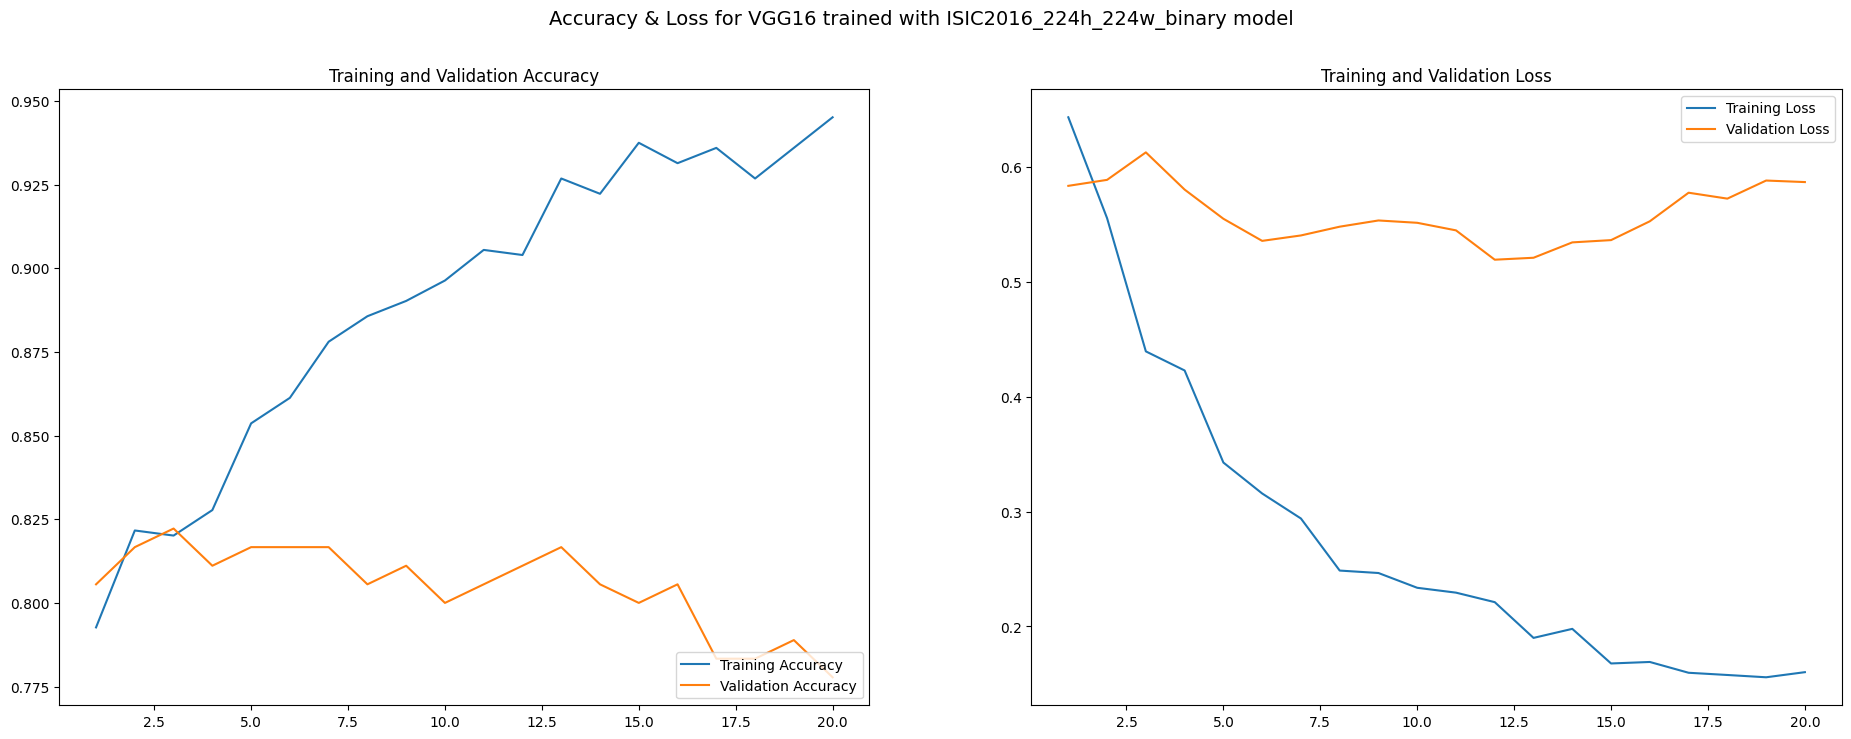

Testing on Kaggle DB
Evaluating Testing Kaggle DB on VGG16 trained with ISIC2016_224h_224w_binary model...

52/52 [==============================] - 1s 20ms/step - loss: 0.8396 - accuracy: 0.6885
Train loss = 0.8396439552307129  ;  Train accuracy = 68.85%

32/32 [==============================] - 1s 19ms/step - loss: 0.9008 - accuracy: 0.6720
Validation loss = 0.9008283615112305  ;  Validation accuracy = 67.20%

21/21 [==============================] - 0s 18ms/step - loss: 0.8834 - accuracy: 0.6833
Test loss = 0.8834149241447449  ;  Test accuracy = 68.33%
Computing predictions for Testing Kaggle DB on VGG16 trained with ISIC2016_224h_224w_binary...
Model report for Testing Kaggle DB on VGG16 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.64      0.99      0.78       893
   Malignant       0.95      0.33      0.49       744

    accuracy                           0.69      1637
   macro avg   

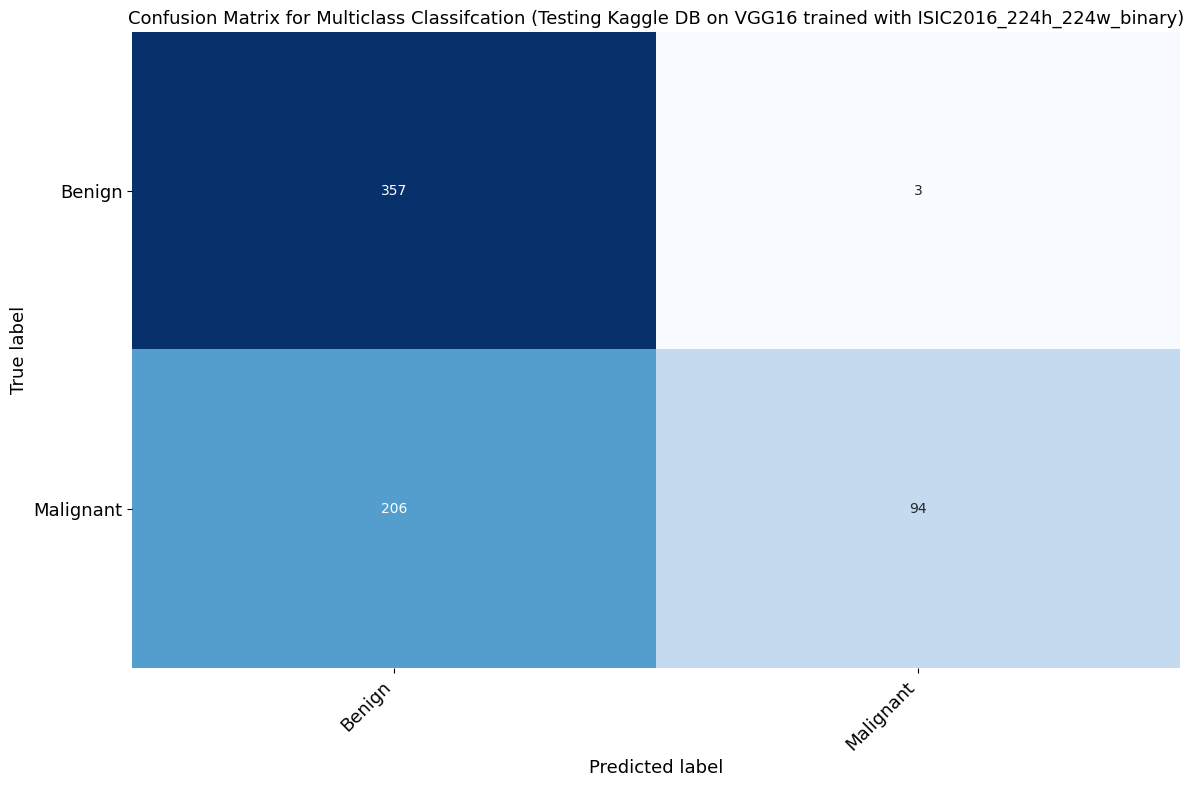

Testing on HAM10000
Evaluating Testing HAM10000 on VGG16 trained with ISIC2016_224h_224w_binary model...

251/251 [==============================] - 5s 19ms/step - loss: 0.1912 - accuracy: 0.9228
Train loss = 0.19121399521827698  ;  Train accuracy = 92.28%

28/28 [==============================] - 1s 18ms/step - loss: 0.1392 - accuracy: 0.9524
Validation loss = 0.13923974335193634  ;  Validation accuracy = 95.24%

35/35 [==============================] - 1s 18ms/step - loss: 0.1606 - accuracy: 0.9420
Test loss = 0.1606374830007553  ;  Test accuracy = 94.20%
Computing predictions for Testing HAM10000 on VGG16 trained with ISIC2016_224h_224w_binary...
Model report for Testing HAM10000 on VGG16 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.94      0.98      0.96      6994
   Malignant       0.78      0.56      0.65      1035

    accuracy                           0.92      8029
   macro avg   

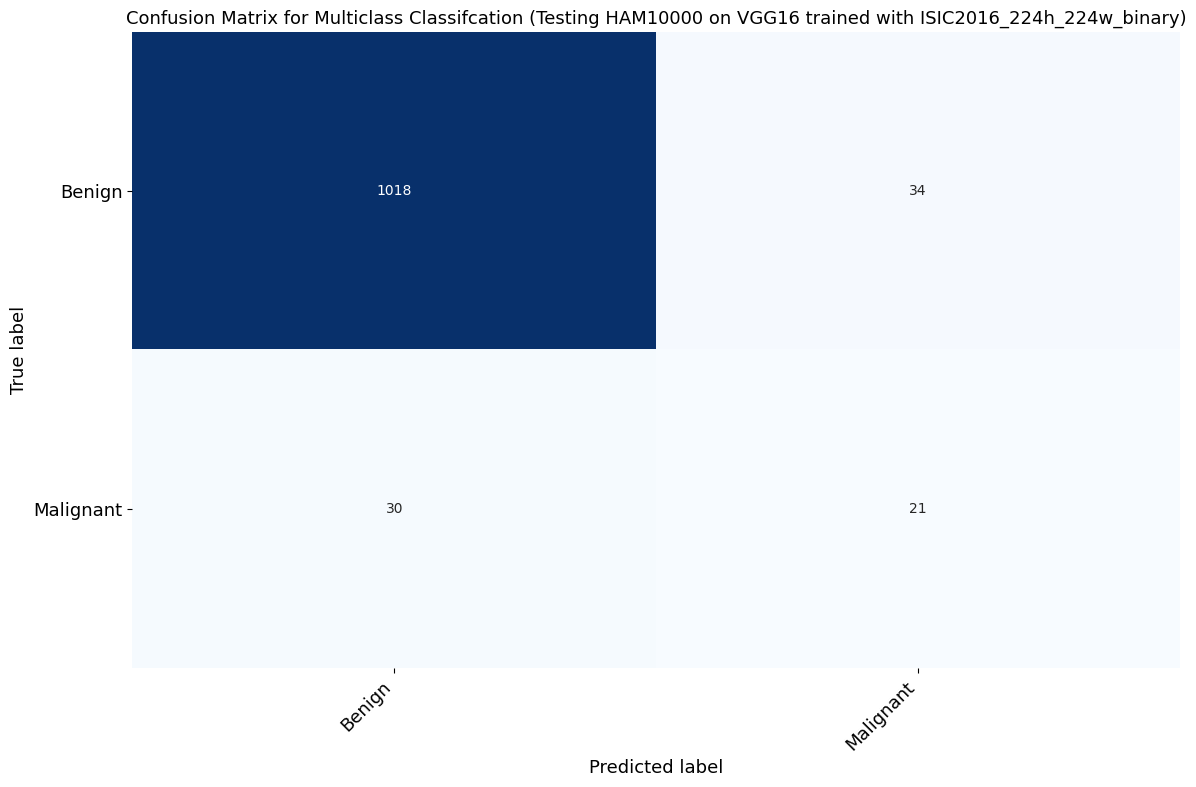

Testing on ISIC2016
Evaluating Testing ISIC2016 on VGG16 trained with ISIC2016_224h_224w_binary model...

23/23 [==============================] - 1s 18ms/step - loss: 0.1729 - accuracy: 0.9194
Train loss = 0.1728856861591339  ;  Train accuracy = 91.94%

6/6 [==============================] - 0s 17ms/step - loss: 0.5193 - accuracy: 0.8111
Validation loss = 0.5193212628364563  ;  Validation accuracy = 81.11%

12/12 [==============================] - 0s 18ms/step - loss: 0.4891 - accuracy: 0.8285
Test loss = 0.4890848994255066  ;  Test accuracy = 82.85%
Computing predictions for Testing ISIC2016 on VGG16 trained with ISIC2016_224h_224w_binary...
Model report for Testing ISIC2016 on VGG16 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.91      1.00      0.95       583
   Malignant       1.00      0.58      0.73       137

    accuracy                           0.92       720
   macro avg       0.

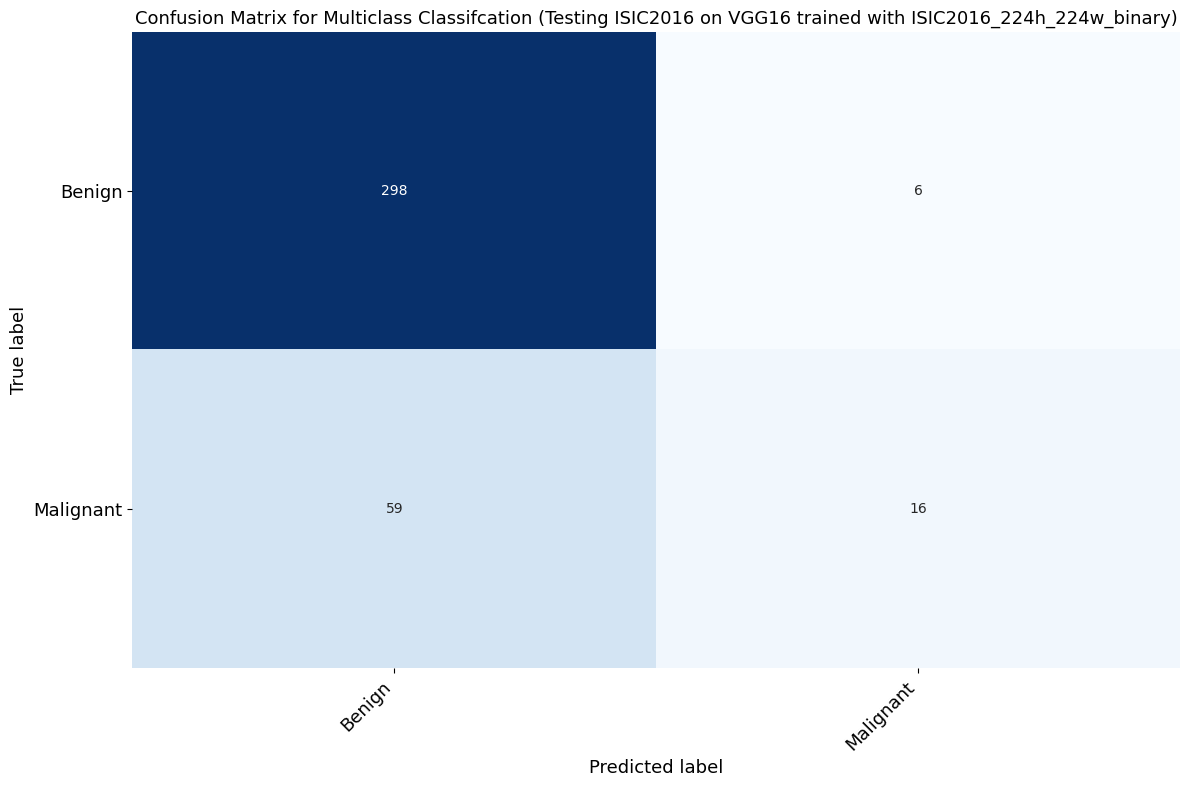

Testing on ISIC2017
Evaluating Testing ISIC2017 on VGG16 trained with ISIC2016_224h_224w_binary model...

63/63 [==============================] - 1s 18ms/step - loss: 0.4509 - accuracy: 0.8525
Train loss = 0.45090585947036743  ;  Train accuracy = 85.25%

5/5 [==============================] - 0s 17ms/step - loss: 0.5294 - accuracy: 0.8067
Validation loss = 0.5293546319007874  ;  Validation accuracy = 80.67%

19/19 [==============================] - 0s 18ms/step - loss: 0.7128 - accuracy: 0.7950
Test loss = 0.712806224822998  ;  Test accuracy = 79.50%
Computing predictions for Testing ISIC2017 on VGG16 trained with ISIC2016_224h_224w_binary...
Model report for Testing ISIC2017 on VGG16 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.85      0.99      0.92      1626
   Malignant       0.82      0.27      0.41       374

    accuracy                           0.85      2000
   macro avg       0.

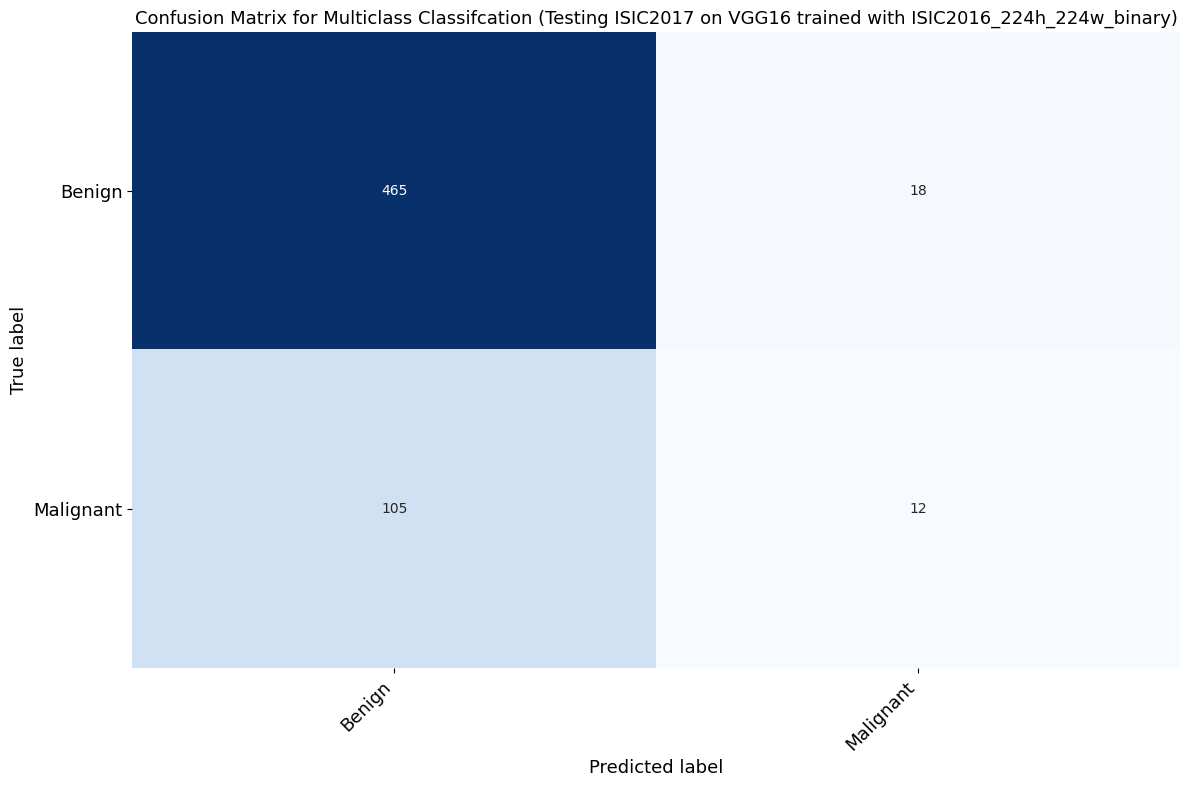

Testing on ISIC2018
Evaluating Testing ISIC2018 on VGG16 trained with ISIC2016_224h_224w_binary model...

313/313 [==============================] - 6s 19ms/step - loss: 0.1833 - accuracy: 0.9275
Train loss = 0.18326407670974731  ;  Train accuracy = 92.75%

7/7 [==============================] - 0s 16ms/step - loss: 0.2789 - accuracy: 0.8808
Validation loss = 0.27892738580703735  ;  Validation accuracy = 88.08%

48/48 [==============================] - 1s 18ms/step - loss: 0.3544 - accuracy: 0.8644
Test loss = 0.3544001877307892  ;  Test accuracy = 86.44%
Computing predictions for Testing ISIC2018 on VGG16 trained with ISIC2016_224h_224w_binary...
Model report for Testing ISIC2018 on VGG16 trained with ISIC2016_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.94      0.98      0.96      8902
   Malignant       0.74      0.54      0.62      1113

    accuracy                           0.93     10015
   macro avg     

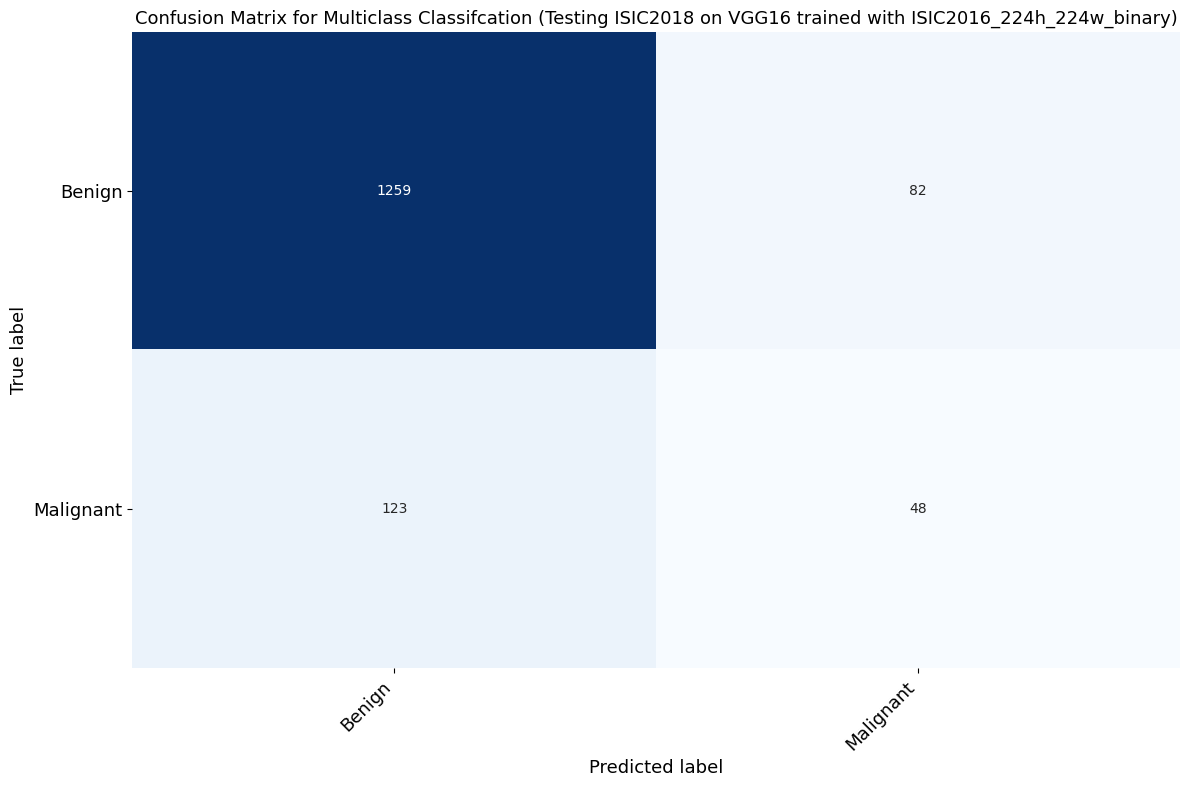

Fitting VGG16 trained with ISIC2017_224h_224w_binary model...
Epoch 1/20
31/31 [==============================] - 2s 51ms/step - loss: 0.4526 - accuracy: 0.8497 - val_loss: 0.4585 - val_accuracy: 0.8067
Epoch 2/20
31/31 [==============================] - 2s 54ms/step - loss: 0.4024 - accuracy: 0.8409 - val_loss: 0.4498 - val_accuracy: 0.8133
Epoch 3/20
31/31 [==============================] - 2s 50ms/step - loss: 0.3369 - accuracy: 0.8626 - val_loss: 0.4534 - val_accuracy: 0.8133
Epoch 4/20
31/31 [==============================] - 2s 51ms/step - loss: 0.2944 - accuracy: 0.8796 - val_loss: 0.4770 - val_accuracy: 0.8200
Epoch 5/20
31/31 [==============================] - 2s 49ms/step - loss: 0.2778 - accuracy: 0.8853 - val_loss: 0.4482 - val_accuracy: 0.8200
Epoch 6/20
31/31 [==============================] - 2s 49ms/step - loss: 0.2648 - accuracy: 0.8895 - val_loss: 0.4660 - val_accuracy: 0.8133
Epoch 7/20
31/31 [==============================] - 2s 51ms/step - loss: 0.2553 - accuracy: 

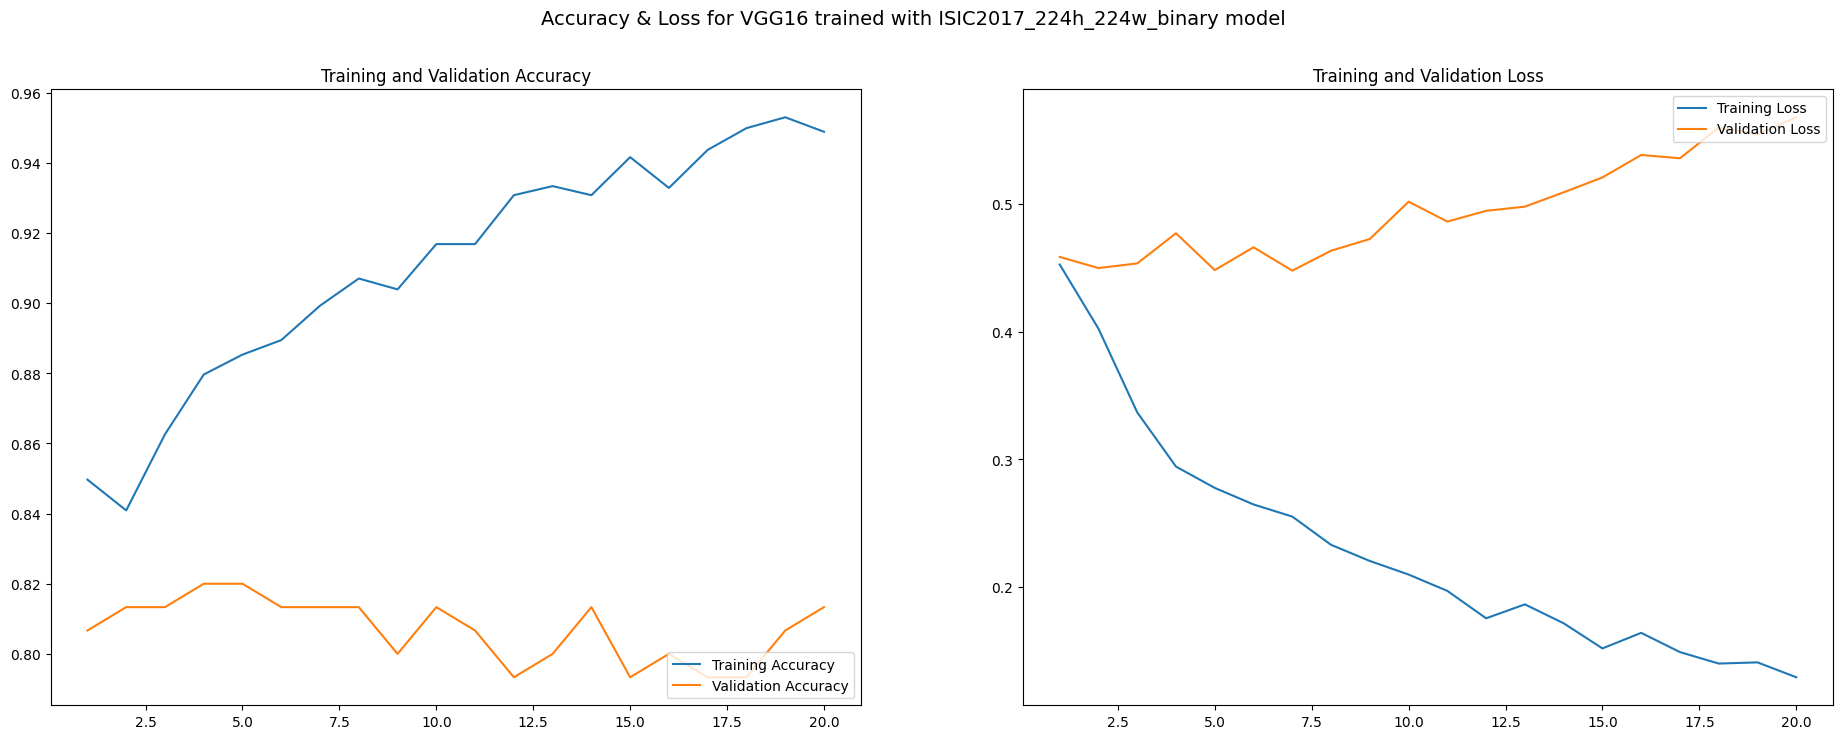

Testing on Kaggle DB
Evaluating Testing Kaggle DB on VGG16 trained with ISIC2017_224h_224w_binary model...

52/52 [==============================] - 1s 19ms/step - loss: 0.6762 - accuracy: 0.7318
Train loss = 0.6762092709541321  ;  Train accuracy = 73.18%

32/32 [==============================] - 1s 18ms/step - loss: 0.7386 - accuracy: 0.7040
Validation loss = 0.7386260628700256  ;  Validation accuracy = 70.40%

21/21 [==============================] - 0s 18ms/step - loss: 0.7090 - accuracy: 0.7121
Test loss = 0.7089636921882629  ;  Test accuracy = 71.21%
Computing predictions for Testing Kaggle DB on VGG16 trained with ISIC2017_224h_224w_binary...
Model report for Testing Kaggle DB on VGG16 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.68      0.97      0.80       893
   Malignant       0.92      0.45      0.60       744

    accuracy                           0.73      1637
   macro avg   

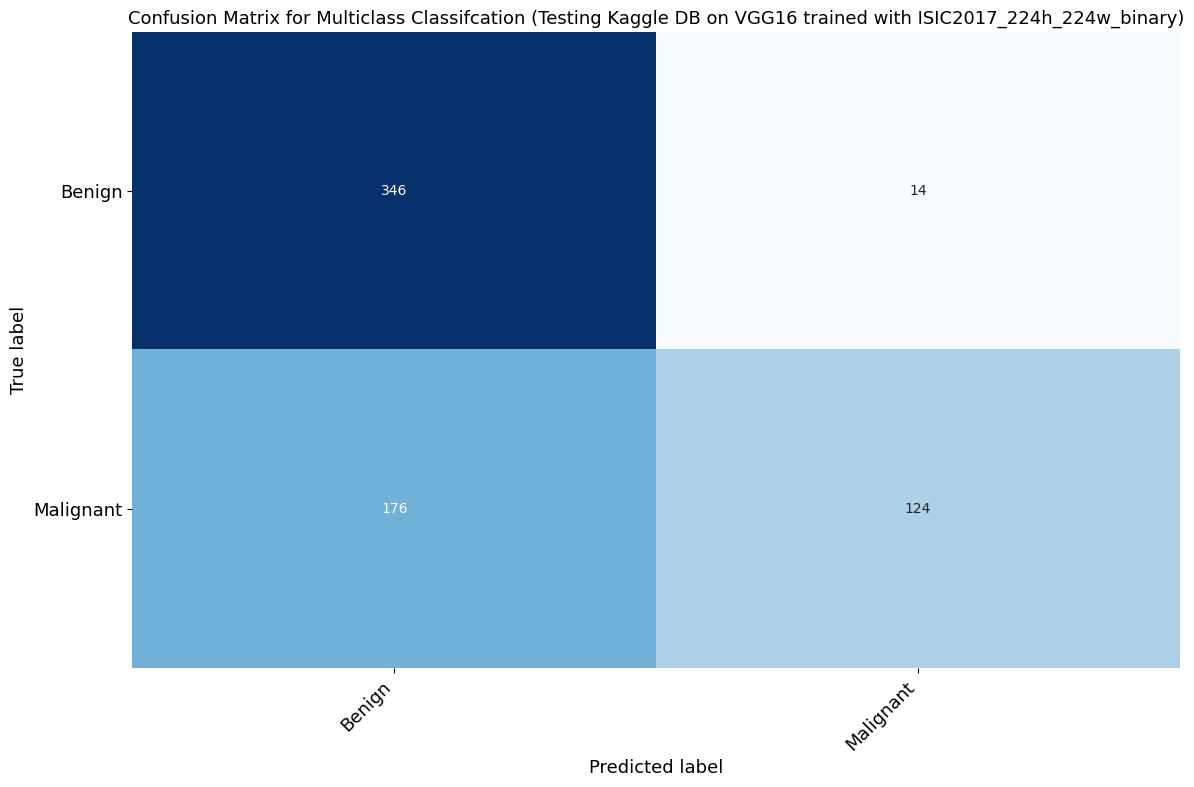

Testing on HAM10000
Evaluating Testing HAM10000 on VGG16 trained with ISIC2017_224h_224w_binary model...

251/251 [==============================] - 5s 18ms/step - loss: 0.2577 - accuracy: 0.8938
Train loss = 0.25770342350006104  ;  Train accuracy = 89.38%

28/28 [==============================] - 1s 18ms/step - loss: 0.2043 - accuracy: 0.9196
Validation loss = 0.20434090495109558  ;  Validation accuracy = 91.96%

35/35 [==============================] - 1s 19ms/step - loss: 0.1915 - accuracy: 0.9257
Test loss = 0.19148924946784973  ;  Test accuracy = 92.57%
Computing predictions for Testing HAM10000 on VGG16 trained with ISIC2017_224h_224w_binary...
Model report for Testing HAM10000 on VGG16 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.94      0.94      0.94      6994
   Malignant       0.59      0.57      0.58      1035

    accuracy                           0.89      8029
   macro avg  

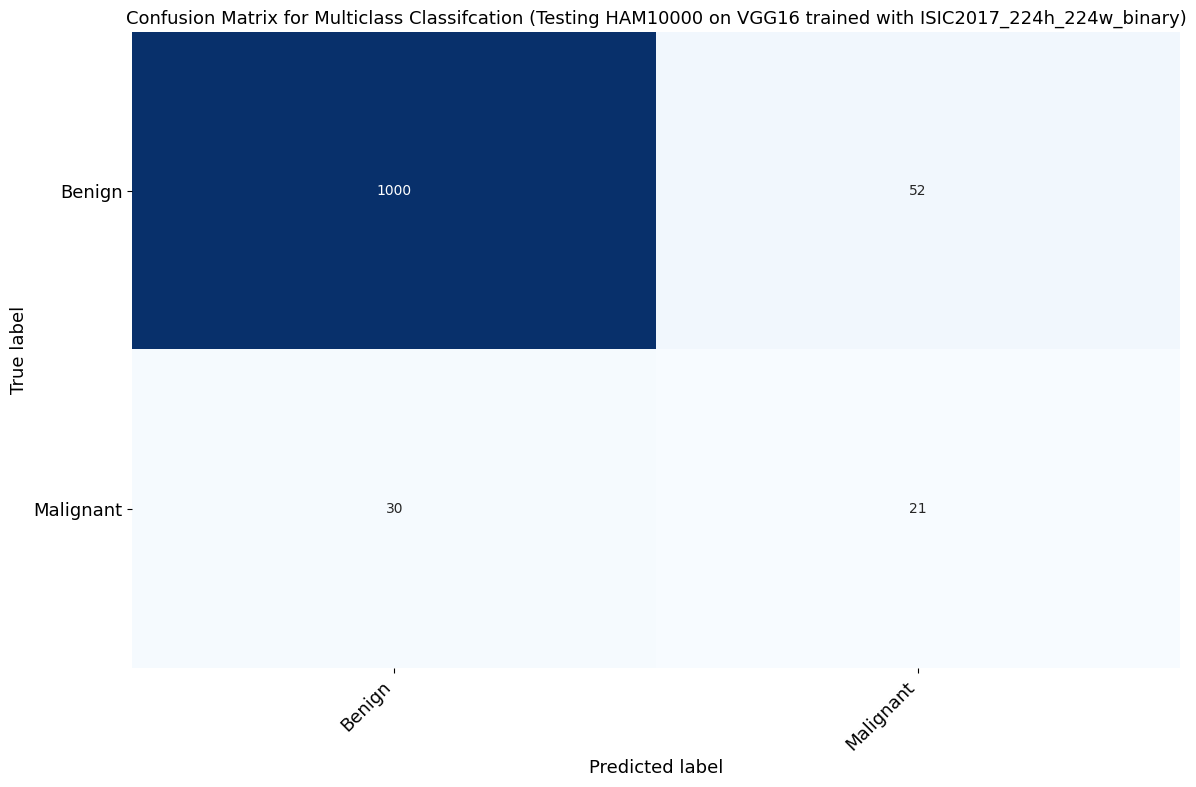

Testing on ISIC2016
Evaluating Testing ISIC2016 on VGG16 trained with ISIC2017_224h_224w_binary model...

23/23 [==============================] - 1s 18ms/step - loss: 0.1046 - accuracy: 0.9694
Train loss = 0.10463172942399979  ;  Train accuracy = 96.94%

6/6 [==============================] - 0s 17ms/step - loss: 0.2509 - accuracy: 0.8944
Validation loss = 0.25085368752479553  ;  Validation accuracy = 89.44%

12/12 [==============================] - 0s 18ms/step - loss: 0.2265 - accuracy: 0.9129
Test loss = 0.22650180757045746  ;  Test accuracy = 91.29%
Computing predictions for Testing ISIC2016 on VGG16 trained with ISIC2017_224h_224w_binary...
Model report for Testing ISIC2016 on VGG16 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       583
   Malignant       0.98      0.86      0.91       137

    accuracy                           0.97       720
   macro avg      

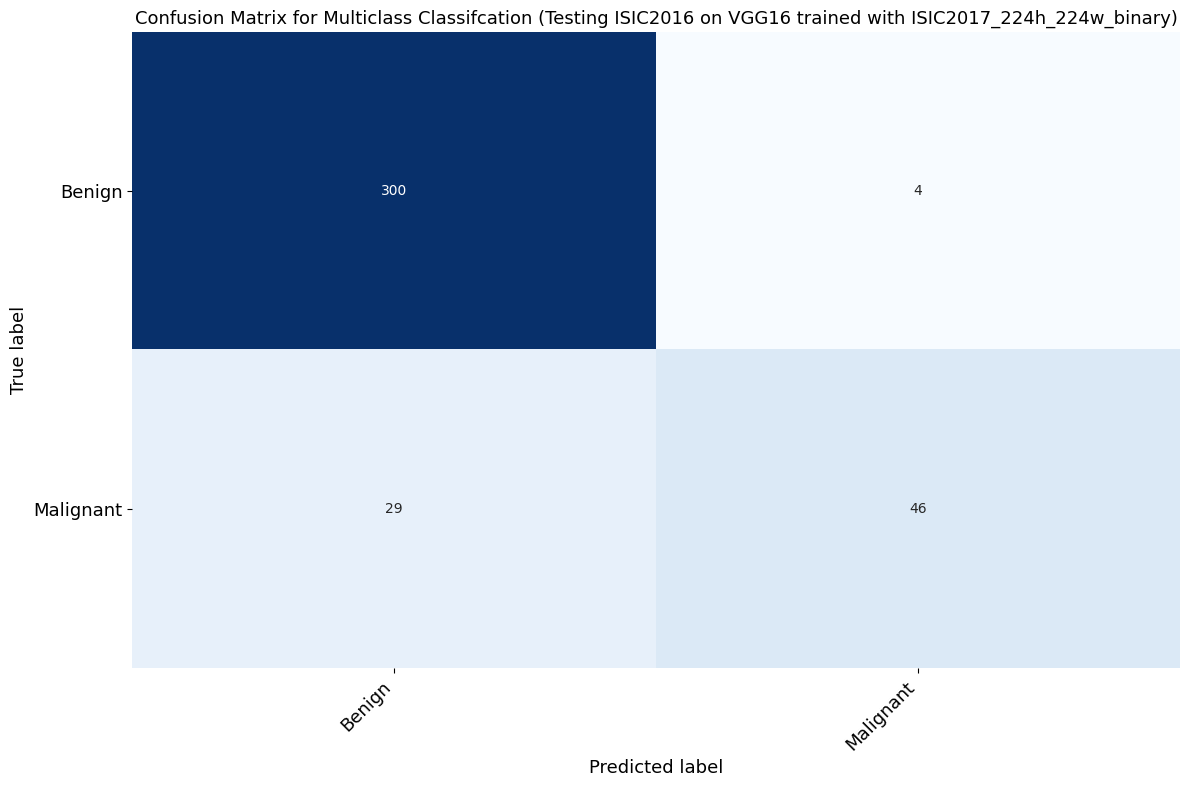

Testing on ISIC2017
Evaluating Testing ISIC2017 on VGG16 trained with ISIC2017_224h_224w_binary model...

63/63 [==============================] - 1s 21ms/step - loss: 0.1730 - accuracy: 0.9255
Train loss = 0.17303185164928436  ;  Train accuracy = 92.55%

5/5 [==============================] - 0s 17ms/step - loss: 0.4478 - accuracy: 0.8133
Validation loss = 0.44775527715682983  ;  Validation accuracy = 81.33%

19/19 [==============================] - 0s 18ms/step - loss: 0.6079 - accuracy: 0.7817
Test loss = 0.6078761219978333  ;  Test accuracy = 78.17%
Computing predictions for Testing ISIC2017 on VGG16 trained with ISIC2017_224h_224w_binary...
Model report for Testing ISIC2017 on VGG16 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.92      0.99      0.96      1626
   Malignant       0.95      0.63      0.76       374

    accuracy                           0.93      2000
   macro avg       

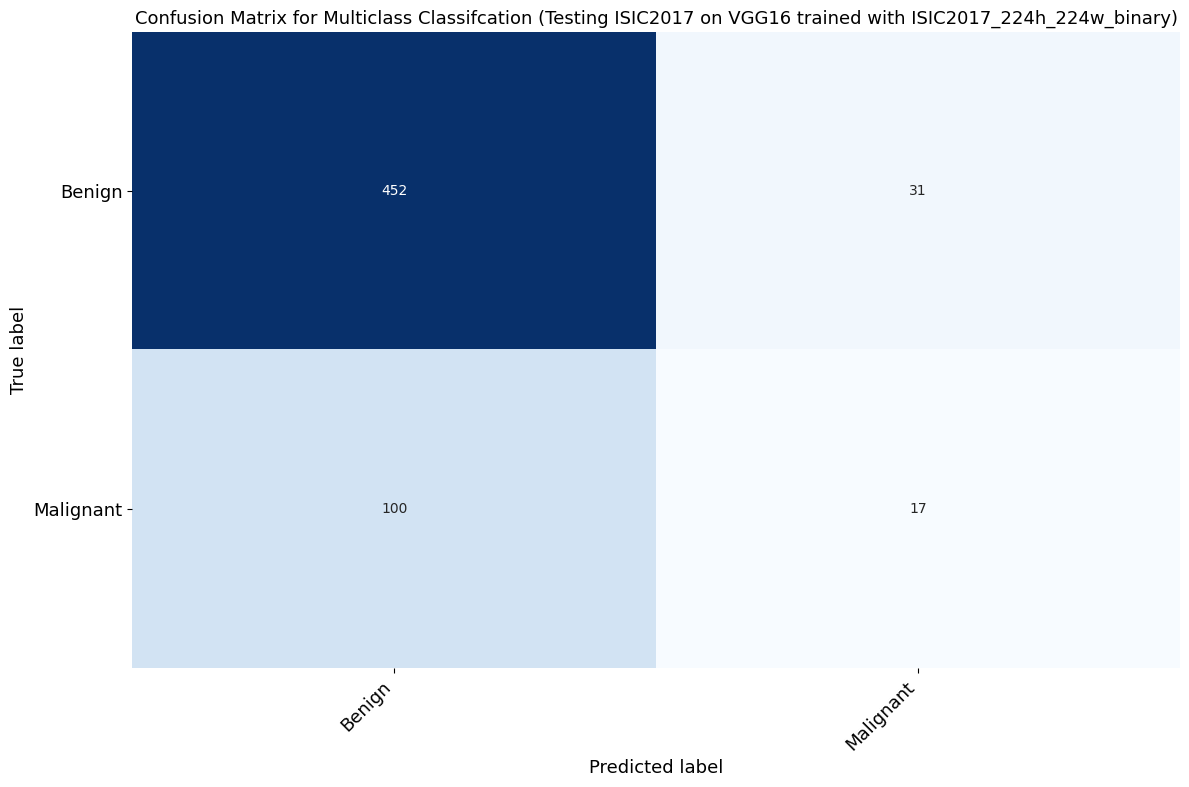

Testing on ISIC2018
Evaluating Testing ISIC2018 on VGG16 trained with ISIC2017_224h_224w_binary model...

313/313 [==============================] - 6s 19ms/step - loss: 0.2457 - accuracy: 0.8996
Train loss = 0.24570609629154205  ;  Train accuracy = 89.96%

7/7 [==============================] - 0s 16ms/step - loss: 0.3084 - accuracy: 0.8653
Validation loss = 0.30840110778808594  ;  Validation accuracy = 86.53%

48/48 [==============================] - 1s 18ms/step - loss: 0.4147 - accuracy: 0.8525
Test loss = 0.41473403573036194  ;  Test accuracy = 85.25%
Computing predictions for Testing ISIC2018 on VGG16 trained with ISIC2017_224h_224w_binary...
Model report for Testing ISIC2018 on VGG16 trained with ISIC2017_224h_224w_binary model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.94      0.94      0.94      8902
   Malignant       0.55      0.55      0.55      1113

    accuracy                           0.90     10015
   macro avg    

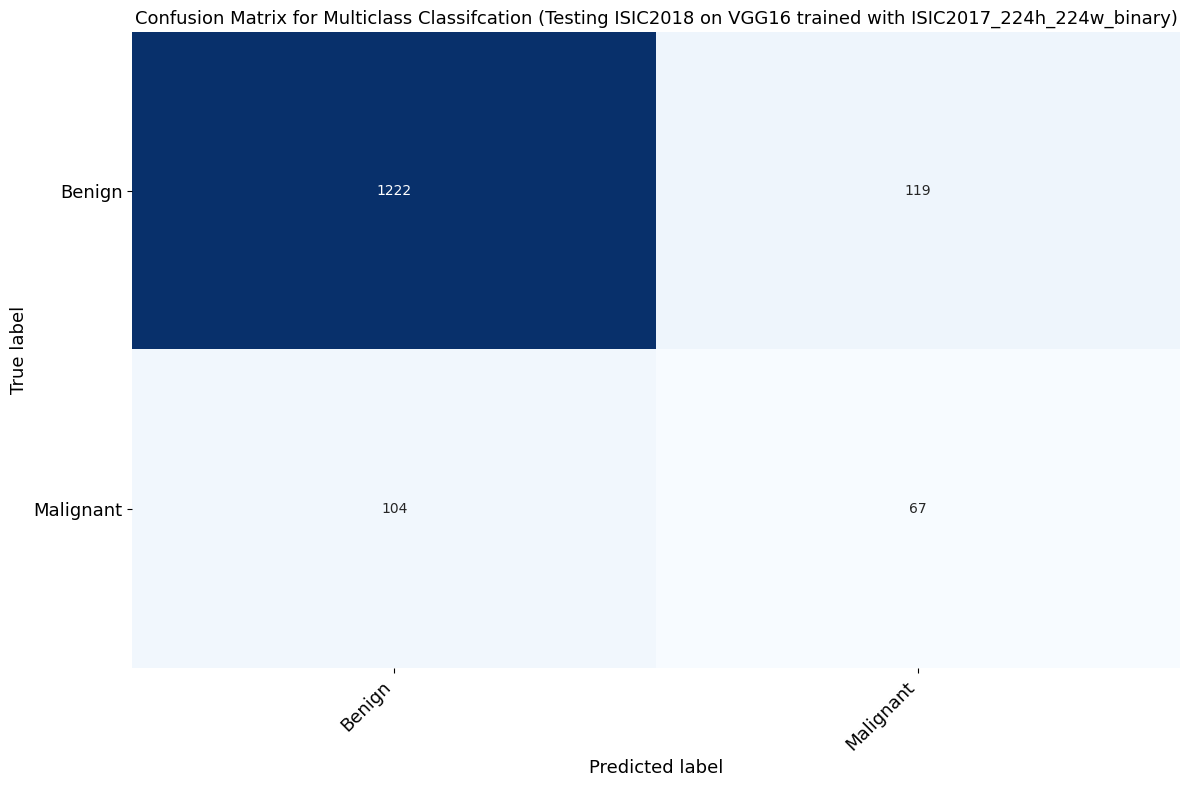

Fitting VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model...
Epoch 1/20
65/65 [==============================] - 7s 103ms/step - loss: 0.5539 - accuracy: 0.7892 - val_loss: 0.4385 - val_accuracy: 0.8818
Epoch 2/20
65/65 [==============================] - 3s 53ms/step - loss: 0.3584 - accuracy: 0.8406 - val_loss: 0.3963 - val_accuracy: 0.8848
Epoch 3/20
65/65 [==============================] - 3s 50ms/step - loss: 0.3156 - accuracy: 0.8609 - val_loss: 0.3707 - val_accuracy: 0.8788
Epoch 4/20
65/65 [==============================] - 3s 50ms/step - loss: 0.2904 - accuracy: 0.8710 - val_loss: 0.3598 - val_accuracy: 0.8909
Epoch 5/20
65/65 [==============================] - 3s 51ms/step - loss: 0.2764 - accuracy: 0.8782 - val_loss: 0.3475 - val_accuracy: 0.8848
Epoch 6/20
65/65 [==============================] - 3s 50ms/step - loss: 0.2596 - accuracy: 0.8852 - val_loss: 0.3384 - val_accuracy: 0.8939
Epoch 7/20
65/65 [==============================] - 3s 50ms/step - loss: 0.2380 - a

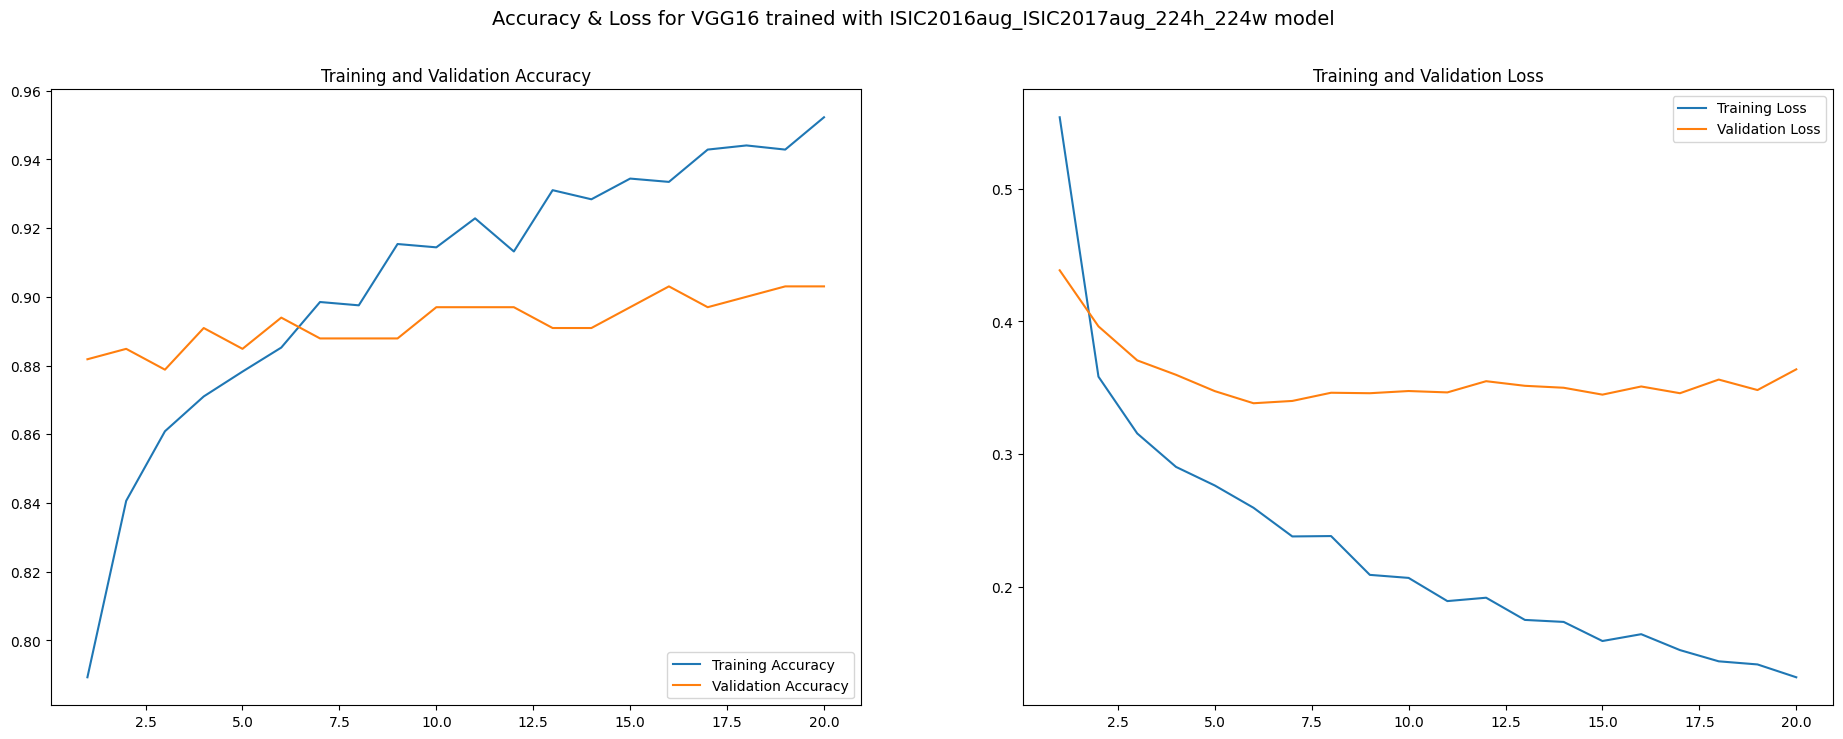

Testing on Kaggle DB
Evaluating Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model...

52/52 [==============================] - 1s 20ms/step - loss: 0.6856 - accuracy: 0.7746
Train loss = 0.6855605840682983  ;  Train accuracy = 77.46%

32/32 [==============================] - 1s 19ms/step - loss: 0.7524 - accuracy: 0.7310
Validation loss = 0.7523511648178101  ;  Validation accuracy = 73.10%

21/21 [==============================] - 0s 19ms/step - loss: 0.7380 - accuracy: 0.7621
Test loss = 0.7379522919654846  ;  Test accuracy = 76.21%
Computing predictions for Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.72      0.95      0.82       893
   Malignant       0.90      0.57      0.70       744

    accuracy                           0.77  

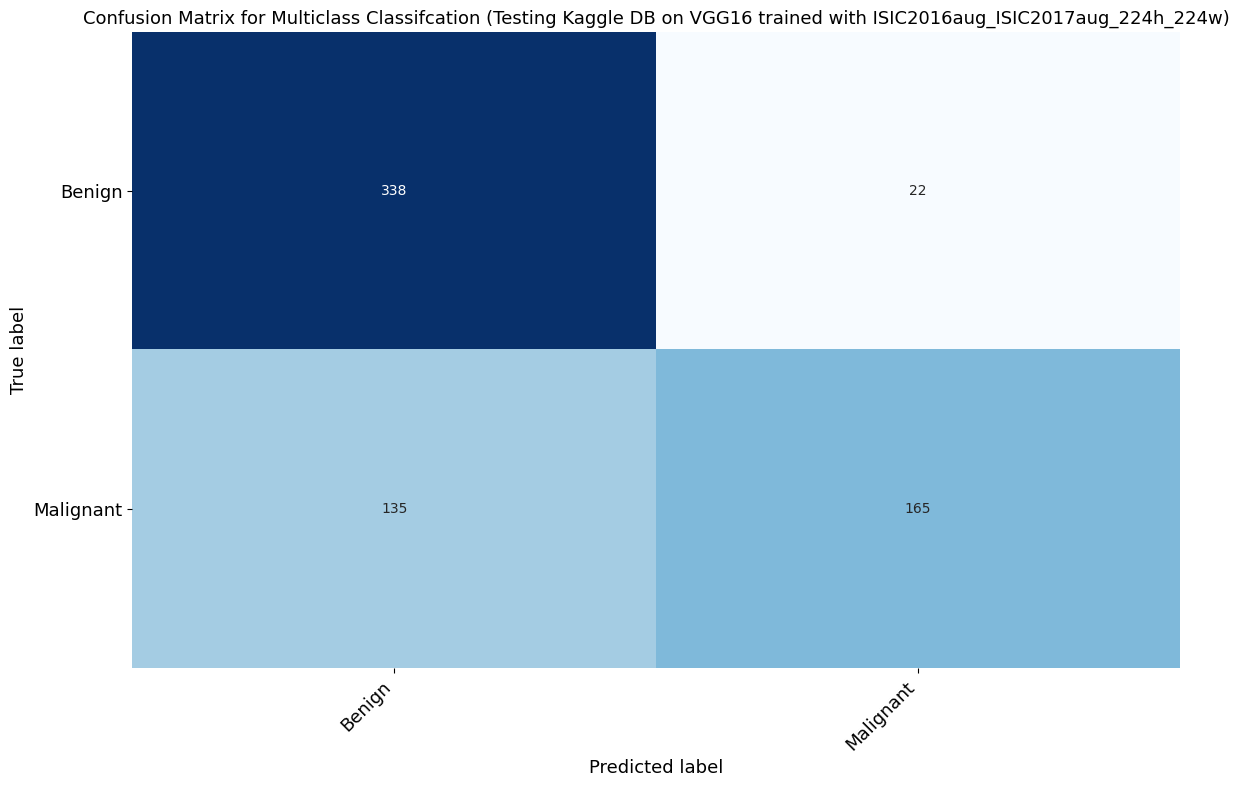

Testing on HAM10000
Evaluating Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model...

251/251 [==============================] - 5s 19ms/step - loss: 0.3934 - accuracy: 0.8431
Train loss = 0.39340904355049133  ;  Train accuracy = 84.31%

28/28 [==============================] - 1s 18ms/step - loss: 0.2761 - accuracy: 0.8958
Validation loss = 0.2760568857192993  ;  Validation accuracy = 89.58%

35/35 [==============================] - 1s 18ms/step - loss: 0.2841 - accuracy: 0.8957
Test loss = 0.28407415747642517  ;  Test accuracy = 89.57%
Computing predictions for Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.92      0.89      0.91      6994
   Malignant       0.41      0.50      0.45      1035

    accuracy                           0.84  

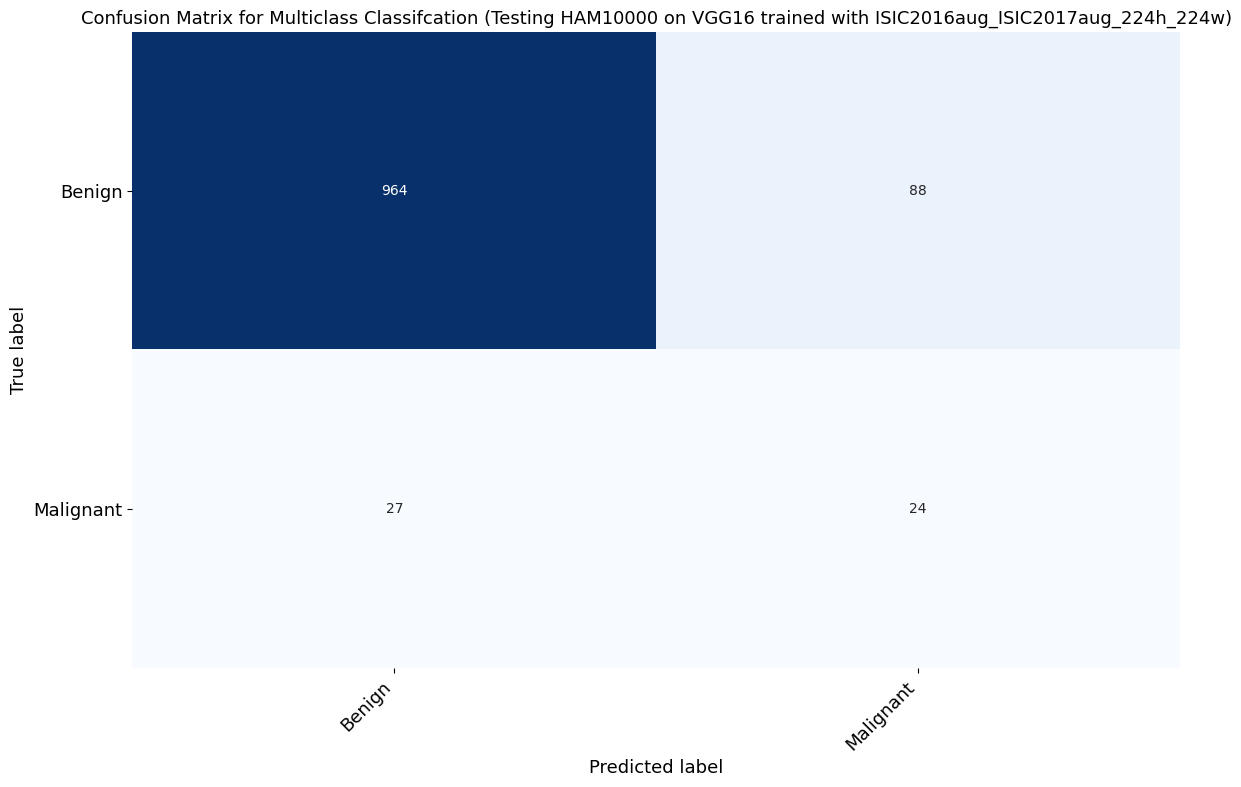

Testing on ISIC2016
Evaluating Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model...

23/23 [==============================] - 1s 19ms/step - loss: 0.0601 - accuracy: 0.9889
Train loss = 0.06012920290231705  ;  Train accuracy = 98.89%

6/6 [==============================] - 0s 17ms/step - loss: 0.1395 - accuracy: 0.9556
Validation loss = 0.13945654034614563  ;  Validation accuracy = 95.56%

12/12 [==============================] - 0s 18ms/step - loss: 0.1572 - accuracy: 0.9551
Test loss = 0.15719683468341827  ;  Test accuracy = 95.51%
Computing predictions for Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      0.99       583
   Malignant       0.96      0.99      0.97       137

    accuracy                           0.99     

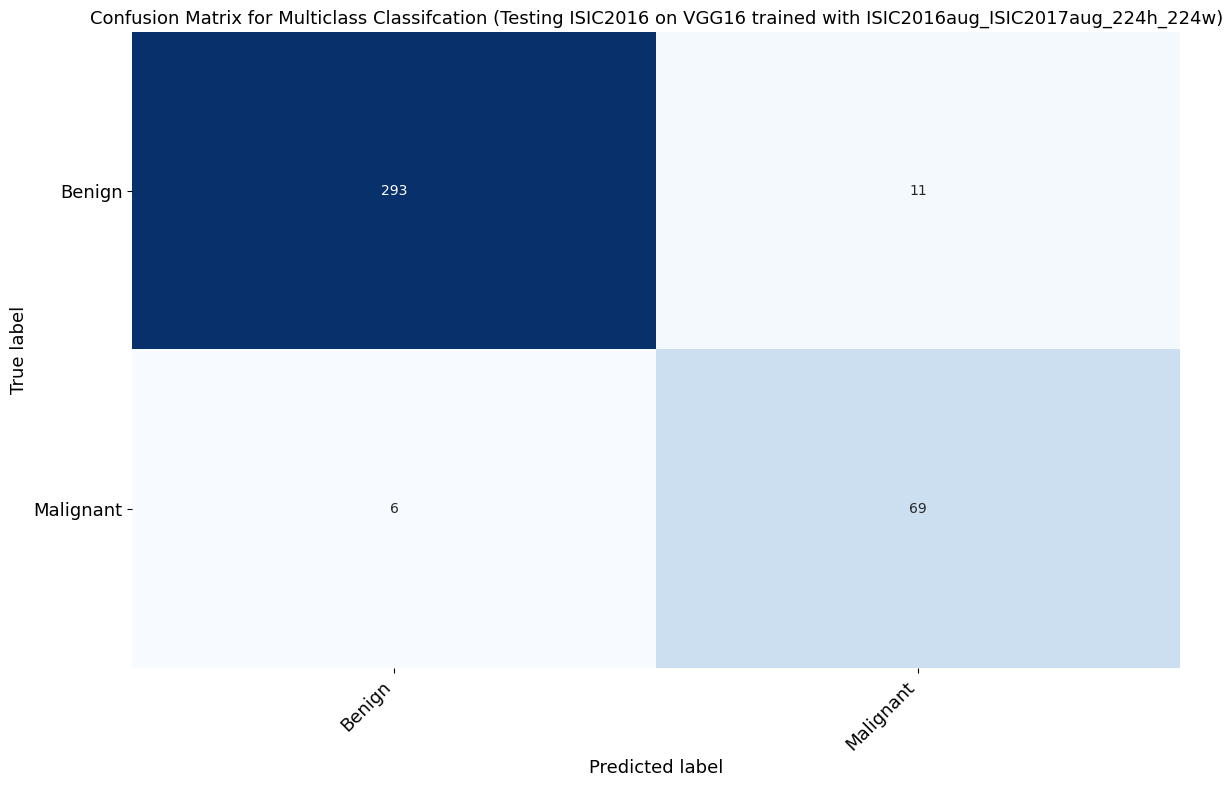

Testing on ISIC2017
Evaluating Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model...

63/63 [==============================] - 1s 18ms/step - loss: 0.0689 - accuracy: 0.9920
Train loss = 0.0688914954662323  ;  Train accuracy = 99.20%

5/5 [==============================] - 0s 17ms/step - loss: 0.5770 - accuracy: 0.8200
Validation loss = 0.5770360231399536  ;  Validation accuracy = 82.00%

19/19 [==============================] - 0s 19ms/step - loss: 0.7763 - accuracy: 0.7750
Test loss = 0.7763288617134094  ;  Test accuracy = 77.50%
Computing predictions for Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      1.00      1.00      1626
   Malignant       1.00      0.96      0.98       374

    accuracy                           0.99      20

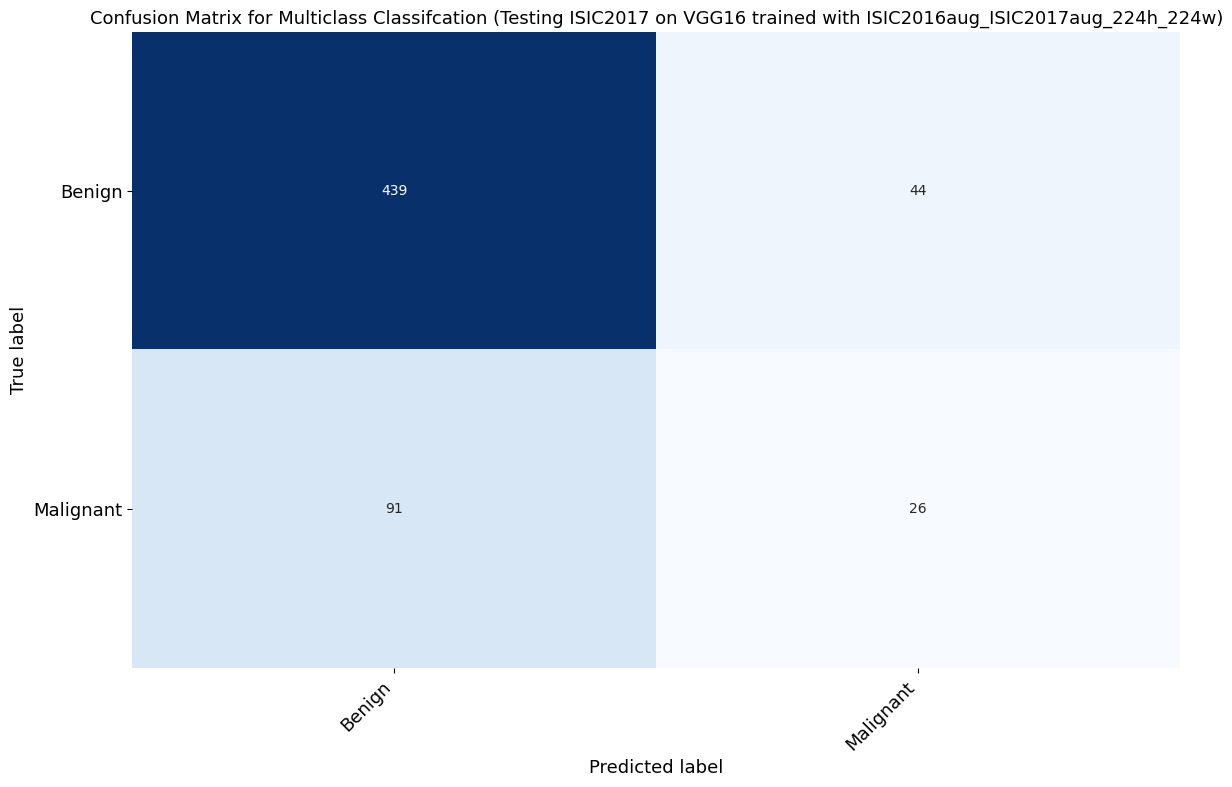

Testing on ISIC2018
Evaluating Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model...

313/313 [==============================] - 6s 19ms/step - loss: 0.3710 - accuracy: 0.8535
Train loss = 0.37102076411247253  ;  Train accuracy = 85.35%

7/7 [==============================] - 0s 16ms/step - loss: 0.4312 - accuracy: 0.8187
Validation loss = 0.43124011158943176  ;  Validation accuracy = 81.87%

48/48 [==============================] - 1s 18ms/step - loss: 0.5158 - accuracy: 0.8347
Test loss = 0.5158258080482483  ;  Test accuracy = 83.47%
Computing predictions for Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w...
Model report for Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.93      0.90      0.92      8902
   Malignant       0.38      0.49      0.43      1113

    accuracy                           0.85    

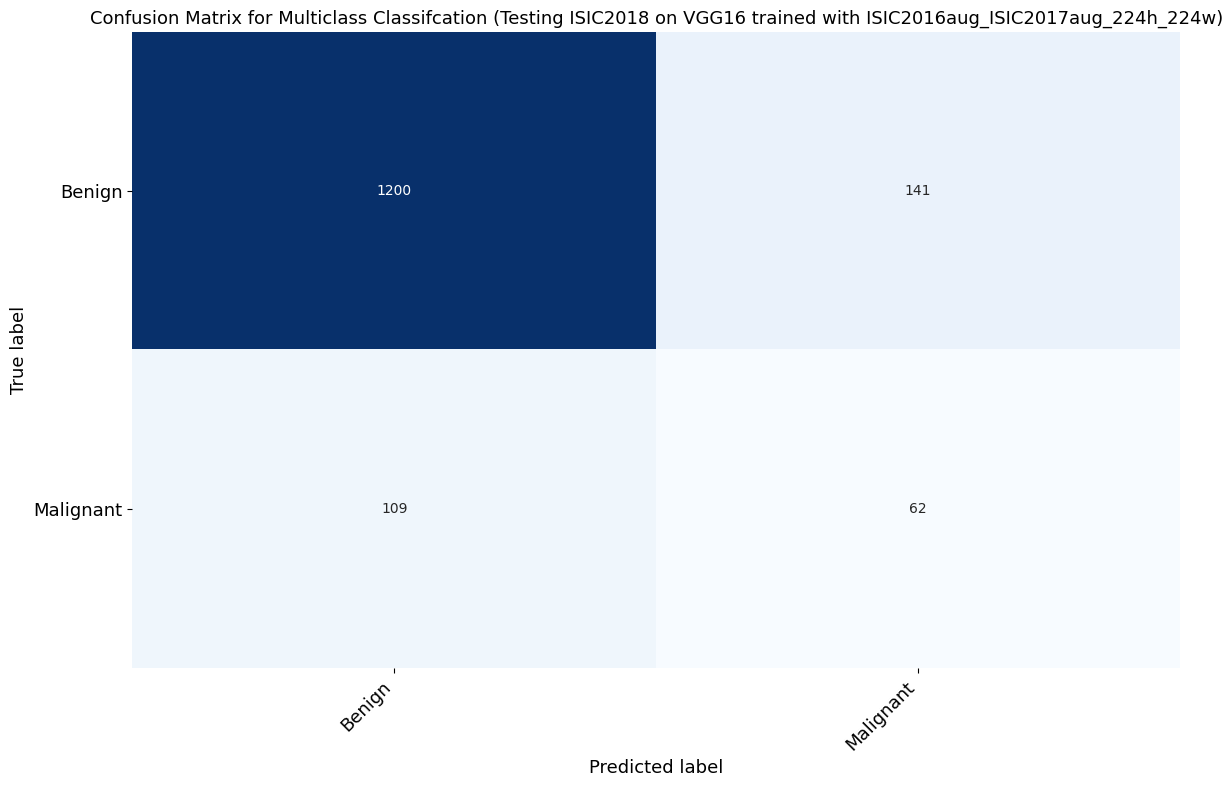

Fitting VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...
Epoch 1/20
91/91 [==============================] - 7s 76ms/step - loss: 0.3135 - accuracy: 0.8937 - val_loss: 0.4734 - val_accuracy: 0.8361
Epoch 2/20
91/91 [==============================] - 5s 56ms/step - loss: 0.2591 - accuracy: 0.9068 - val_loss: 0.4312 - val_accuracy: 0.8466
Epoch 3/20
91/91 [==============================] - 5s 56ms/step - loss: 0.2092 - accuracy: 0.9203 - val_loss: 0.3974 - val_accuracy: 0.8481
Epoch 4/20
91/91 [==============================] - 5s 57ms/step - loss: 0.1840 - accuracy: 0.9298 - val_loss: 0.3892 - val_accuracy: 0.8534
Epoch 5/20
91/91 [==============================] - 5s 57ms/step - loss: 0.1830 - accuracy: 0.9303 - val_loss: 0.3804 - val_accuracy: 0.8549
Epoch 6/20
91/91 [==============================] - 5s 57ms/step - loss: 0.1793 - accuracy: 0.9312 - val_loss: 0.3651 - val_accuracy: 0.8602
Epoch 7/20
91/91 [==============================] - 5s 56ms/step - loss: 0.

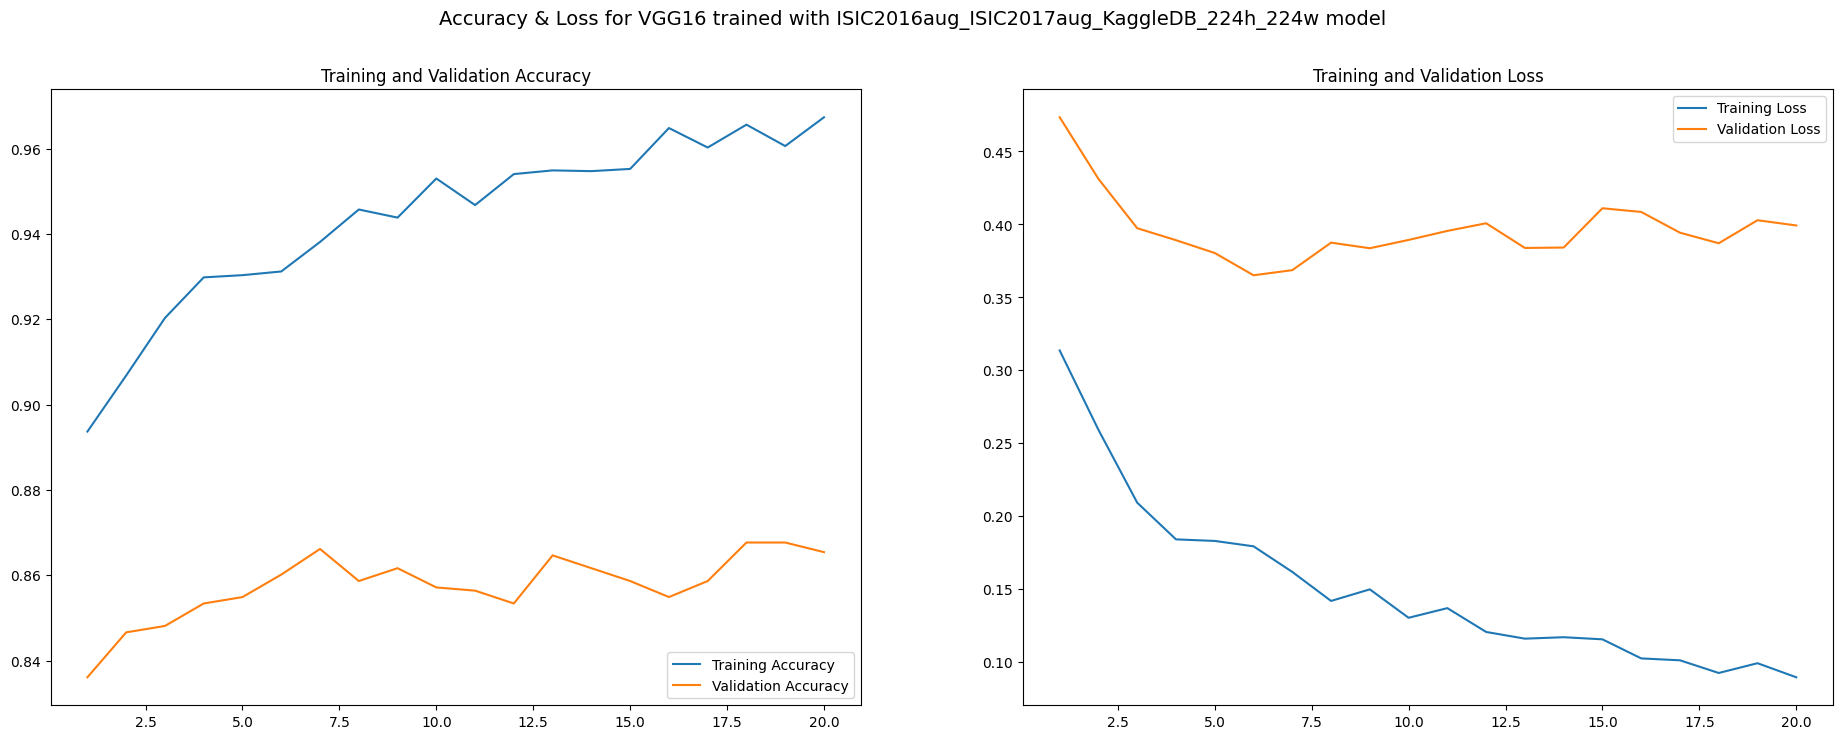

Testing on Kaggle DB
Evaluating Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...

52/52 [==============================] - 1s 19ms/step - loss: 0.1230 - accuracy: 0.9566
Train loss = 0.12304726988077164  ;  Train accuracy = 95.66%

32/32 [==============================] - 1s 19ms/step - loss: 0.3764 - accuracy: 0.8480
Validation loss = 0.3763848841190338  ;  Validation accuracy = 84.80%

21/21 [==============================] - 0s 18ms/step - loss: 0.4105 - accuracy: 0.8636
Test loss = 0.41047054529190063  ;  Test accuracy = 86.36%
Computing predictions for Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.96       893
   Malignant       0.96      0.95      0.95       744

    accuracy    

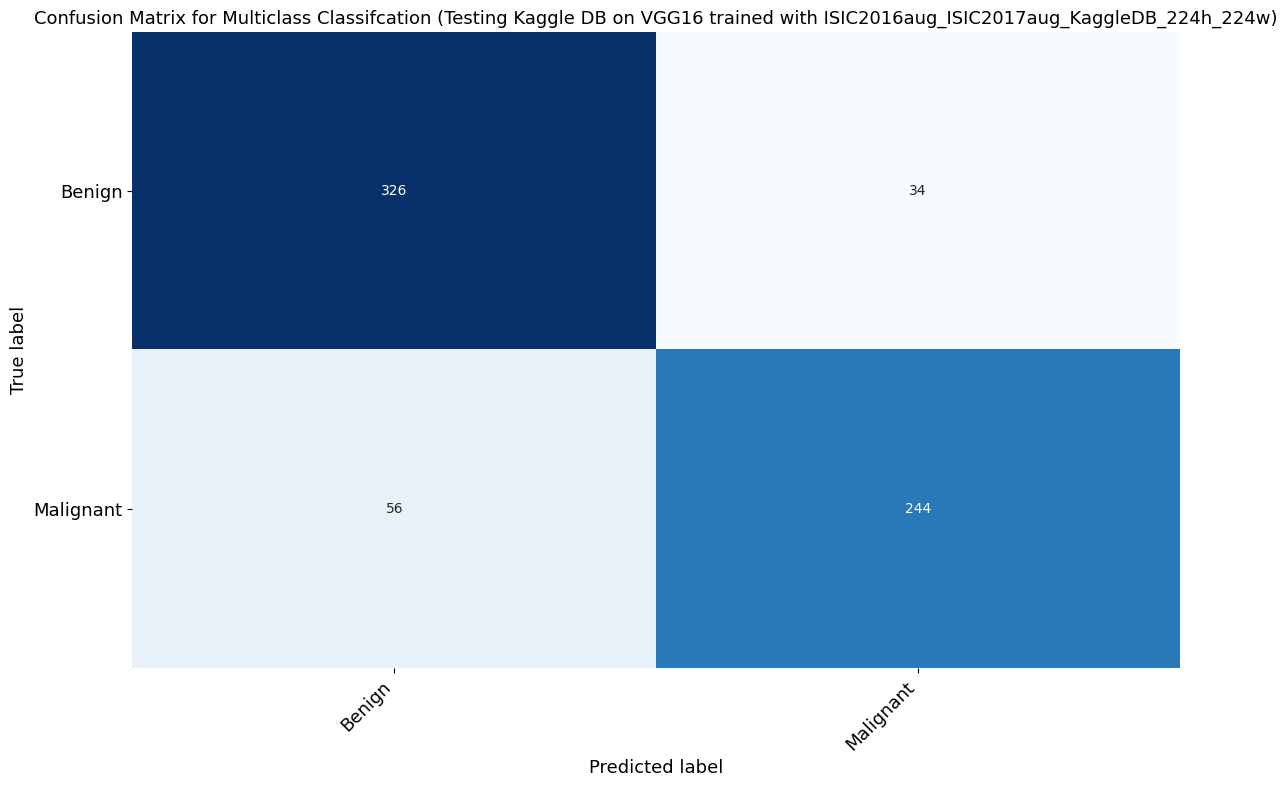

Testing on HAM10000
Evaluating Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...

251/251 [==============================] - 5s 18ms/step - loss: 0.4836 - accuracy: 0.8079
Train loss = 0.48362311720848083  ;  Train accuracy = 80.79%

28/28 [==============================] - 1s 20ms/step - loss: 0.3206 - accuracy: 0.8845
Validation loss = 0.32056593894958496  ;  Validation accuracy = 88.45%

35/35 [==============================] - 1s 19ms/step - loss: 0.3417 - accuracy: 0.8758
Test loss = 0.34166932106018066  ;  Test accuracy = 87.58%
Computing predictions for Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.82      0.88      6994
   Malignant       0.38      0.75      0.50      1035

    accuracy     

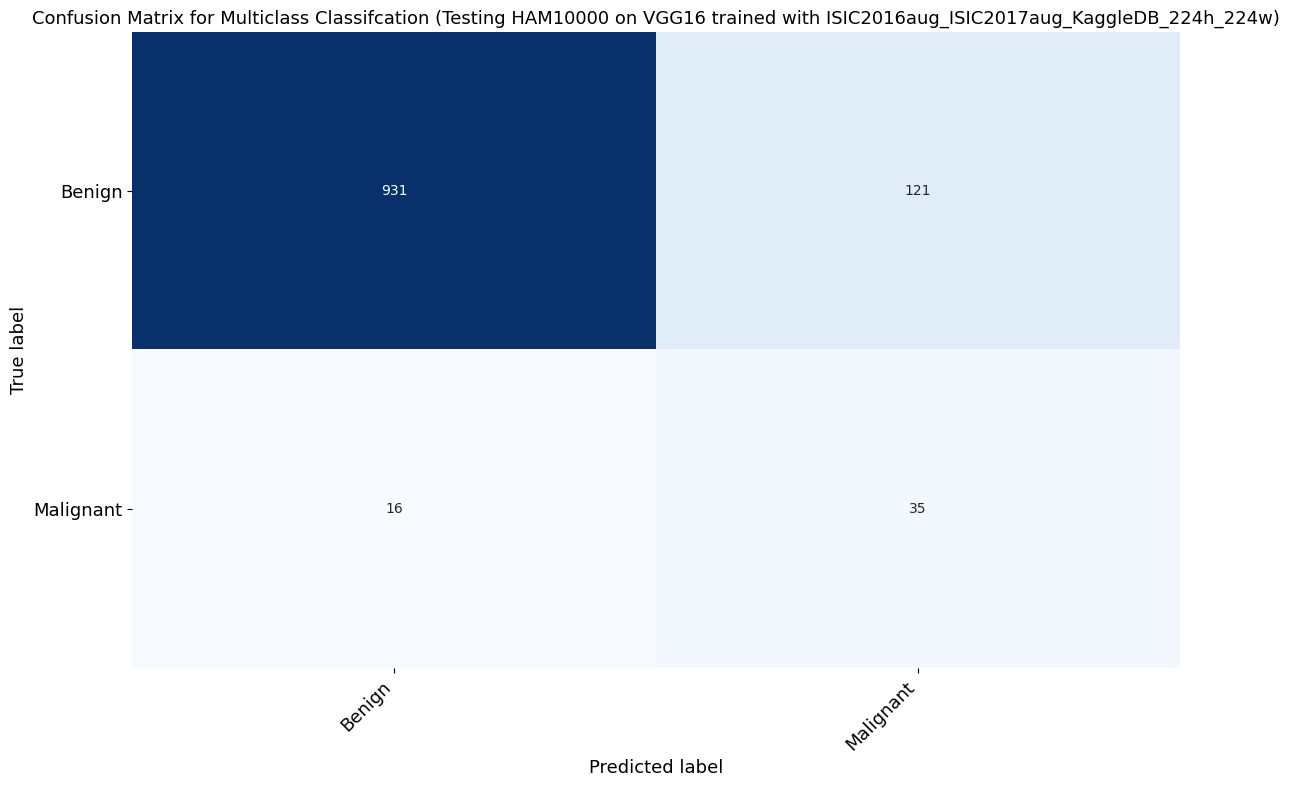

Testing on ISIC2016
Evaluating Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...

23/23 [==============================] - 1s 19ms/step - loss: 0.0330 - accuracy: 0.9958
Train loss = 0.03302401676774025  ;  Train accuracy = 99.58%

6/6 [==============================] - 0s 17ms/step - loss: 0.1278 - accuracy: 0.9611
Validation loss = 0.12775206565856934  ;  Validation accuracy = 96.11%

12/12 [==============================] - 0s 20ms/step - loss: 0.1809 - accuracy: 0.9420
Test loss = 0.1809440553188324  ;  Test accuracy = 94.20%
Computing predictions for Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      1.00       583
   Malignant       0.98      1.00      0.99       137

    accuracy          

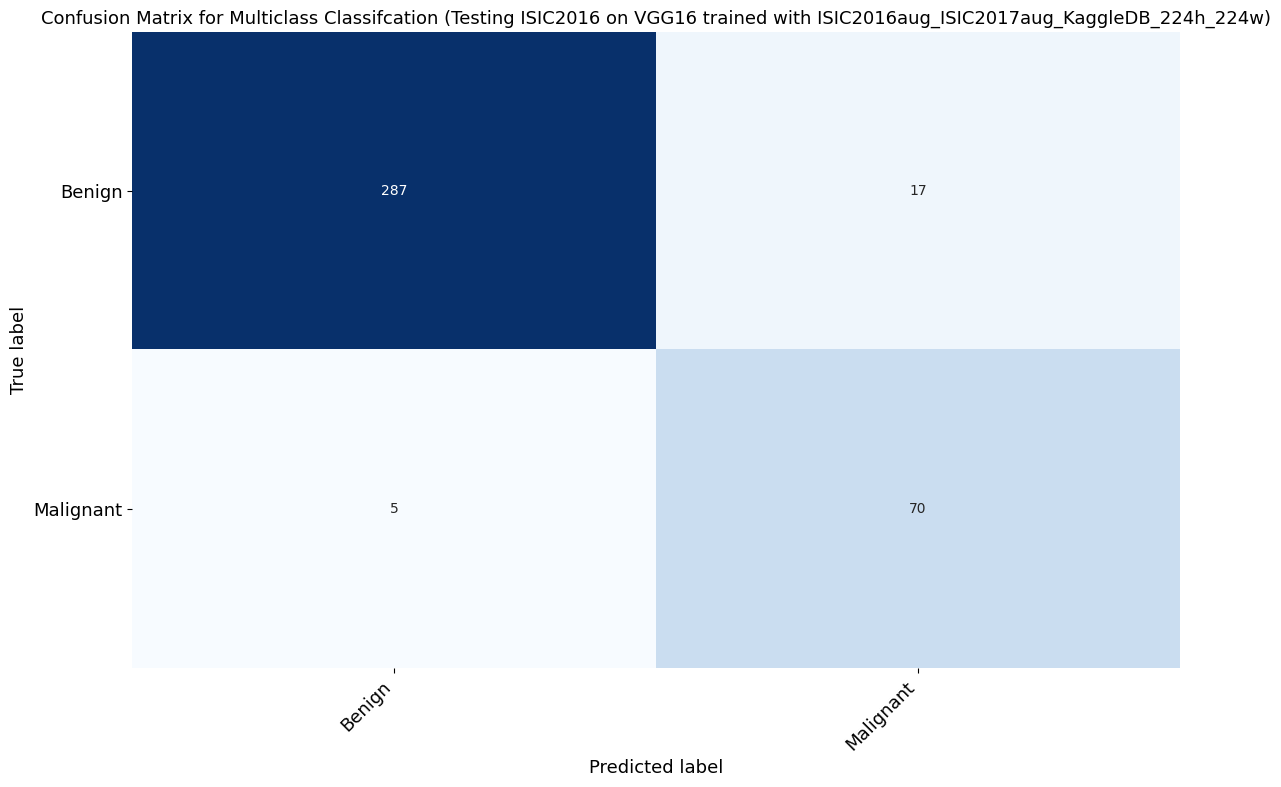

Testing on ISIC2017
Evaluating Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...

63/63 [==============================] - 1s 18ms/step - loss: 0.0415 - accuracy: 0.9970
Train loss = 0.041537992656230927  ;  Train accuracy = 99.70%

5/5 [==============================] - 0s 17ms/step - loss: 0.5748 - accuracy: 0.8200
Validation loss = 0.574816107749939  ;  Validation accuracy = 82.00%

19/19 [==============================] - 0s 18ms/step - loss: 0.9064 - accuracy: 0.7650
Test loss = 0.9063655734062195  ;  Test accuracy = 76.50%
Computing predictions for Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1626
   Malignant       0.99      0.99      0.99       374

    accuracy           

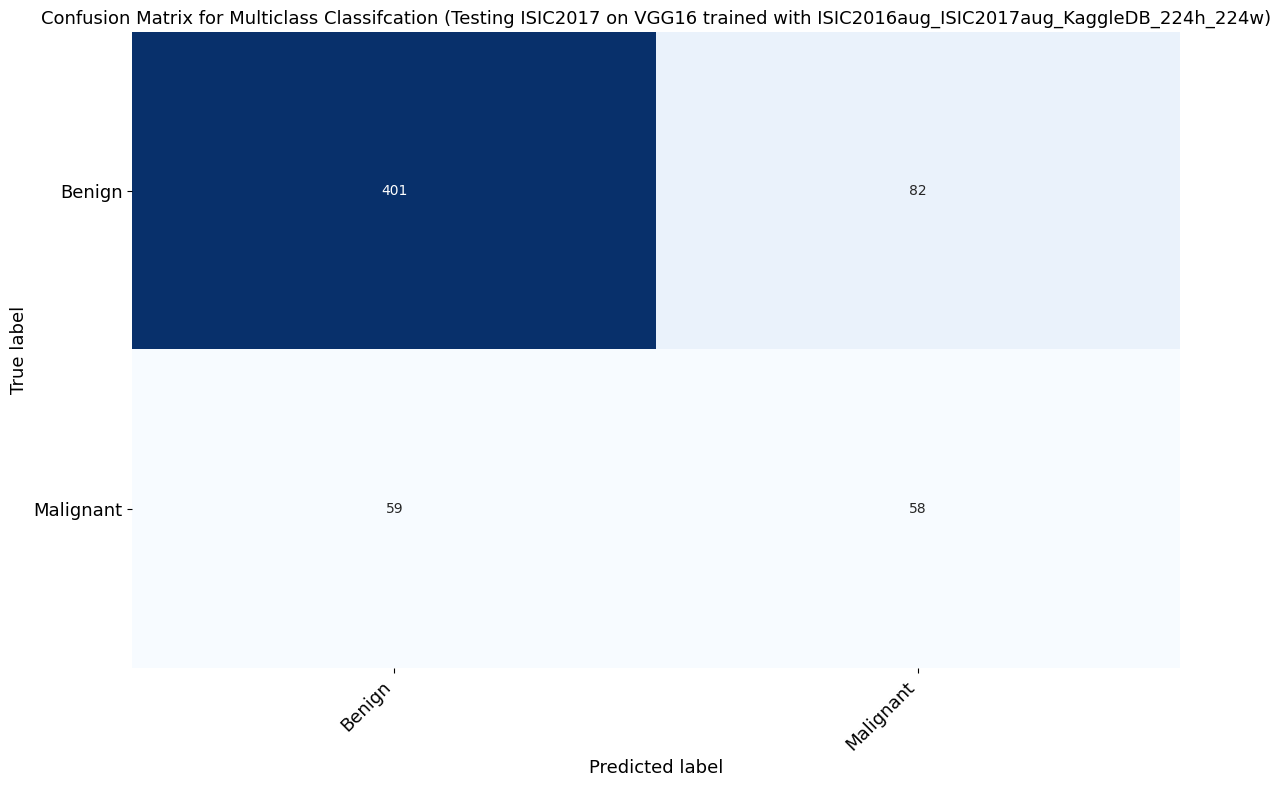

Testing on ISIC2018
Evaluating Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model...

313/313 [==============================] - 6s 19ms/step - loss: 0.4536 - accuracy: 0.8222
Train loss = 0.45361295342445374  ;  Train accuracy = 82.22%

7/7 [==============================] - 0s 16ms/step - loss: 0.5832 - accuracy: 0.7979
Validation loss = 0.5832414031028748  ;  Validation accuracy = 79.79%

48/48 [==============================] - 1s 18ms/step - loss: 0.6435 - accuracy: 0.7837
Test loss = 0.6435018181800842  ;  Test accuracy = 78.37%
Computing predictions for Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w...
Model report for Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.83      0.89      8902
   Malignant       0.36      0.75      0.48      1113

    accuracy         

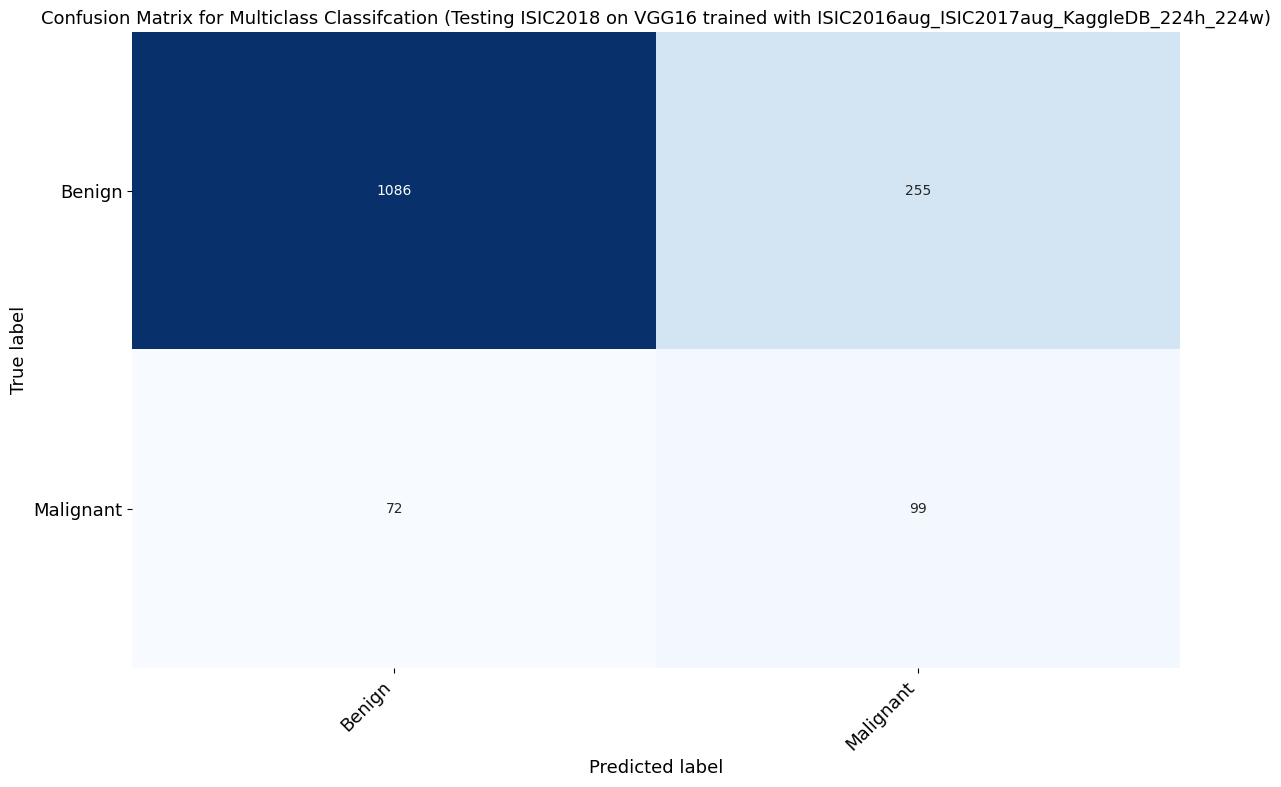

Fitting VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...
Epoch 1/20
320/320 [==============================] - 19s 61ms/step - loss: 0.3834 - accuracy: 0.8539 - val_loss: 0.3598 - val_accuracy: 0.8536
Epoch 2/20
320/320 [==============================] - 16s 51ms/step - loss: 0.2919 - accuracy: 0.8771 - val_loss: 0.3239 - val_accuracy: 0.8654
Epoch 3/20
320/320 [==============================] - 17s 53ms/step - loss: 0.2596 - accuracy: 0.8914 - val_loss: 0.3351 - val_accuracy: 0.8601
Epoch 4/20
320/320 [==============================] - 17s 53ms/step - loss: 0.2476 - accuracy: 0.8958 - val_loss: 0.3031 - val_accuracy: 0.8739
Epoch 5/20
320/320 [==============================] - 16s 51ms/step - loss: 0.2333 - accuracy: 0.9029 - val_loss: 0.3048 - val_accuracy: 0.8798
Epoch 6/20
320/320 [==============================] - 16s 51ms/step - loss: 0.2162 - accuracy: 0.9084 - val_loss: 0.3226 - val_accuracy: 0.8674
Epoch 7/20
320/320 [=========================

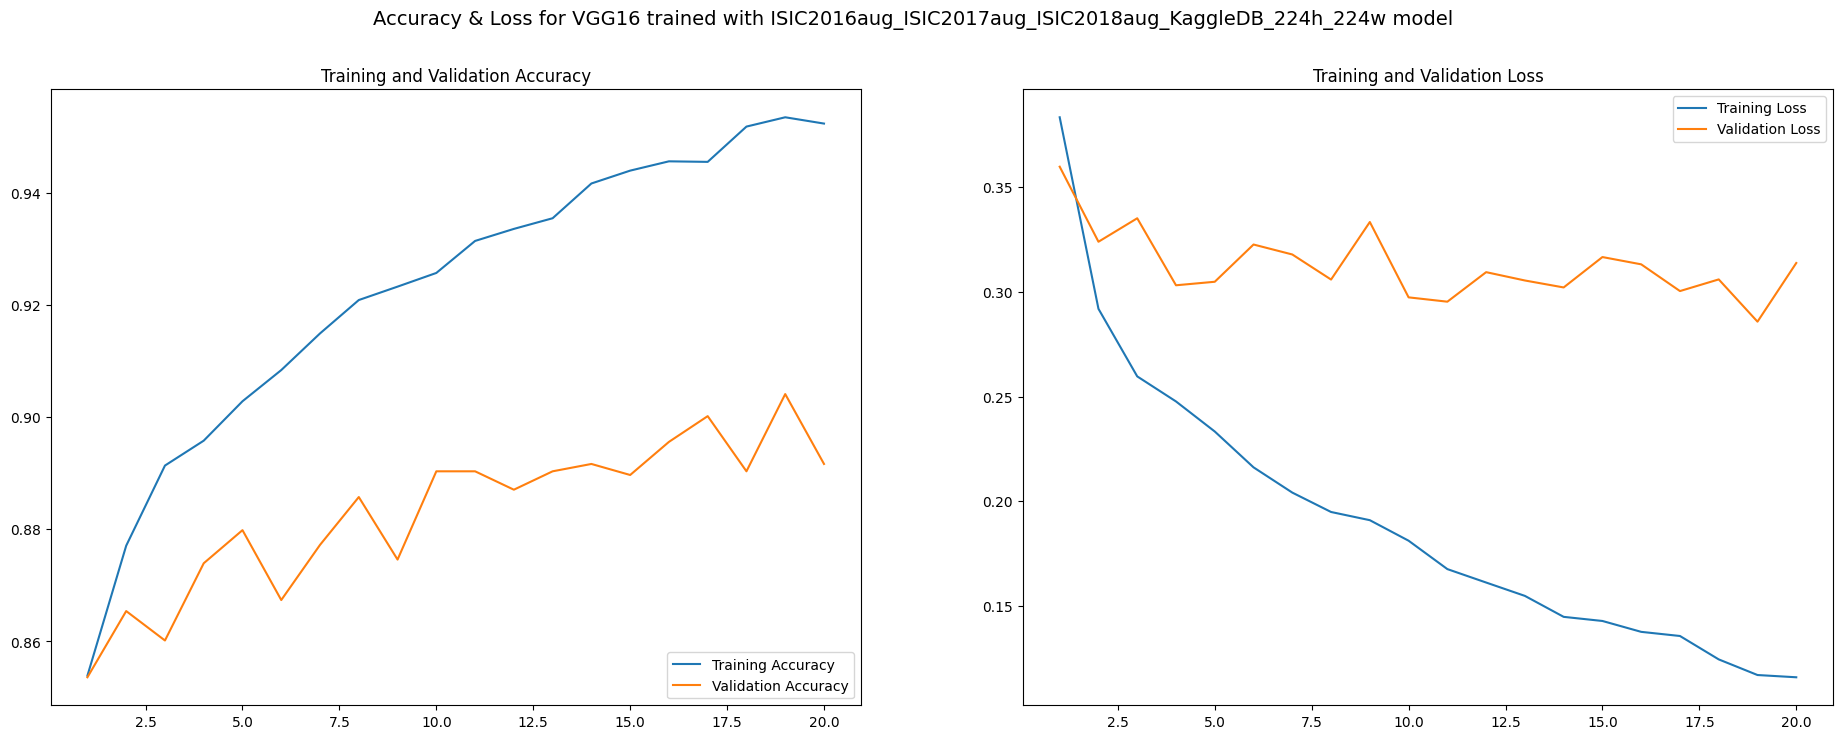

Testing on Kaggle DB
Evaluating Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...

52/52 [==============================] - 1s 19ms/step - loss: 0.0328 - accuracy: 0.9957
Train loss = 0.032784052193164825  ;  Train accuracy = 99.57%

32/32 [==============================] - 1s 24ms/step - loss: 0.2904 - accuracy: 0.9060
Validation loss = 0.29041847586631775  ;  Validation accuracy = 90.60%

21/21 [==============================] - 0s 19ms/step - loss: 0.3805 - accuracy: 0.9076
Test loss = 0.3805171549320221  ;  Test accuracy = 90.76%
Computing predictions for Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      1.00      1.00       893
   Malignant       1.00      0.99 

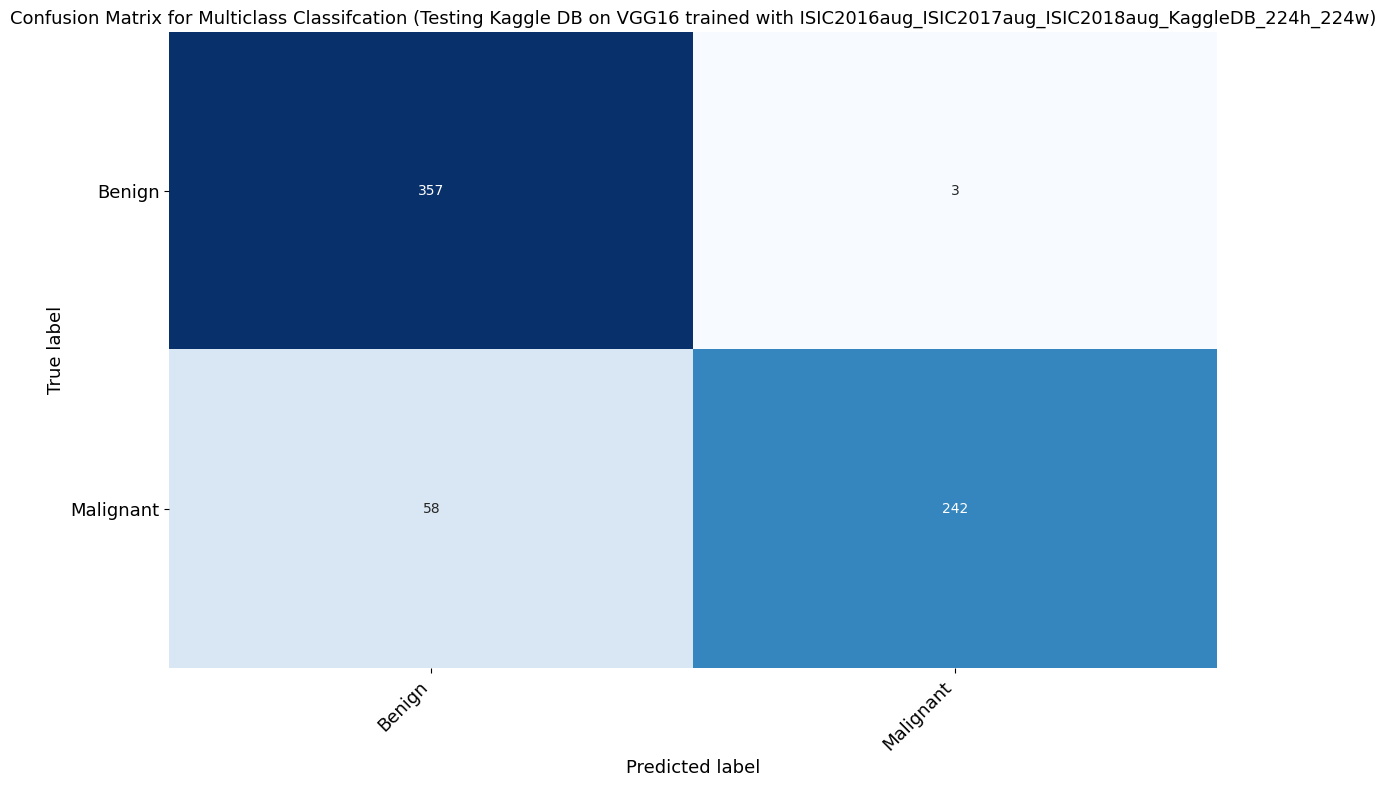

Testing on HAM10000
Evaluating Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...

251/251 [==============================] - 5s 19ms/step - loss: 0.0529 - accuracy: 0.9907
Train loss = 0.05287165567278862  ;  Train accuracy = 99.07%

28/28 [==============================] - 1s 19ms/step - loss: 0.0440 - accuracy: 0.9875
Validation loss = 0.044028498232364655  ;  Validation accuracy = 98.75%

35/35 [==============================] - 1s 20ms/step - loss: 0.0360 - accuracy: 0.9909
Test loss = 0.03599720820784569  ;  Test accuracy = 99.09%
Computing predictions for Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      6994
   Malignant       0.96      0.96  

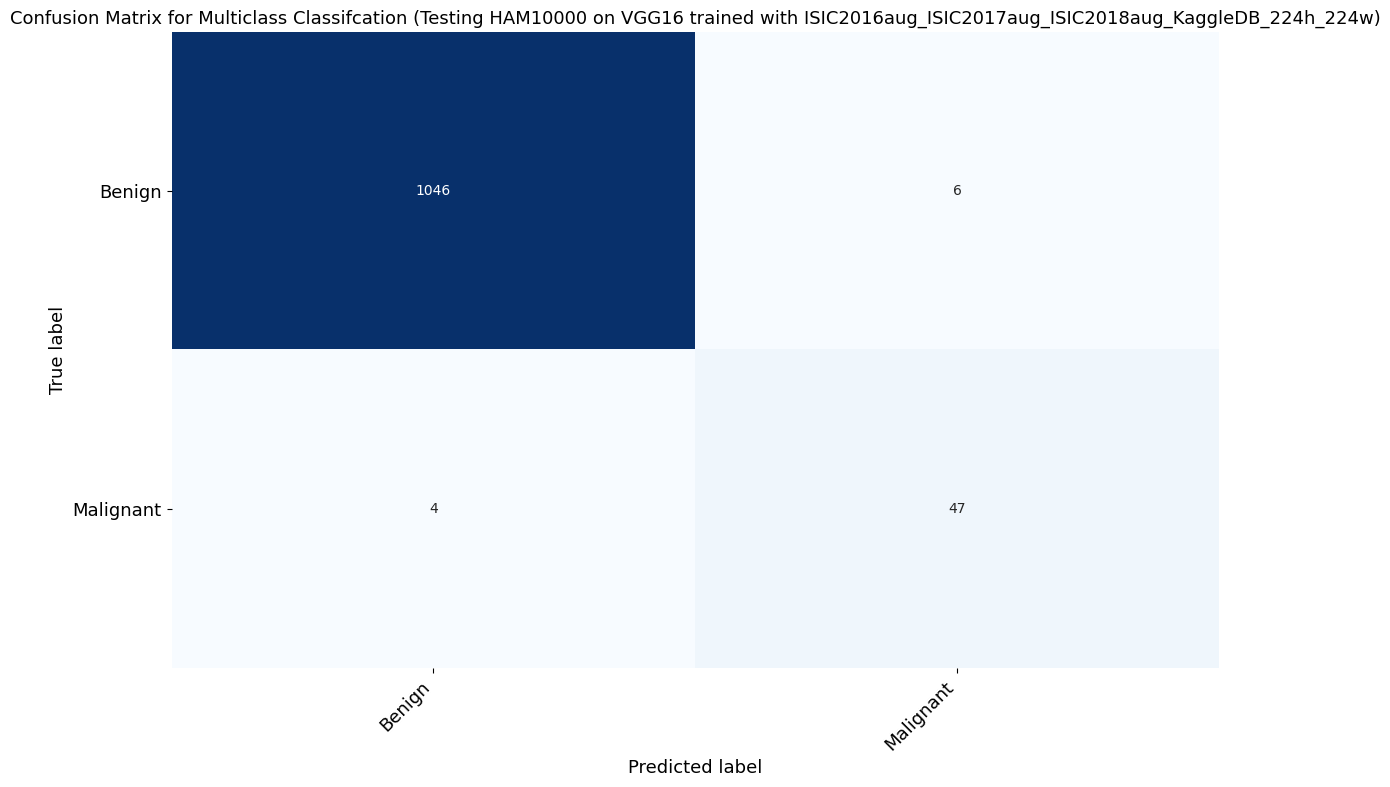

Testing on ISIC2016
Evaluating Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...

23/23 [==============================] - 1s 20ms/step - loss: 0.0252 - accuracy: 0.9931
Train loss = 0.02521762251853943  ;  Train accuracy = 99.31%

6/6 [==============================] - 0s 17ms/step - loss: 0.0933 - accuracy: 0.9556
Validation loss = 0.09328915178775787  ;  Validation accuracy = 95.56%

12/12 [==============================] - 0s 18ms/step - loss: 0.1366 - accuracy: 0.9631
Test loss = 0.1365935057401657  ;  Test accuracy = 96.31%
Computing predictions for Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      1.00       583
   Malignant       0.97      0.99      0.

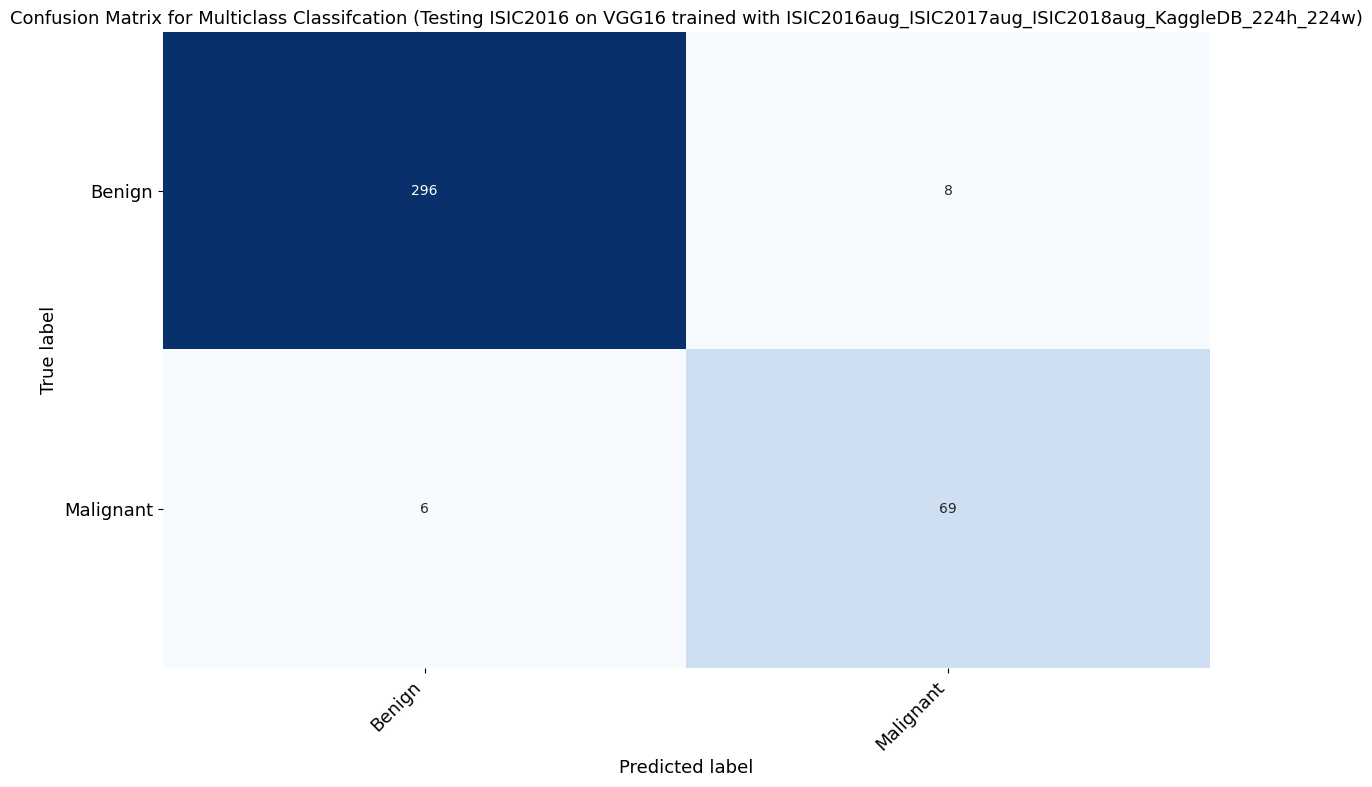

Testing on ISIC2017
Evaluating Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...

63/63 [==============================] - 1s 19ms/step - loss: 0.0224 - accuracy: 0.9955
Train loss = 0.022380199283361435  ;  Train accuracy = 99.55%

5/5 [==============================] - 0s 17ms/step - loss: 0.5539 - accuracy: 0.8467
Validation loss = 0.5539239048957825  ;  Validation accuracy = 84.67%

19/19 [==============================] - 0s 18ms/step - loss: 1.1591 - accuracy: 0.8050
Test loss = 1.1591242551803589  ;  Test accuracy = 80.50%
Computing predictions for Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1626
   Malignant       0.99      0.99      0.

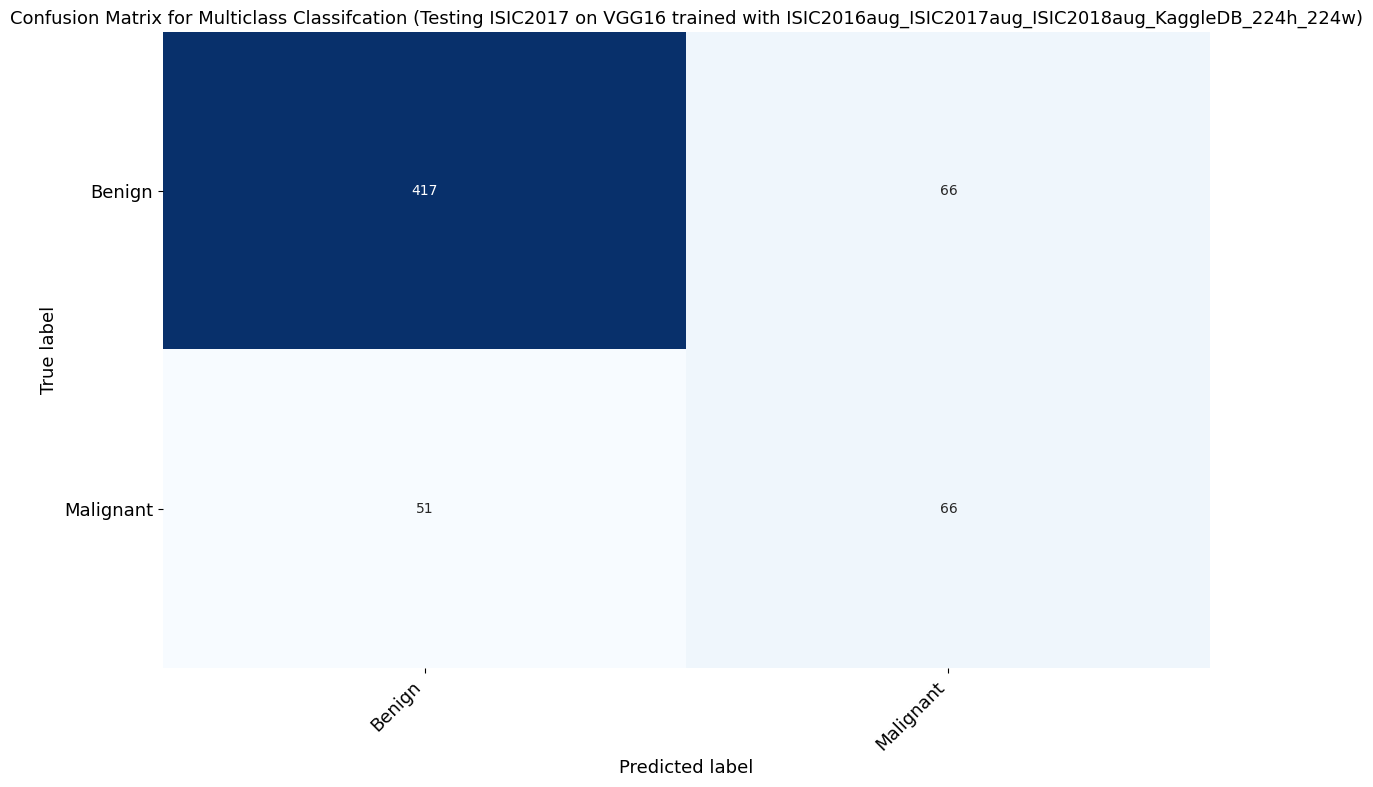

Testing on ISIC2018
Evaluating Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model...

313/313 [==============================] - 6s 19ms/step - loss: 0.0502 - accuracy: 0.9904
Train loss = 0.05023351311683655  ;  Train accuracy = 99.04%

7/7 [==============================] - 0s 16ms/step - loss: 0.2326 - accuracy: 0.8912
Validation loss = 0.23261834681034088  ;  Validation accuracy = 89.12%

48/48 [==============================] - 1s 20ms/step - loss: 0.4869 - accuracy: 0.8512
Test loss = 0.4869140684604645  ;  Test accuracy = 85.12%
Computing predictions for Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w...
Model report for Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      8902
   Malignant       0.96      0.96      

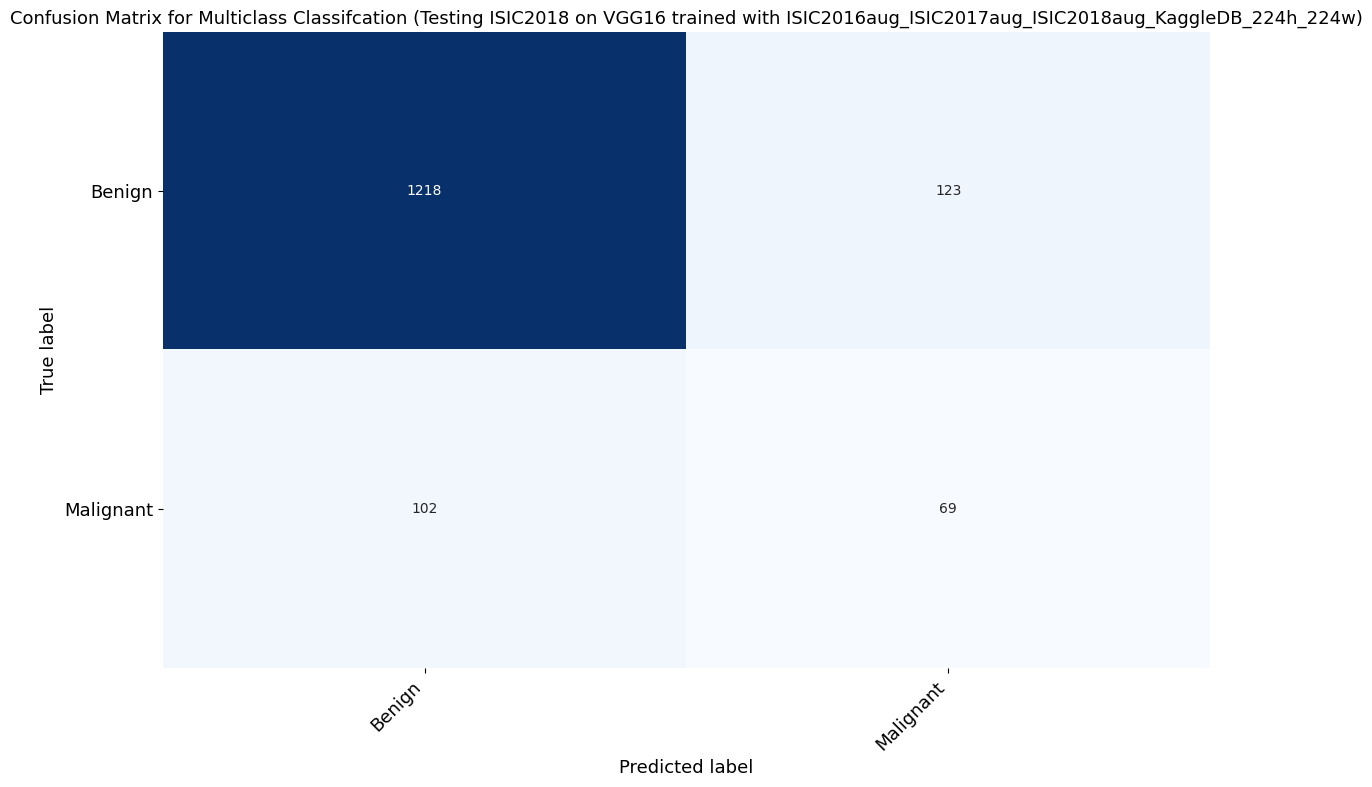

Fitting VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model...
Epoch 1/20
838/838 [==============================] - 51s 60ms/step - loss: 0.3871 - accuracy: 0.8468 - val_loss: 0.2925 - val_accuracy: 0.8865
Epoch 2/20
838/838 [==============================] - 48s 57ms/step - loss: 0.3152 - accuracy: 0.8626 - val_loss: 0.2702 - val_accuracy: 0.8965
Epoch 3/20
838/838 [==============================] - 45s 54ms/step - loss: 0.2964 - accuracy: 0.8711 - val_loss: 0.2685 - val_accuracy: 0.8933
Epoch 4/20
838/838 [==============================] - 46s 55ms/step - loss: 0.2801 - accuracy: 0.8782 - val_loss: 0.2620 - val_accuracy: 0.8982
Epoch 5/20
838/838 [==============================] - 47s 56ms/step - loss: 0.2699 - accuracy: 0.8819 - val_loss: 0.2524 - val_accuracy: 0.9041
Epoch 6/20
838/838 [==============================] - 46s 55ms/step - loss: 0.2583 - accuracy: 0.8878 - val_loss: 0.2485 - val_accuracy: 0.9076
Epoch 7/20
838/838 [=============

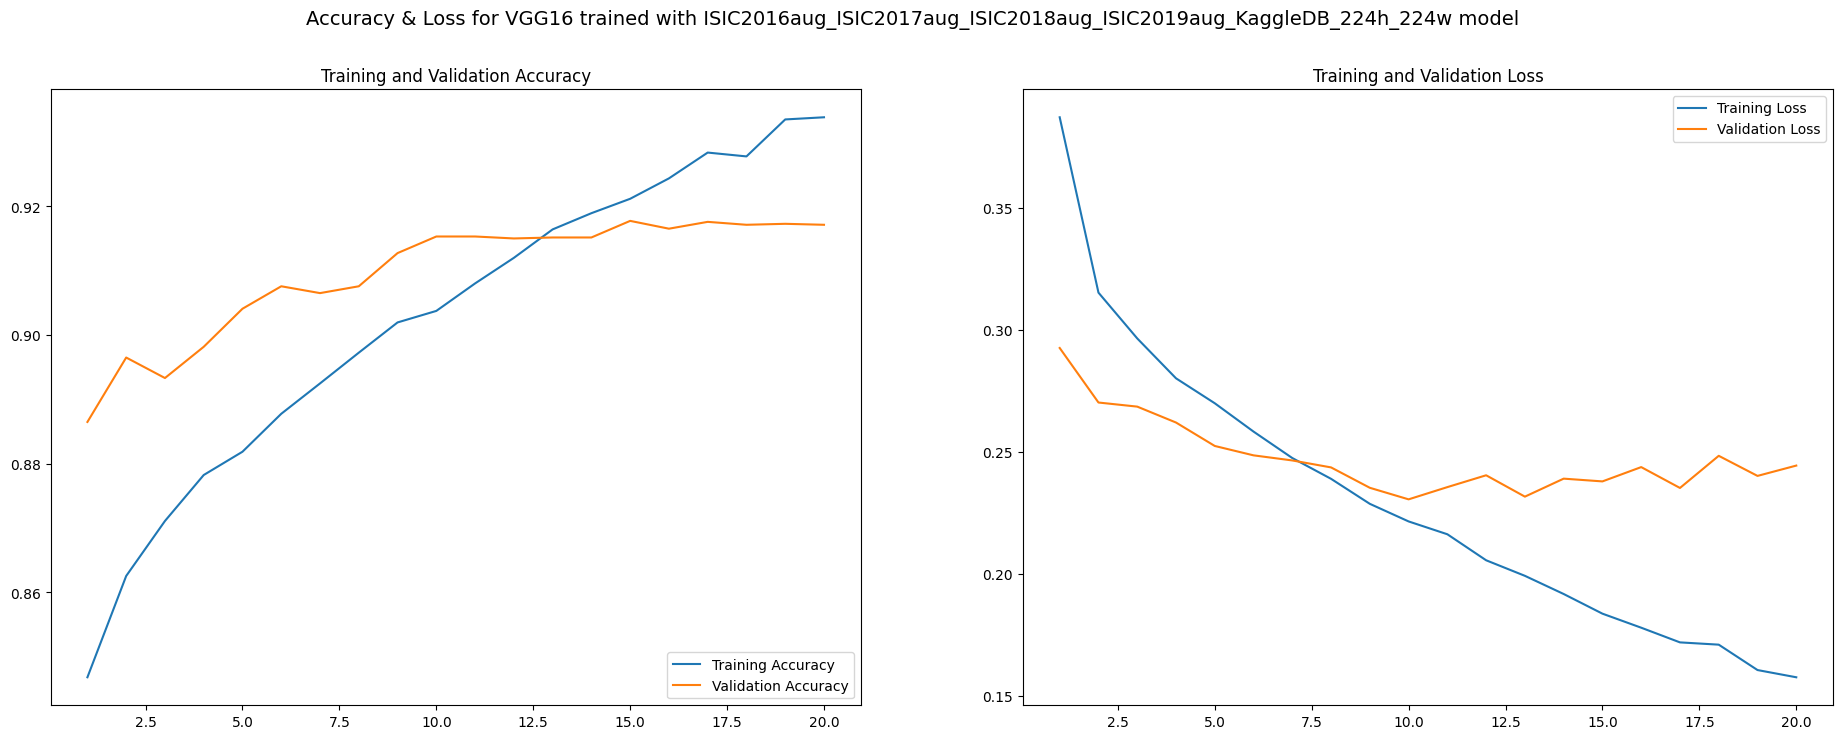

Testing on Kaggle DB
Evaluating Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model...

52/52 [==============================] - 1s 19ms/step - loss: 0.0478 - accuracy: 0.9927
Train loss = 0.047824639827013016  ;  Train accuracy = 99.27%

32/32 [==============================] - 1s 18ms/step - loss: 0.2259 - accuracy: 0.9290
Validation loss = 0.22591900825500488  ;  Validation accuracy = 92.90%

21/21 [==============================] - 0s 18ms/step - loss: 0.3085 - accuracy: 0.9348
Test loss = 0.3084565997123718  ;  Test accuracy = 93.48%
Computing predictions for Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w...
Model report for Testing Kaggle DB on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       89

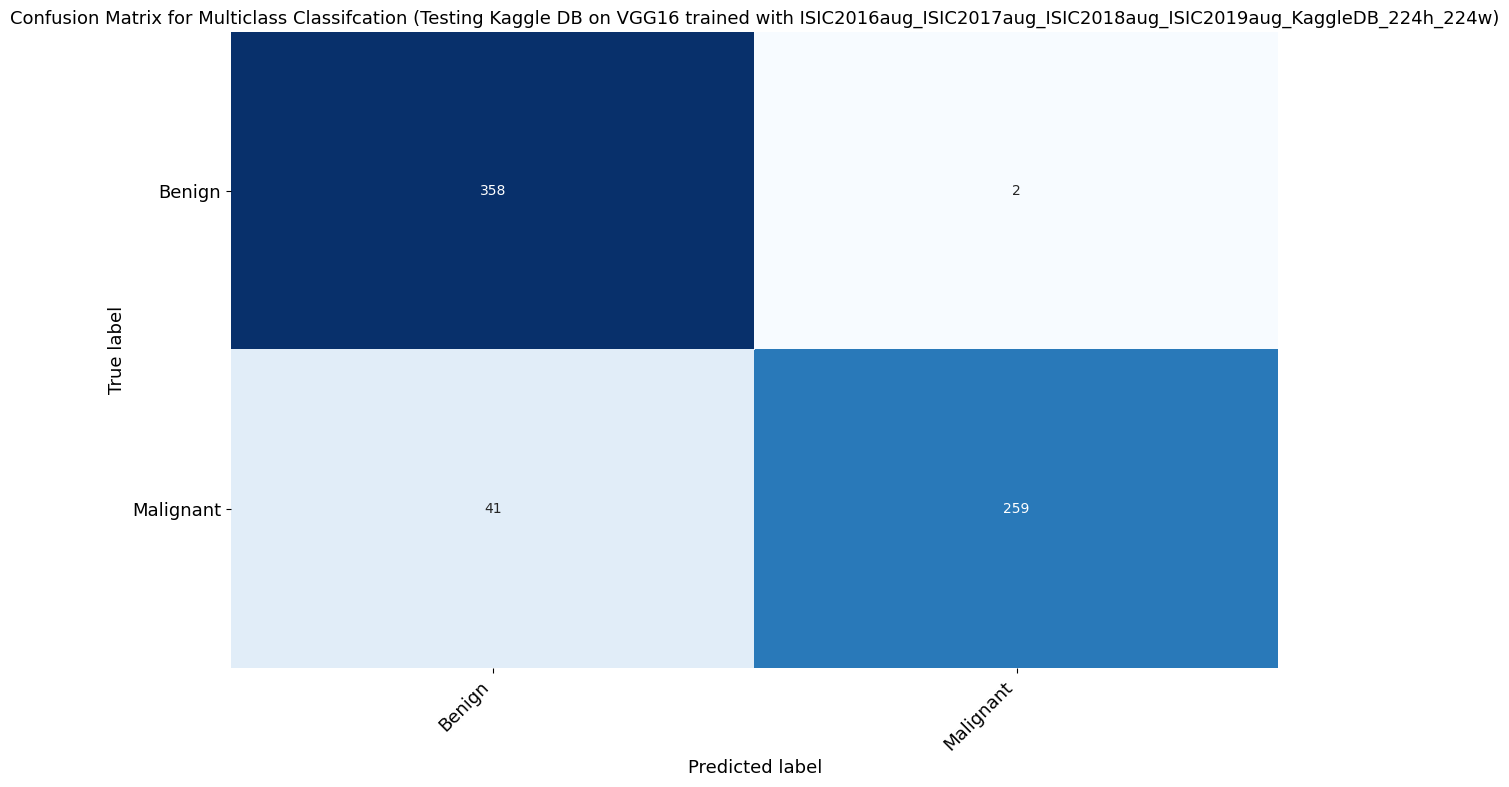

Testing on HAM10000
Evaluating Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model...

251/251 [==============================] - 5s 19ms/step - loss: 0.0468 - accuracy: 0.9940
Train loss = 0.04680193215608597  ;  Train accuracy = 99.40%

28/28 [==============================] - 1s 18ms/step - loss: 0.0269 - accuracy: 0.9977
Validation loss = 0.02690812014043331  ;  Validation accuracy = 99.77%

35/35 [==============================] - 1s 18ms/step - loss: 0.0358 - accuracy: 0.9918
Test loss = 0.03582556173205376  ;  Test accuracy = 99.18%
Computing predictions for Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w...
Model report for Testing HAM10000 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      1.00      6994


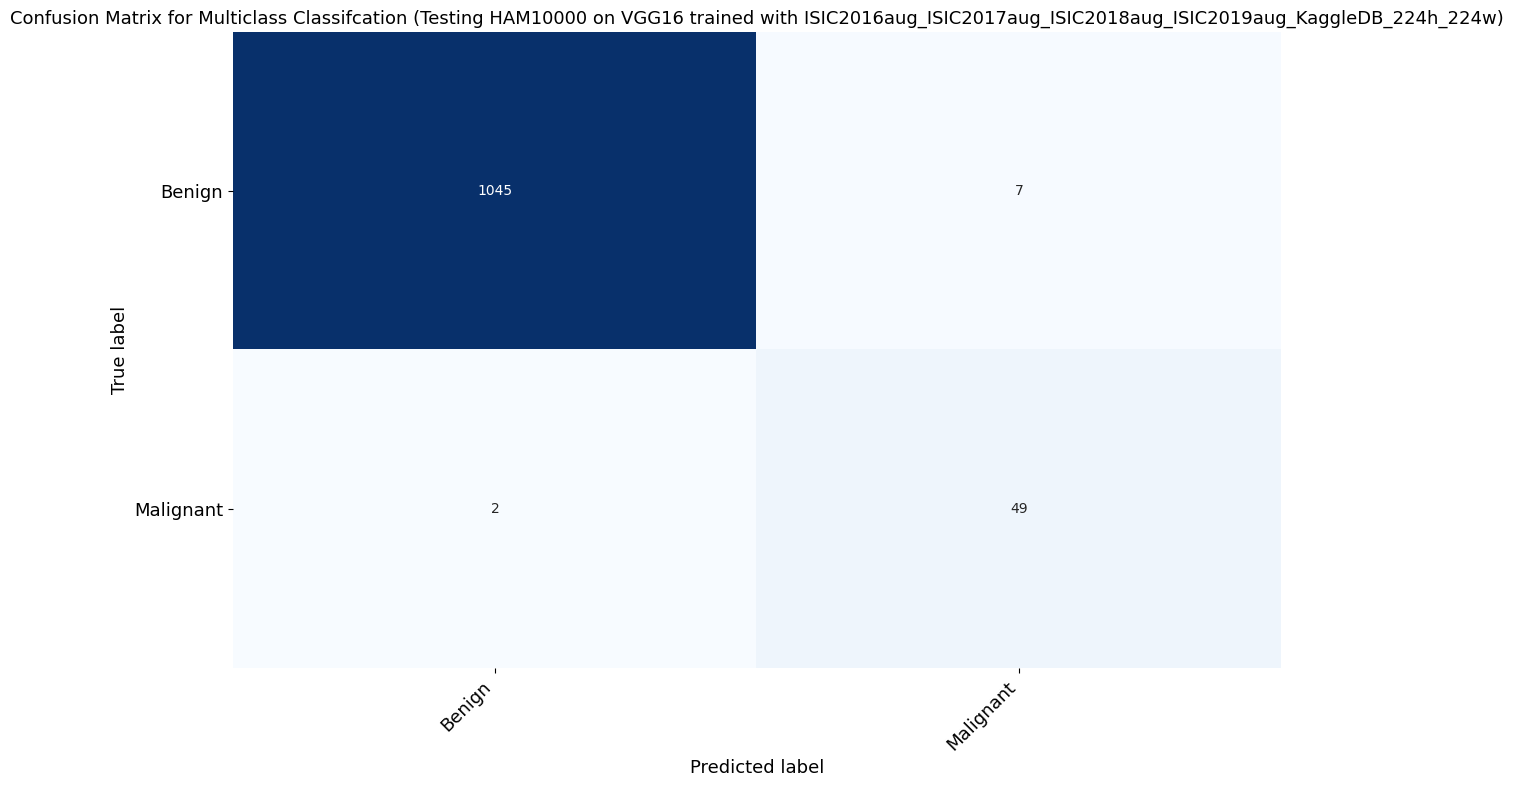

Testing on ISIC2016
Evaluating Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model...

23/23 [==============================] - 1s 19ms/step - loss: 0.0406 - accuracy: 0.9958
Train loss = 0.04055329039692879  ;  Train accuracy = 99.58%

6/6 [==============================] - 0s 17ms/step - loss: 0.1034 - accuracy: 0.9778
Validation loss = 0.10344135761260986  ;  Validation accuracy = 97.78%

12/12 [==============================] - 0s 18ms/step - loss: 0.1049 - accuracy: 0.9736
Test loss = 0.10492540150880814  ;  Test accuracy = 97.36%
Computing predictions for Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w...
Model report for Testing ISIC2016 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      1.00       583
   M

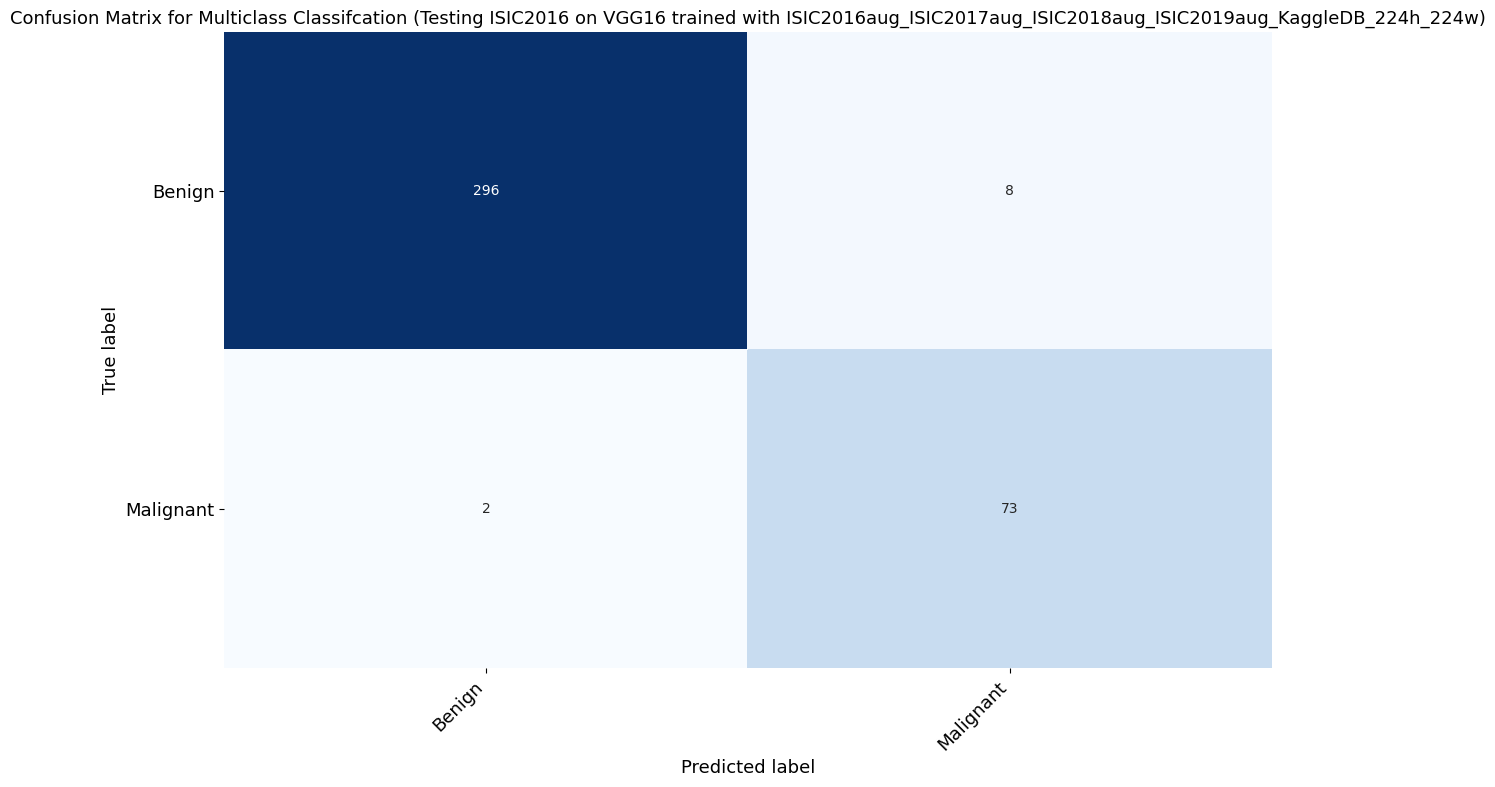

Testing on ISIC2017
Evaluating Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model...

63/63 [==============================] - 1s 19ms/step - loss: 0.0420 - accuracy: 0.9945
Train loss = 0.042038291692733765  ;  Train accuracy = 99.45%

5/5 [==============================] - 0s 17ms/step - loss: 0.2625 - accuracy: 0.9000
Validation loss = 0.26247918605804443  ;  Validation accuracy = 90.00%

19/19 [==============================] - 0s 18ms/step - loss: 0.3355 - accuracy: 0.8917
Test loss = 0.3354504108428955  ;  Test accuracy = 89.17%
Computing predictions for Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w...
Model report for Testing ISIC2017 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      1.00      1626
   M

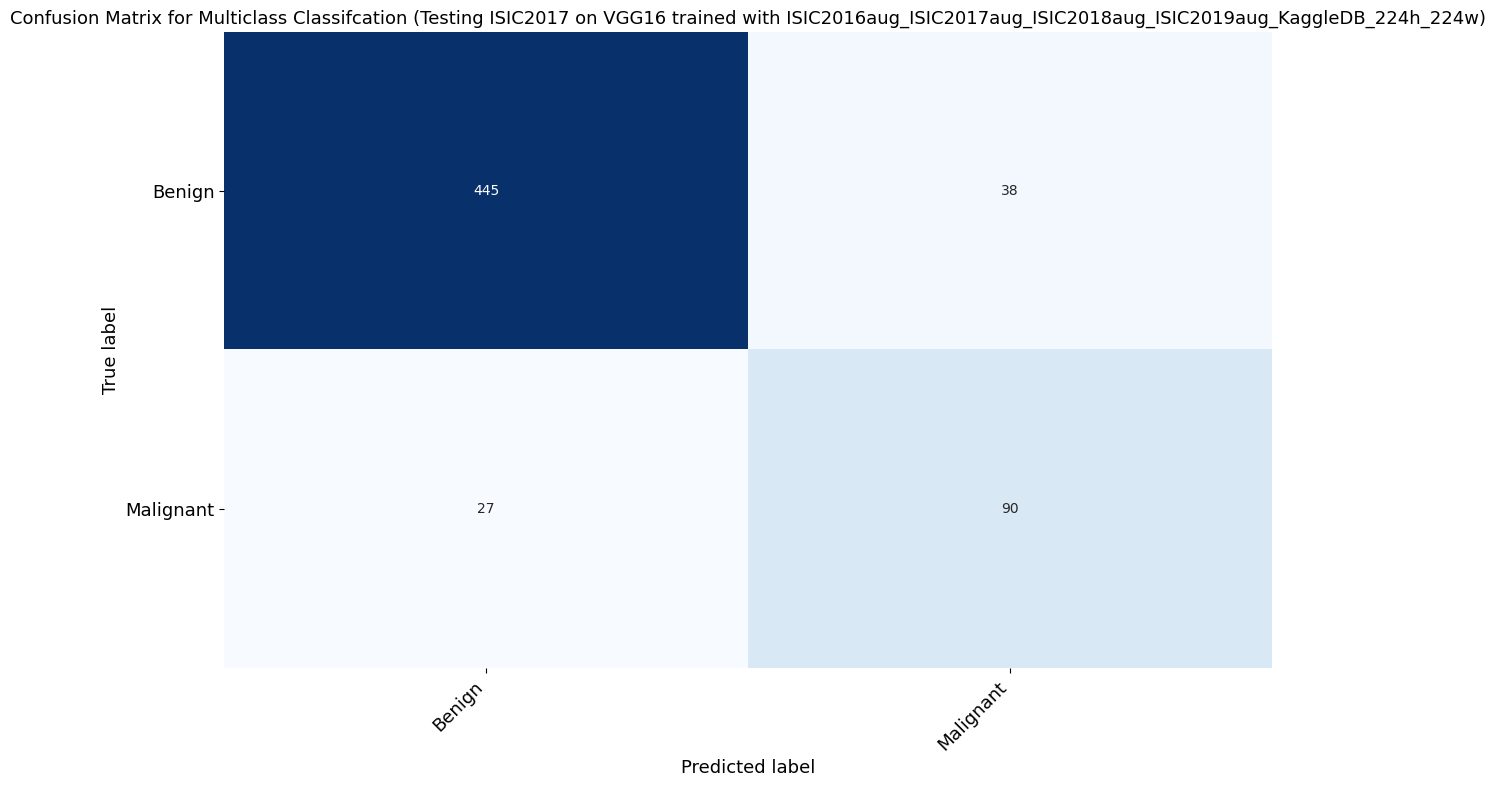

Testing on ISIC2018
Evaluating Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model...

313/313 [==============================] - 6s 19ms/step - loss: 0.0438 - accuracy: 0.9941
Train loss = 0.043838981539011  ;  Train accuracy = 99.41%

7/7 [==============================] - 0s 16ms/step - loss: 0.2113 - accuracy: 0.9119
Validation loss = 0.21130886673927307  ;  Validation accuracy = 91.19%

48/48 [==============================] - 1s 18ms/step - loss: 0.4579 - accuracy: 0.8545
Test loss = 0.4578718841075897  ;  Test accuracy = 85.45%
Computing predictions for Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w...
Model report for Testing ISIC2018 on VGG16 trained with ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_224h_224w model ->


Train Report :
               precision    recall  f1-score   support

      Benign       1.00      0.99      1.00      8902
   Ma

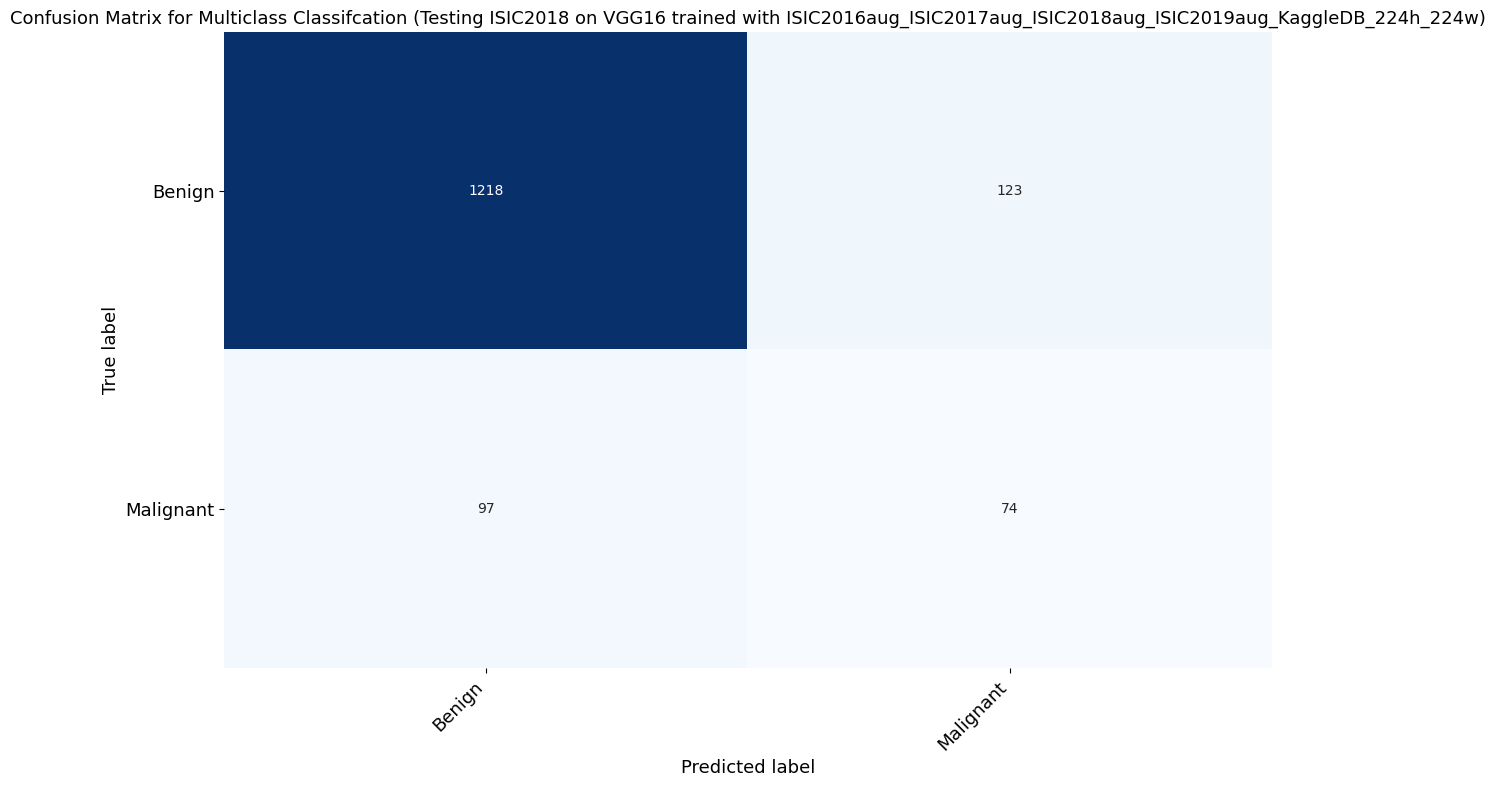

In [5]:
# Training HAM10000 with VGG16
networkType = mel.NetworkType.VGG16

img_size = (224, 224)
imgsize = {'img_height':img_size[0], 'img_width':img_size[1]}
CFG.update(imgsize)

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename
model = base_model.vgg16()

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2018 = dbpath+'/'+f'ISIC2018_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016 with VGG16

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)


# Training ISIC2017 with vgg16

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)


# Training ISIC2016aug+ISIC2017aug with vgg16

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+KaggleDB with vgg16

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug_KaggleDB with VGG16

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug+ISIC2019aug+KaggleDB with VGG16

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)



In [ ]:
# Training HAM10000 with VGG19
networkType = mel.NetworkType.VGG19

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename
model = base_model.vgg19()

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2018 = dbpath+'/'+f'ISIC2018_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016 with VGG19

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)


# Training ISIC2017 with vgg19

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)


# Training ISIC2016aug+ISIC2017aug with vgg19

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+KaggleDB with vgg19

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug_KaggleDB with VGG19

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_ISIC2018aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

# Training ISIC2016aug+ISIC2017aug+ISIC2018aug+ISIC2019aug+KaggleDB with VGG19

dbpath = f'/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB/{networkType.name}'
picklename = f'ISIC2016aug_ISIC2017aug_ISIC2018aug_ISIC2019aug_KaggleDB_{img_size[0]}h_{img_size[1]}w'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+picklename+'.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = f'{networkType.name} trained with ' + picklename

history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)


filename = model_name + '.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename



base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017, dbpath_ISIC2018)

